In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [ ]:
# Check Device
if torch.cuda.is_available():
  DEVICE = torch.device('cuda') # use GPU
else:
  DEVICE = torch.device('cpu') # use CPU

print('Using PyTorch Version: ', torch.__version__, ', Device: ', DEVICE)

Using PyTorch Version:  2.0.1+cu118 , Device:  cuda


# MNIST 데이터셋 다운로드
- `download`: 인터넷 상에서 데이터 다운로드
- `transform`: 이미지 불러오면서 전처리 동시에 진행
    - `ToTensor()`: tensor형태로 변경
    - 0 ~ 255 -> 0 ~ 1(정규화)
    - Input에 이용

In [ ]:
# Download MNIST Dataset

training_data = datasets.MNIST(
    root="Dataset/MNIST",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="Dataset/MNIST",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 269672709.16it/s]


Extracting Dataset/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to Dataset/MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 43216444.46it/s]


Extracting Dataset/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to Dataset/MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 162883991.54it/s]

Extracting Dataset/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to Dataset/MNIST/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 13844861.02it/s]

Extracting Dataset/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to Dataset/MNIST/MNIST/raw



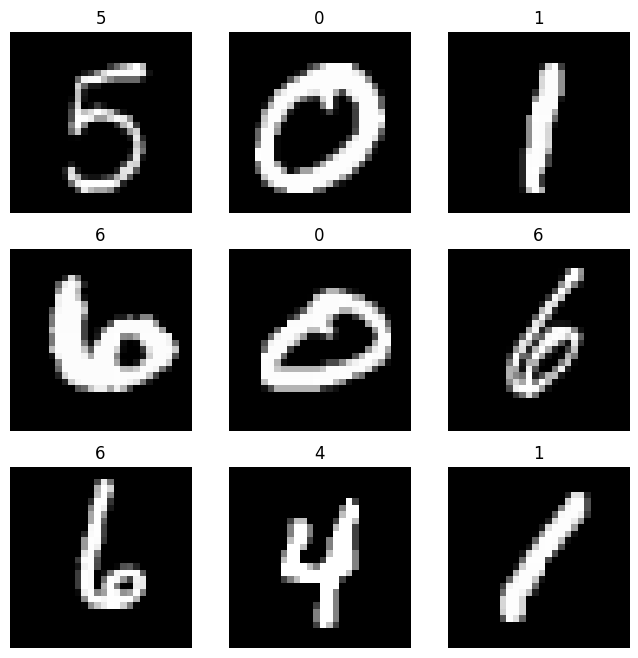

In [ ]:
# Visualize MNIST Dataset

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# DataLoader
- 데이터셋 특징(feature) 가져오고 하나의 샘플에 정답(label) 지정
- 모델 학습 시, 샘플을 미니배치(minibatch)에 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, python의 `multiprocessing` 사용하여 데이터 검색 속도 높임
- MNIST 데이터셋을 Mini_Batch 단위로 분리하기 위해 Mini_batch 이용
- 학습은 `train_dataloader`로, 성능 확인은 `test_dataloader`로
- `batch_size` : minibatch 1개 단위를 구성하는 데이터 수 지정
- `shuffle` : 데이터 순서 섞기,

In [10]:
# split dataset per mini_batch

BATCH_SIZE = 64


train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

# DataLoader 이용하여 순회(iteration)
- `iteration` : 특징(feature)과 정답(label)의 묶음(batch) 반환


x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


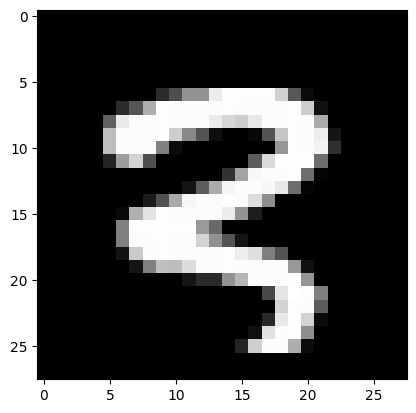

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


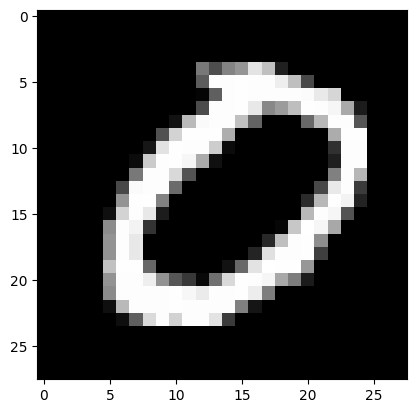

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


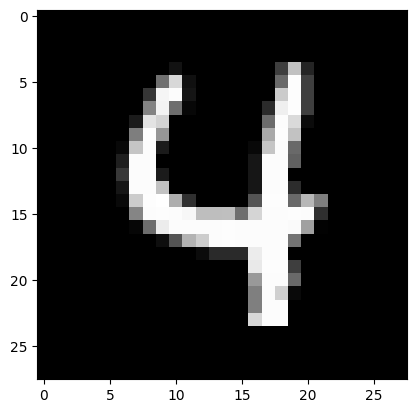

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


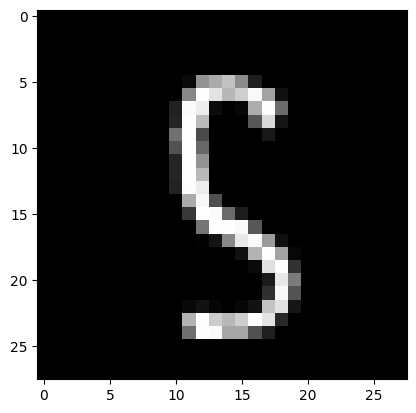

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


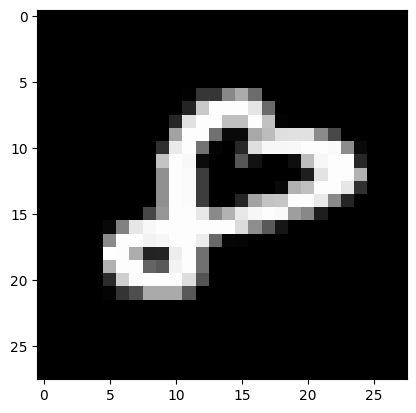

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


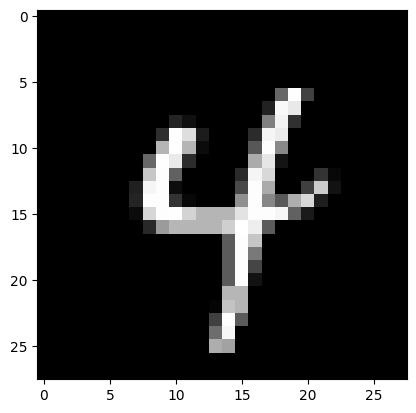

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


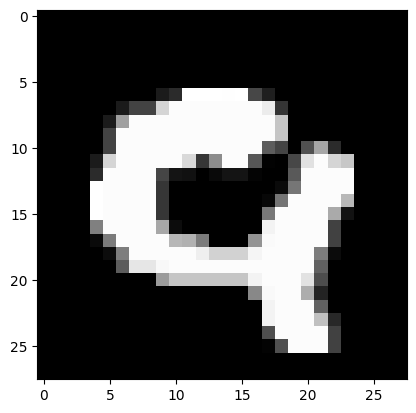

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


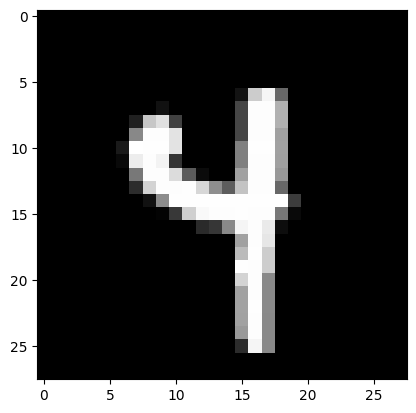

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


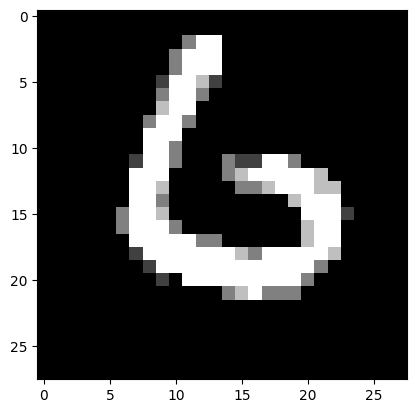

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


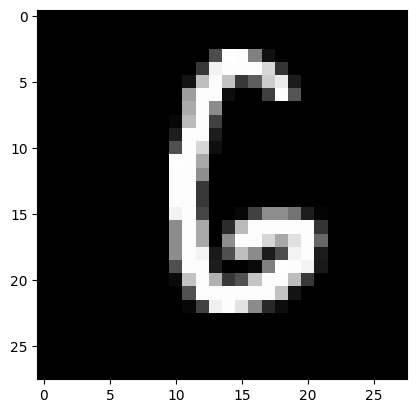

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


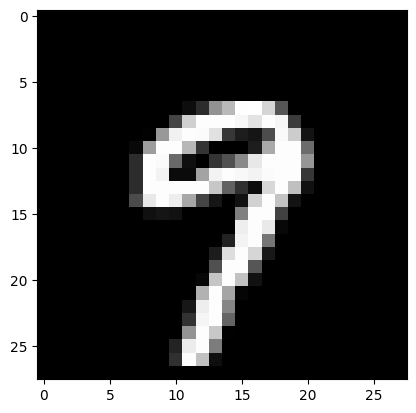

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


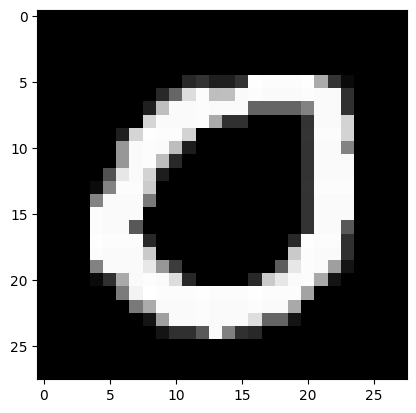

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


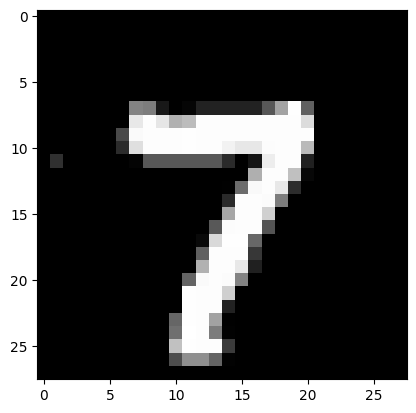

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


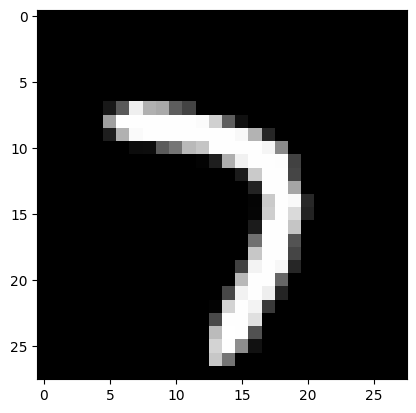

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


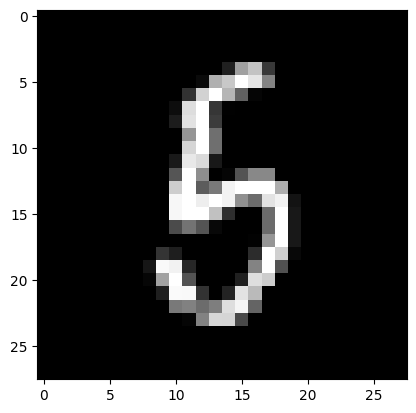

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


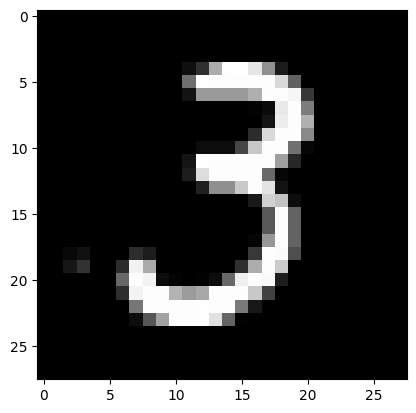

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


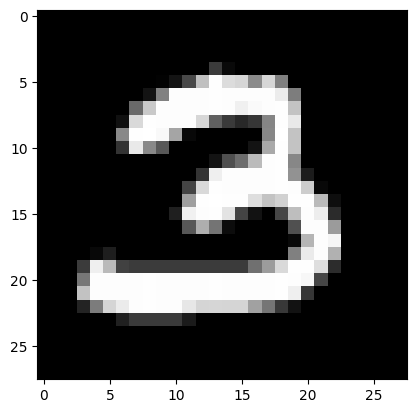

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


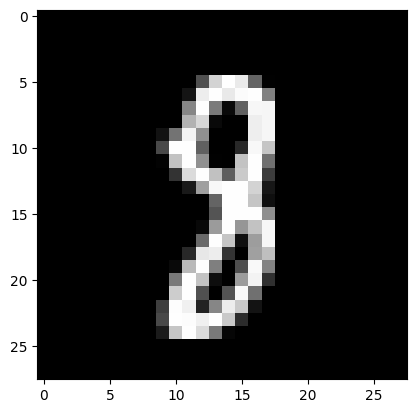

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


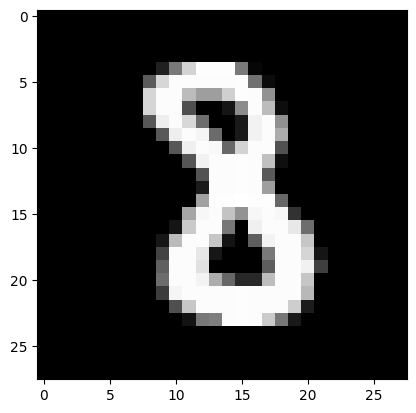

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


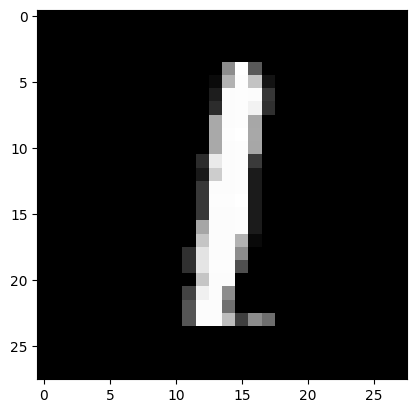

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


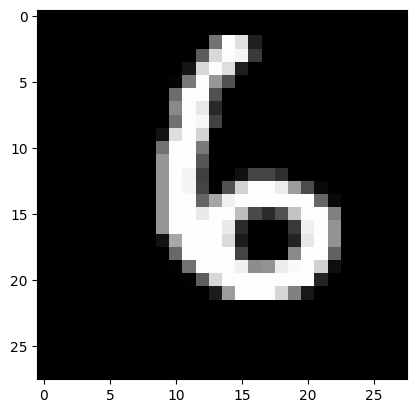

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


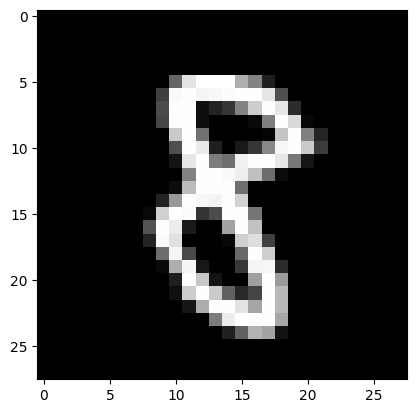

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


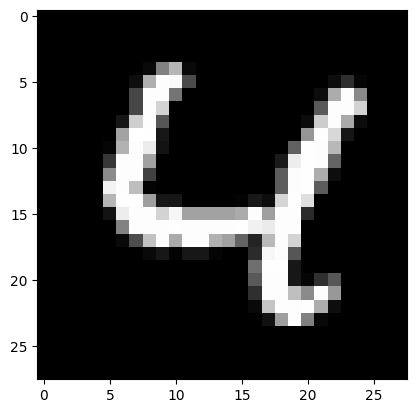

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


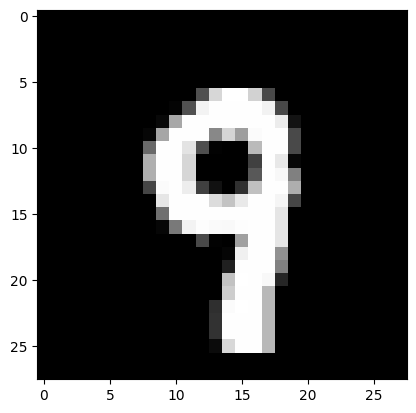

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


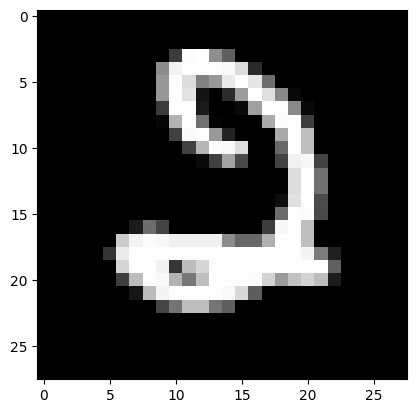

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


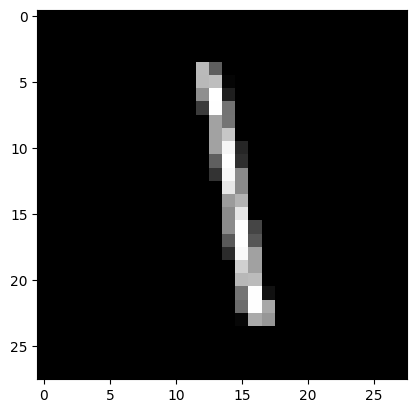

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


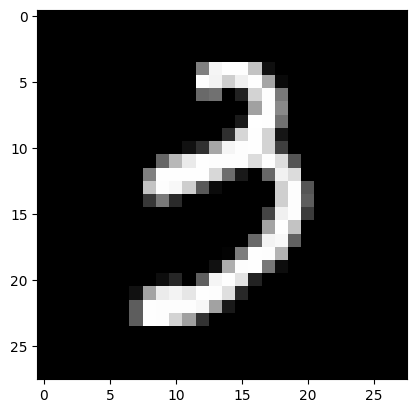

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


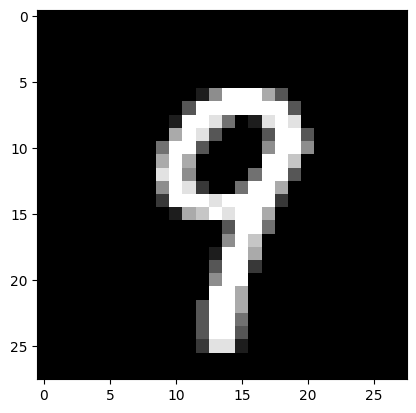

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


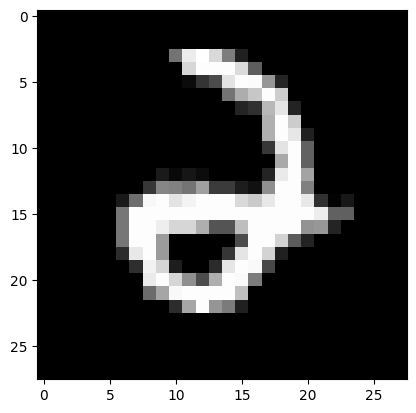

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


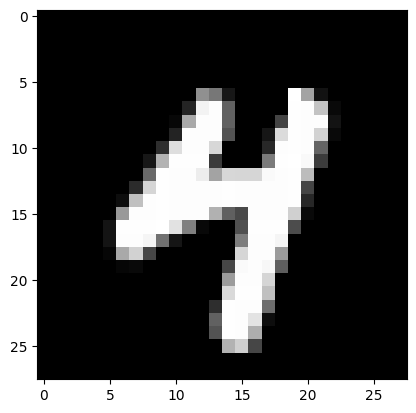

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


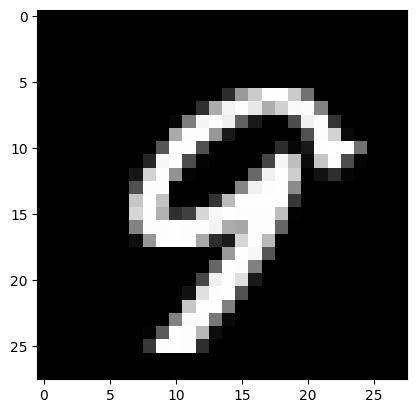

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


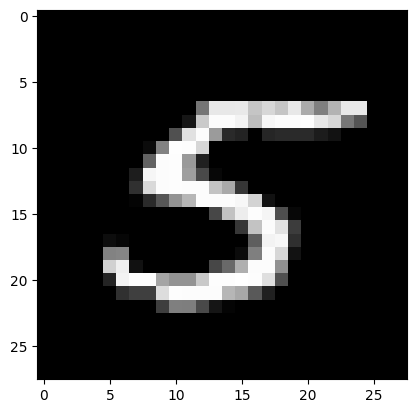

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


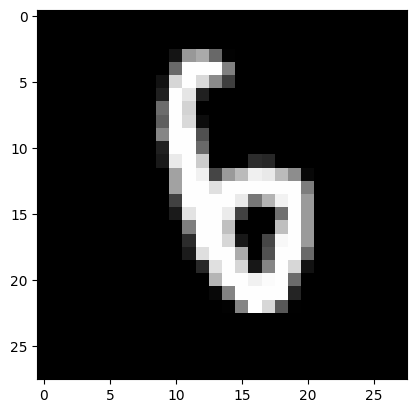

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


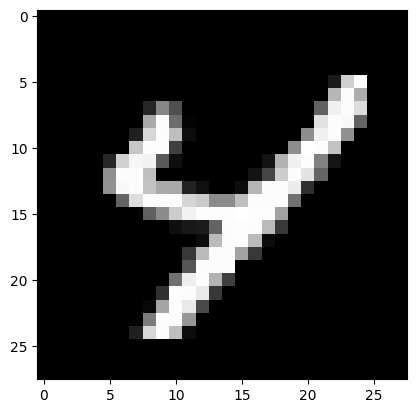

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


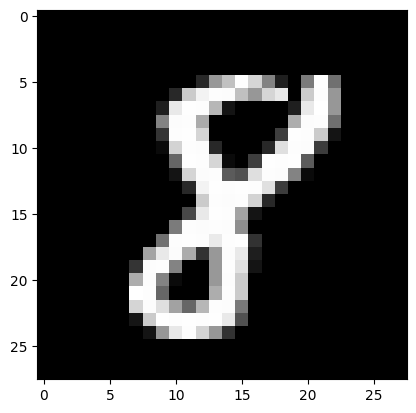

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


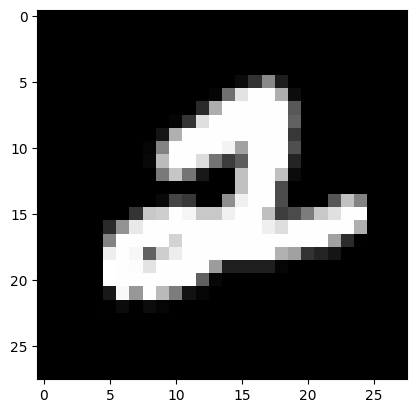

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


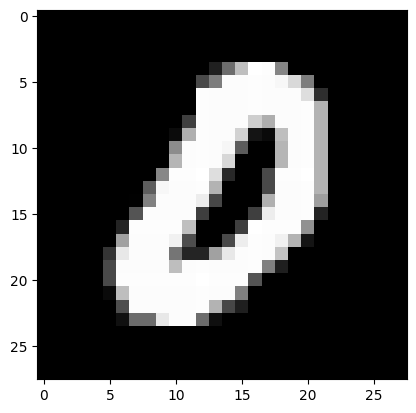

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


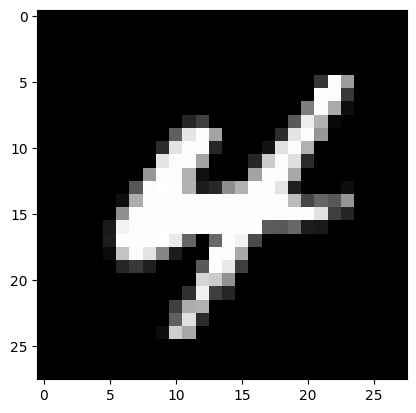

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


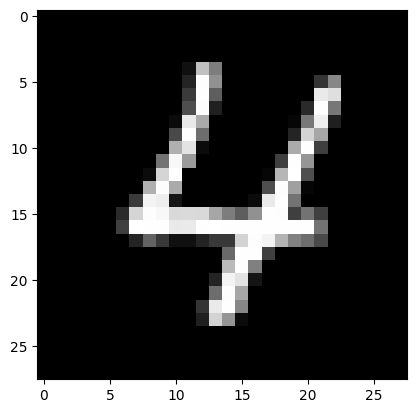

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


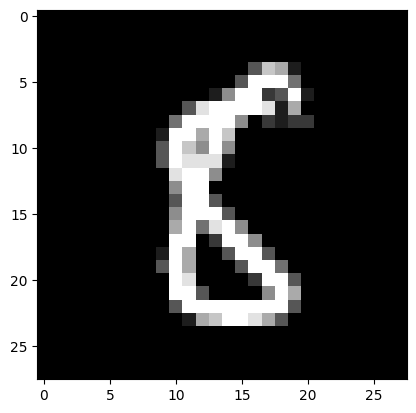

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


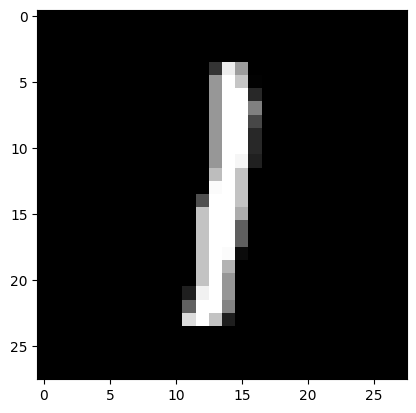

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


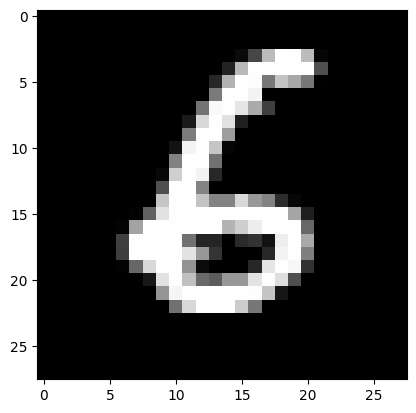

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


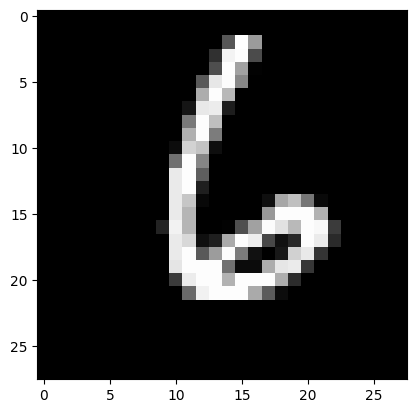

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


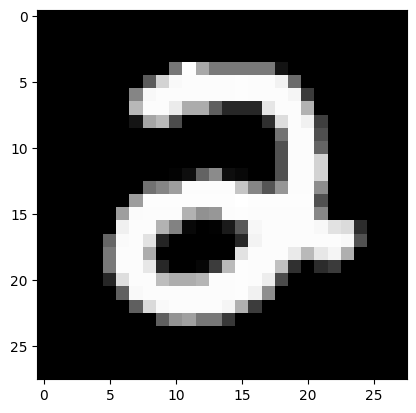

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


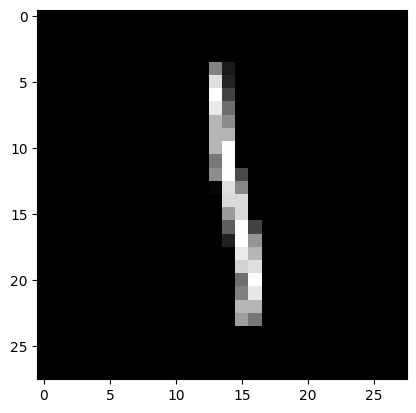

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


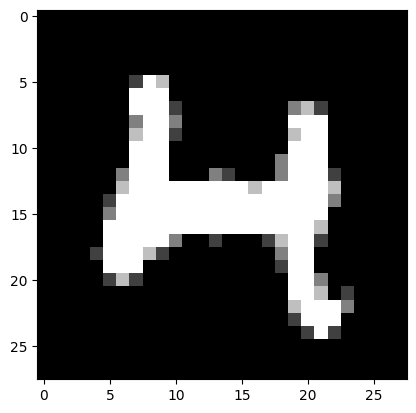

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


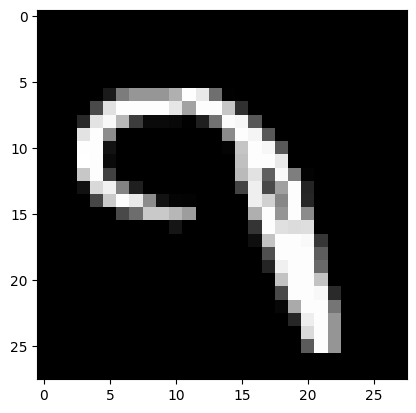

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


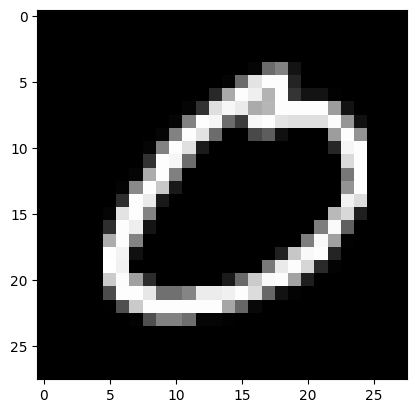

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


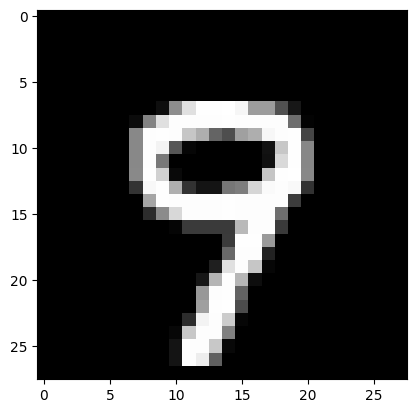

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


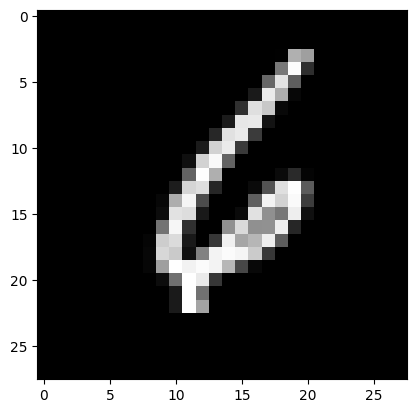

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


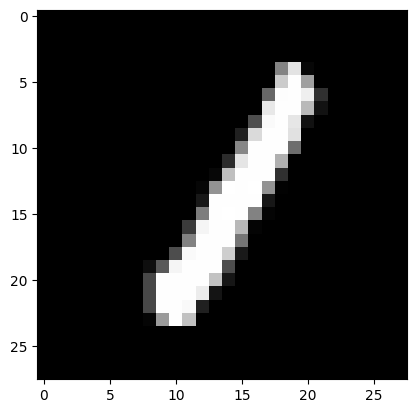

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


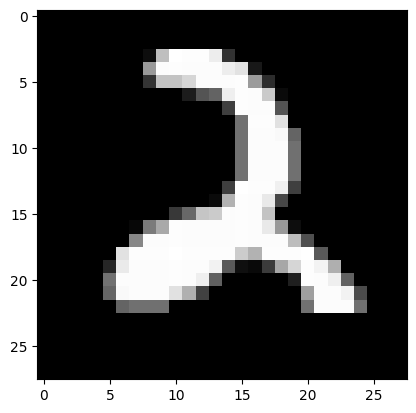

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


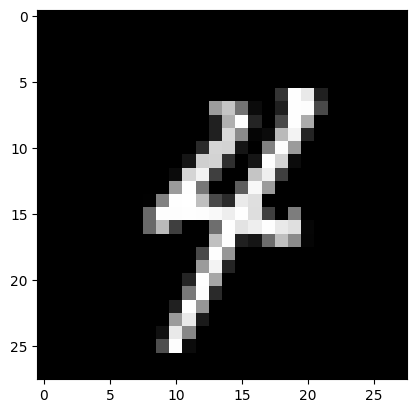

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


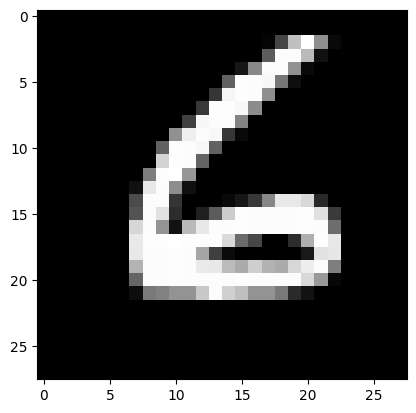

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


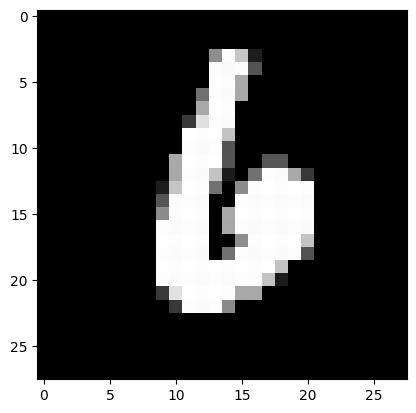

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


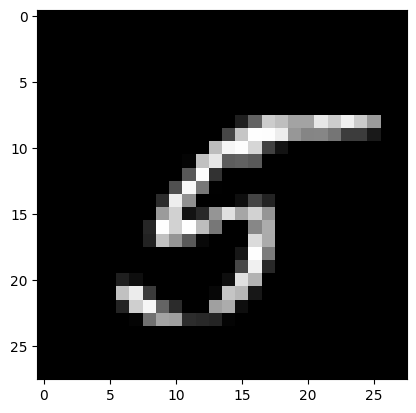

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


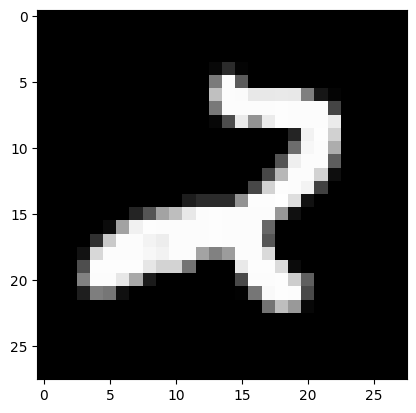

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


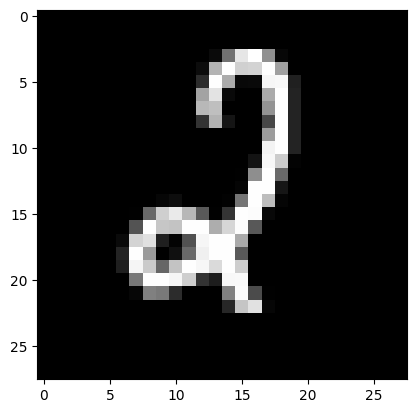

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


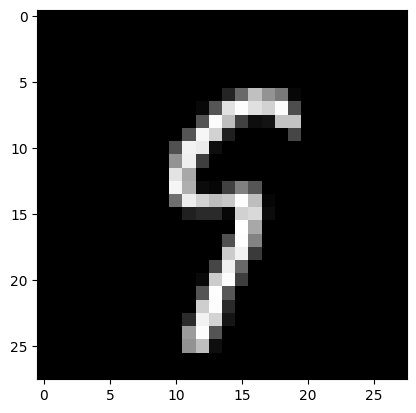

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


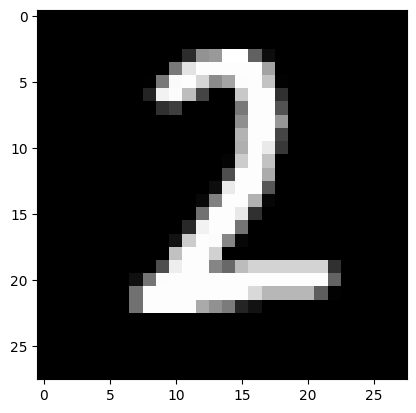

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


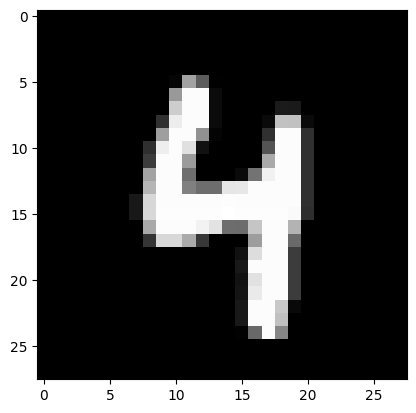

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


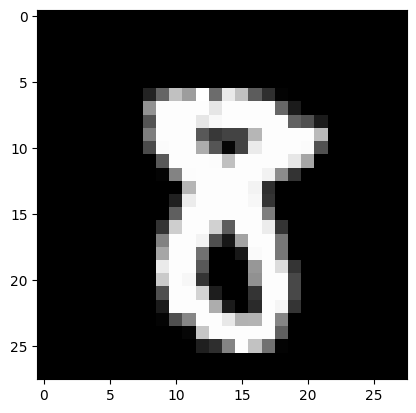

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


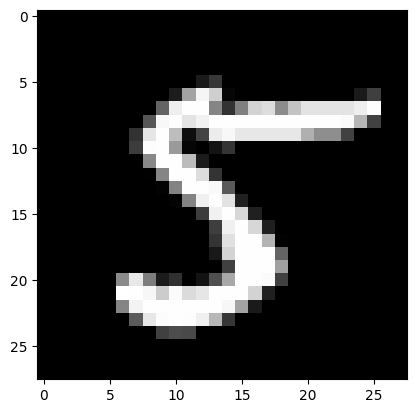

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


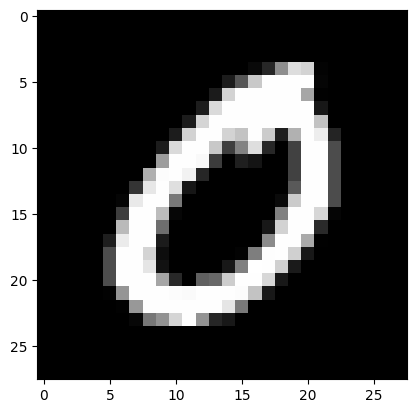

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


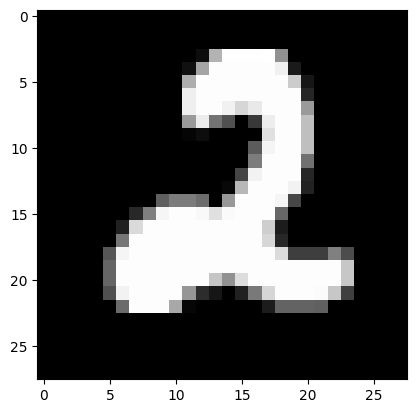

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


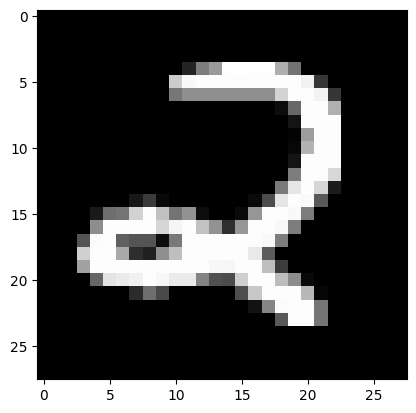

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


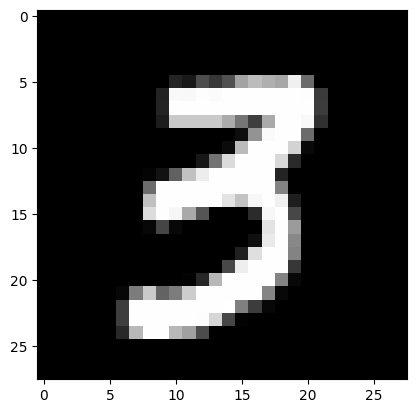

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


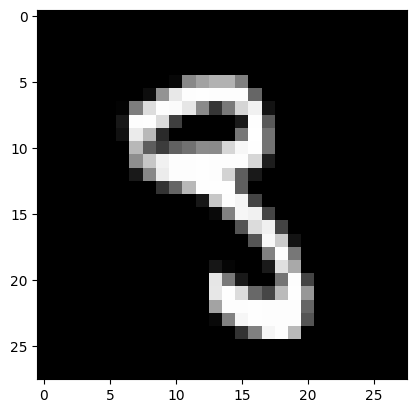

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


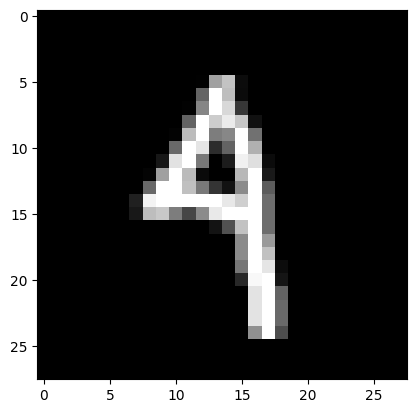

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


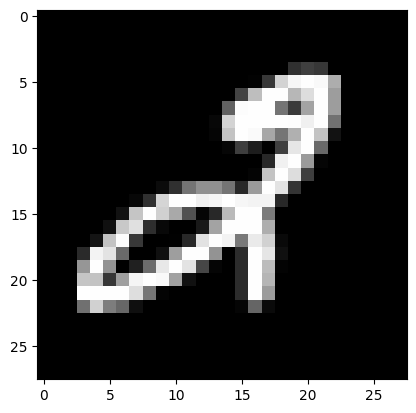

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


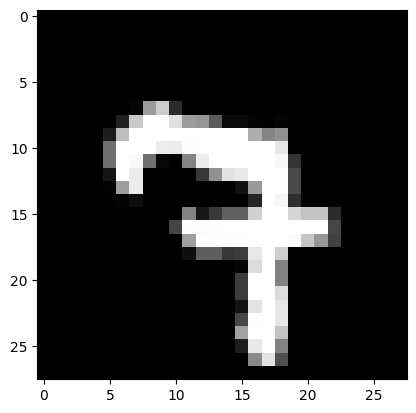

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


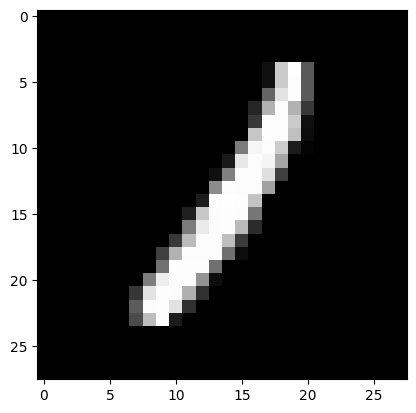

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


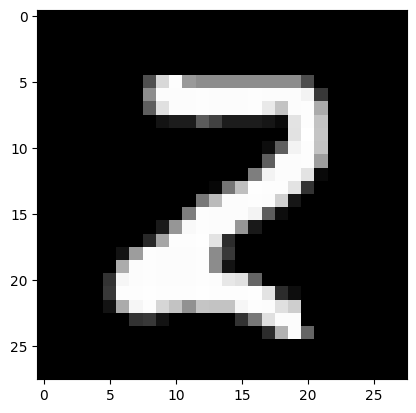

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


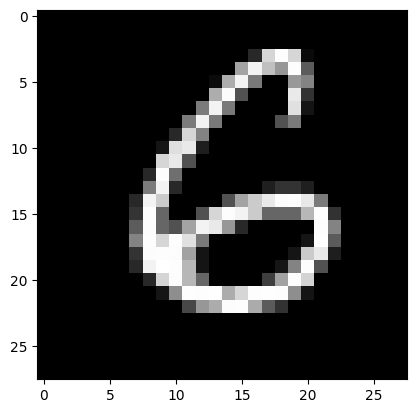

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


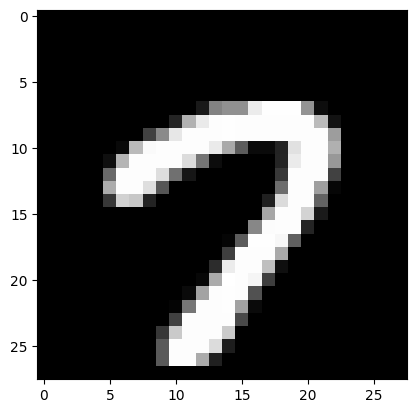

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


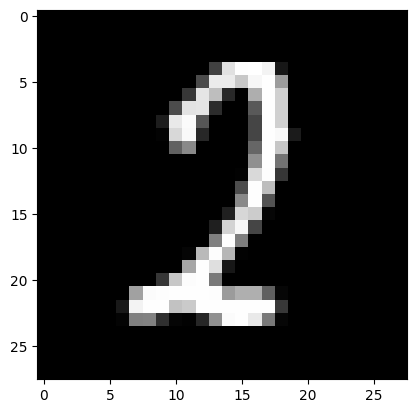

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


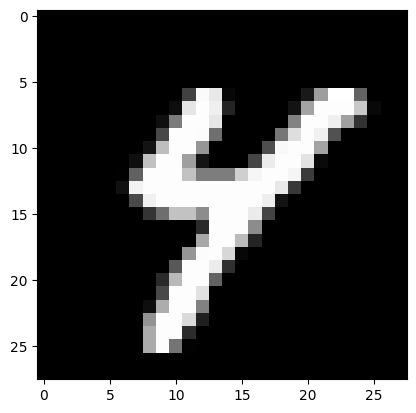

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


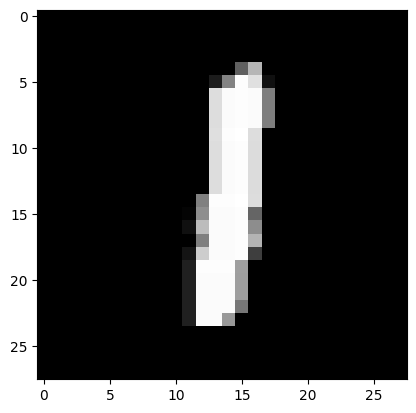

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


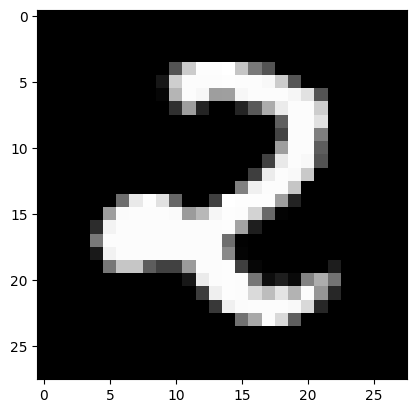

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


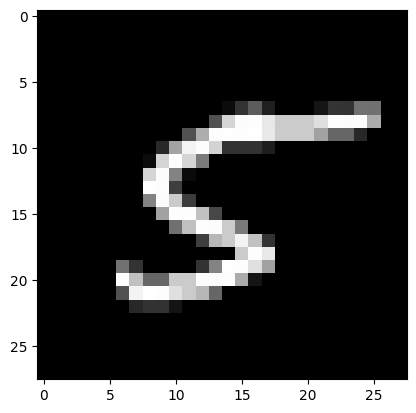

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


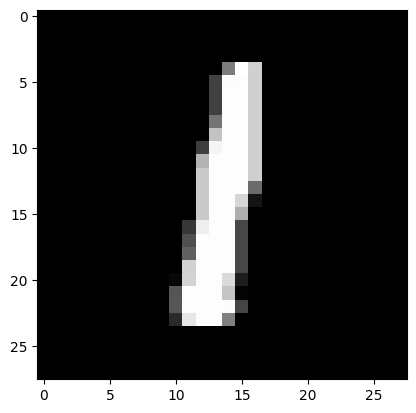

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


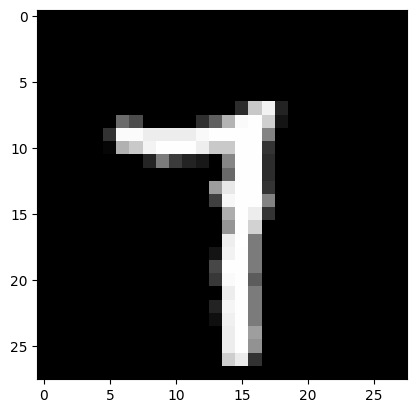

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


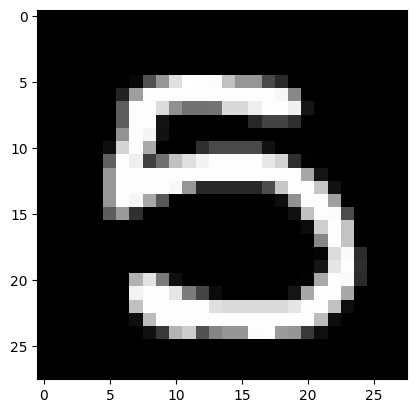

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


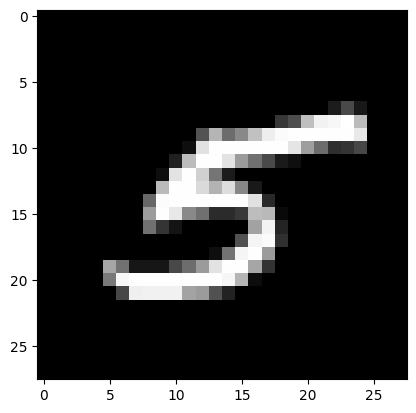

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


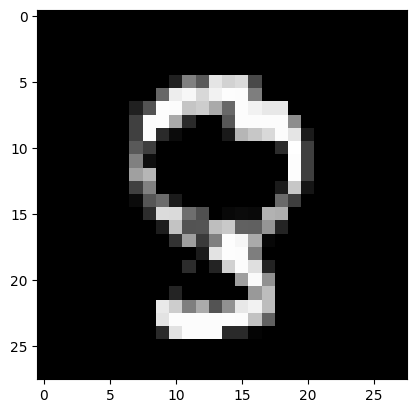

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


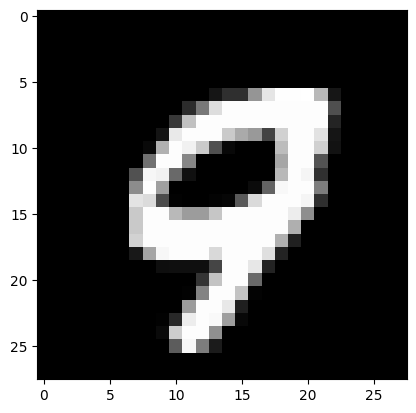

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


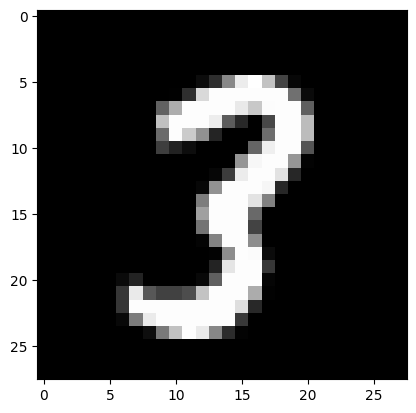

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


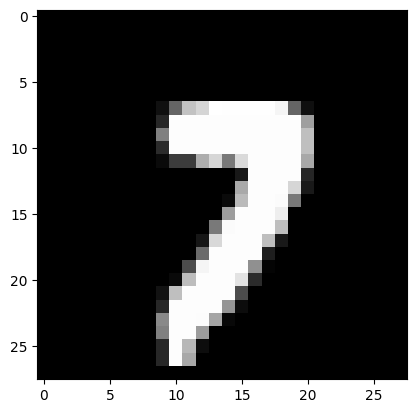

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


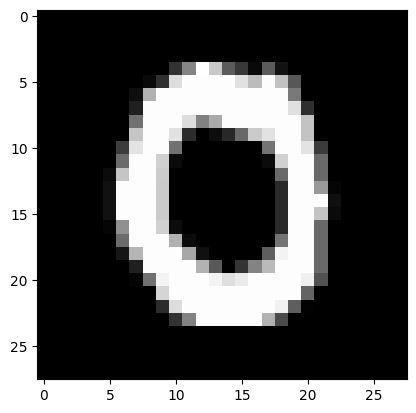

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


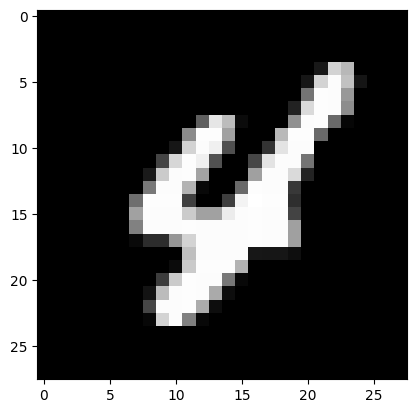

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


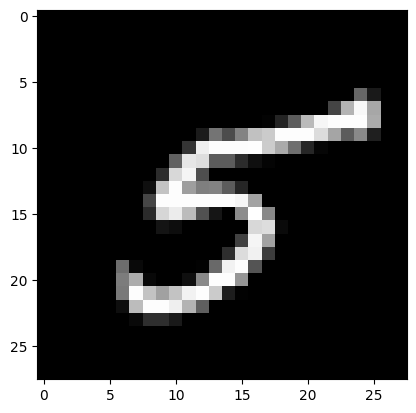

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


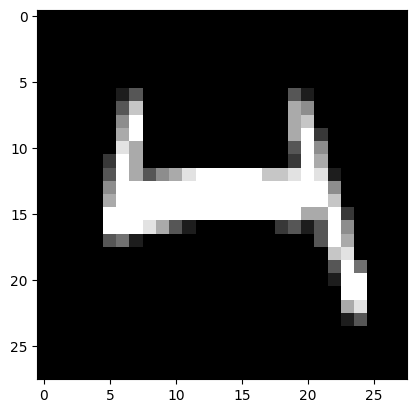

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


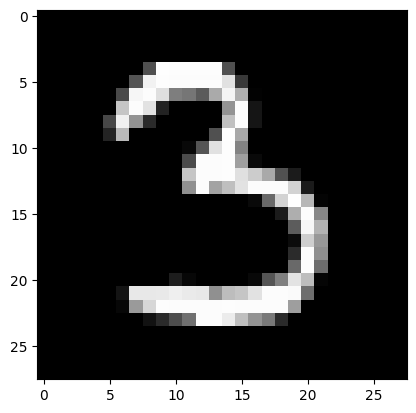

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


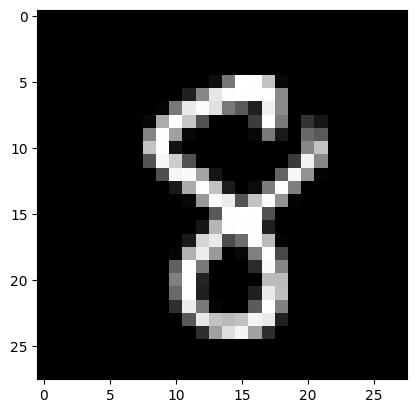

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


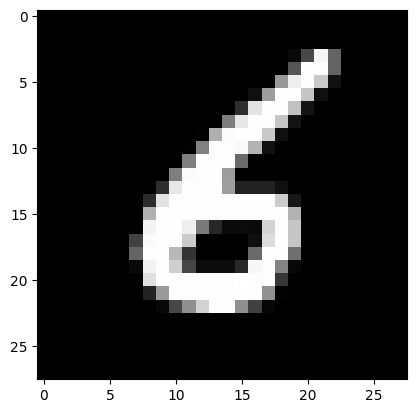

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


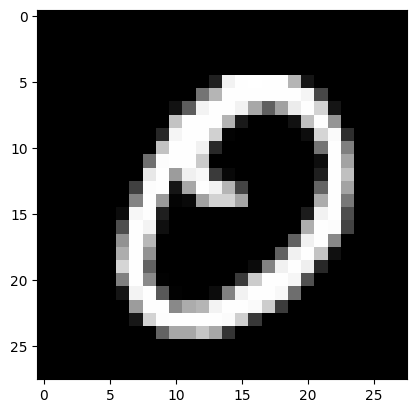

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


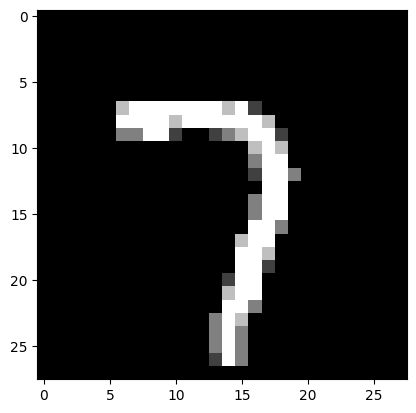

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


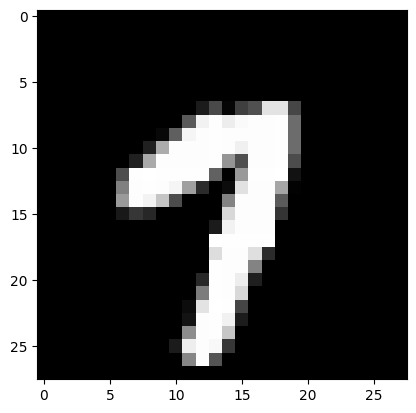

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


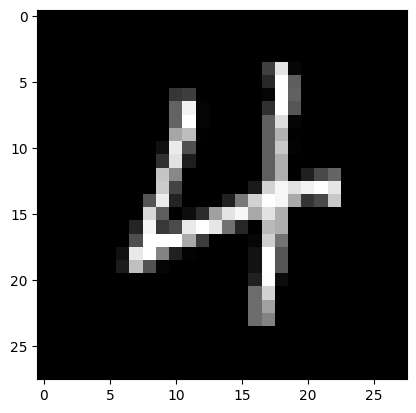

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


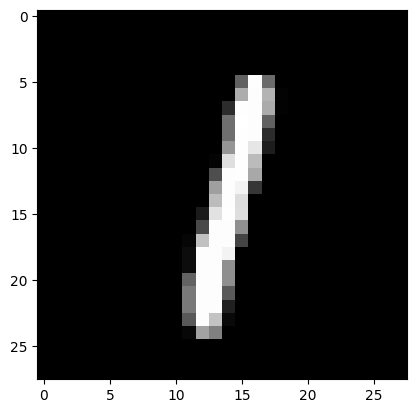

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


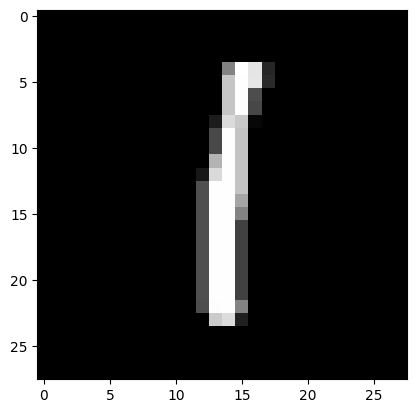

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


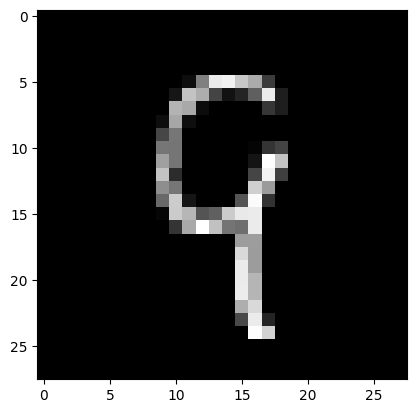

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


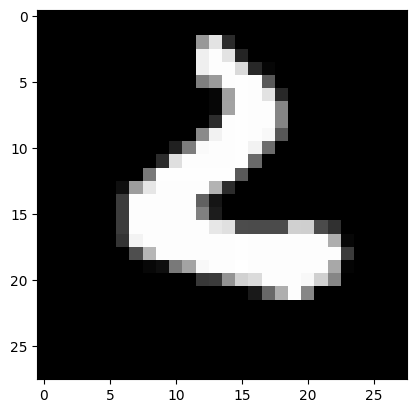

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


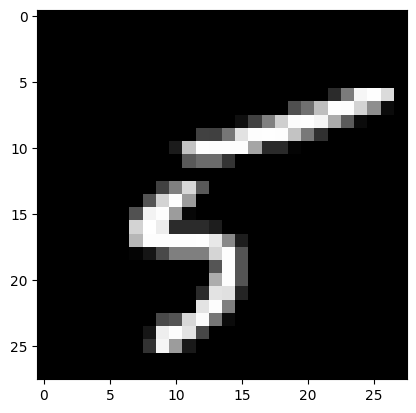

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


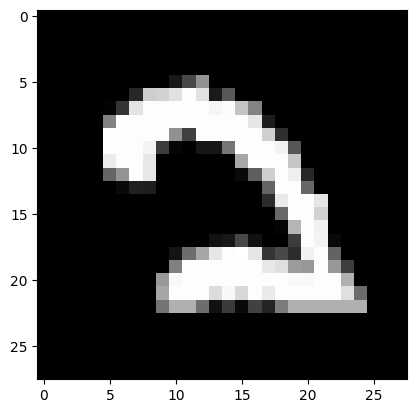

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


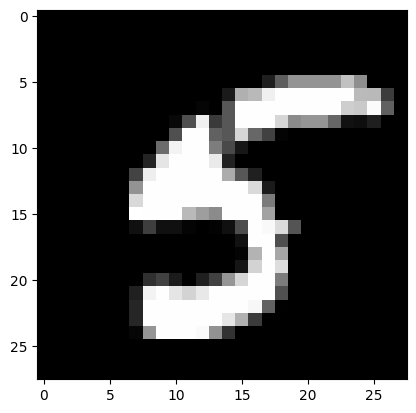

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


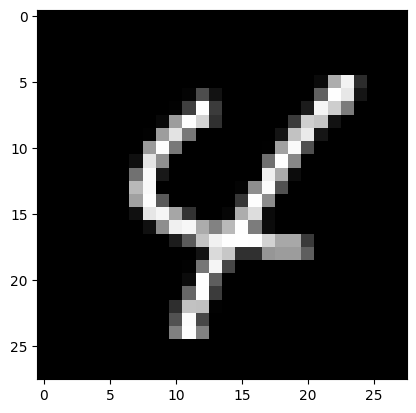

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


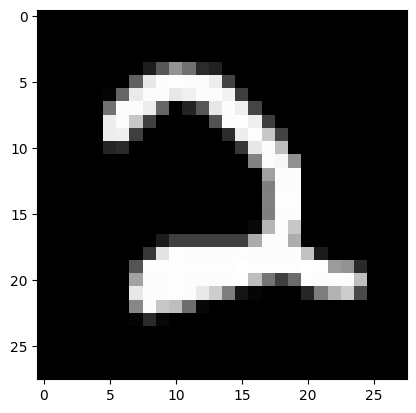

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


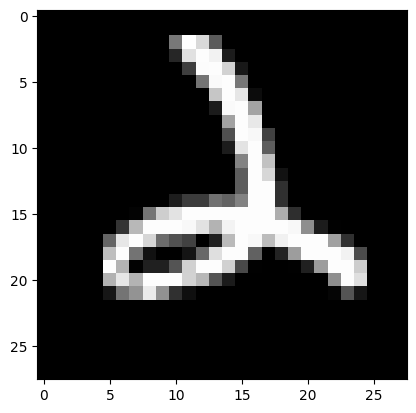

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


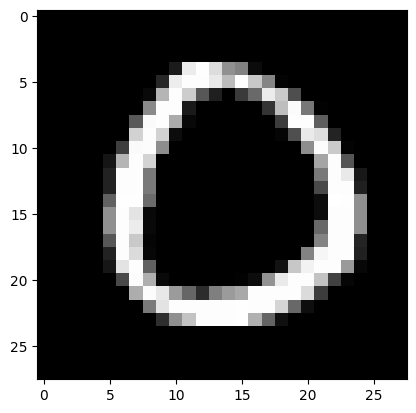

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


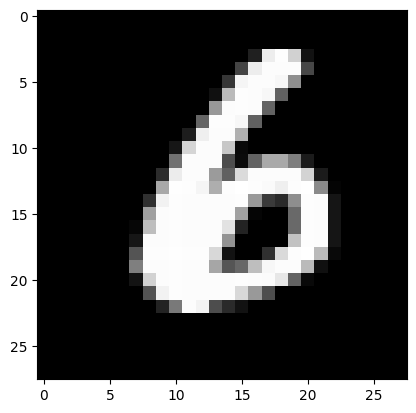

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


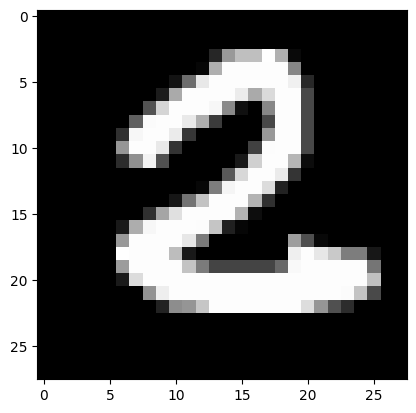

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


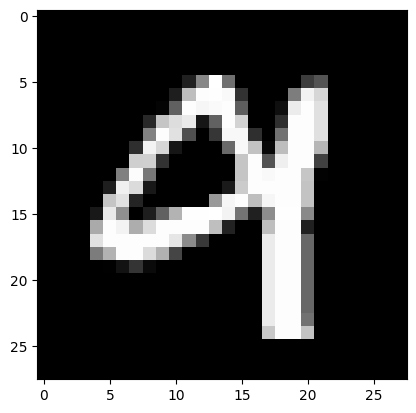

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


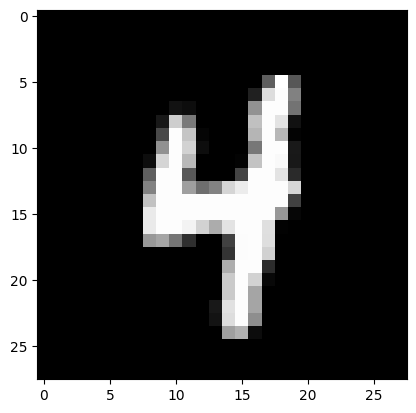

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


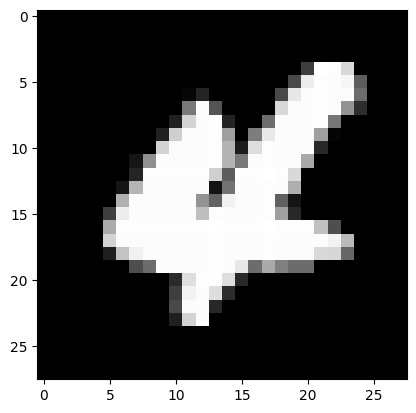

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


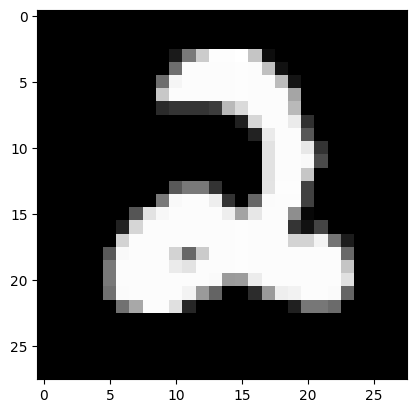

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


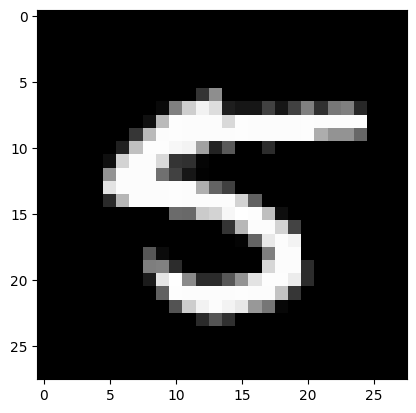

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


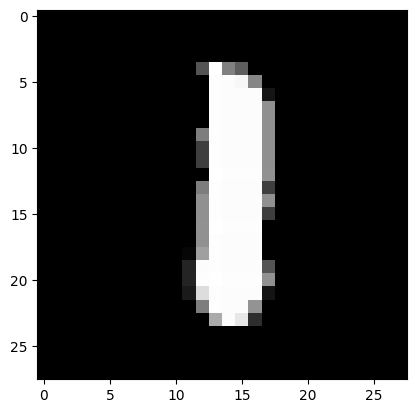

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


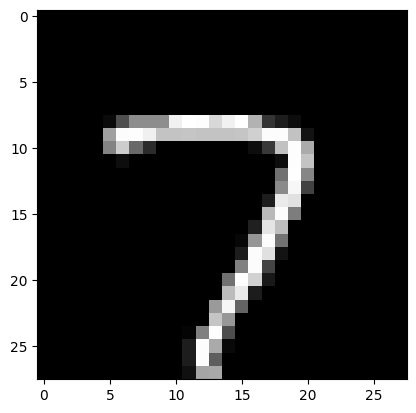

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


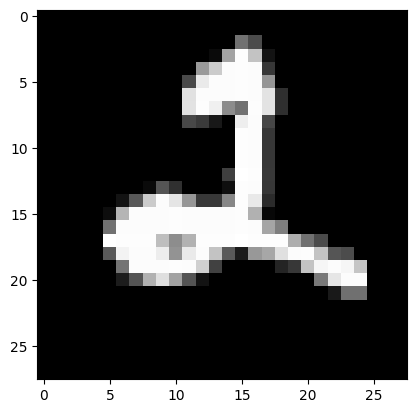

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


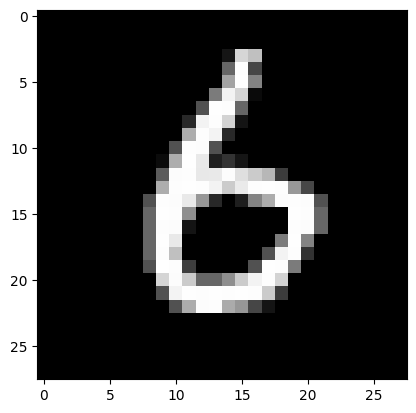

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


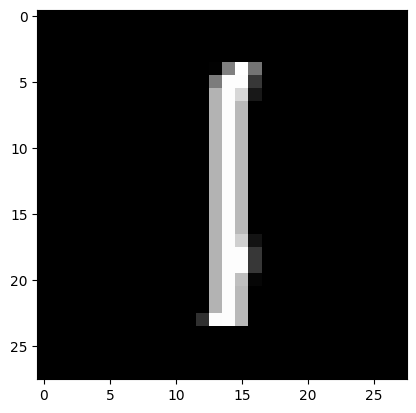

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


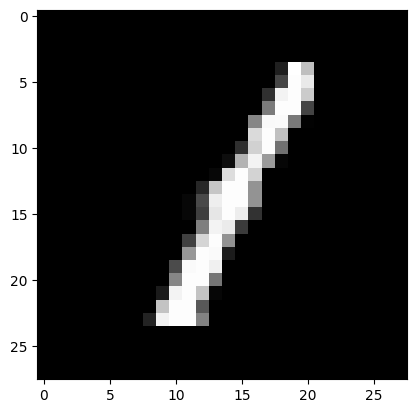

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


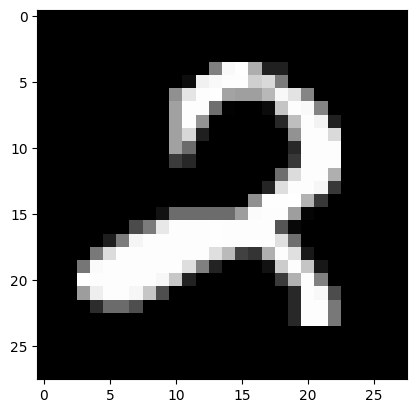

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


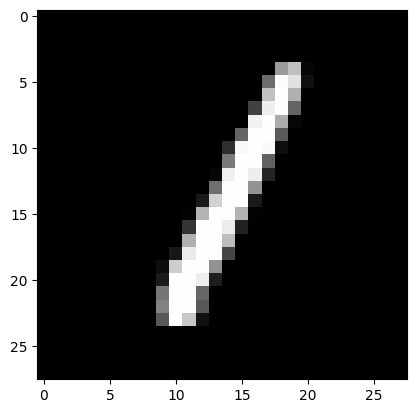

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


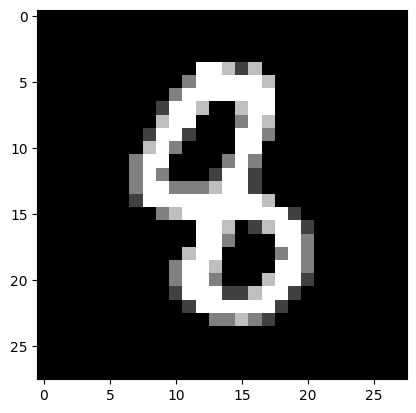

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


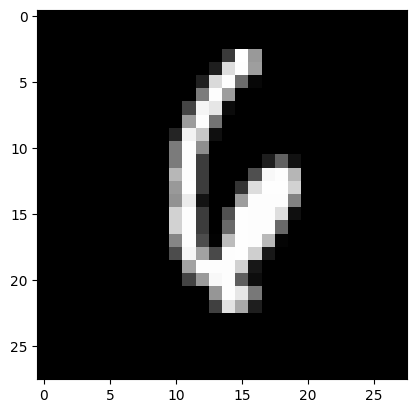

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


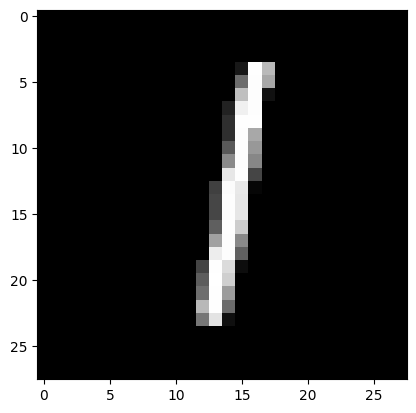

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


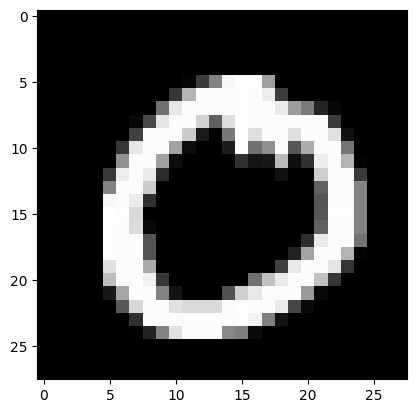

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


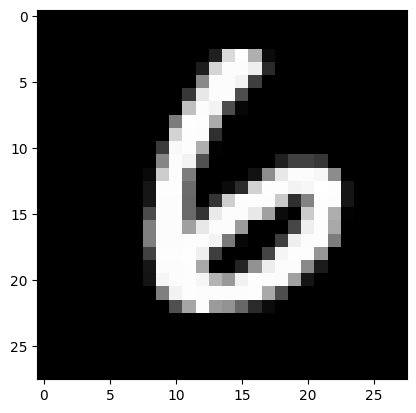

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


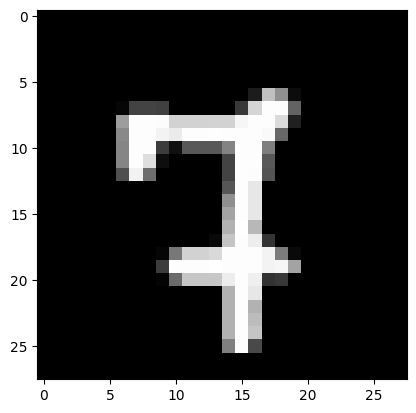

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


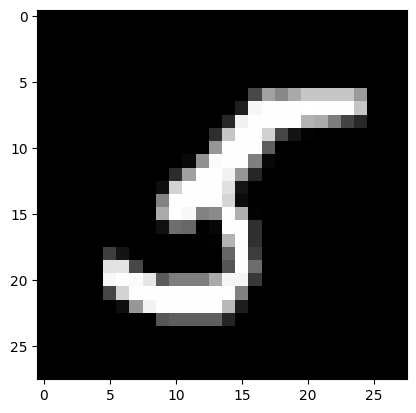

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


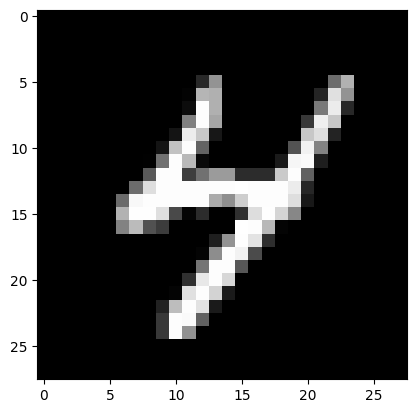

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


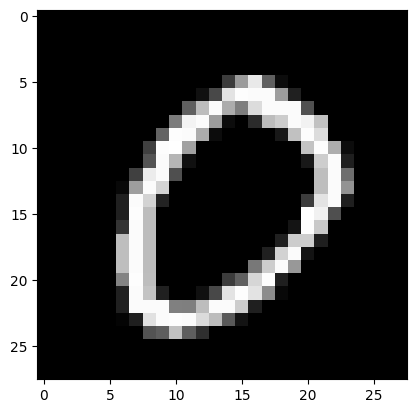

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


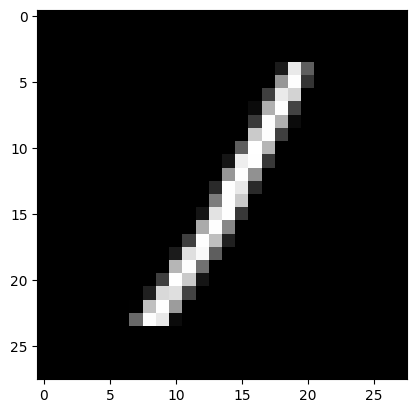

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


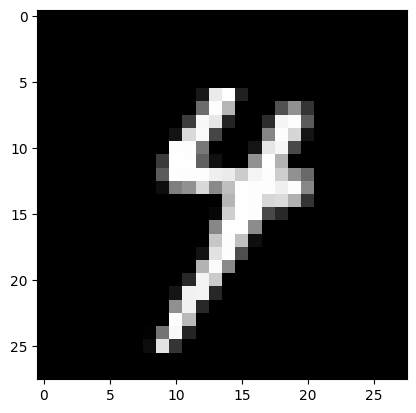

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


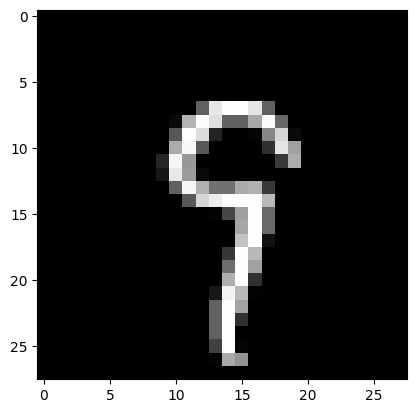

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


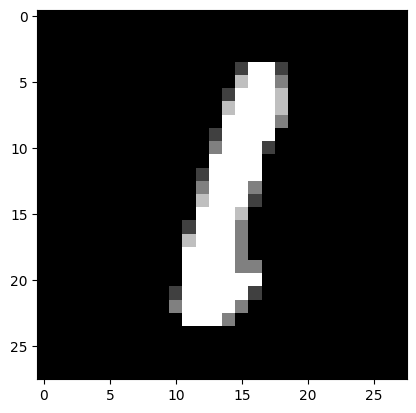

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


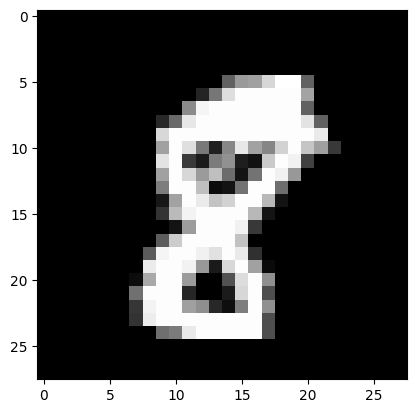

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


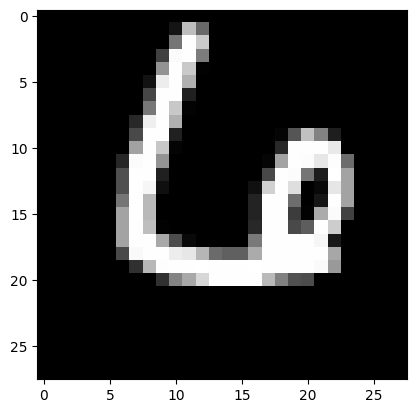

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


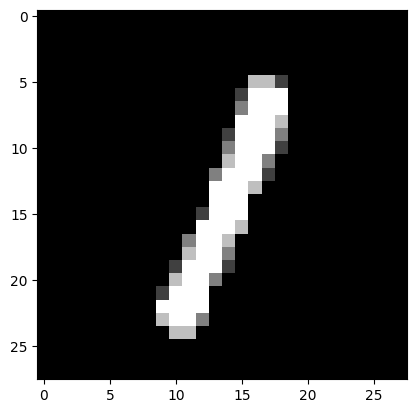

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


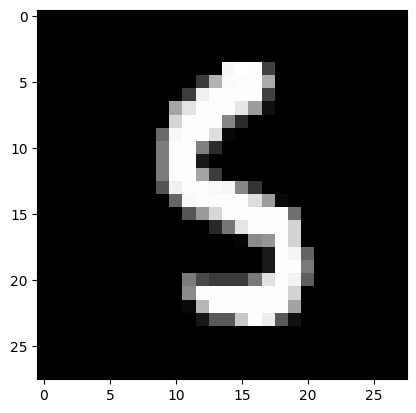

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


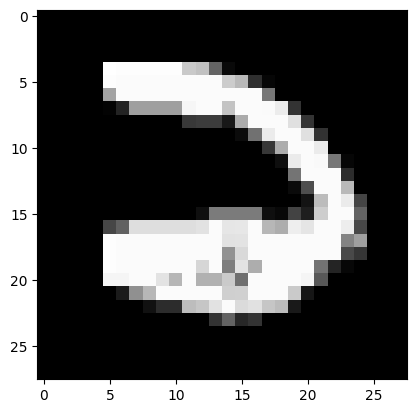

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


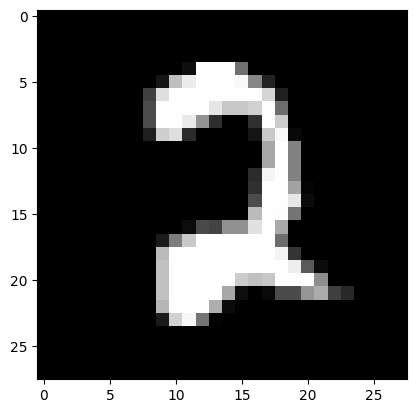

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


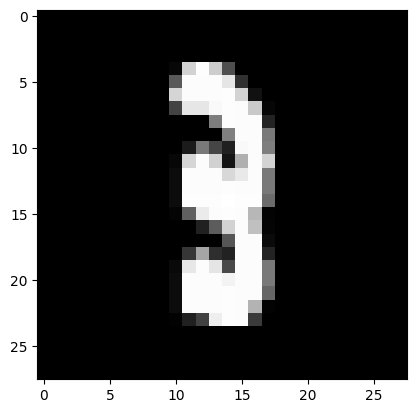

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


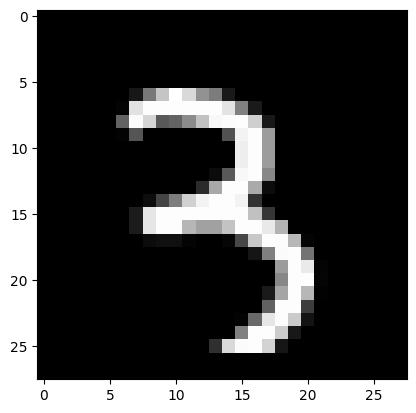

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


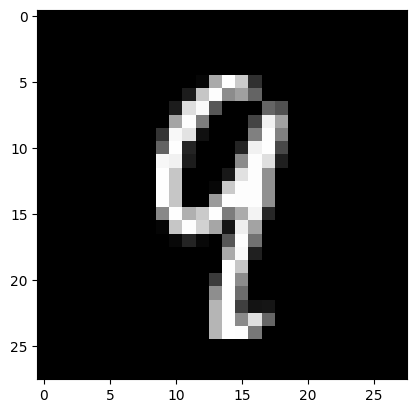

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


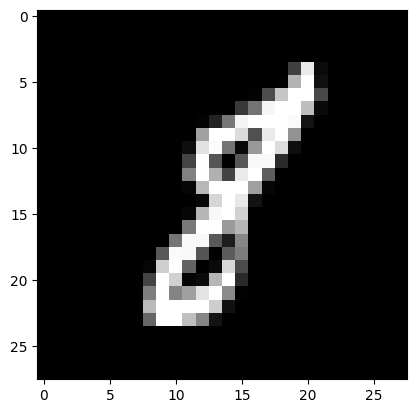

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


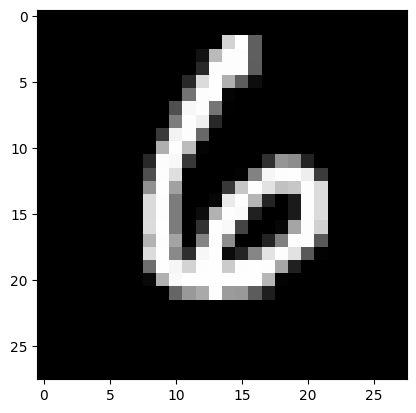

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


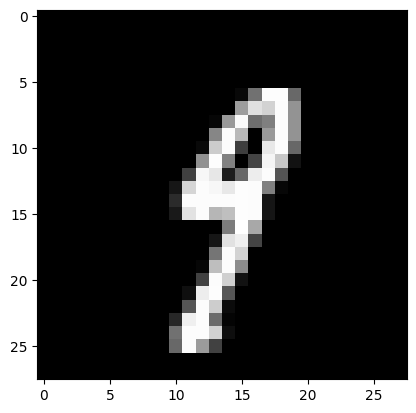

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


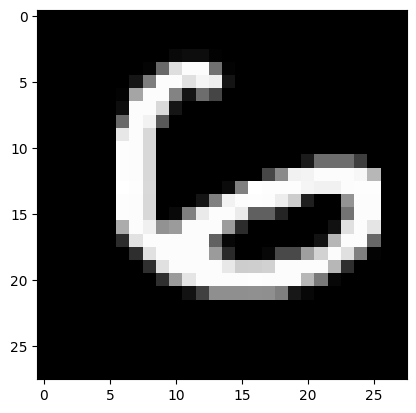

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


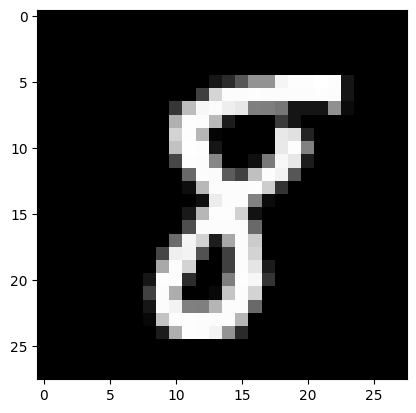

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


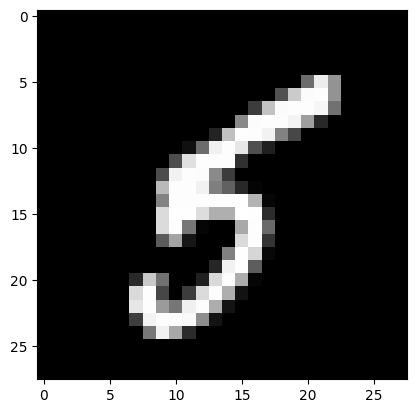

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


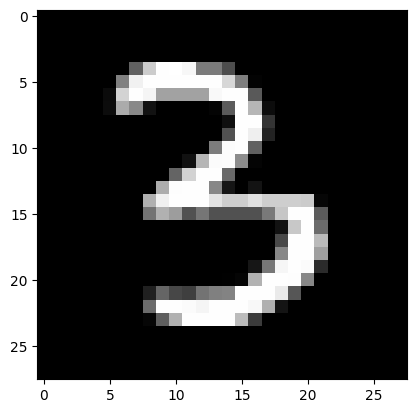

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


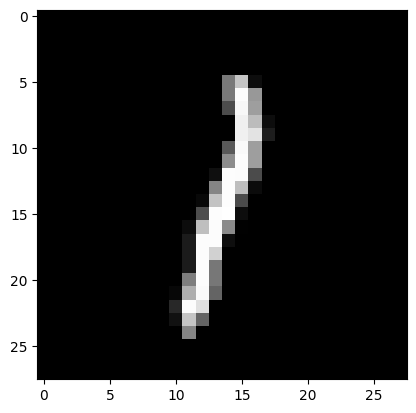

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


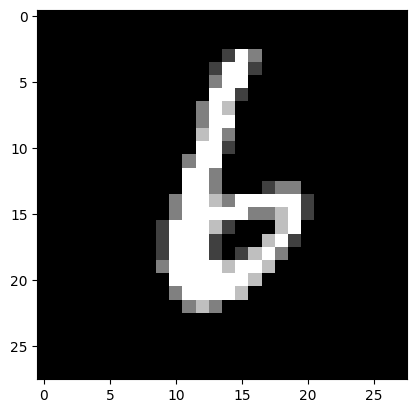

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


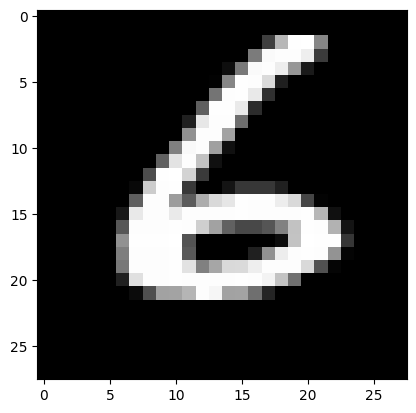

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


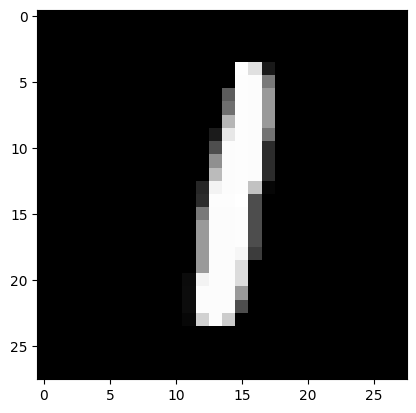

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


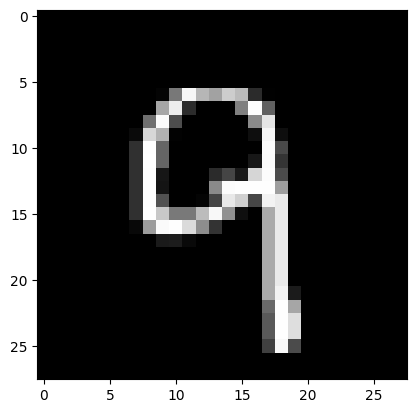

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


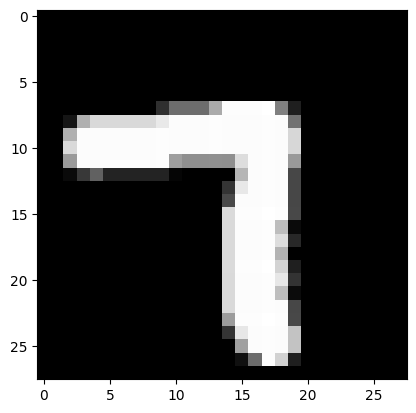

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


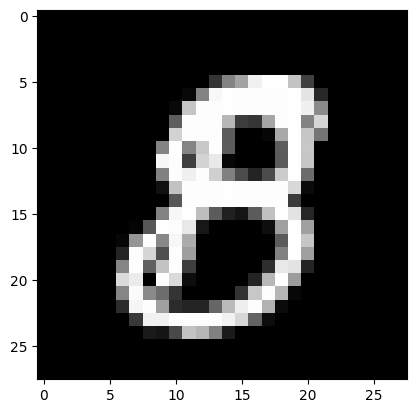

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


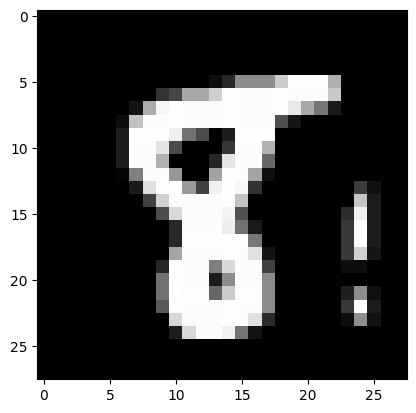

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


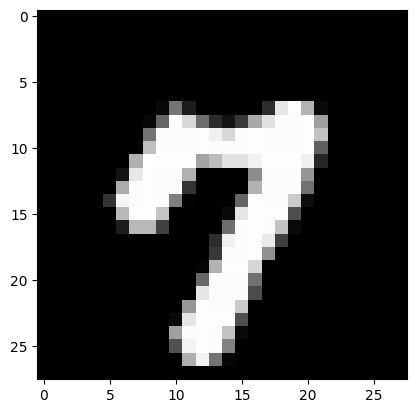

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


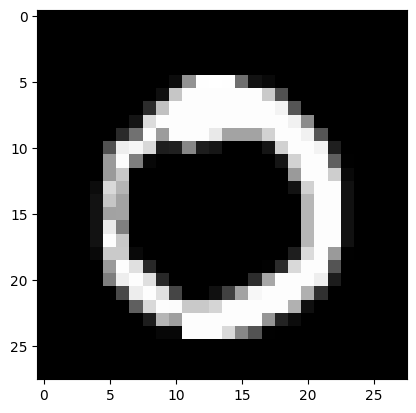

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


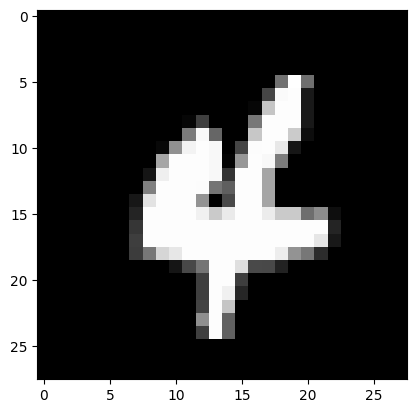

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


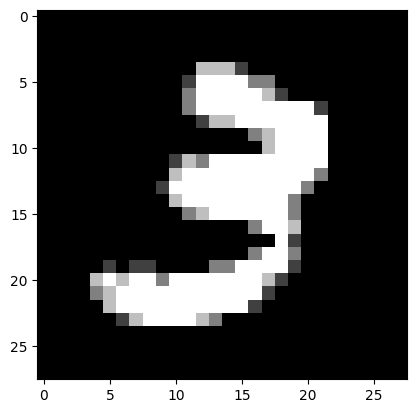

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


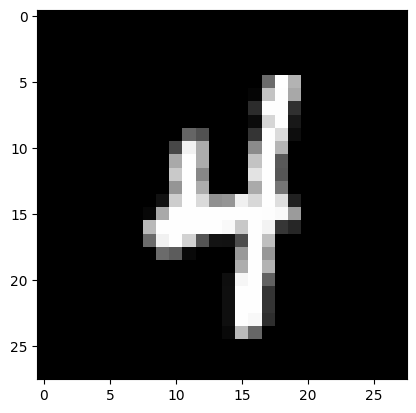

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


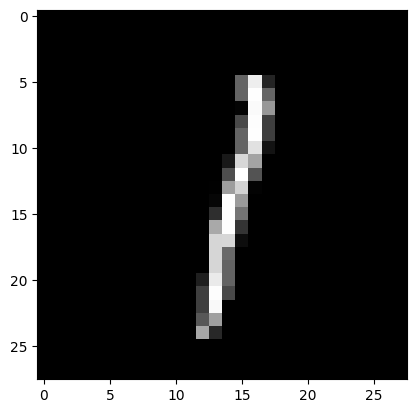

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


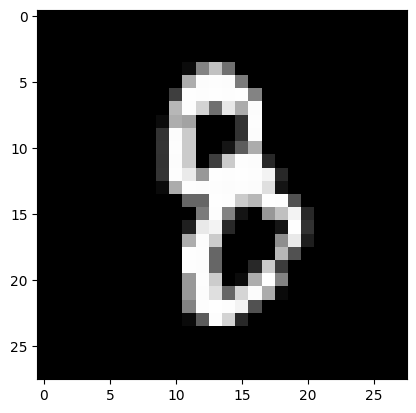

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


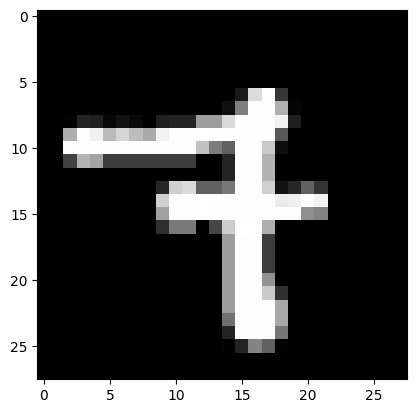

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


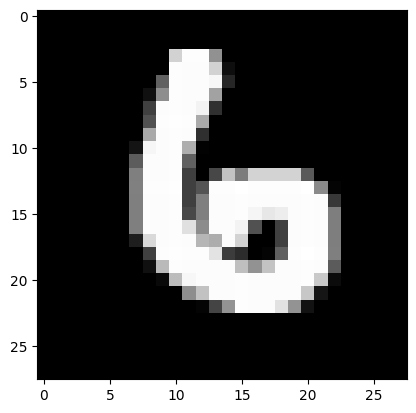

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


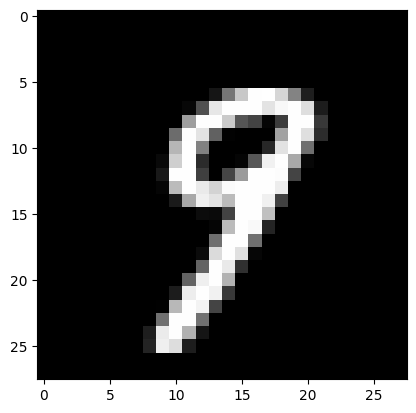

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


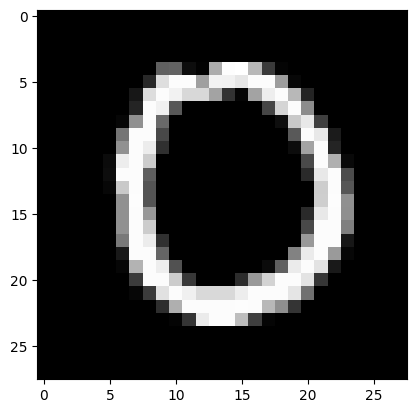

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


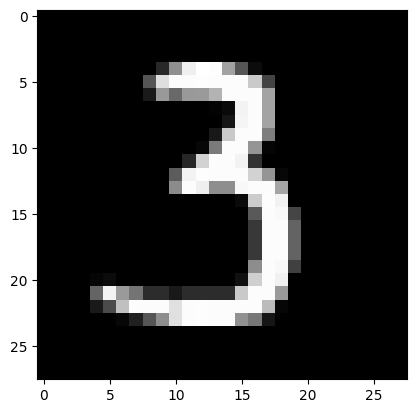

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


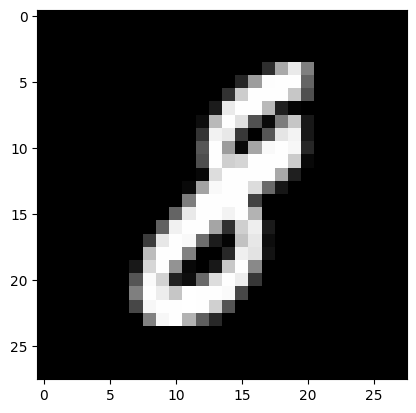

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


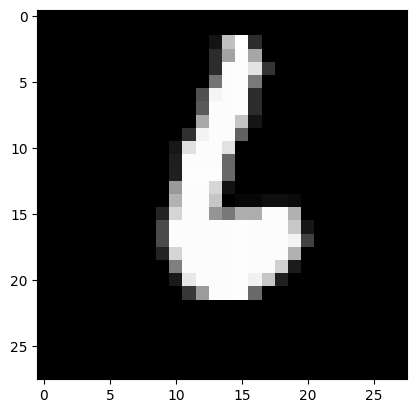

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


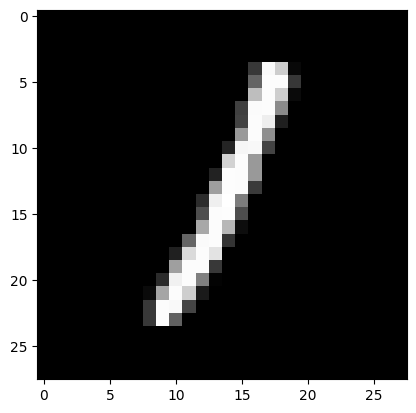

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


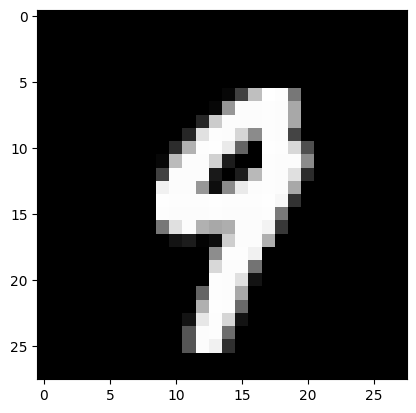

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


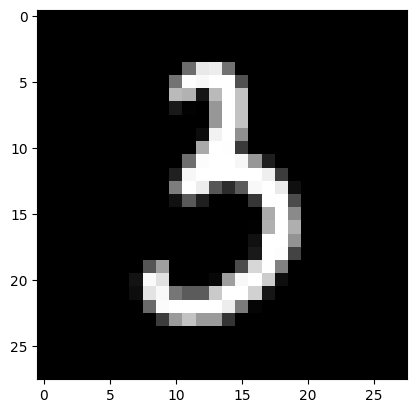

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


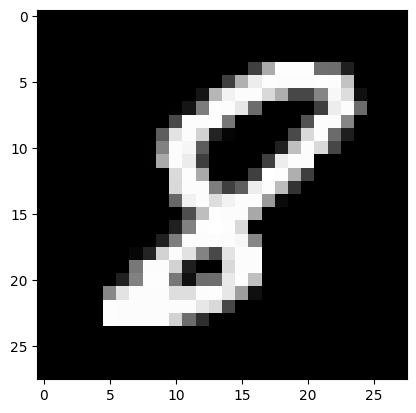

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


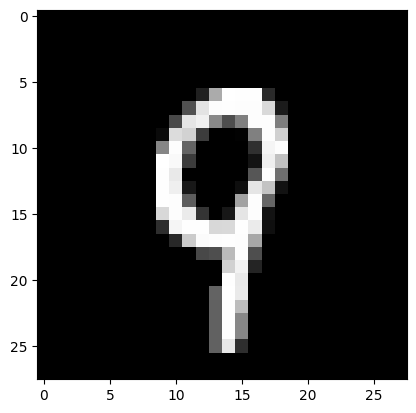

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


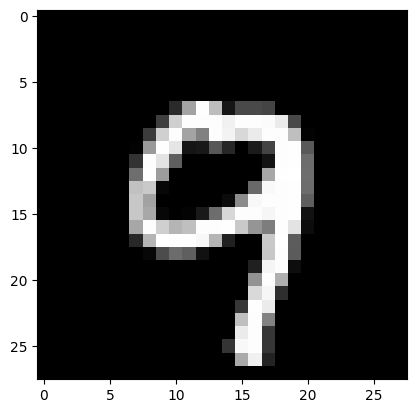

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


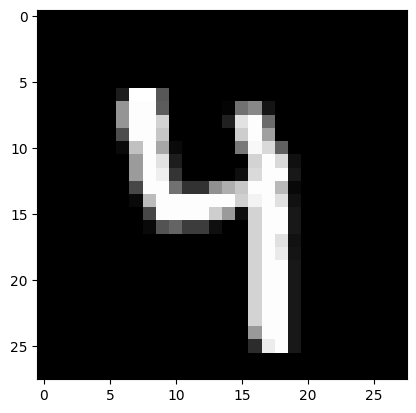

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


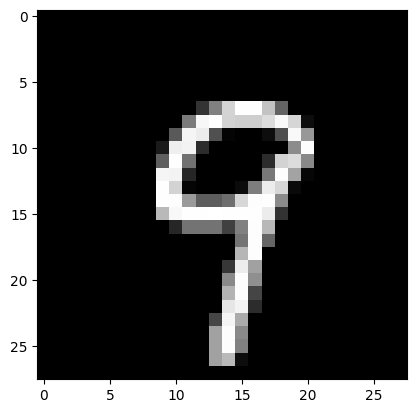

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


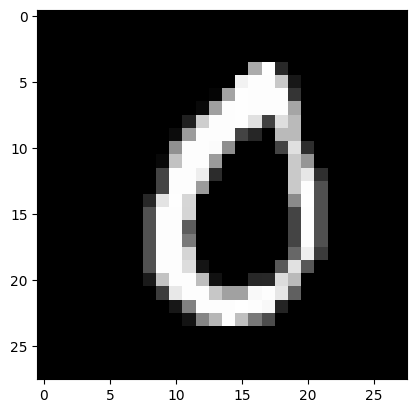

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


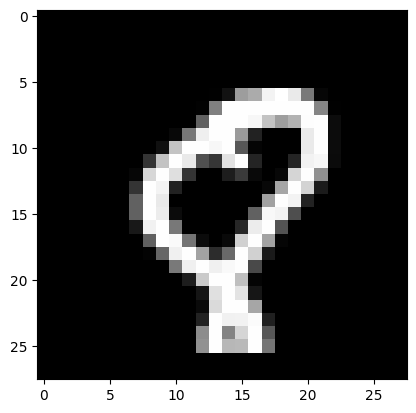

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


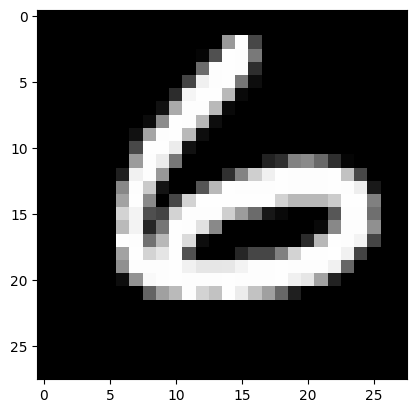

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


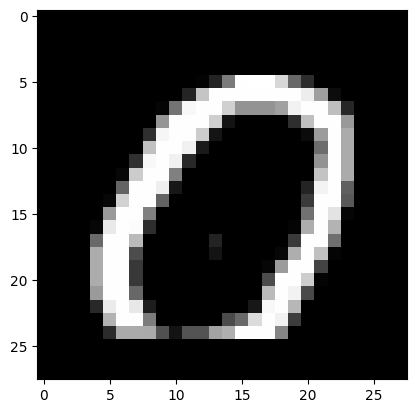

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


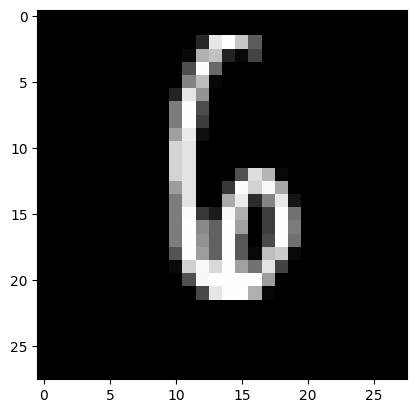

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


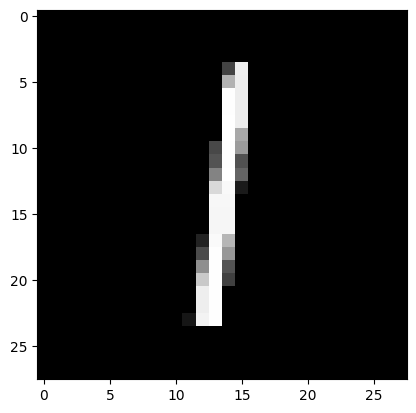

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


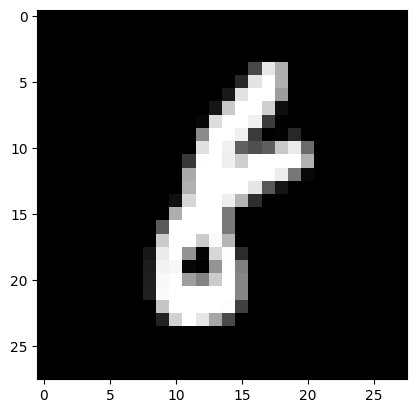

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


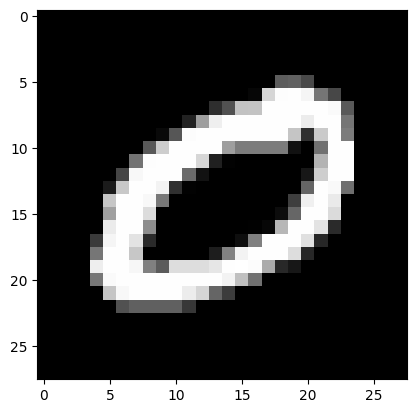

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


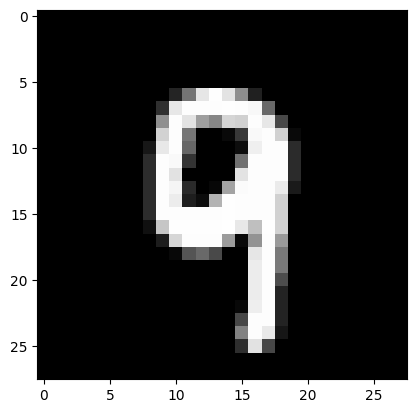

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


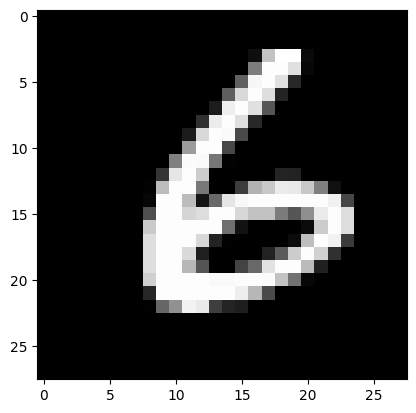

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


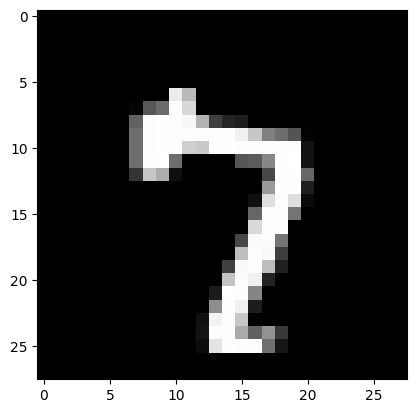

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


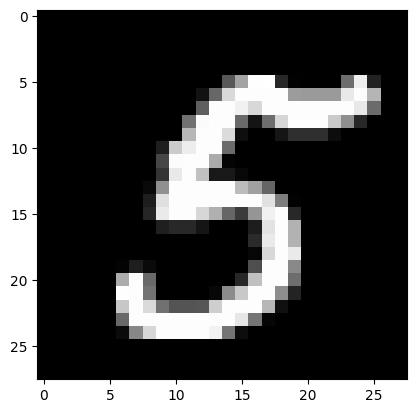

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


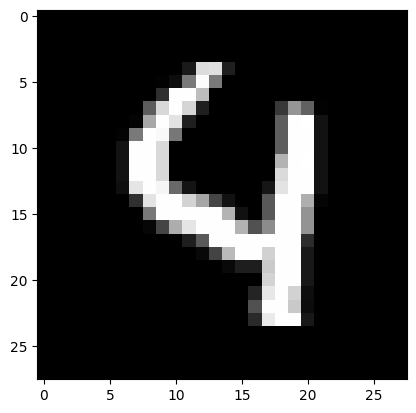

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


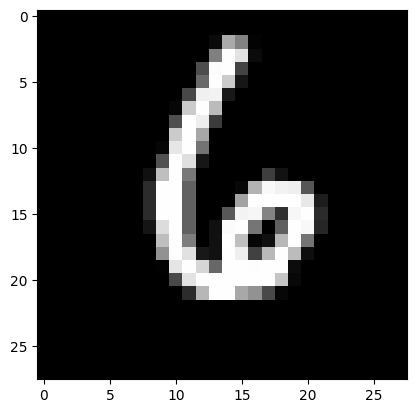

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


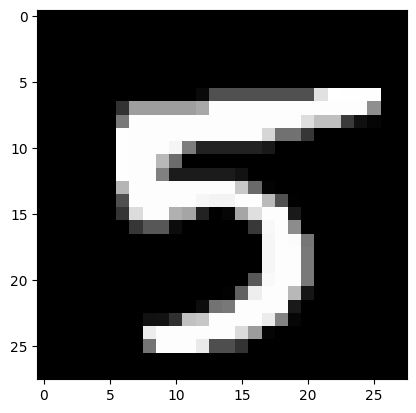

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


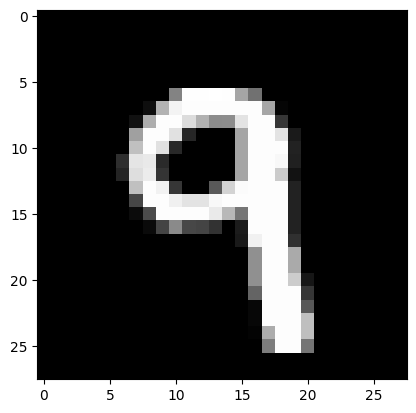

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


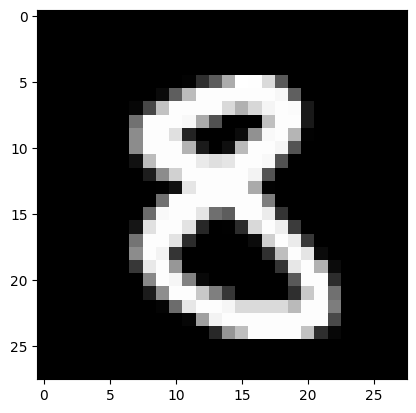

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


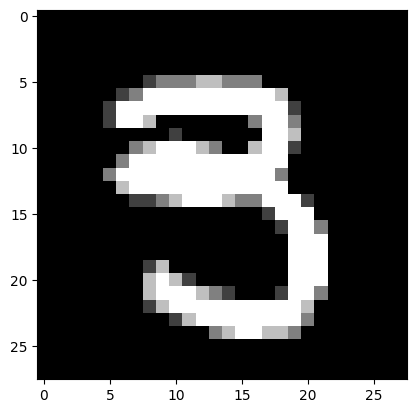

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


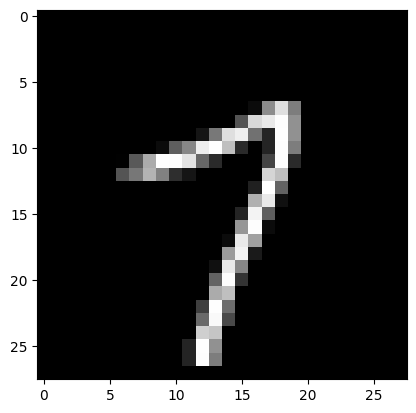

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


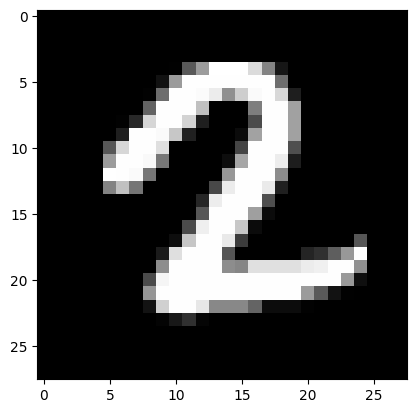

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


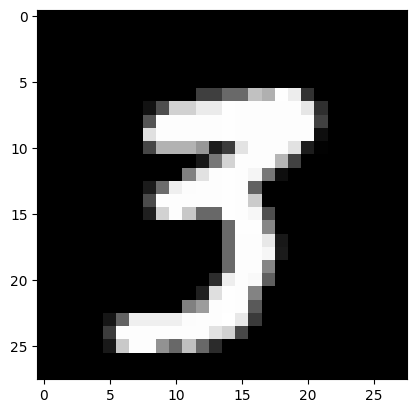

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


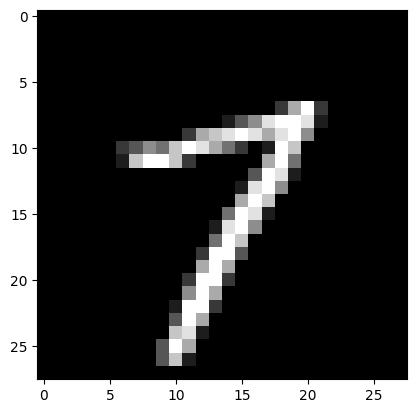

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


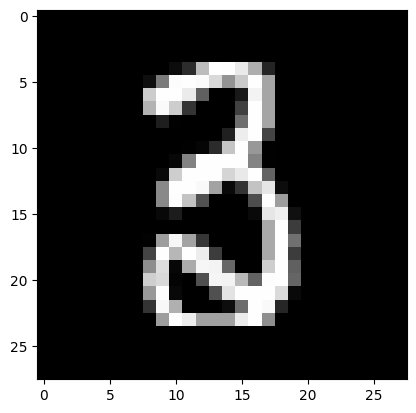

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


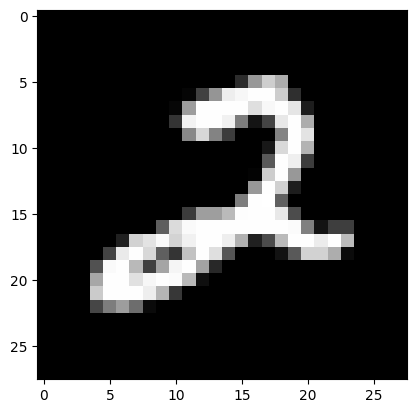

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


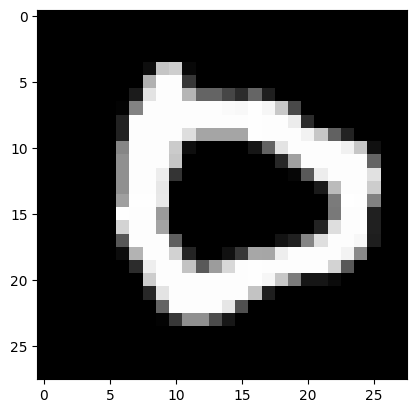

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


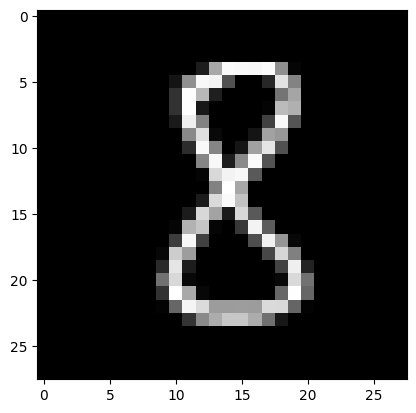

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


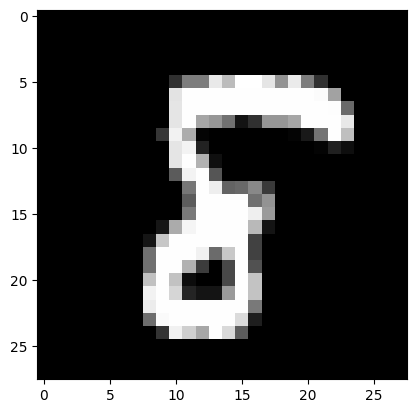

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


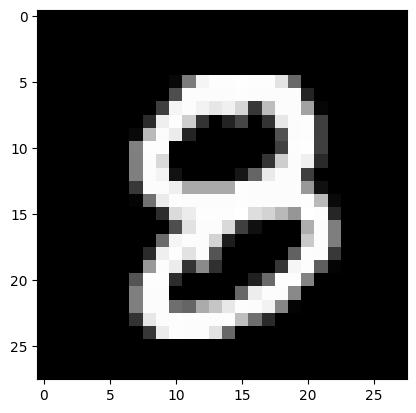

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


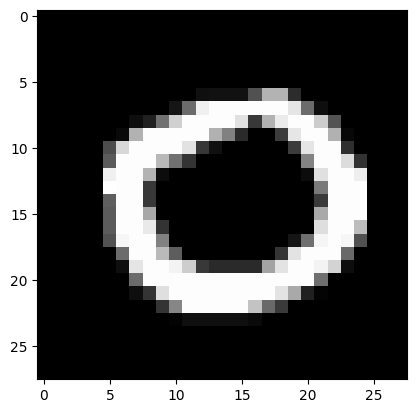

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


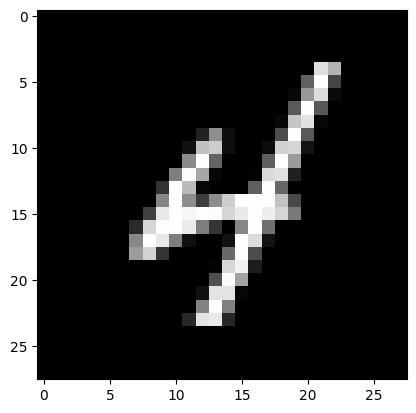

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


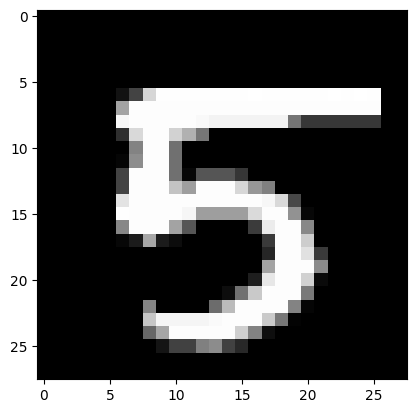

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


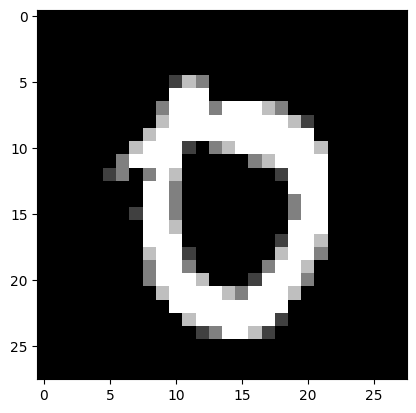

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


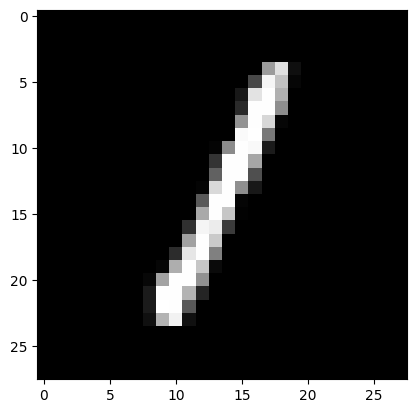

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


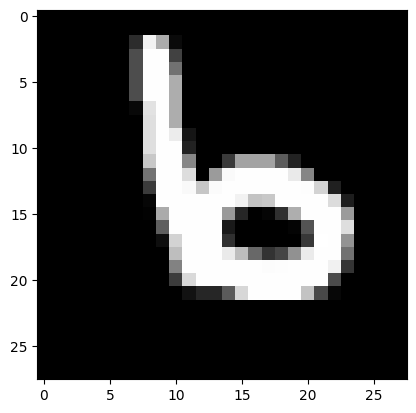

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


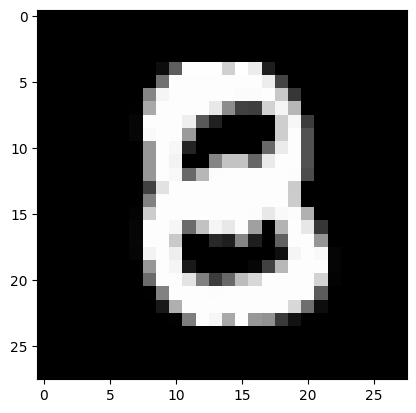

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


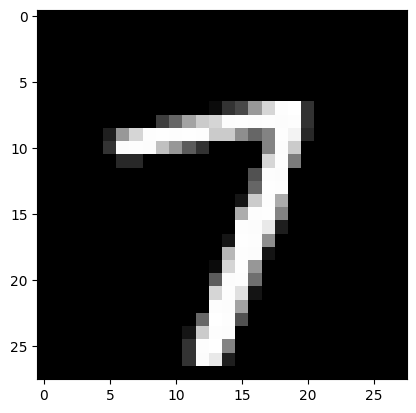

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


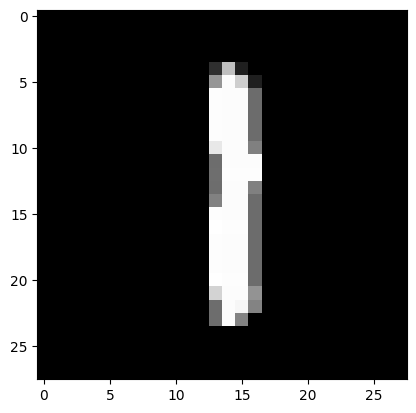

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


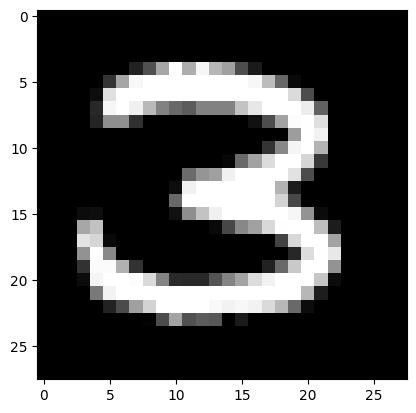

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


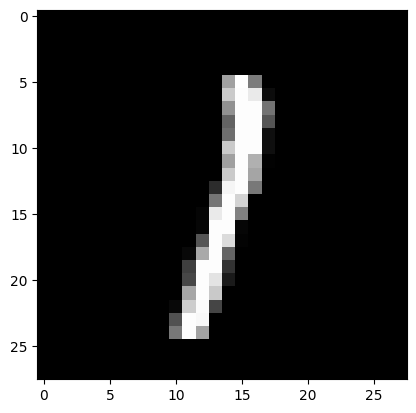

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


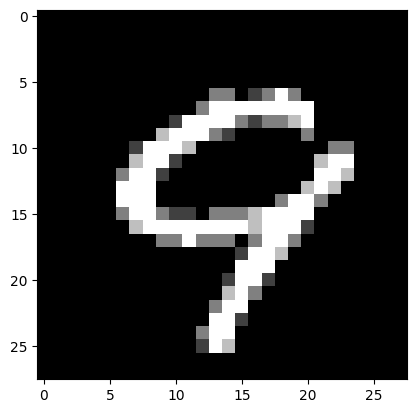

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


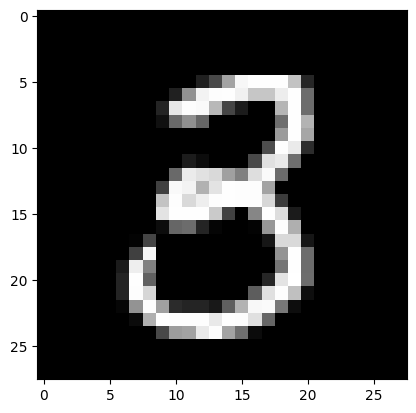

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


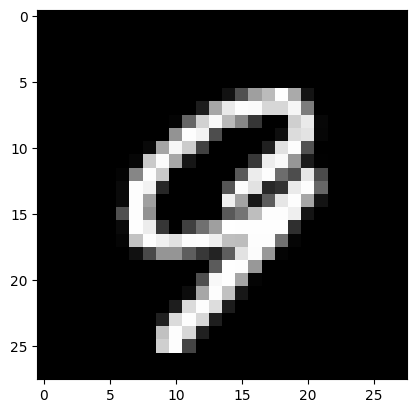

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


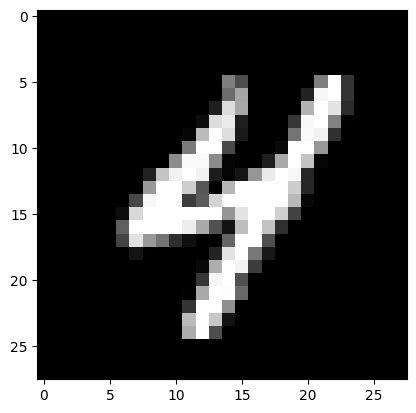

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


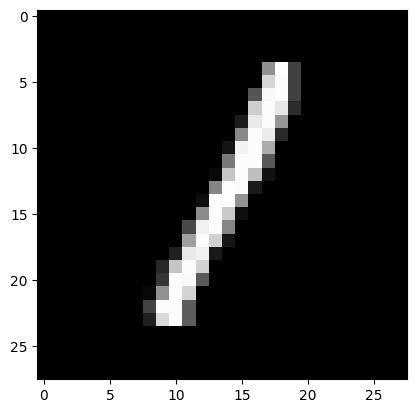

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


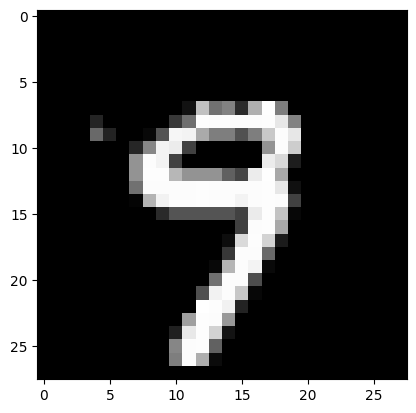

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


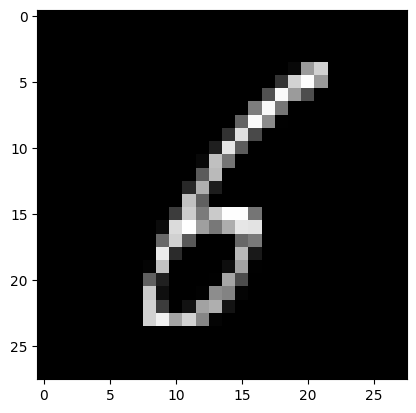

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


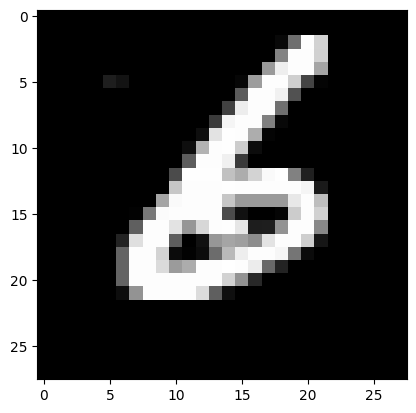

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


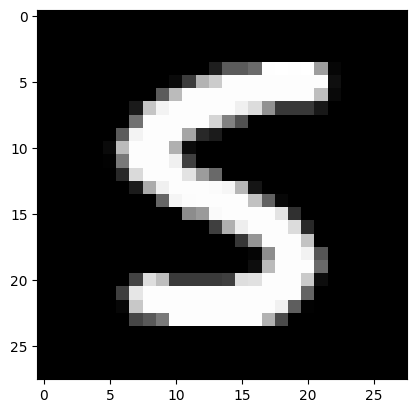

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


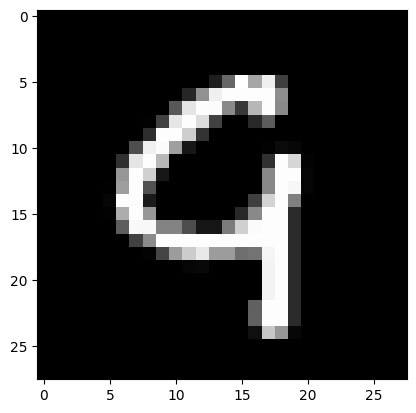

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


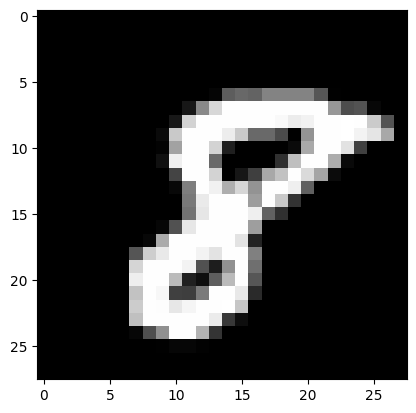

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


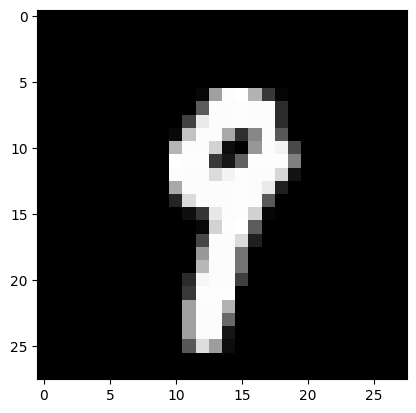

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


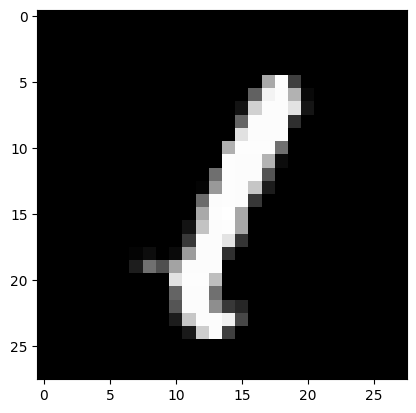

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


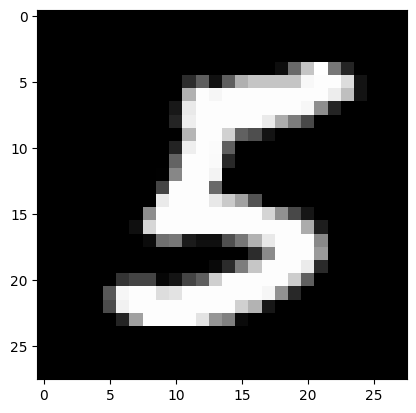

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


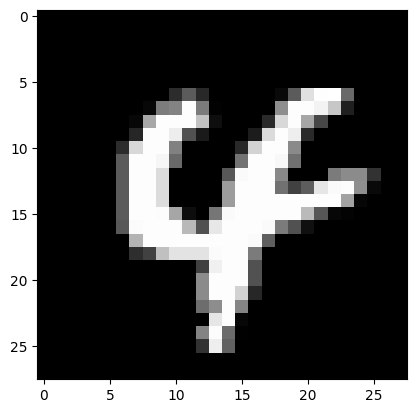

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


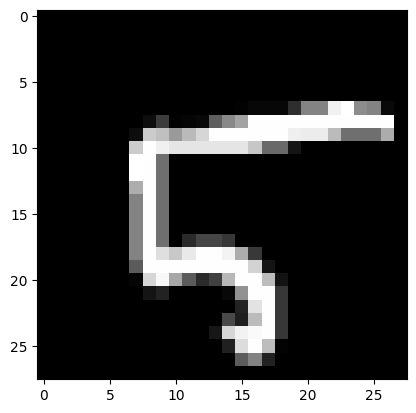

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


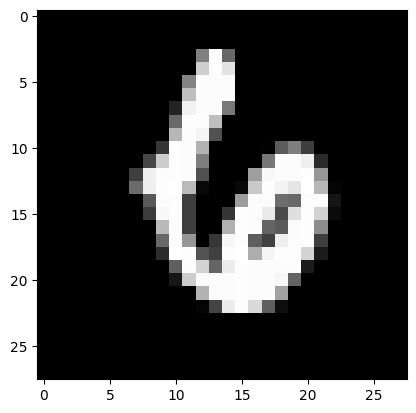

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


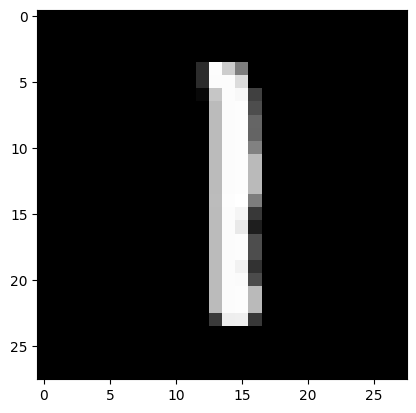

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


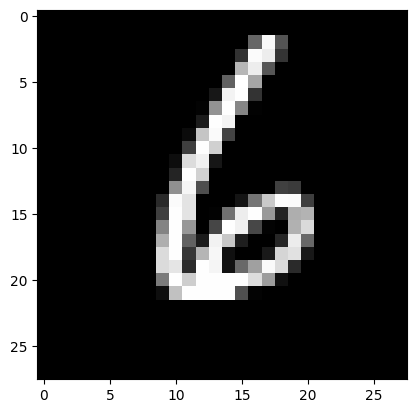

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


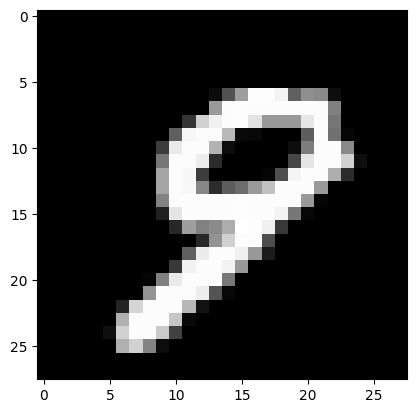

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


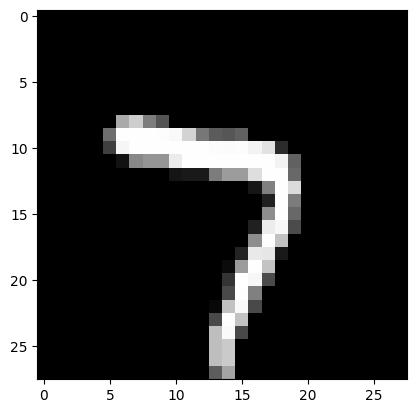

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


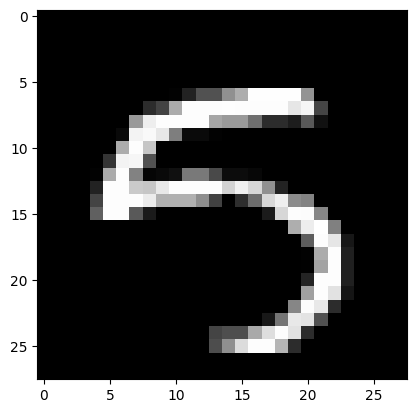

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


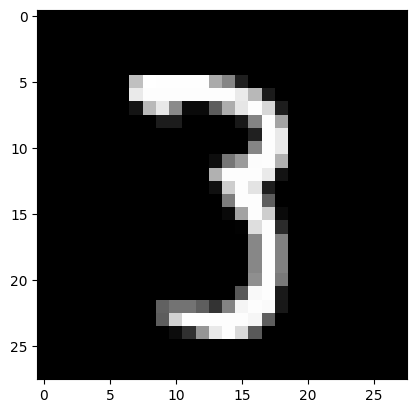

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


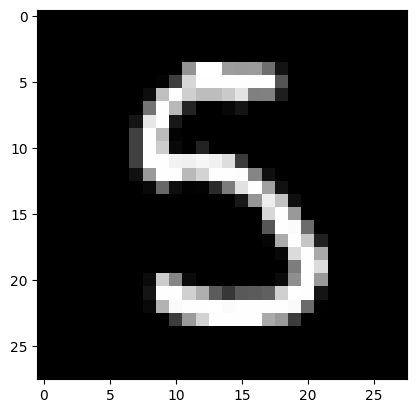

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


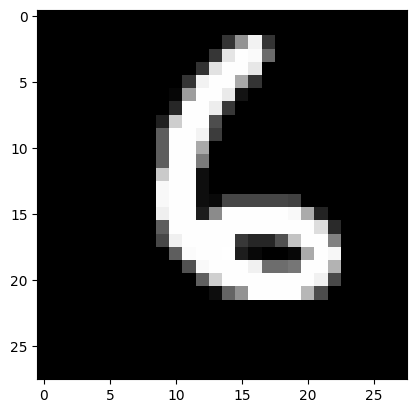

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


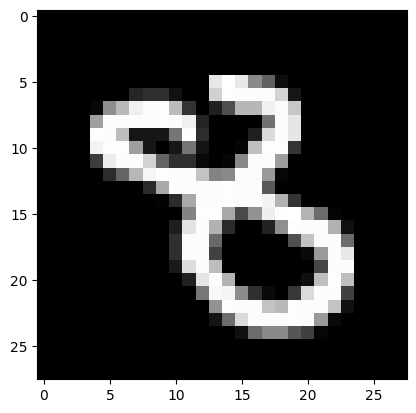

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


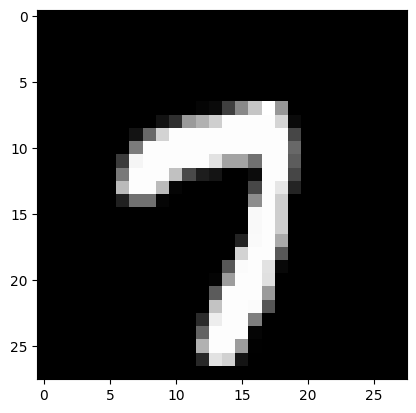

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


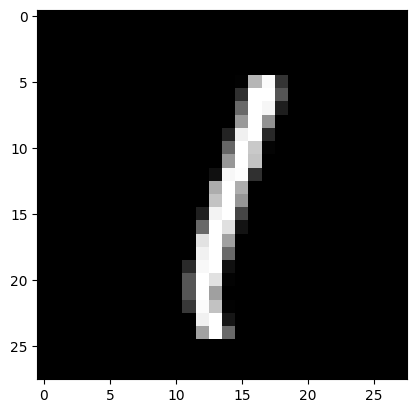

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


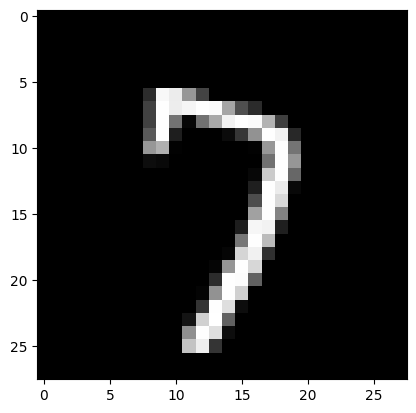

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


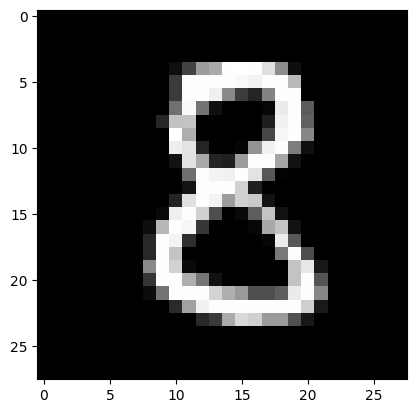

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


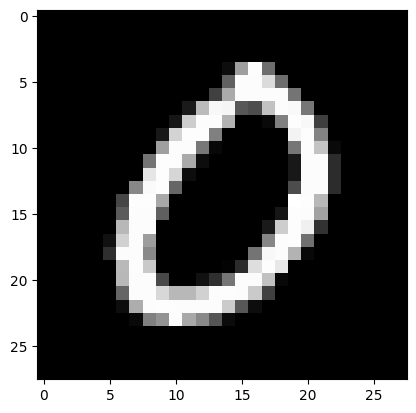

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


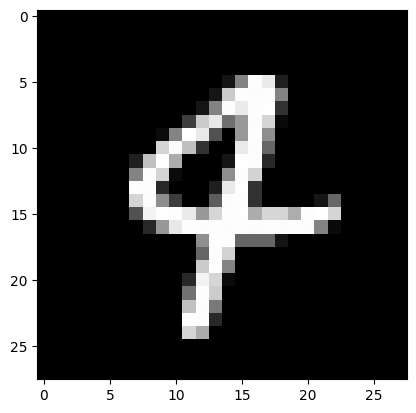

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


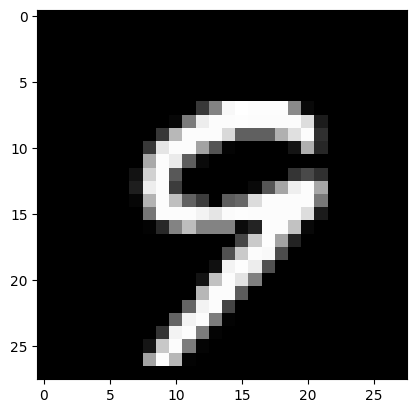

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


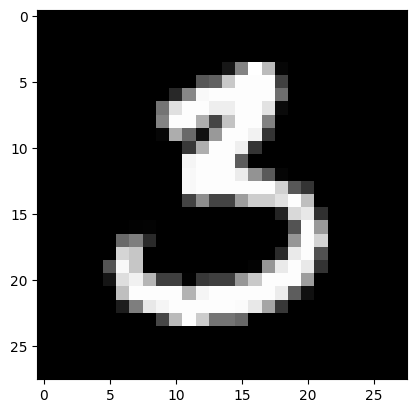

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


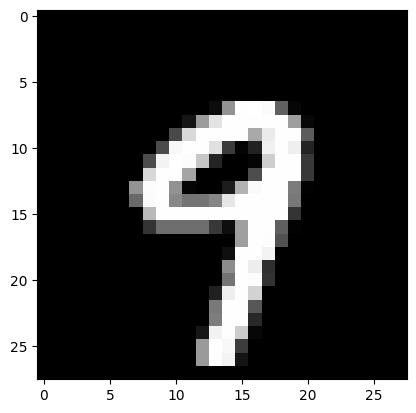

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


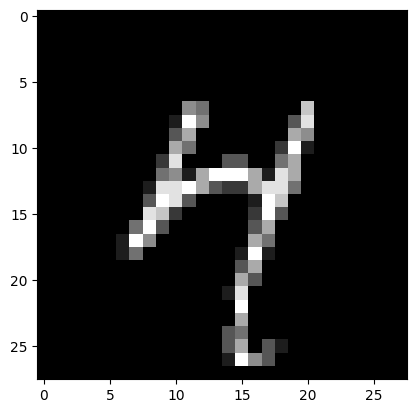

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


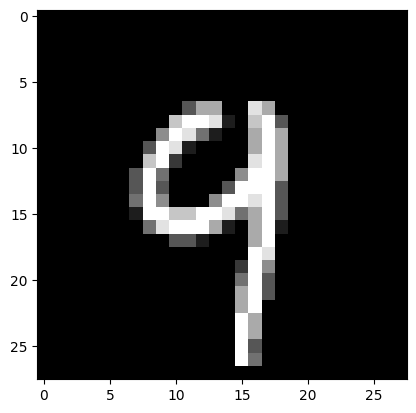

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


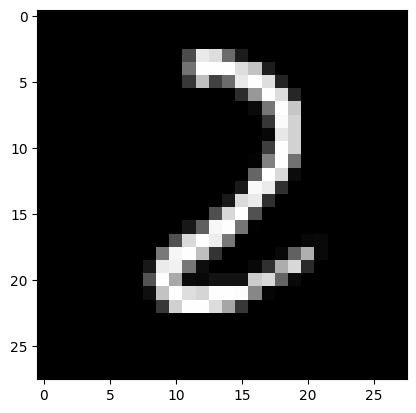

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


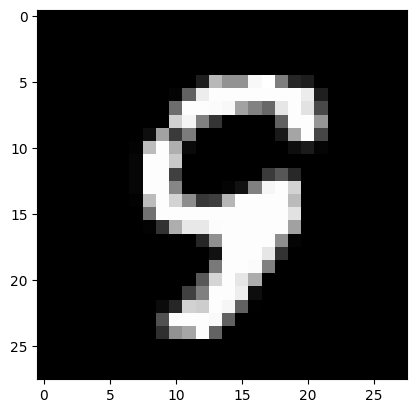

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


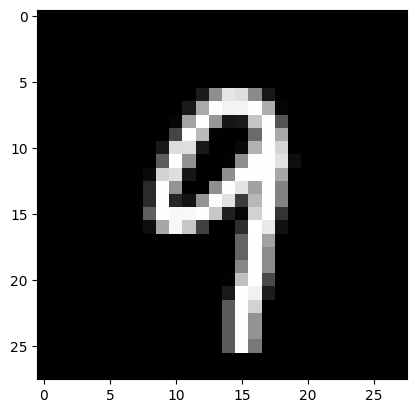

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


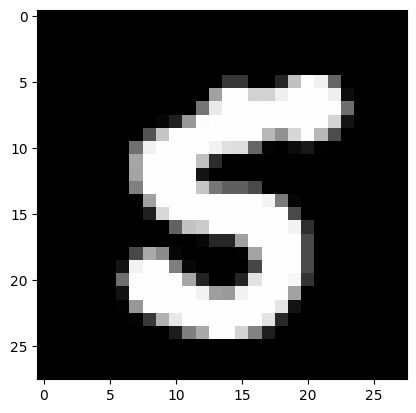

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


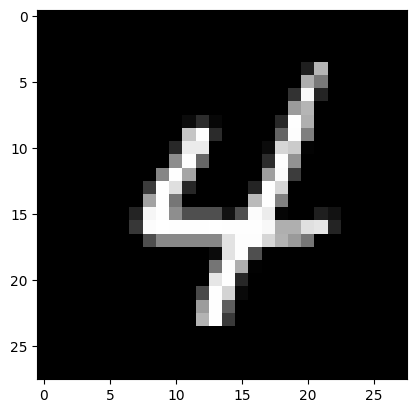

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


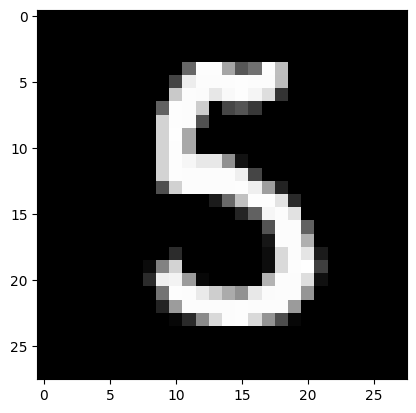

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


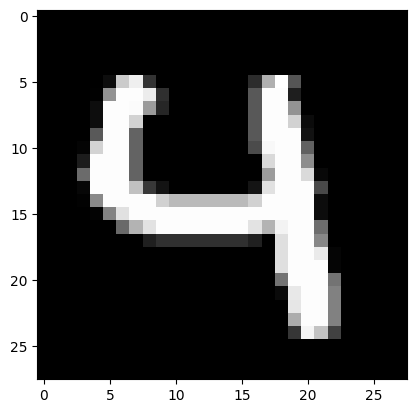

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


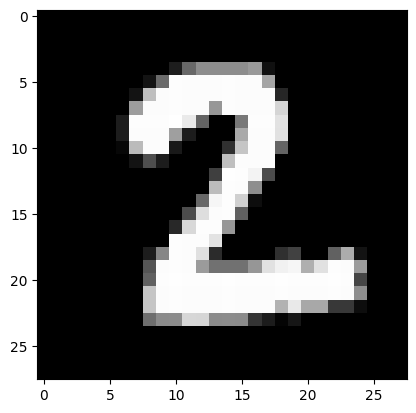

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


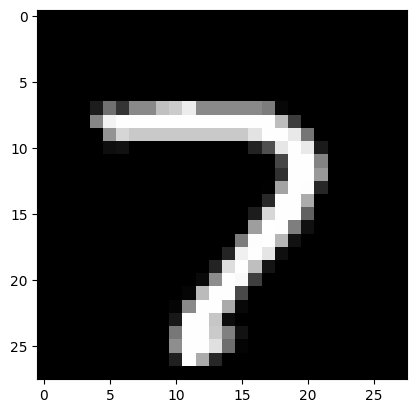

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


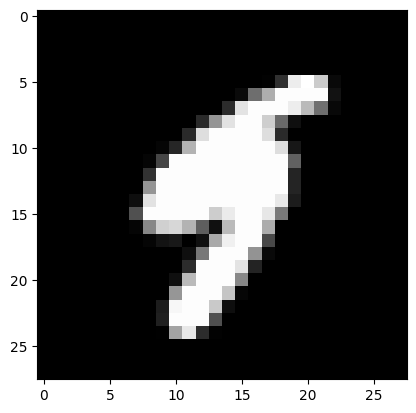

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


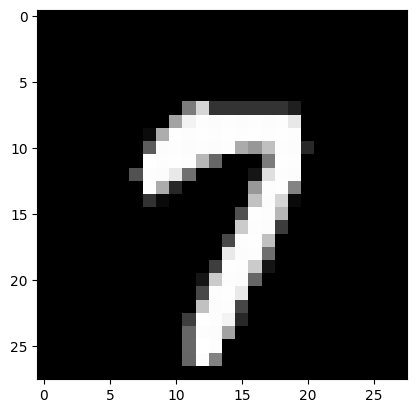

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


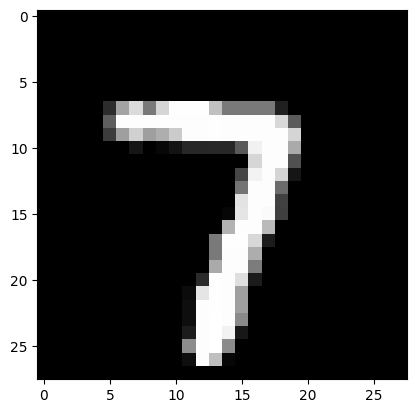

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


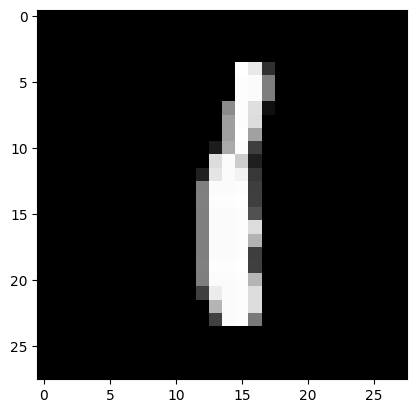

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


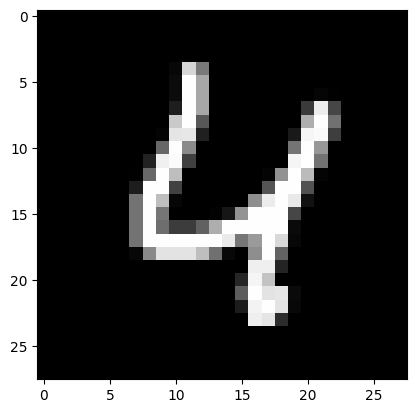

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


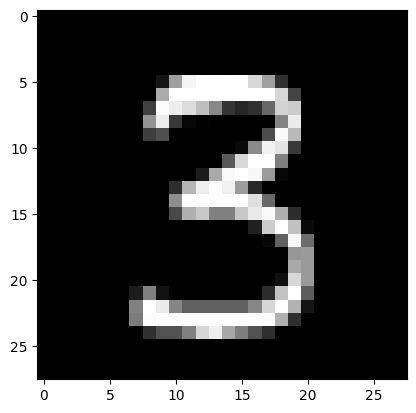

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


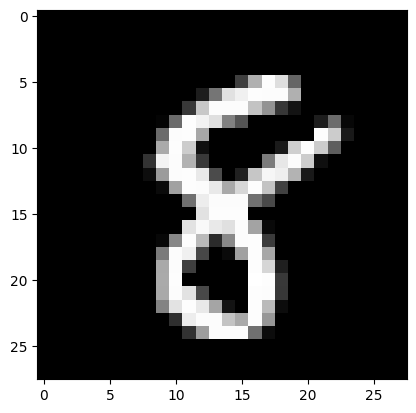

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


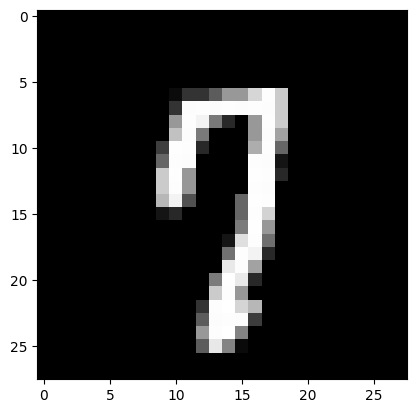

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


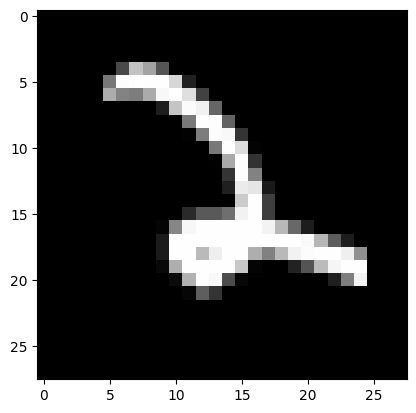

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


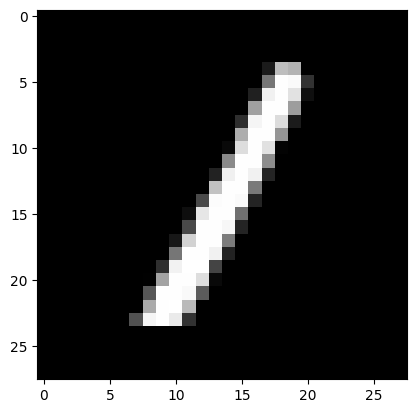

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


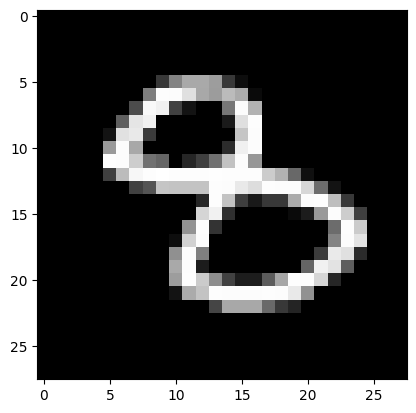

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


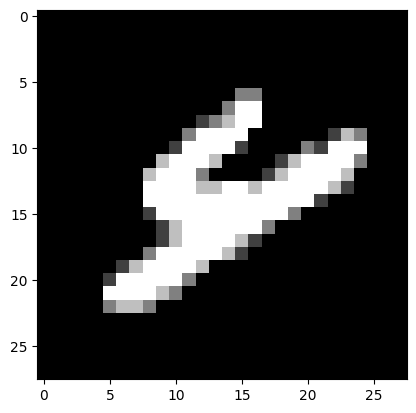

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


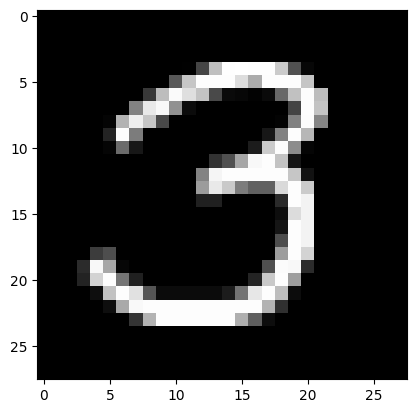

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


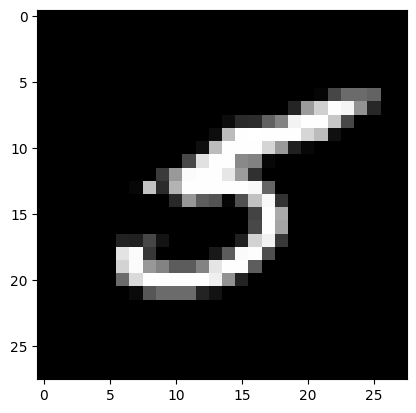

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


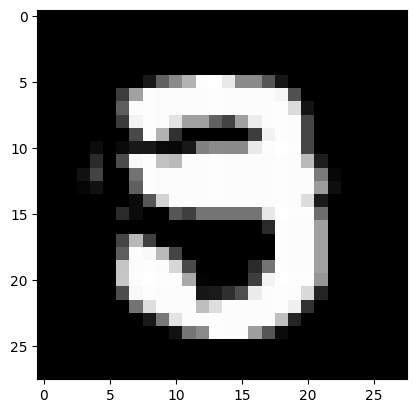

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


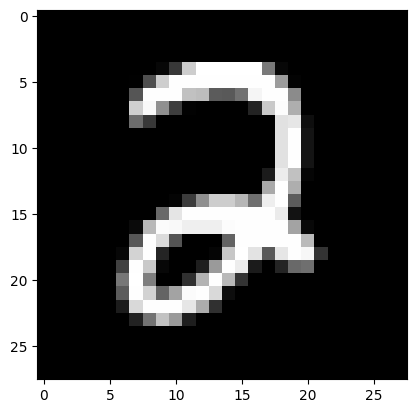

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


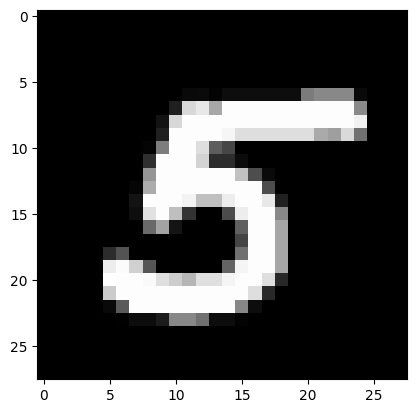

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


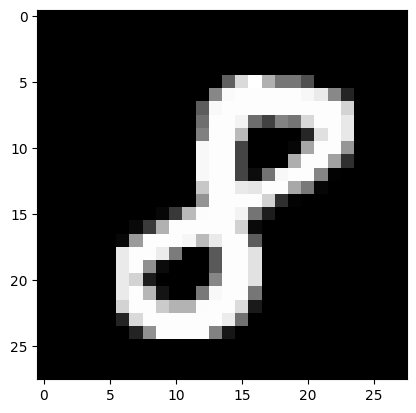

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


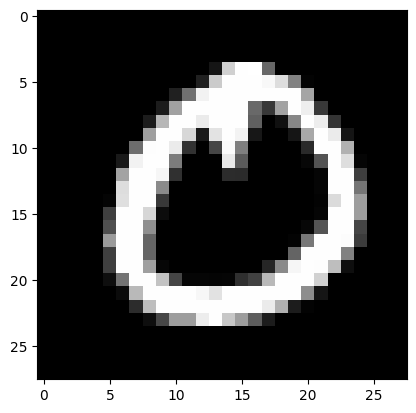

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


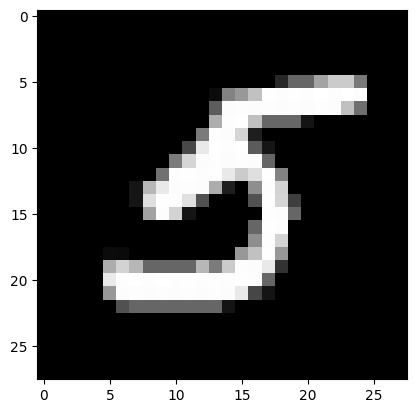

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


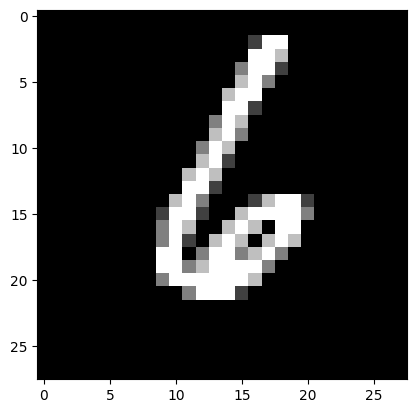

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


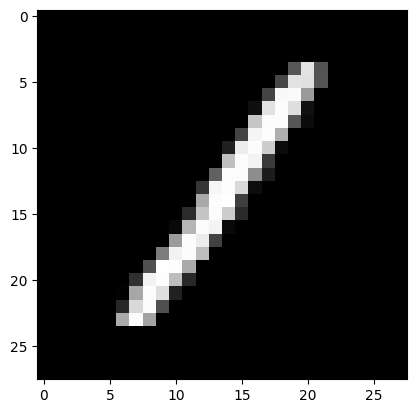

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


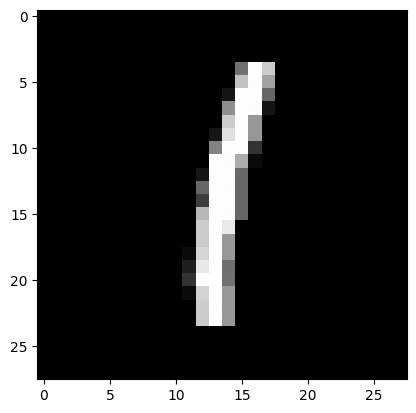

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


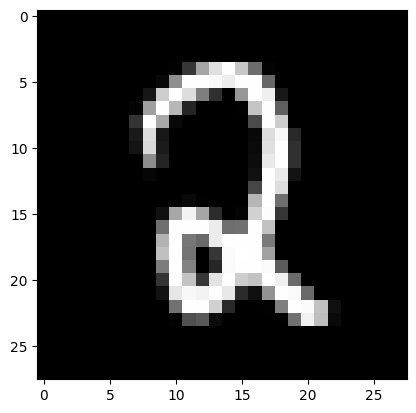

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


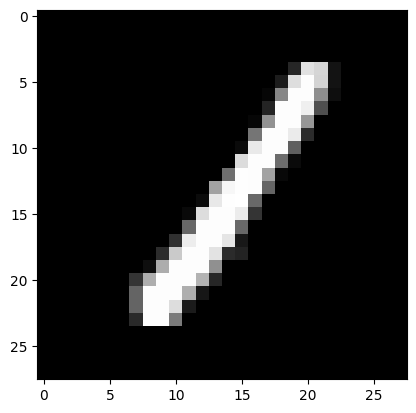

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


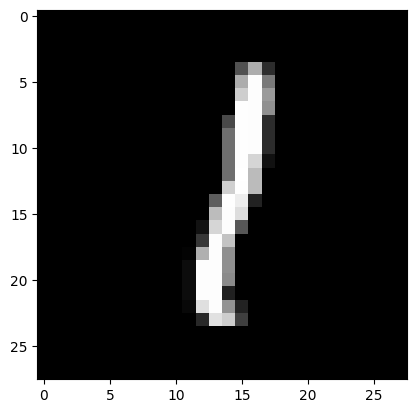

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


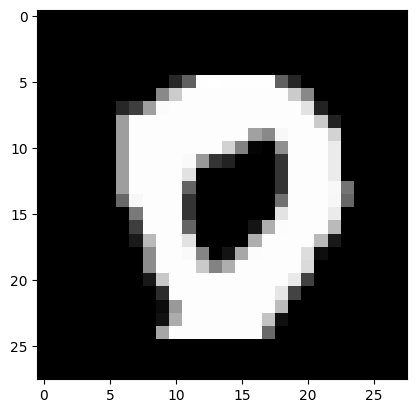

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


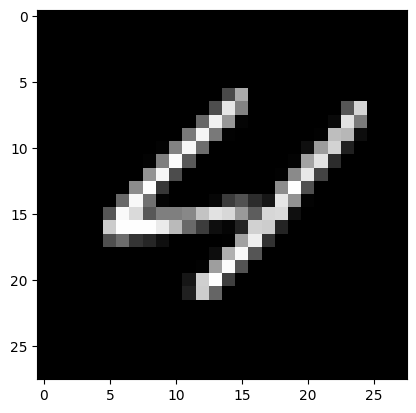

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


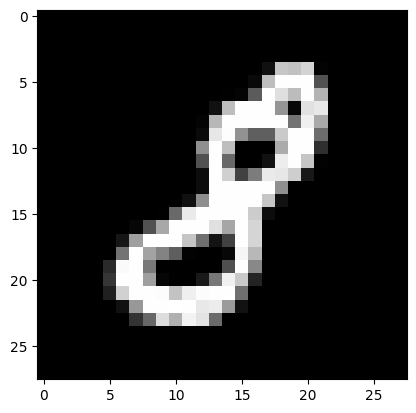

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


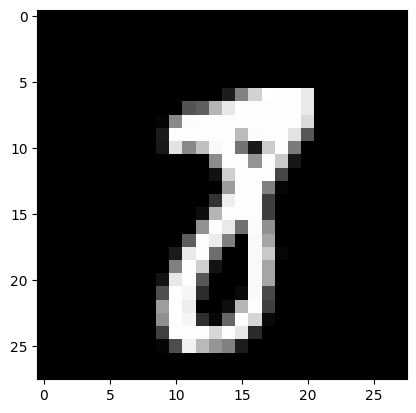

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


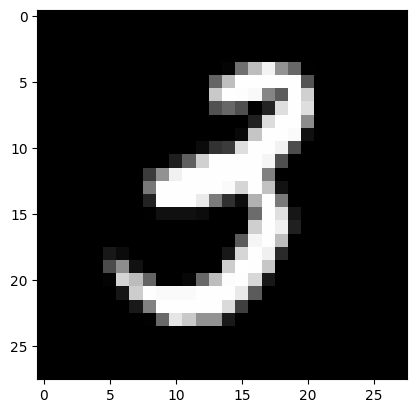

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


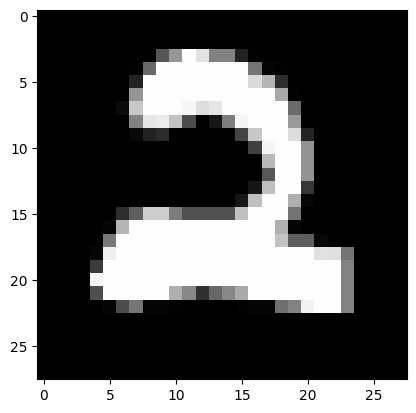

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


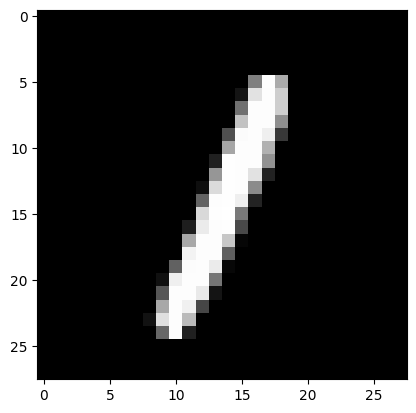

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


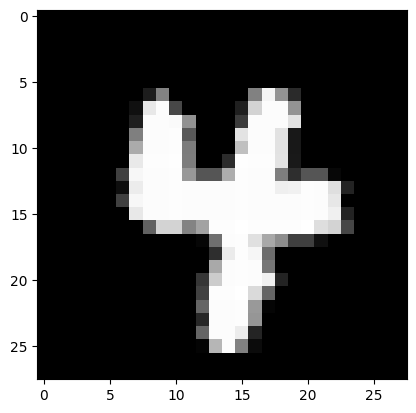

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


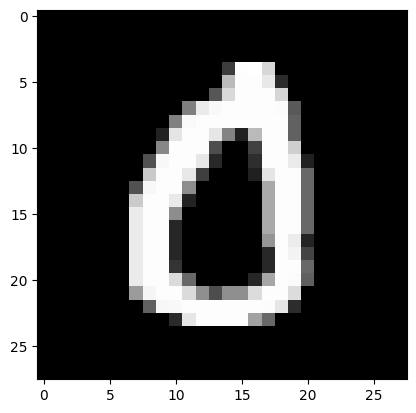

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


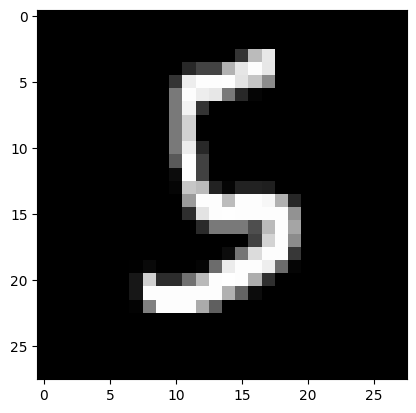

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


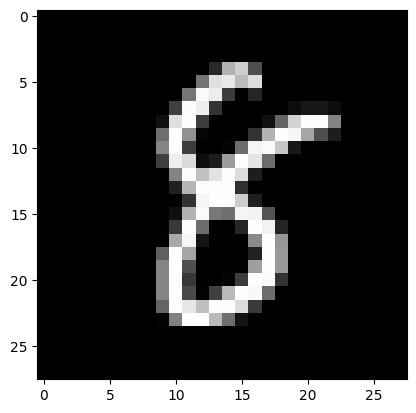

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


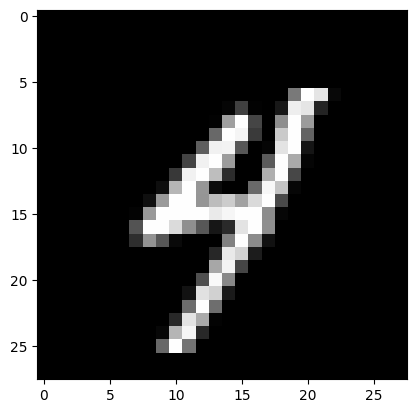

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


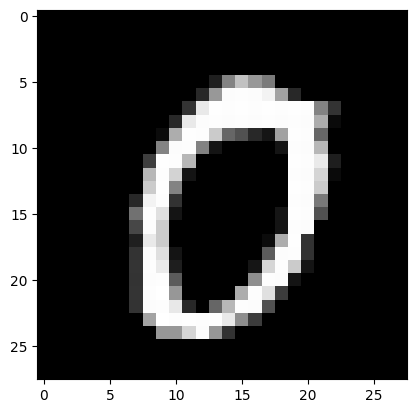

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


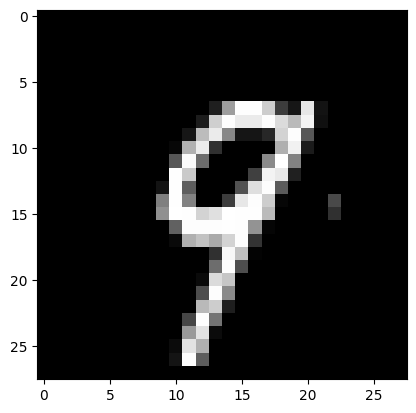

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


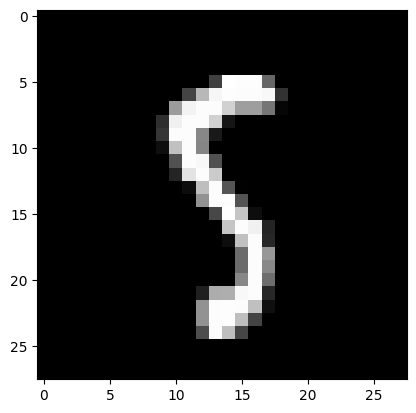

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


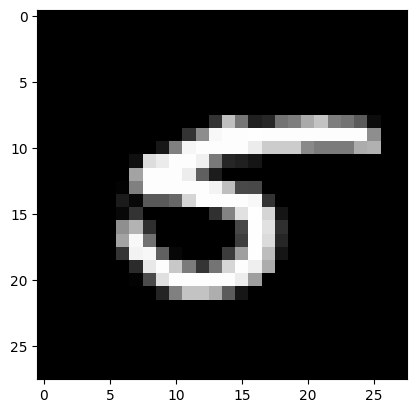

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


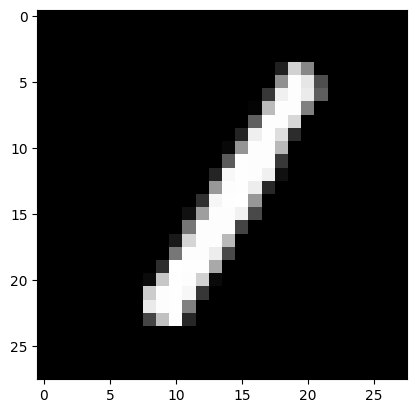

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


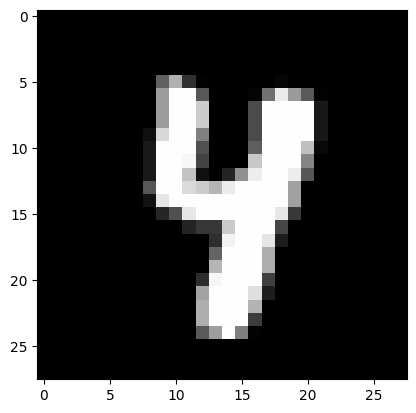

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


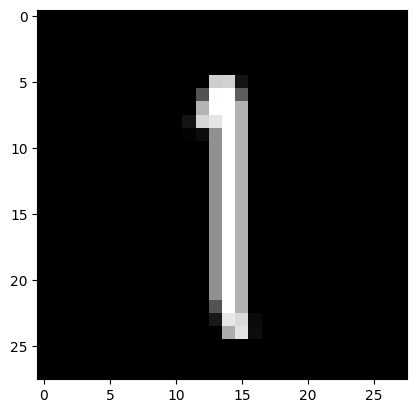

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


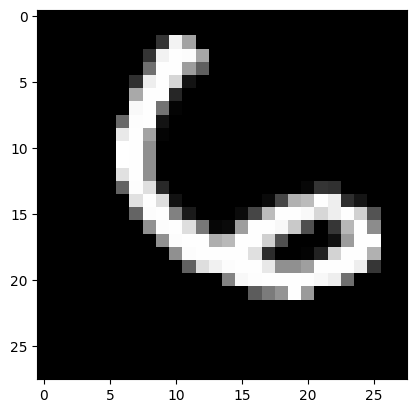

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


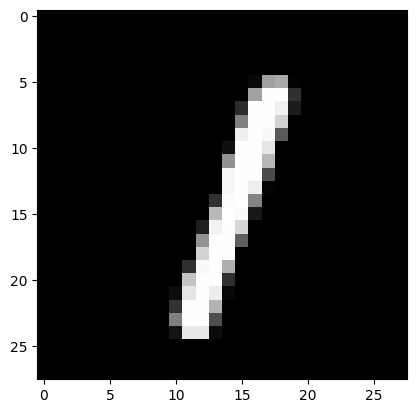

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


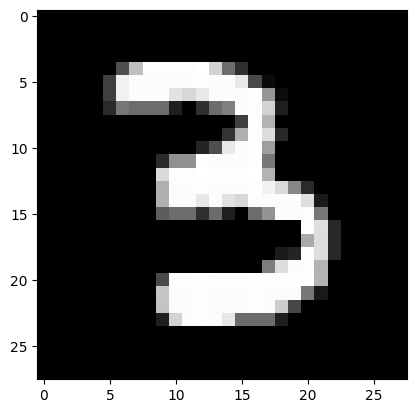

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


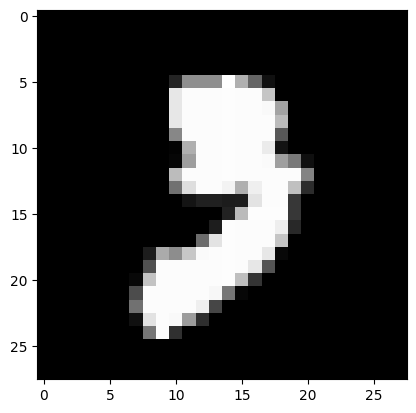

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


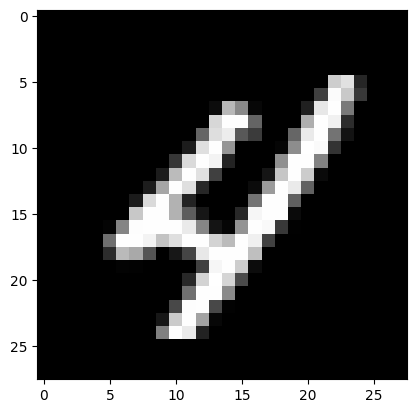

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


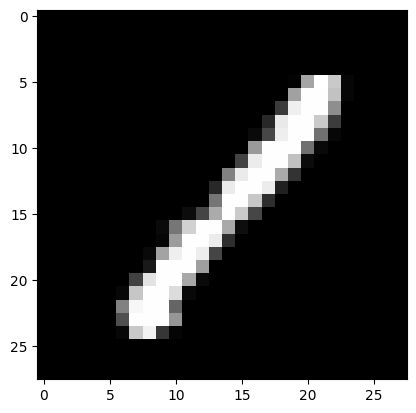

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


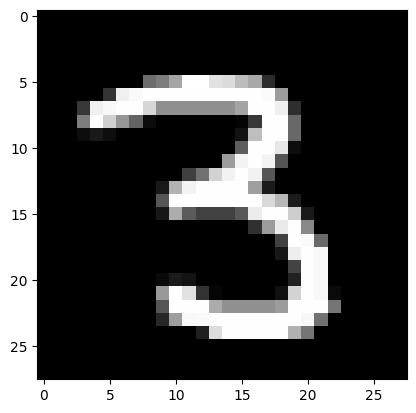

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


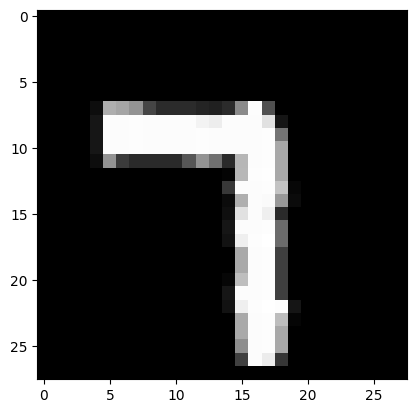

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


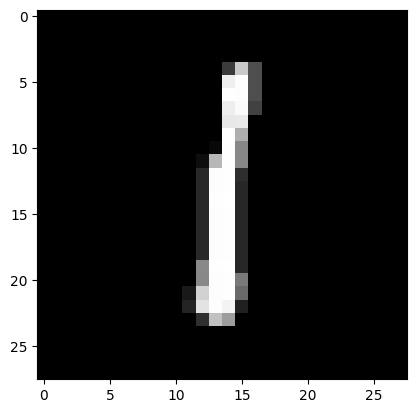

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


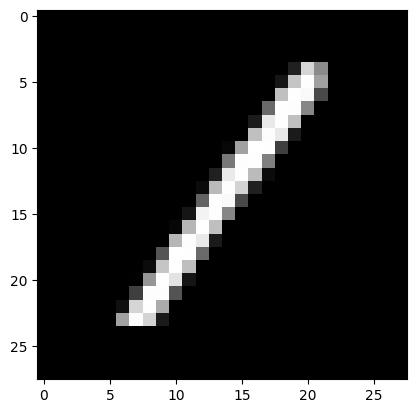

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


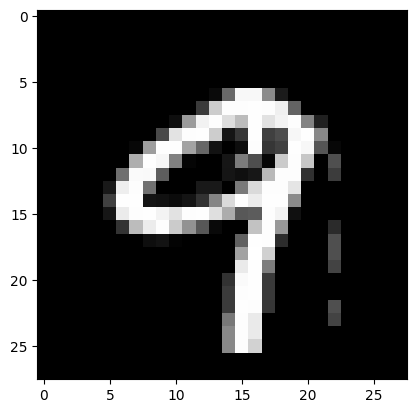

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


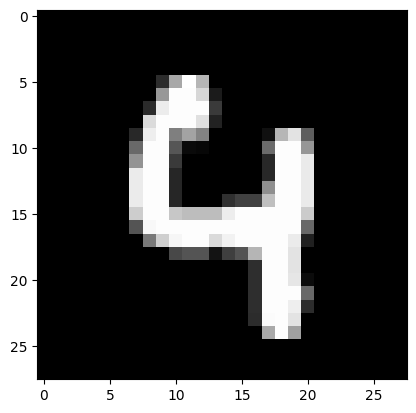

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


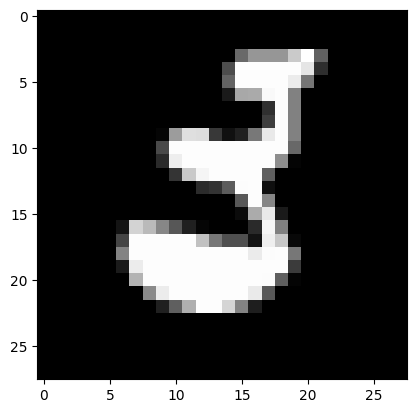

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


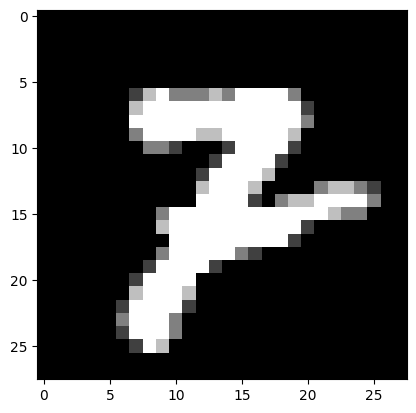

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


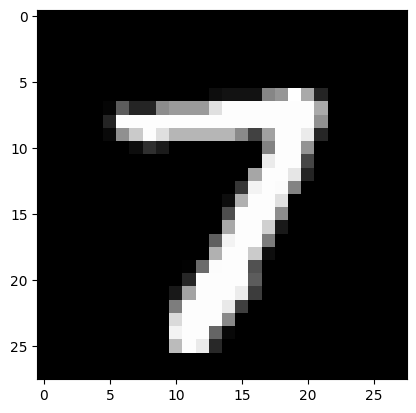

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


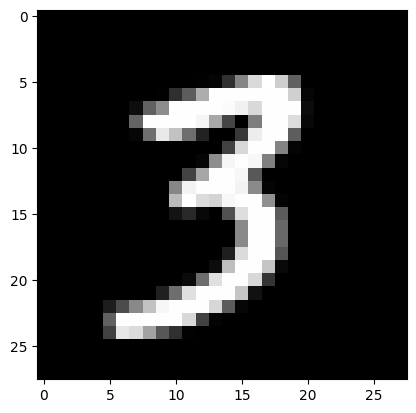

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


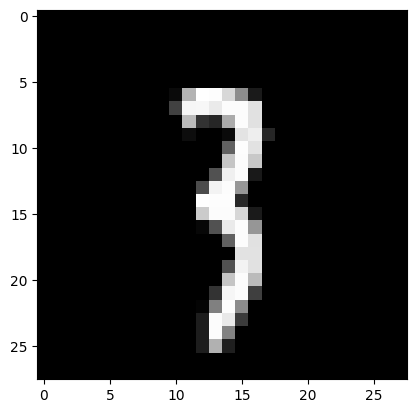

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


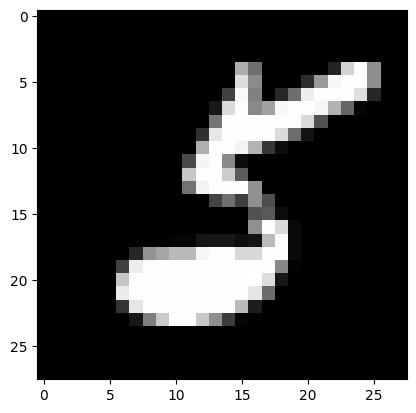

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


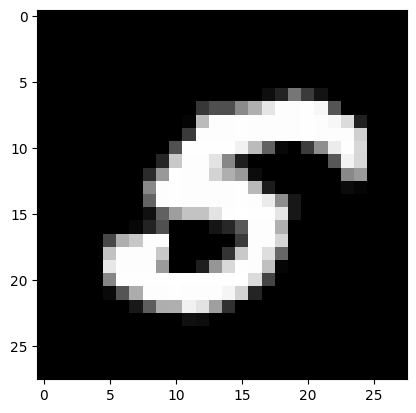

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


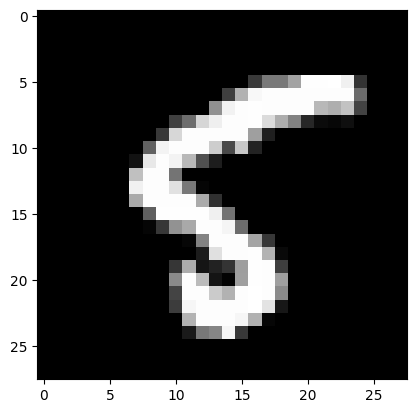

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


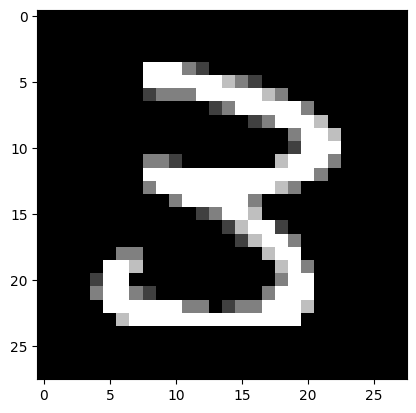

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


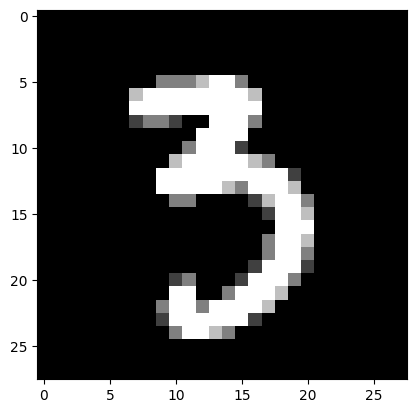

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


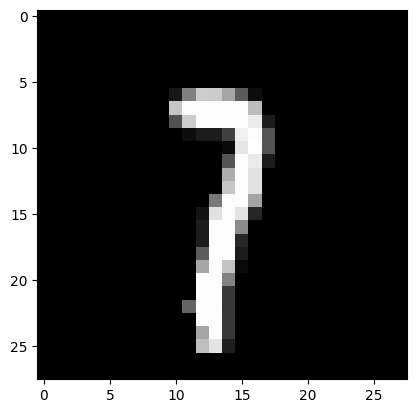

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


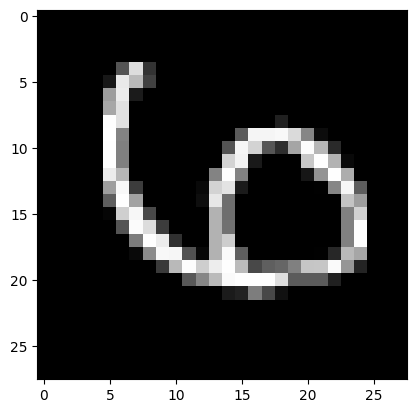

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


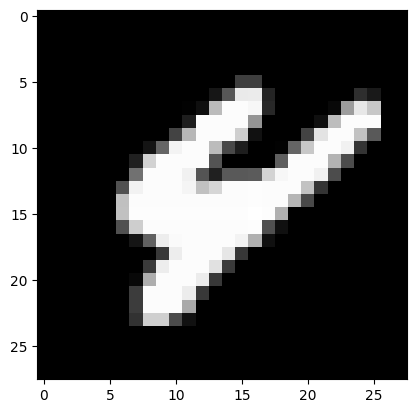

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


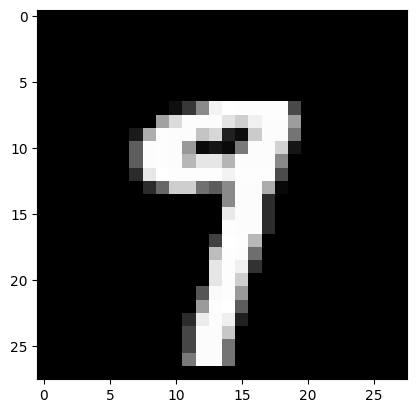

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


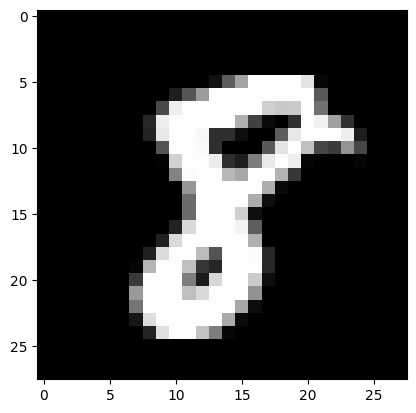

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


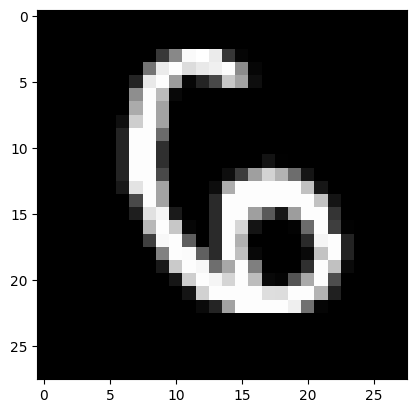

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


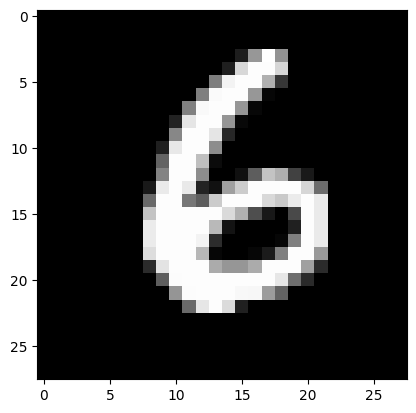

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


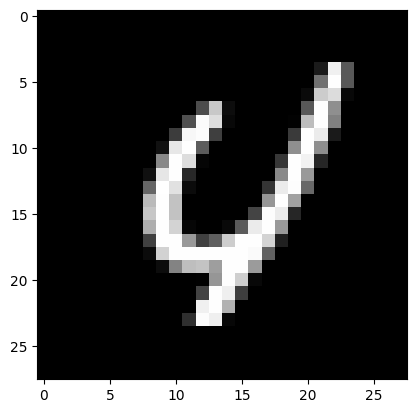

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


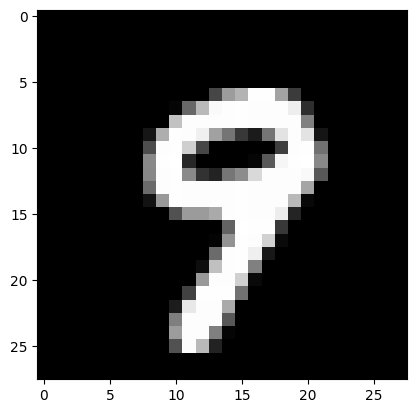

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


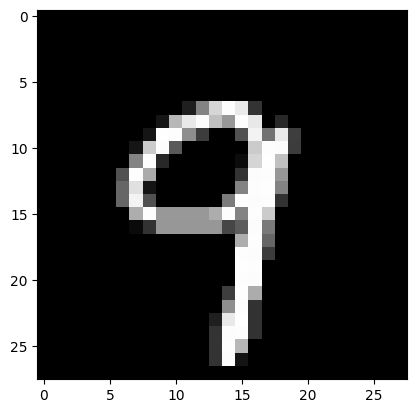

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


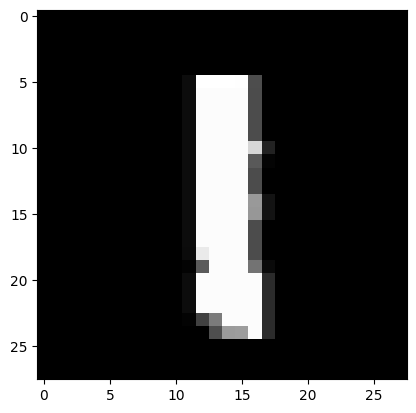

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


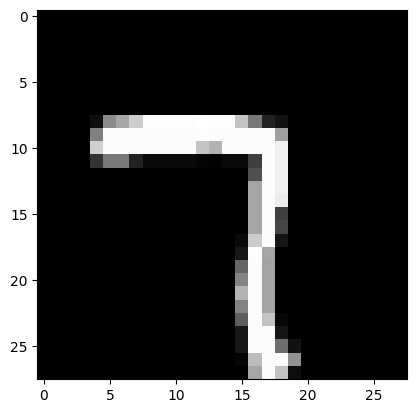

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


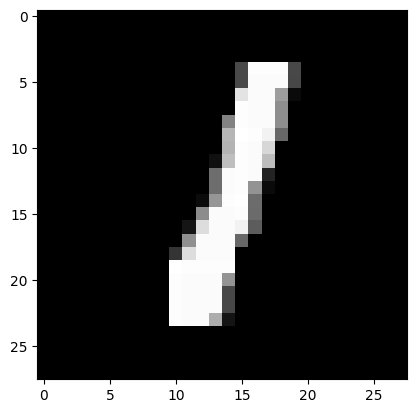

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


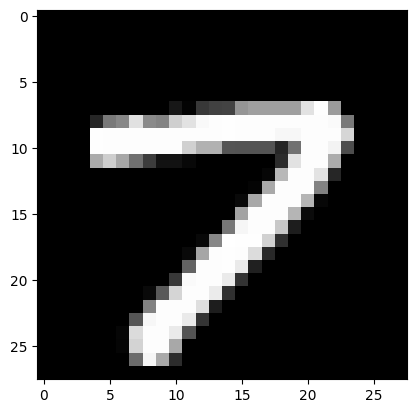

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


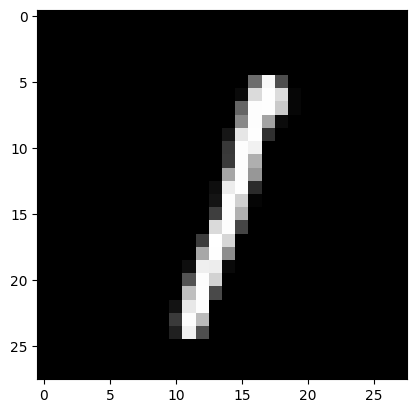

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


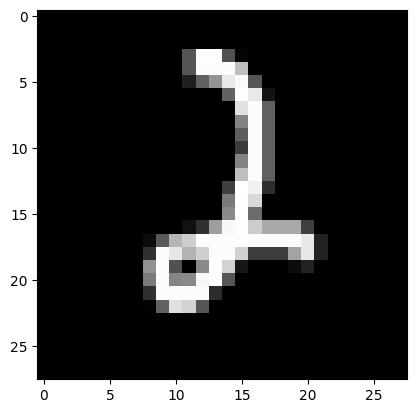

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


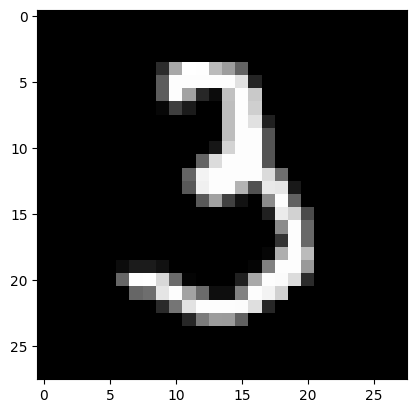

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


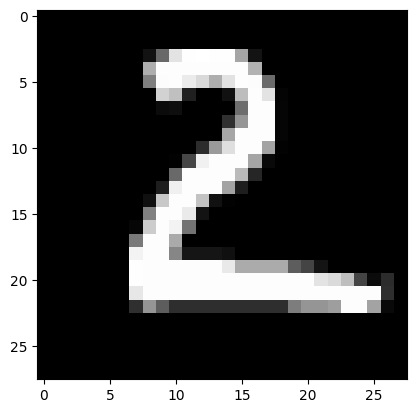

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


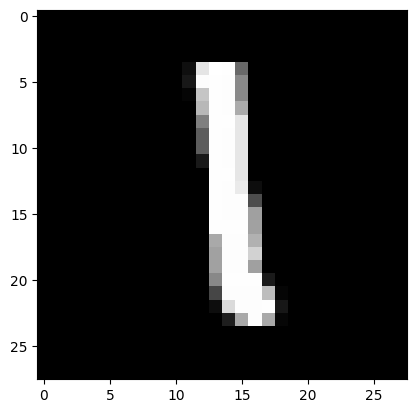

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


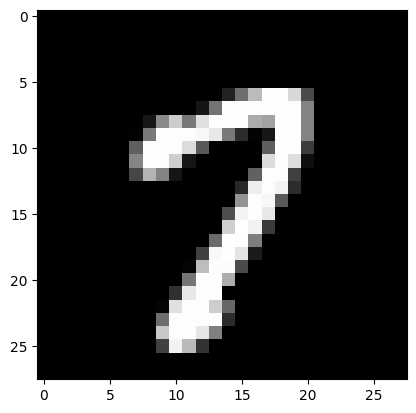

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


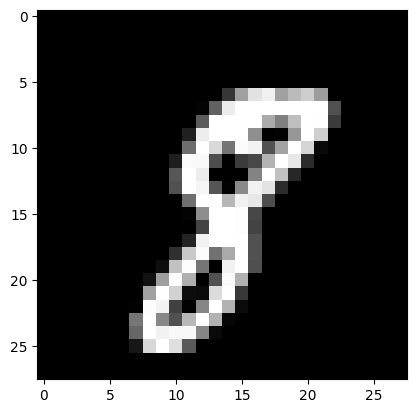

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


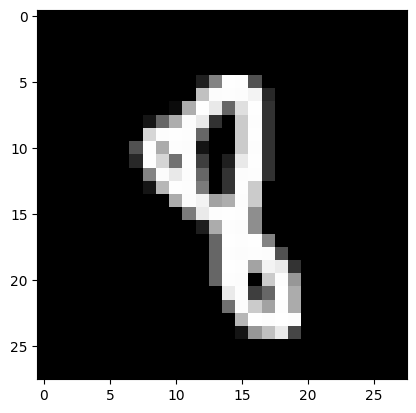

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


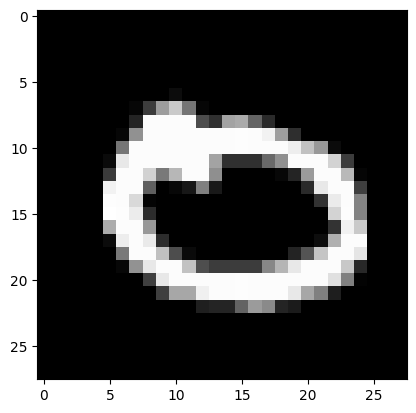

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


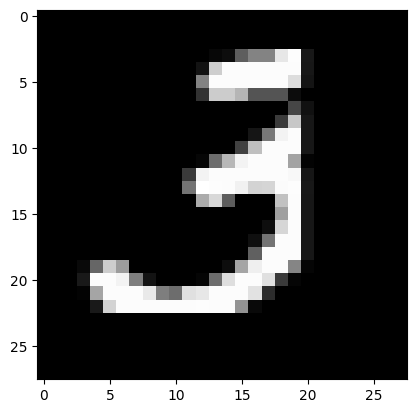

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


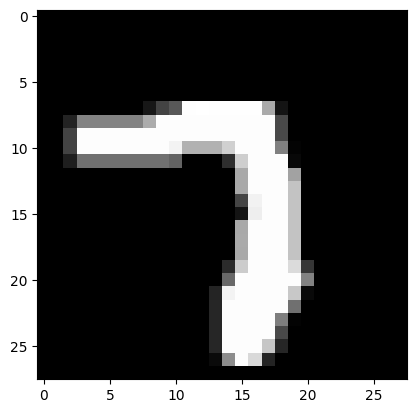

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


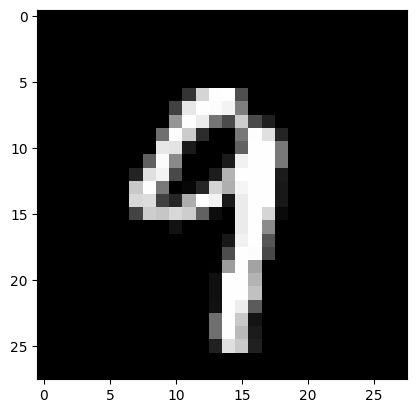

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


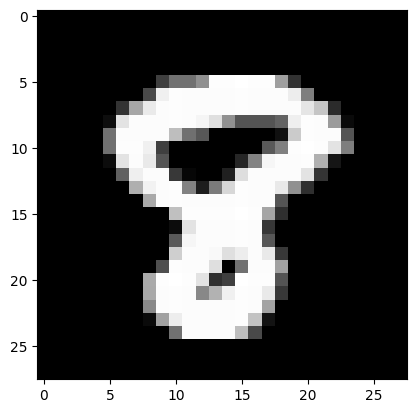

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


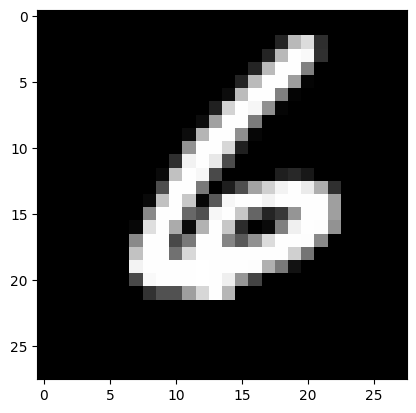

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


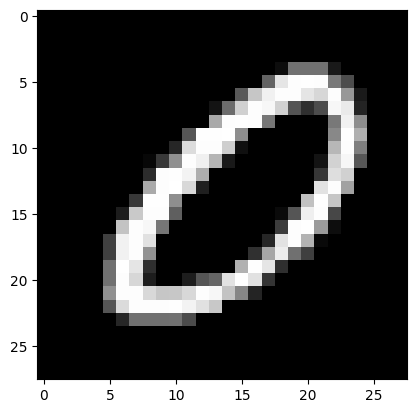

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


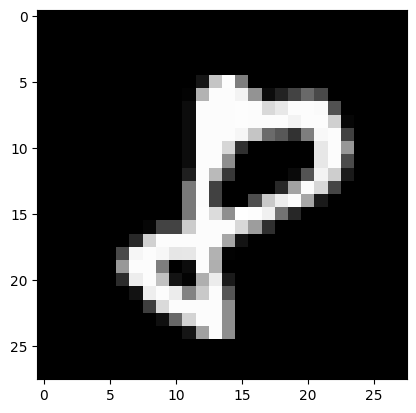

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


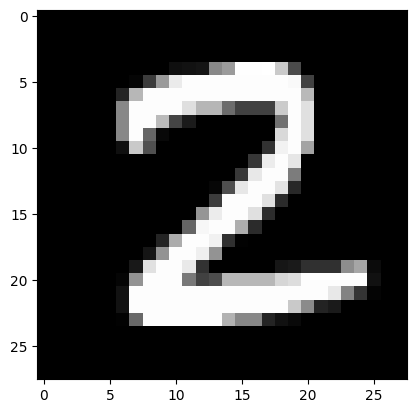

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


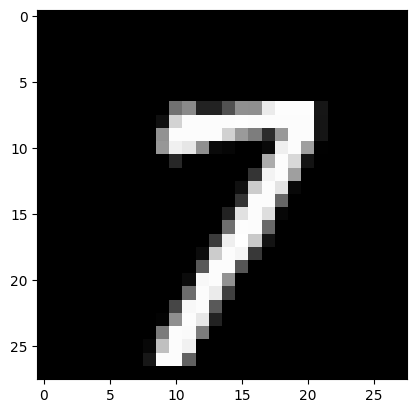

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


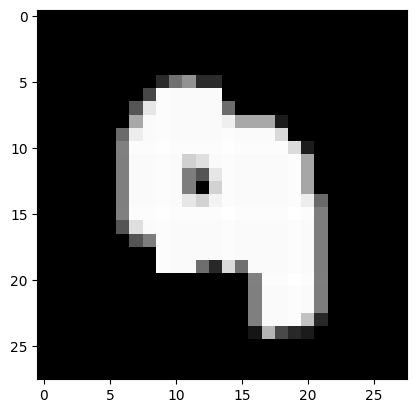

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


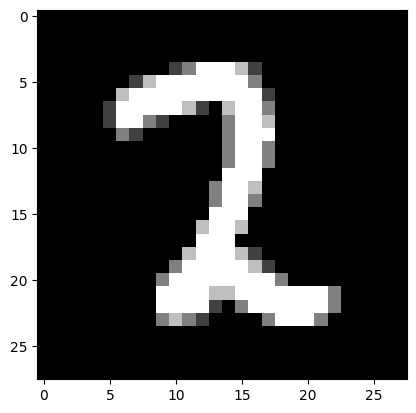

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


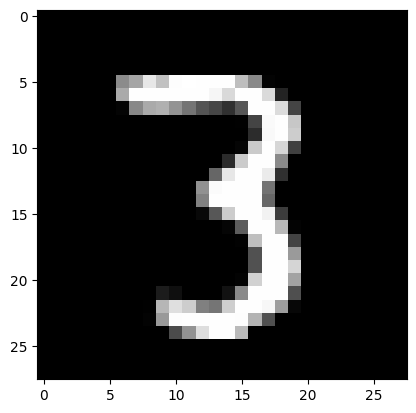

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


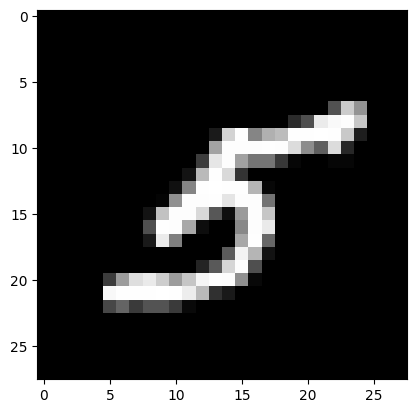

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


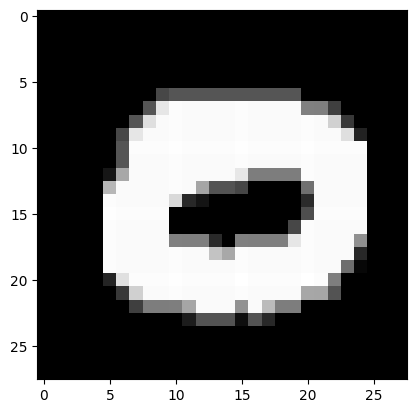

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


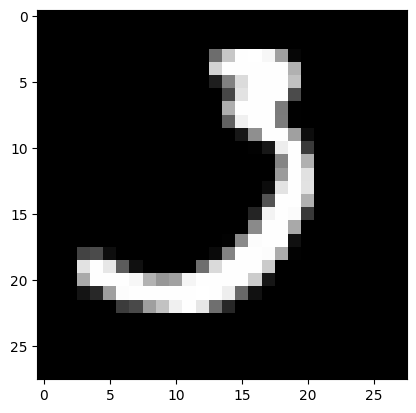

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


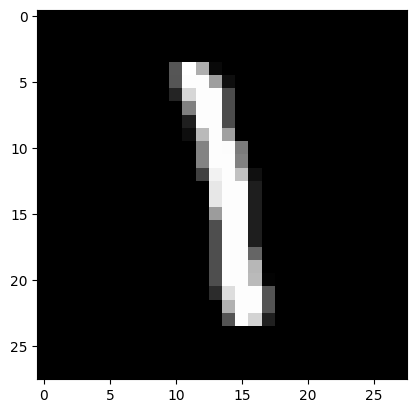

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


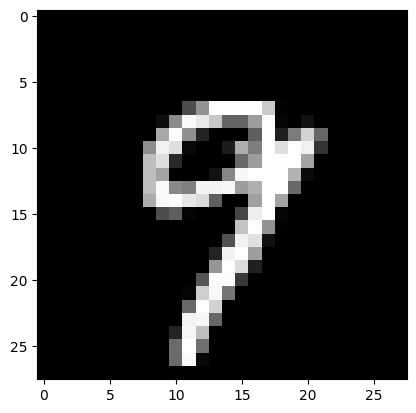

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


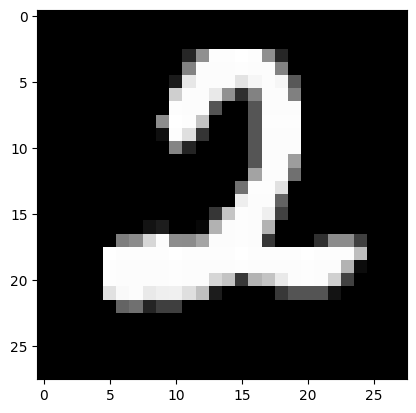

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


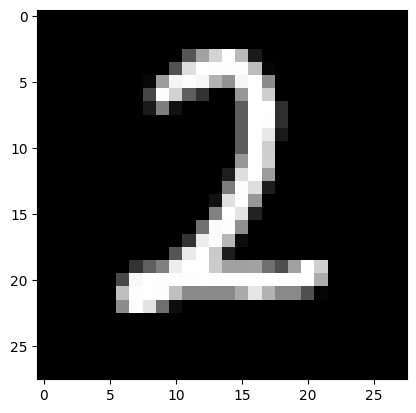

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


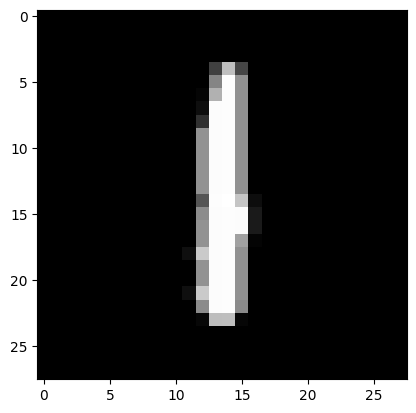

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


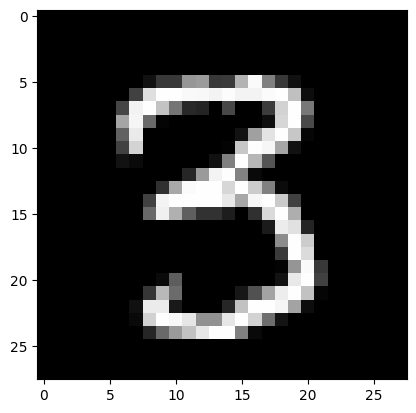

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


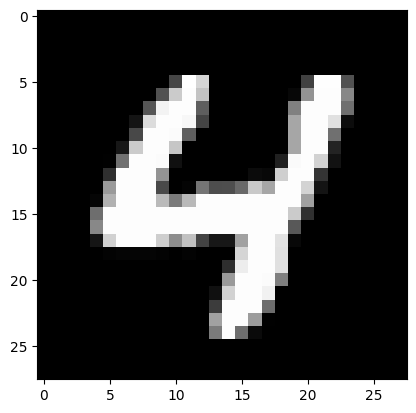

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


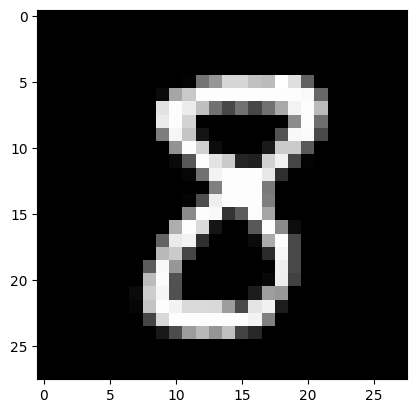

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


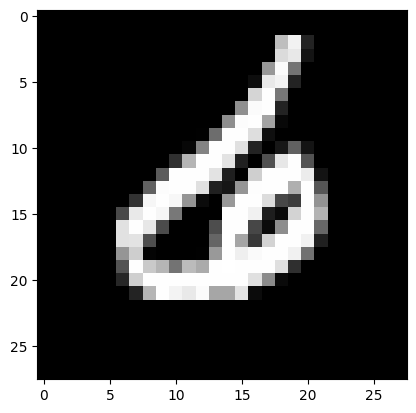

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


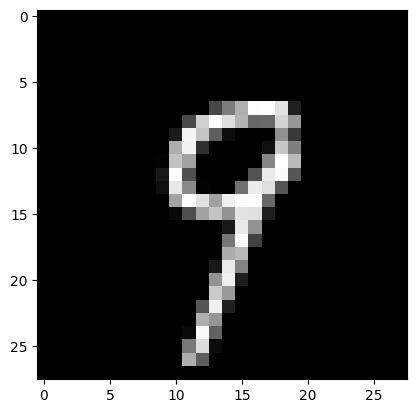

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


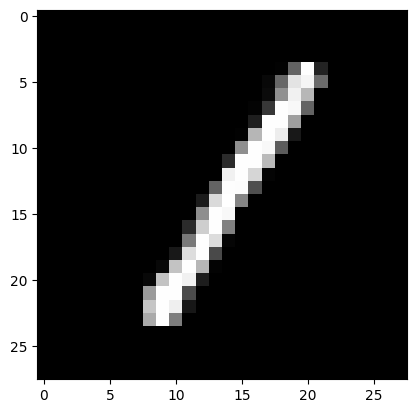

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


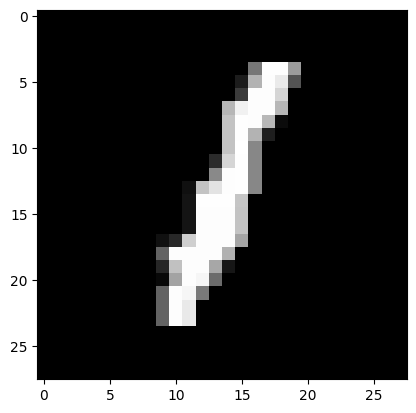

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


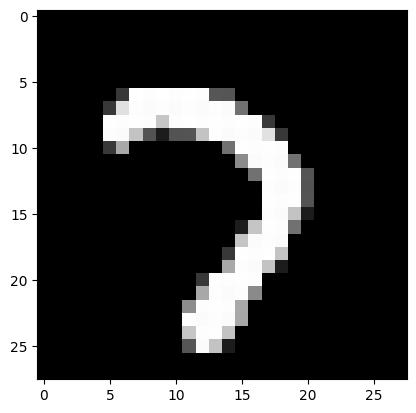

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


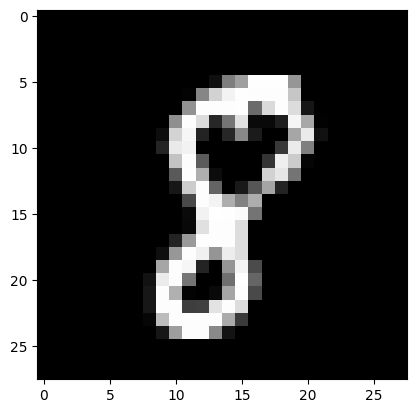

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


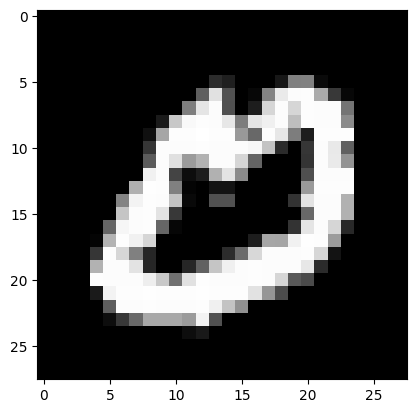

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


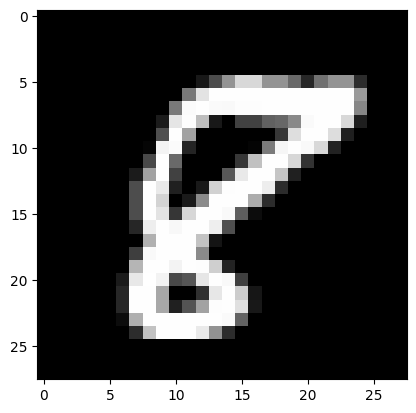

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


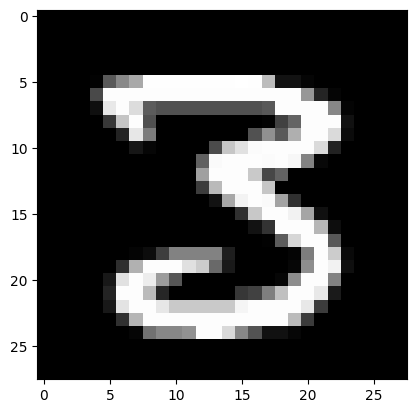

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


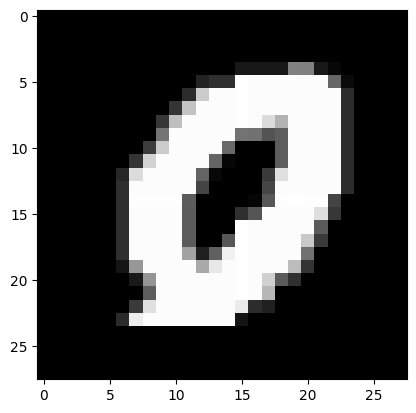

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


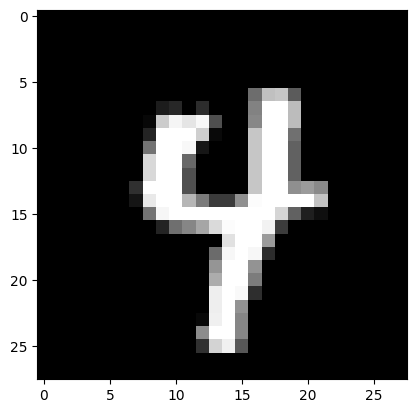

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


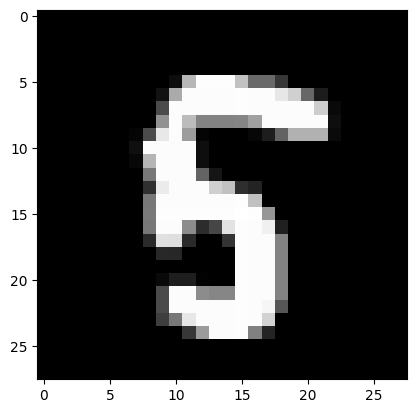

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


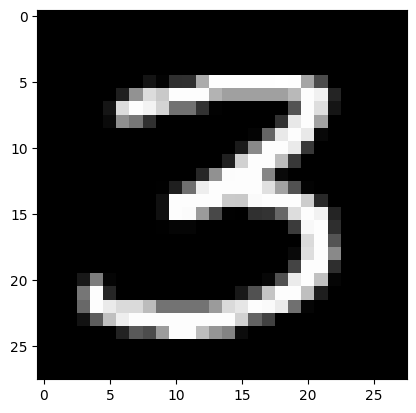

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


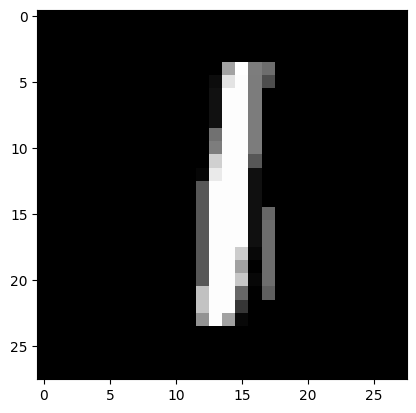

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


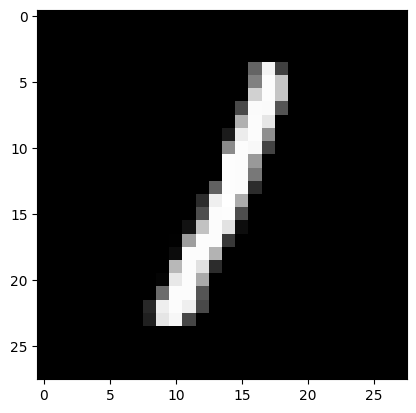

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


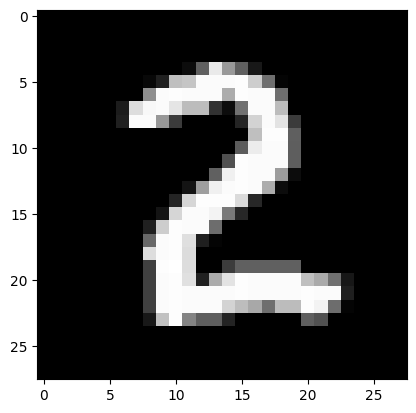

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


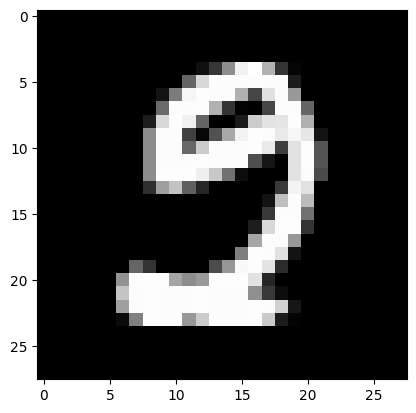

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


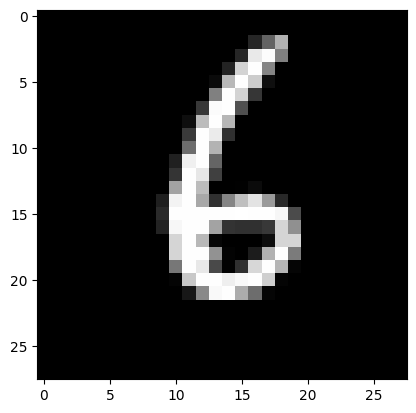

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


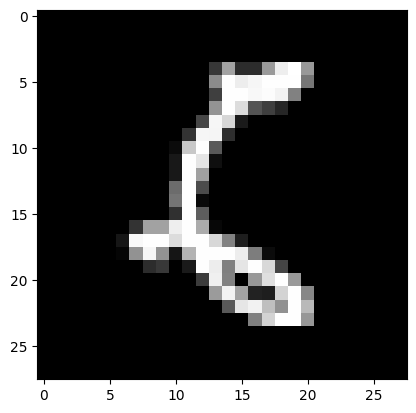

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


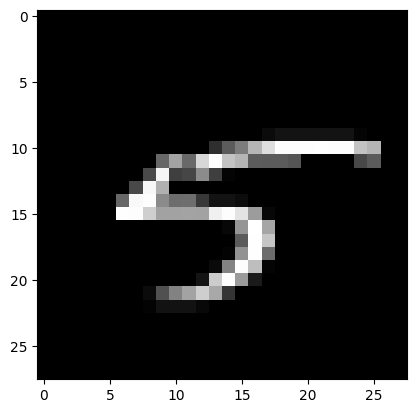

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


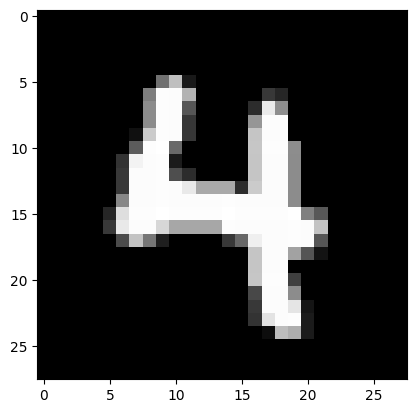

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


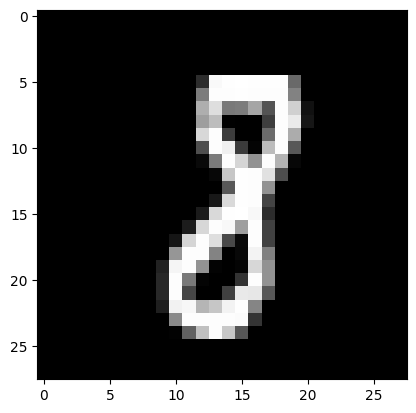

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


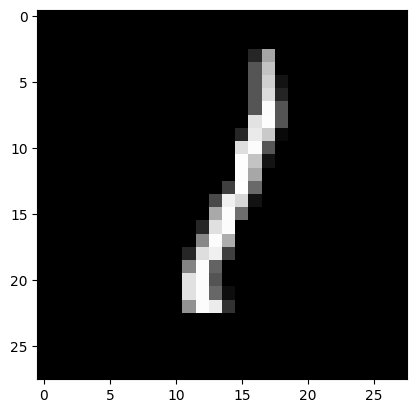

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


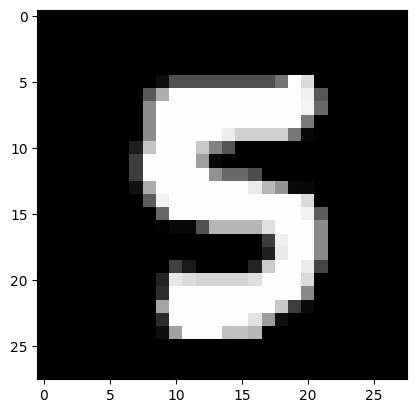

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


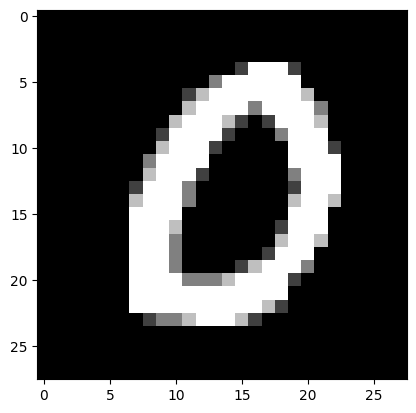

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


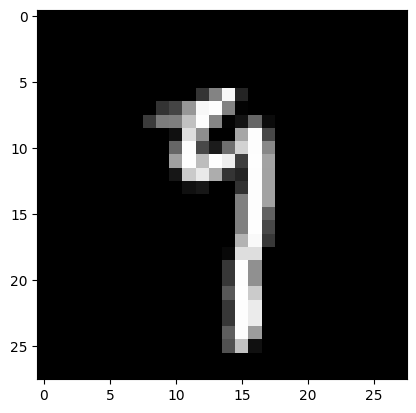

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


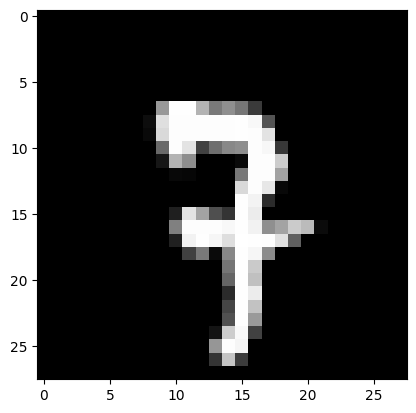

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


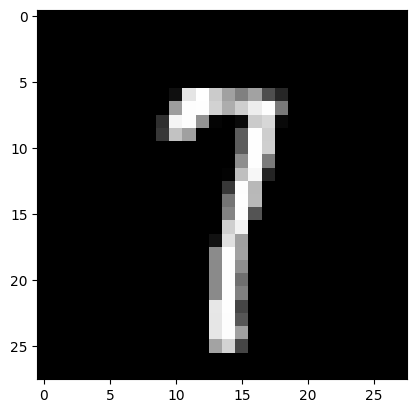

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


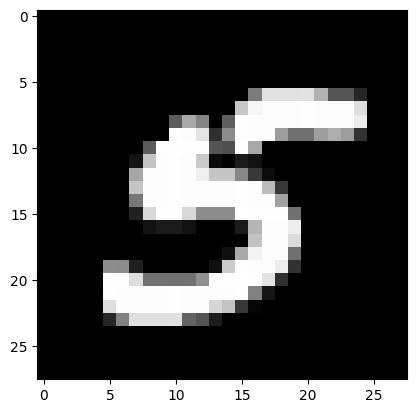

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


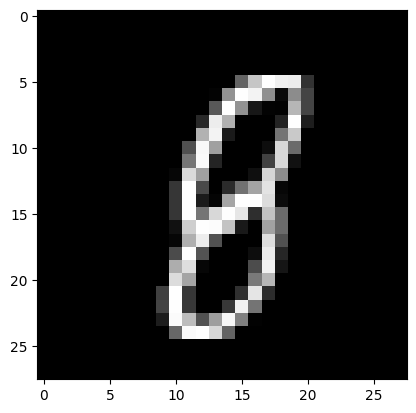

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


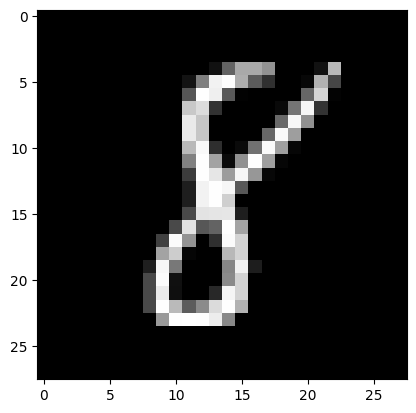

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


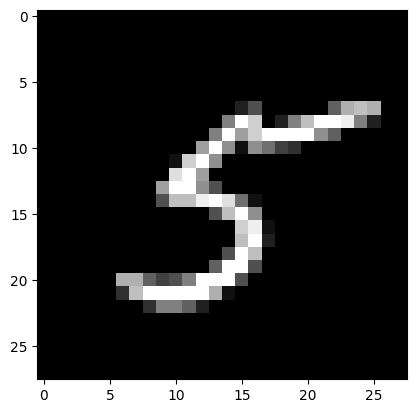

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


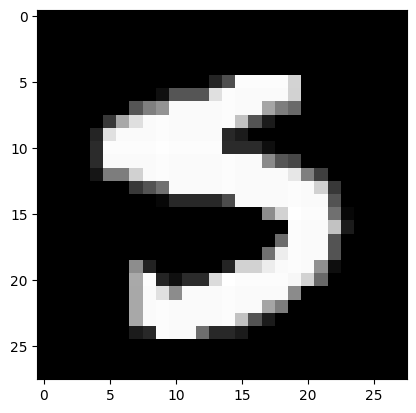

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


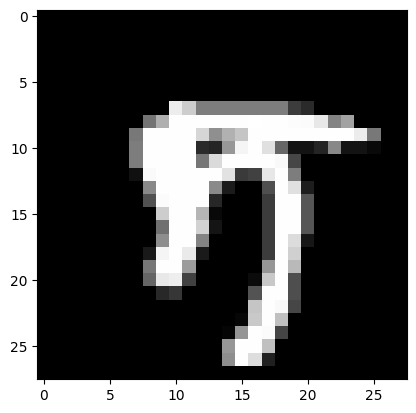

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


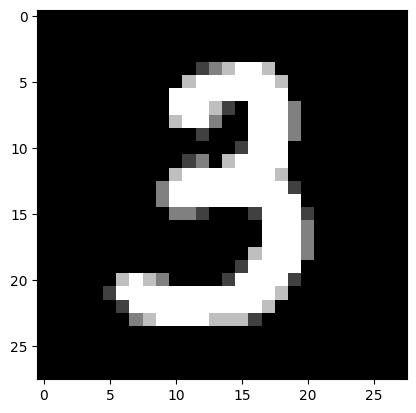

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


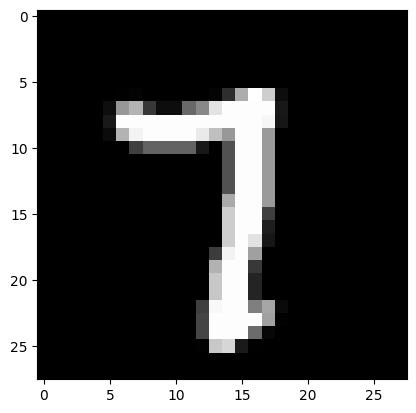

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


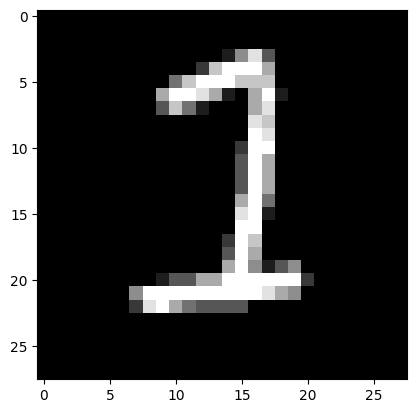

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


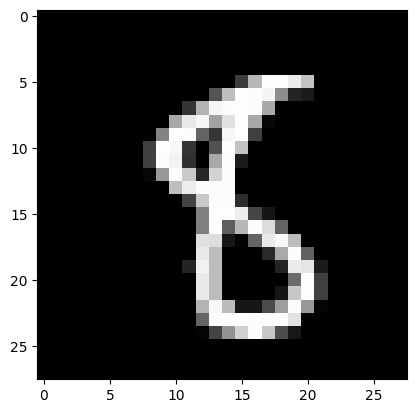

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


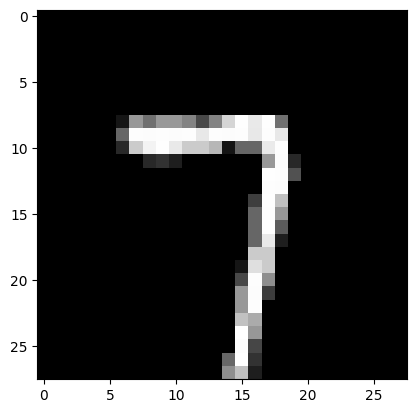

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


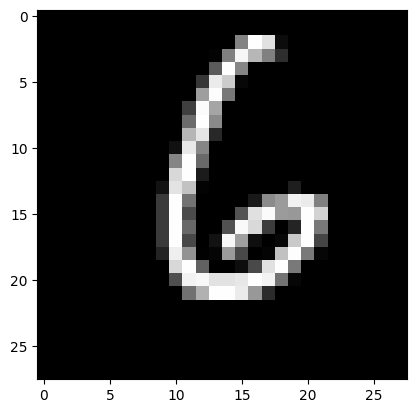

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


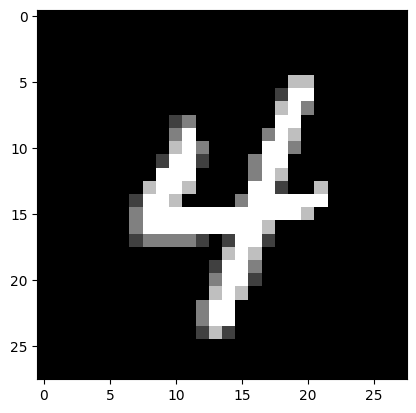

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


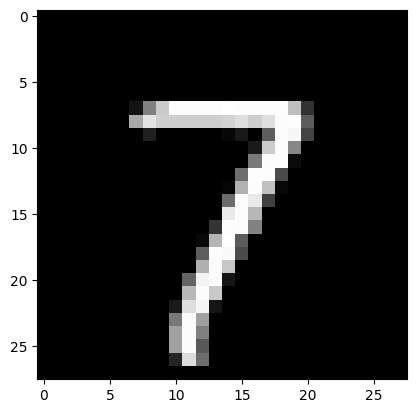

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


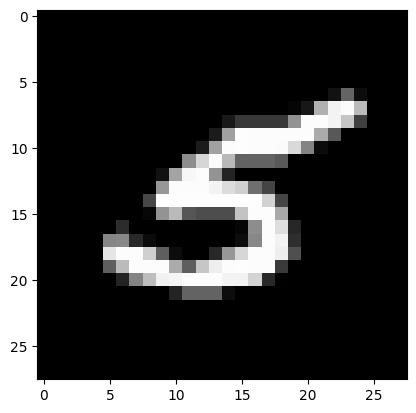

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


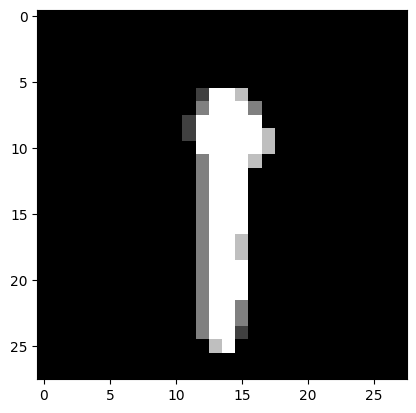

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


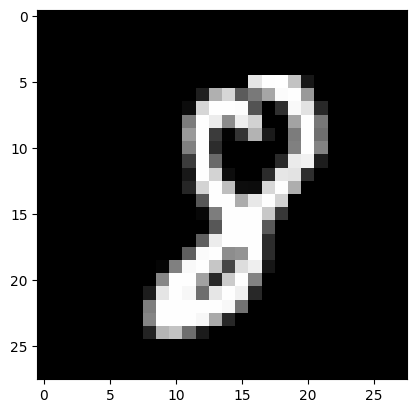

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


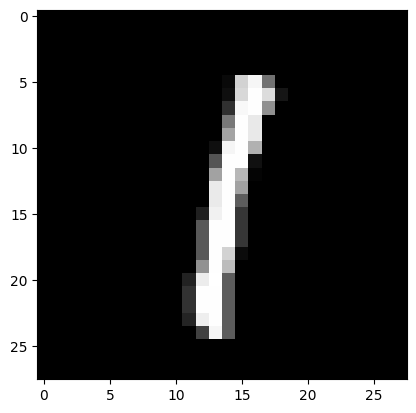

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


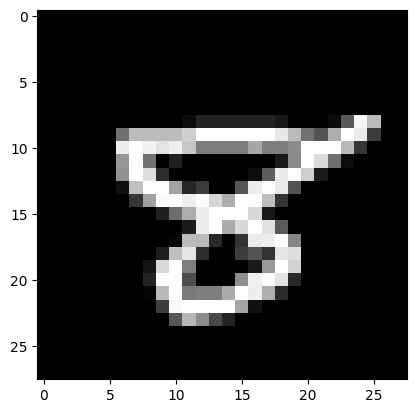

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


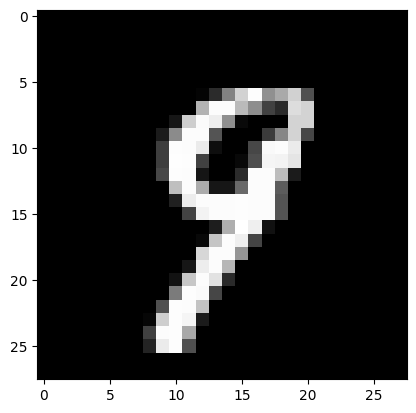

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


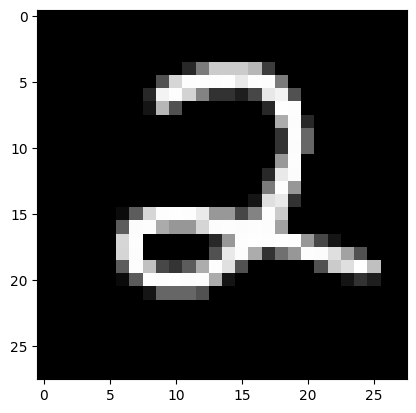

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


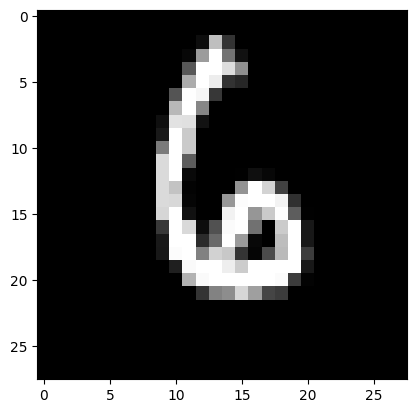

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


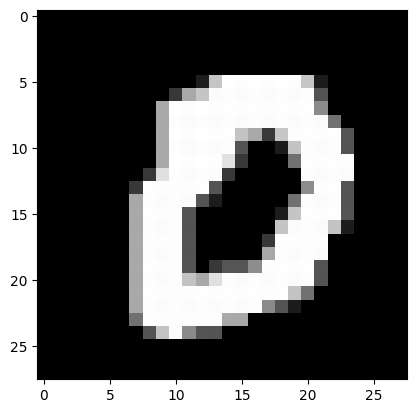

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


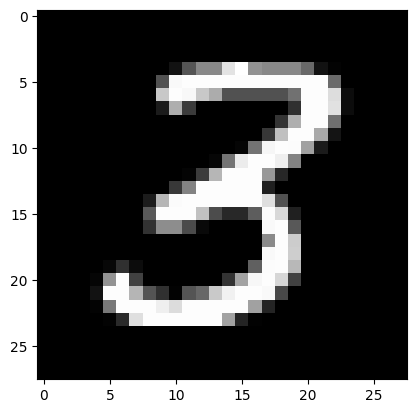

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


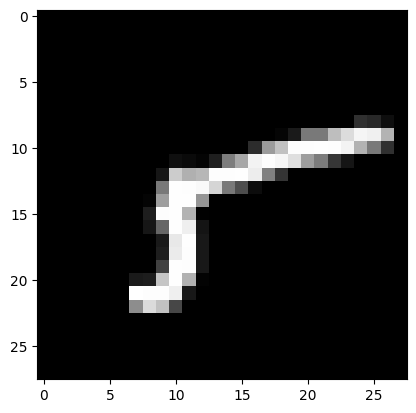

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


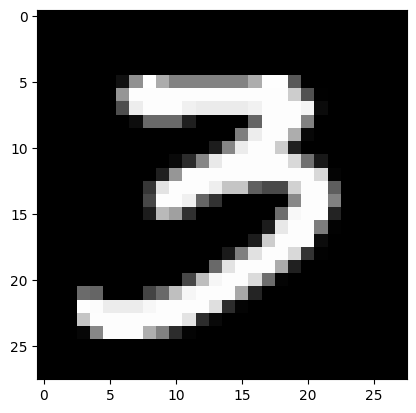

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


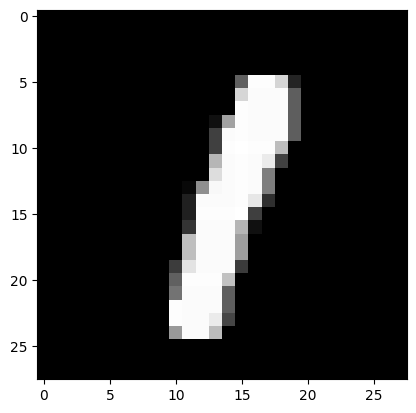

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


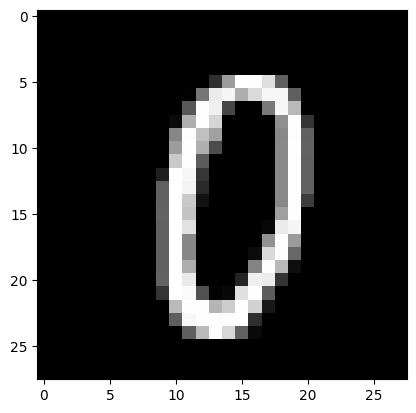

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


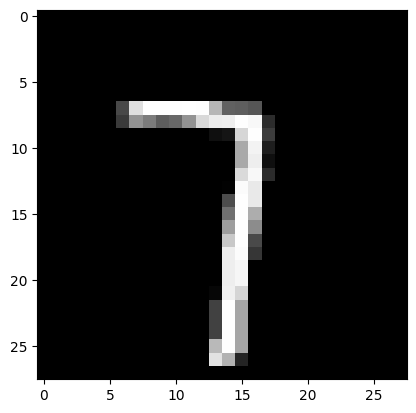

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


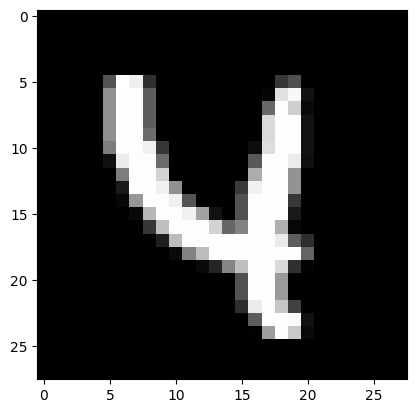

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


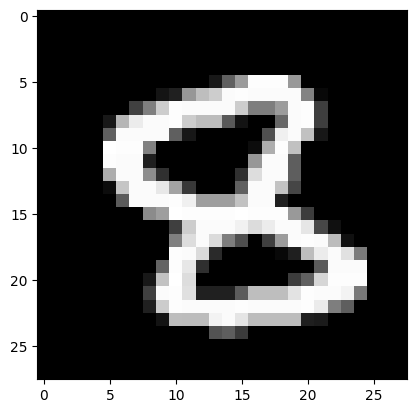

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


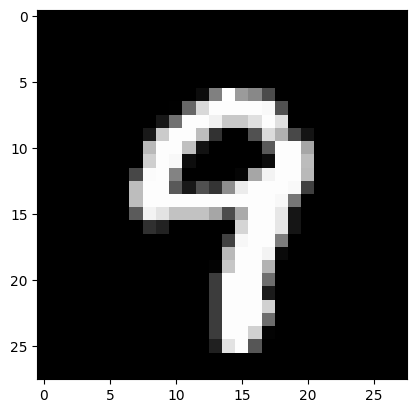

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


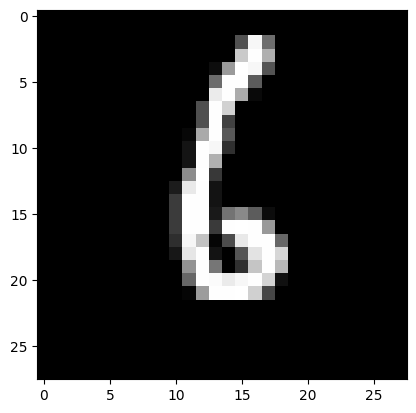

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


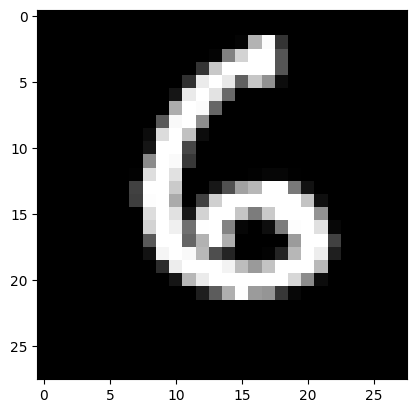

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


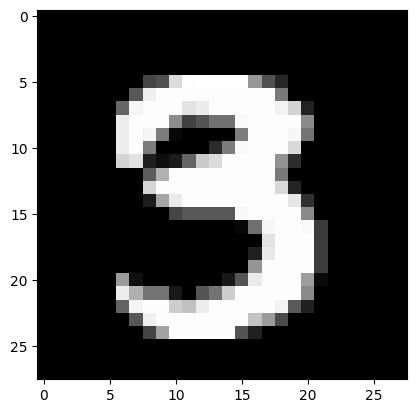

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


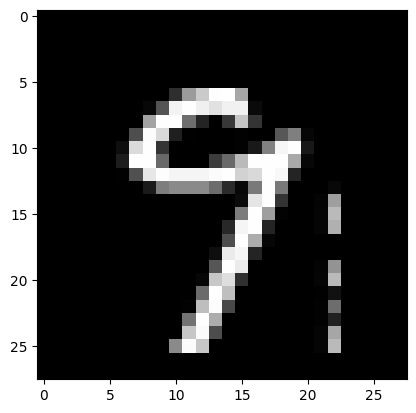

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


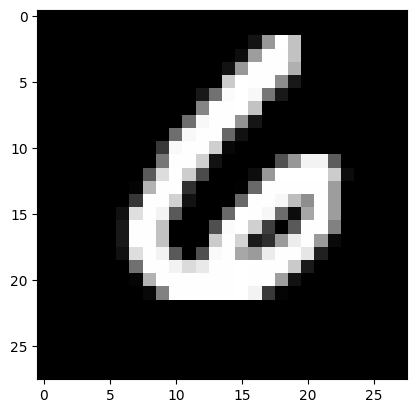

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


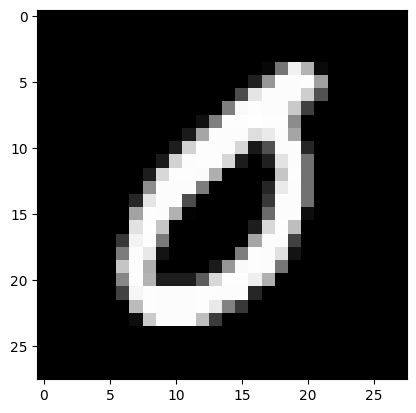

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


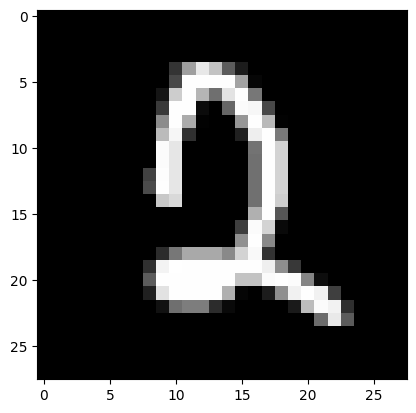

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


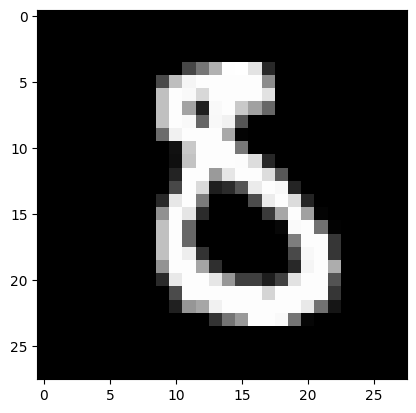

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


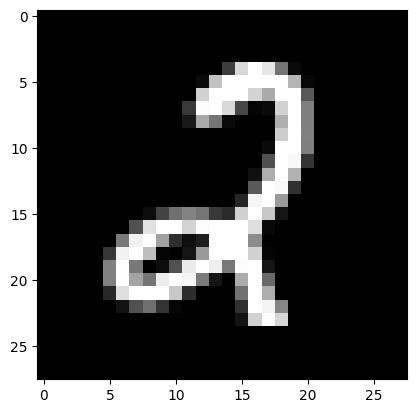

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


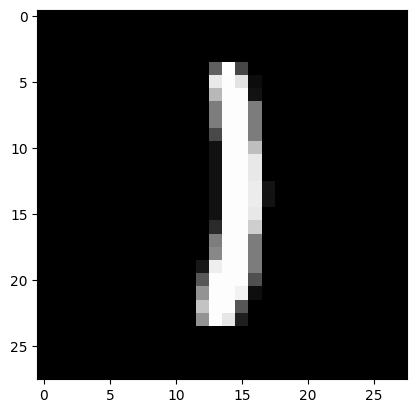

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


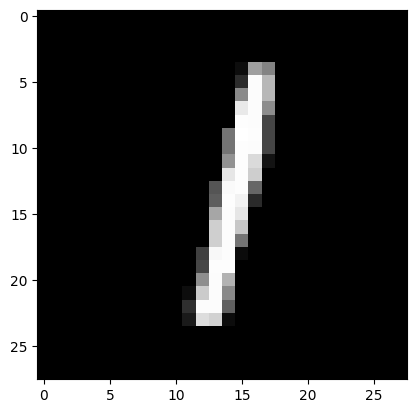

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


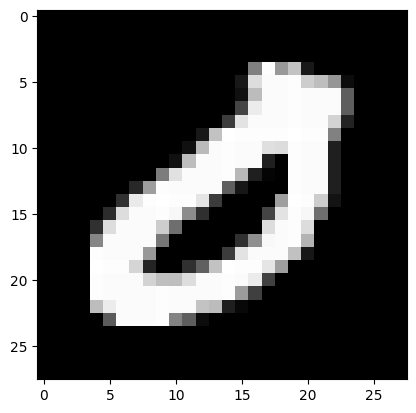

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


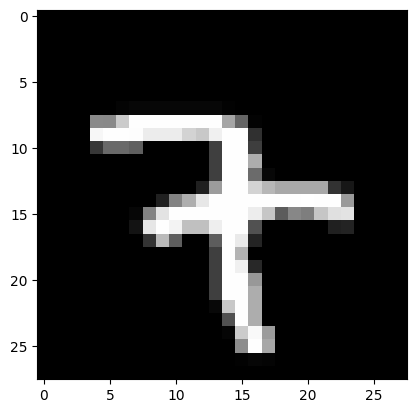

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


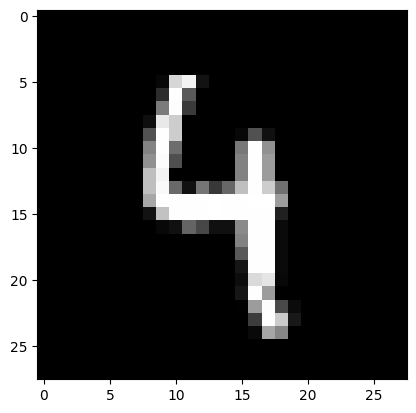

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


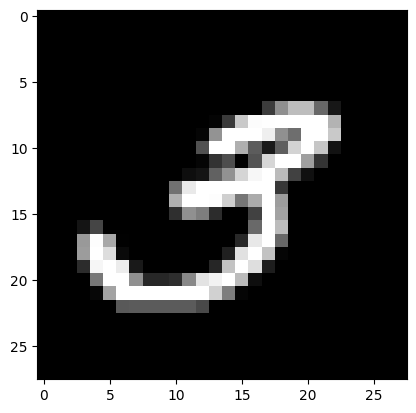

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


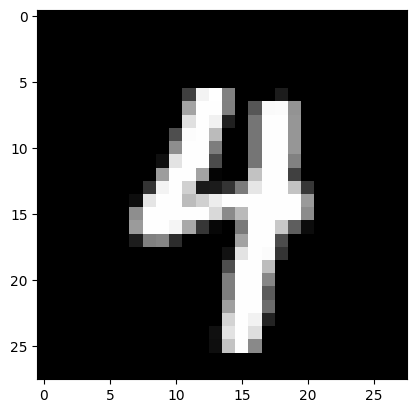

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


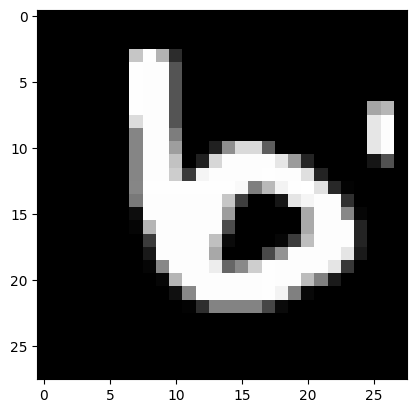

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


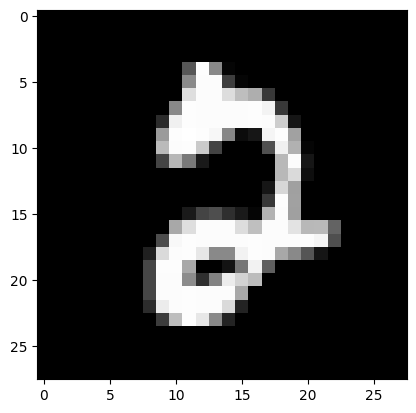

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


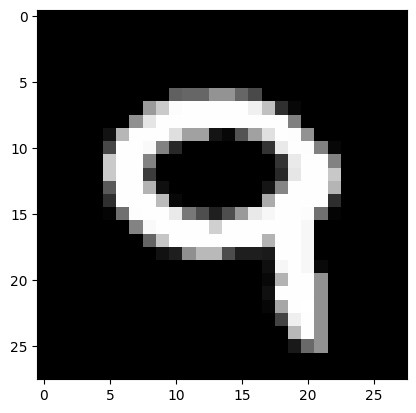

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


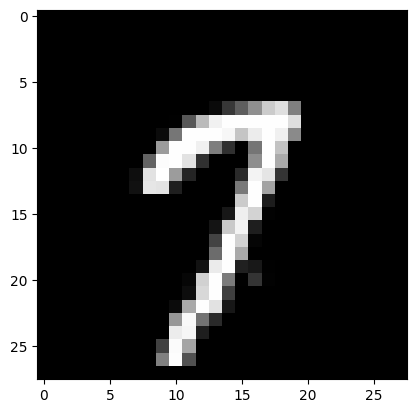

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


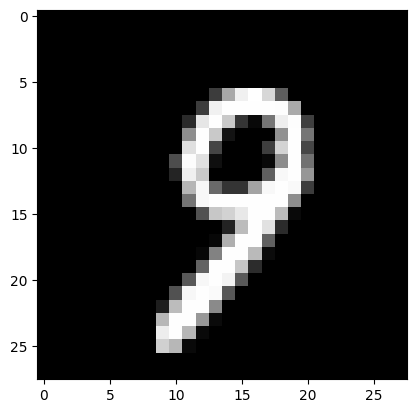

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


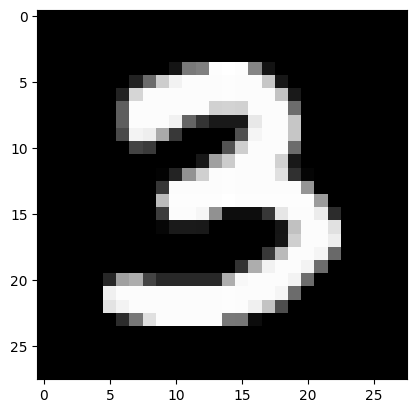

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


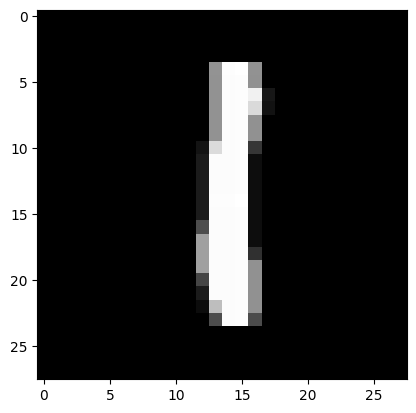

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


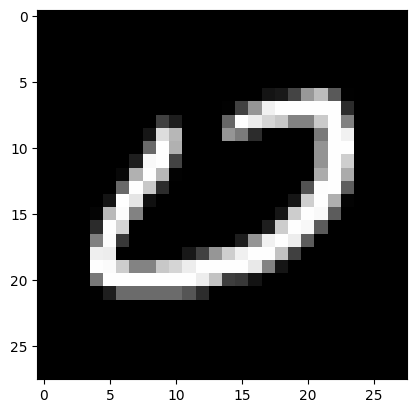

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


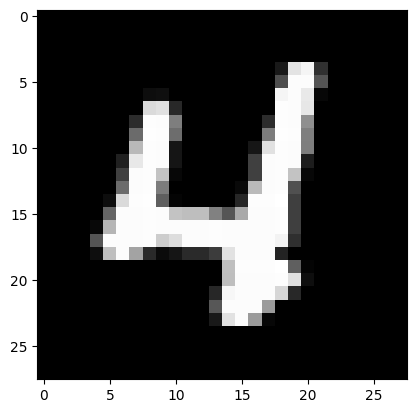

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


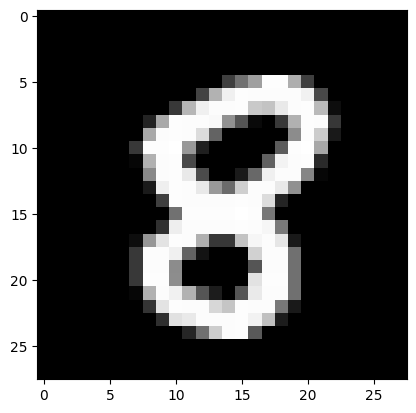

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


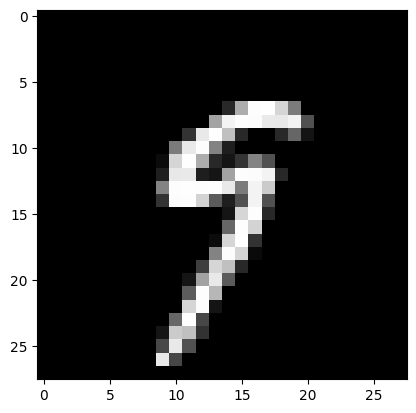

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


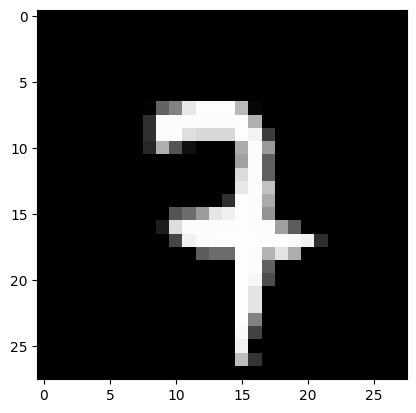

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


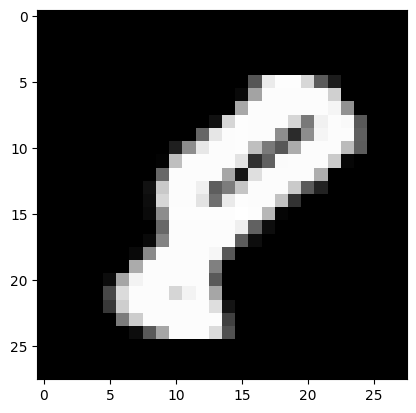

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


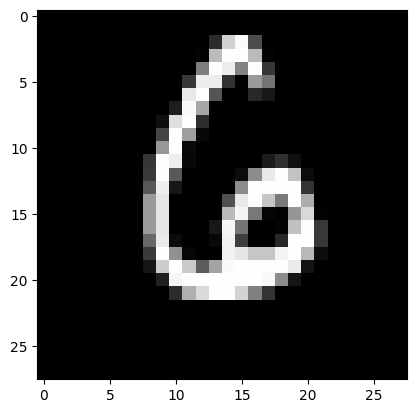

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


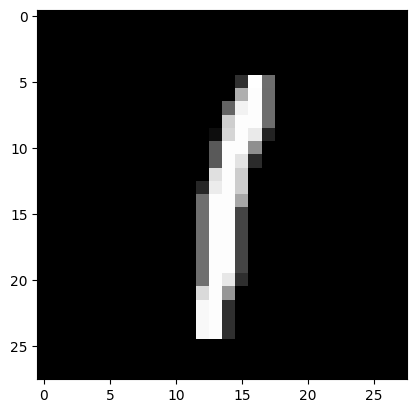

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


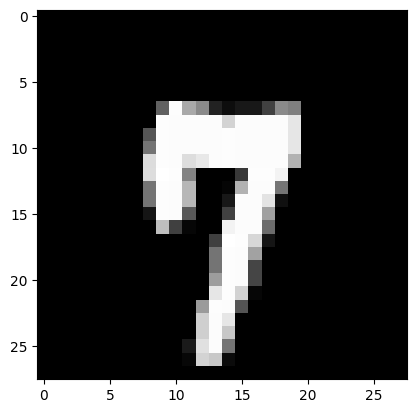

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


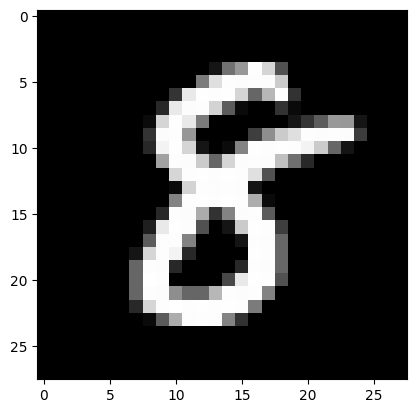

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


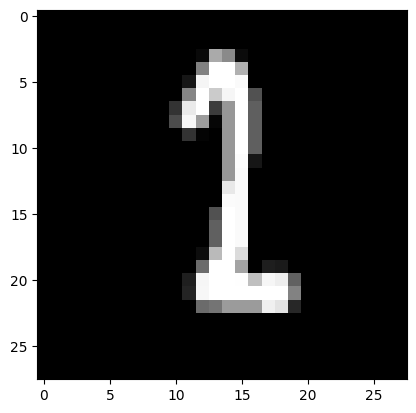

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


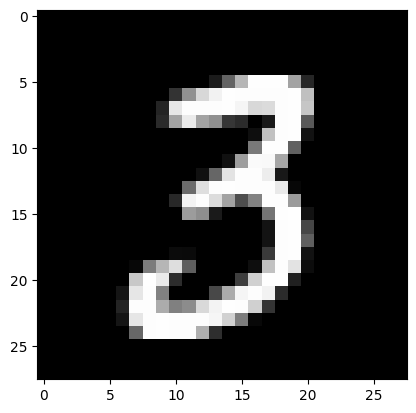

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


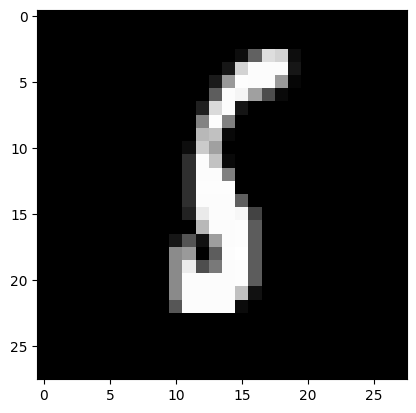

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


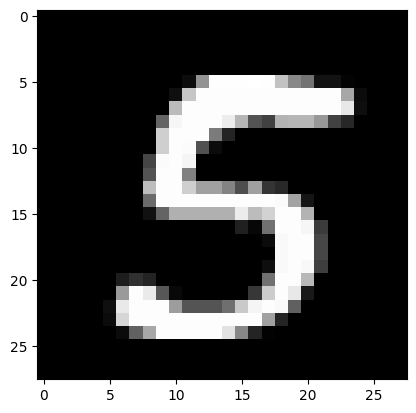

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


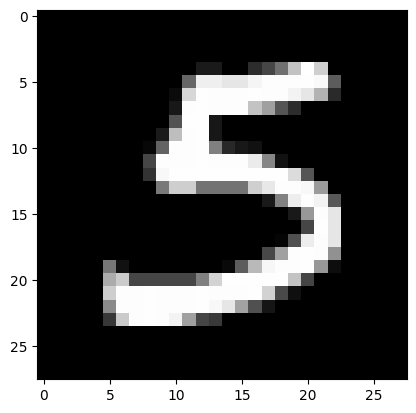

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


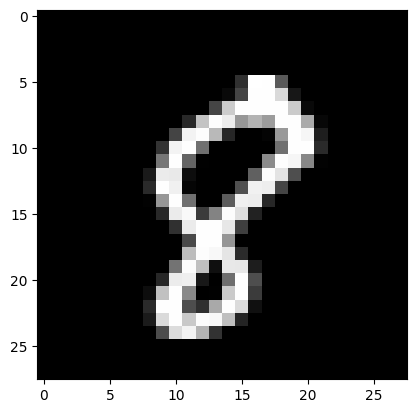

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


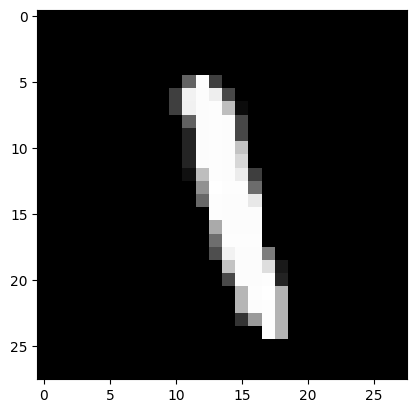

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


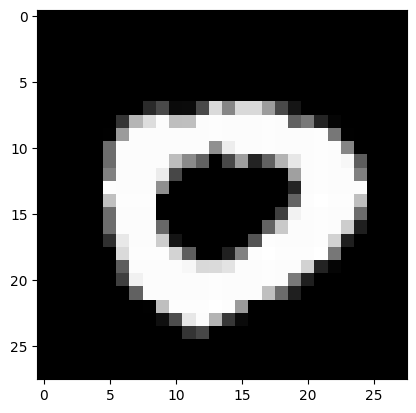

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


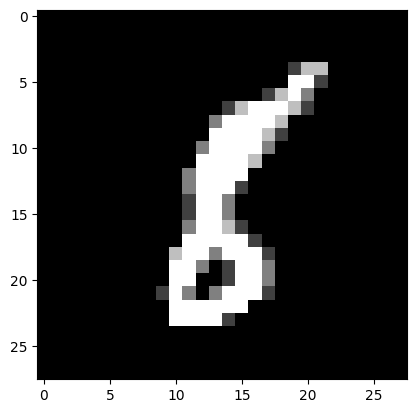

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


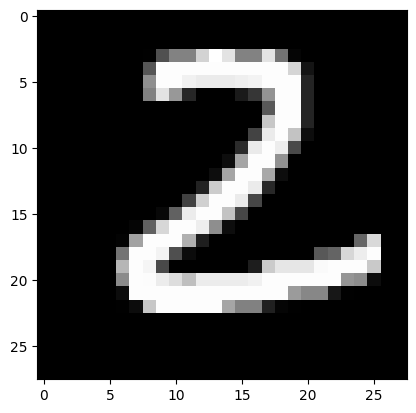

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


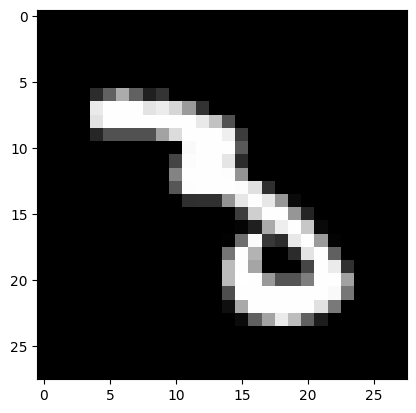

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


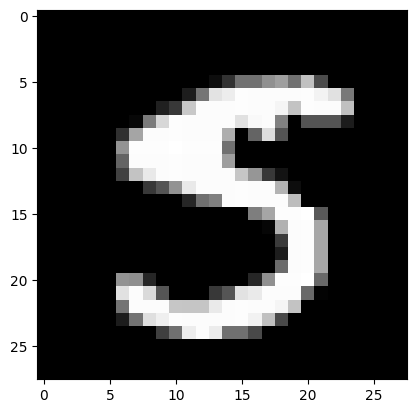

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


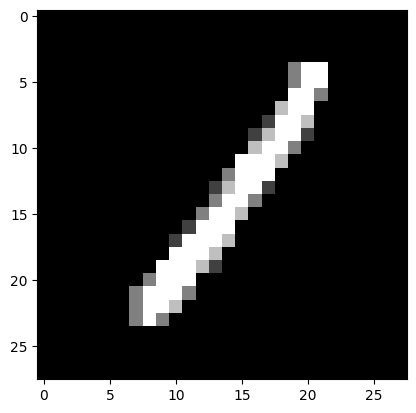

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


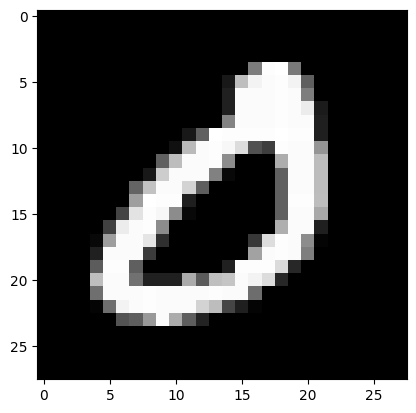

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


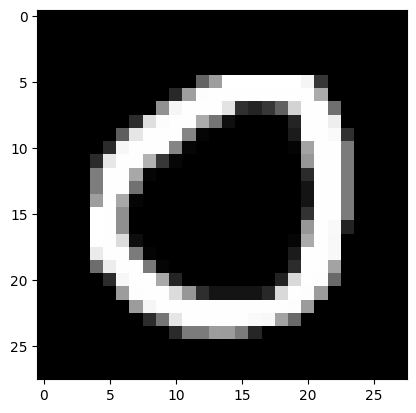

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


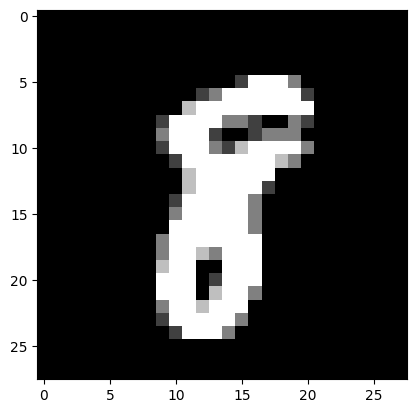

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


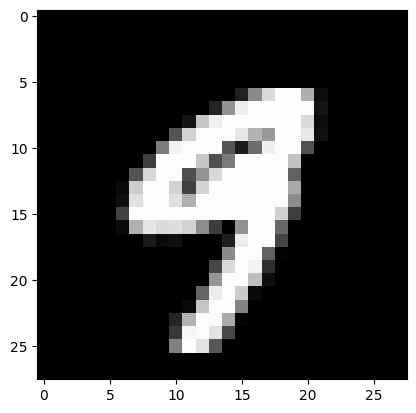

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


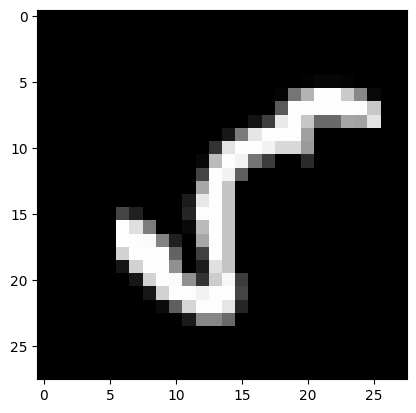

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


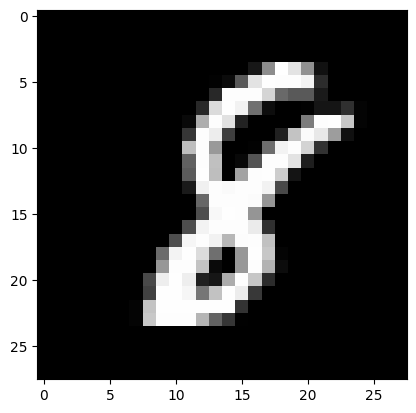

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


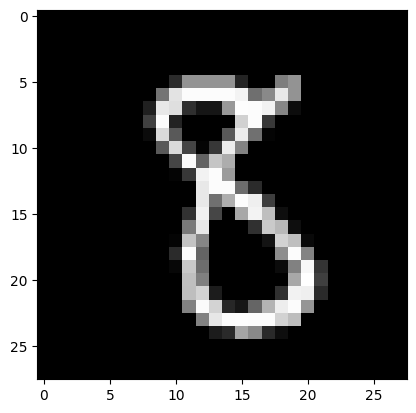

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


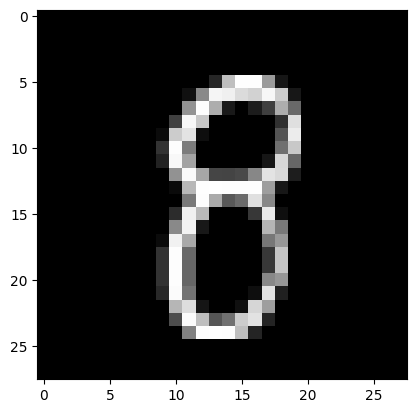

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


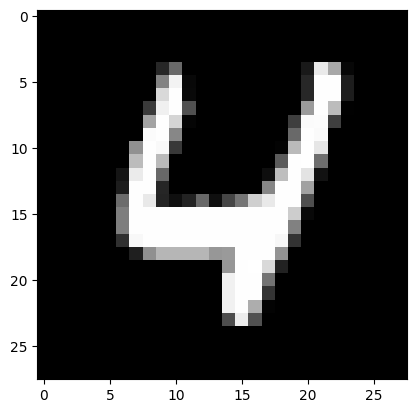

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


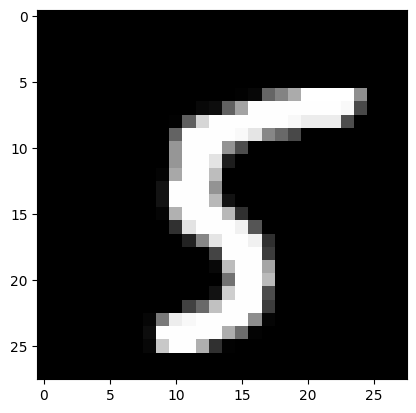

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


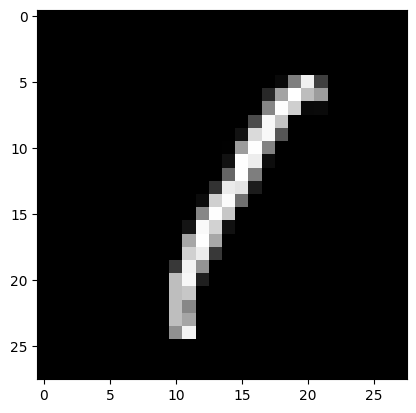

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


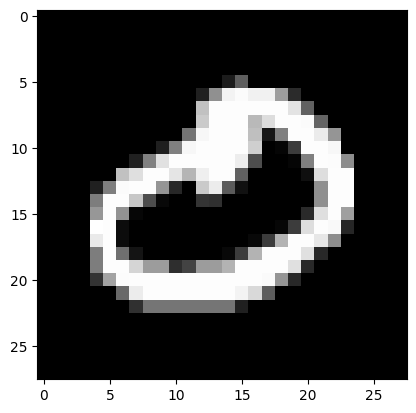

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


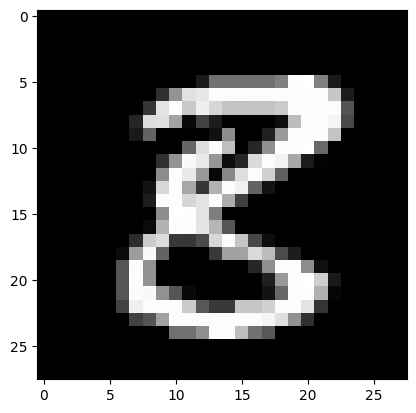

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


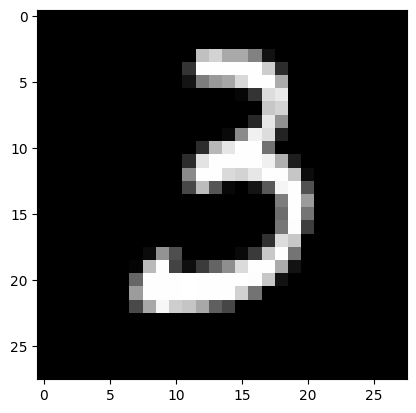

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


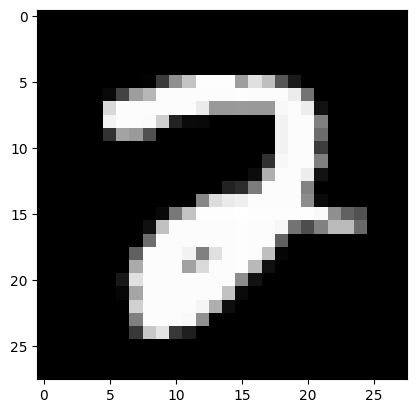

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


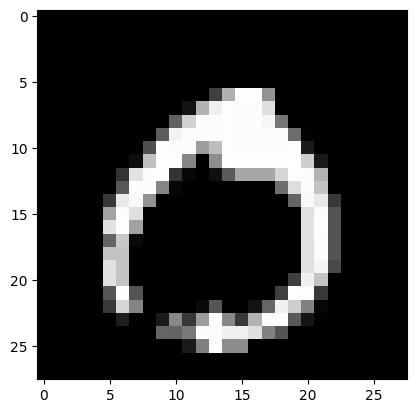

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


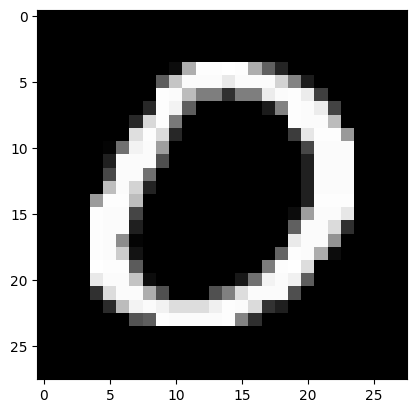

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


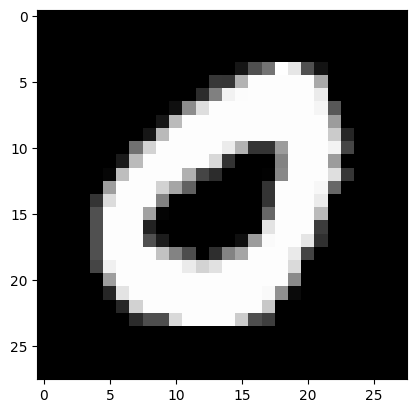

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


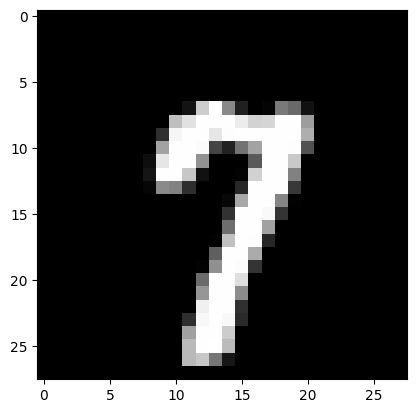

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


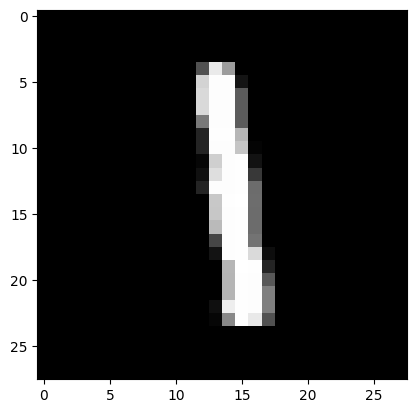

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


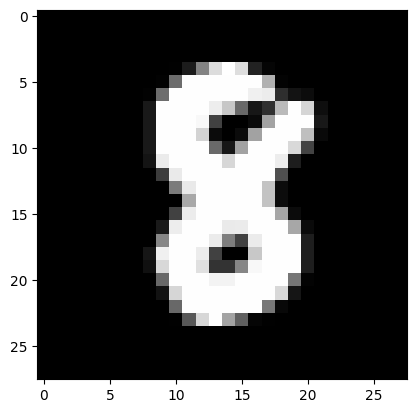

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


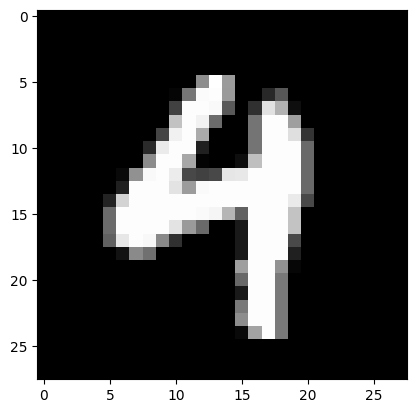

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


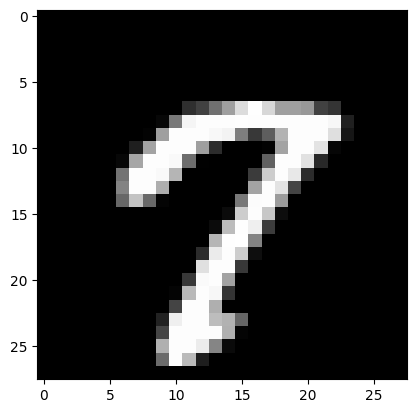

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


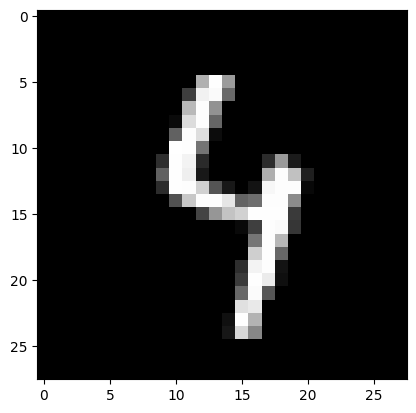

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


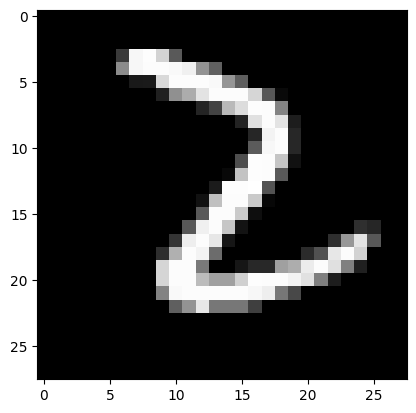

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


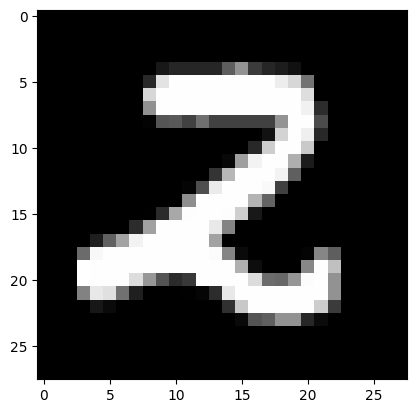

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


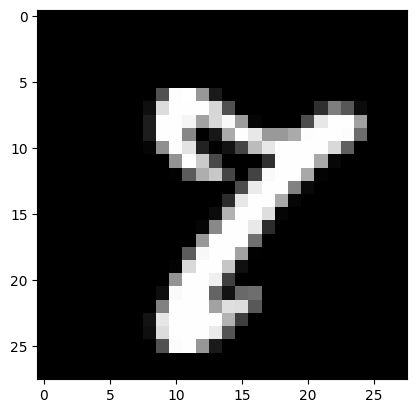

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


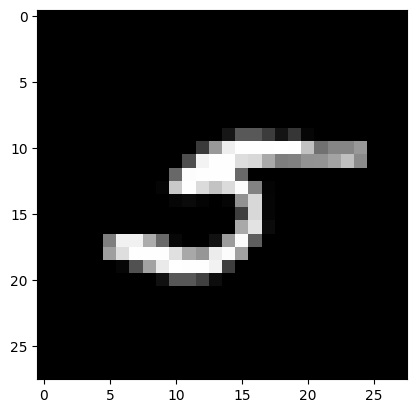

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


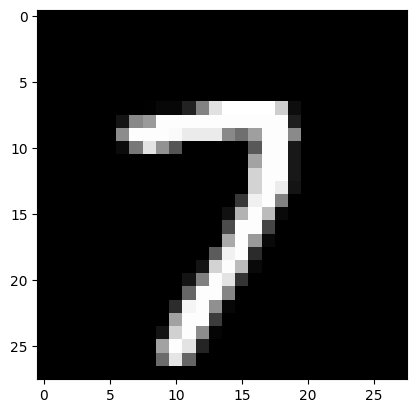

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


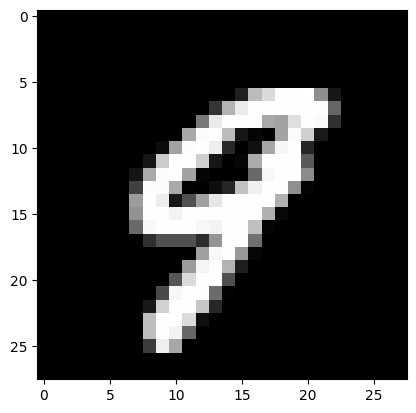

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


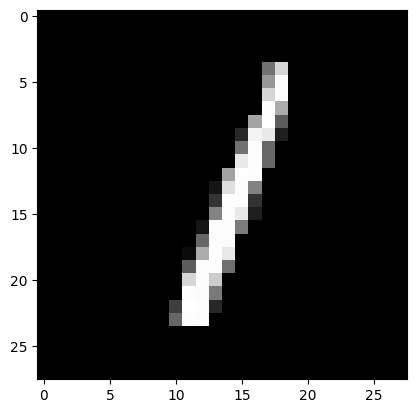

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


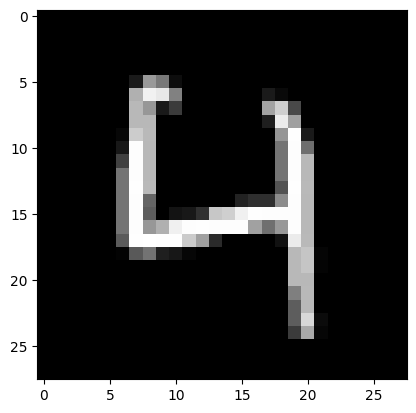

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


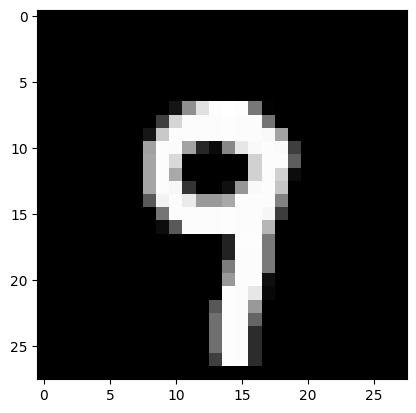

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


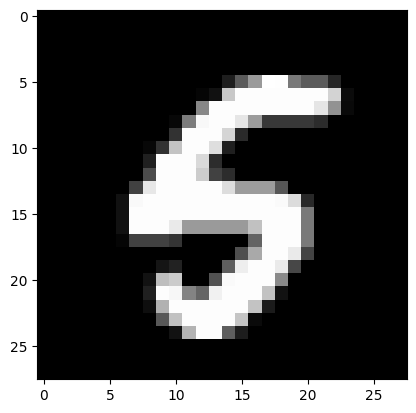

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


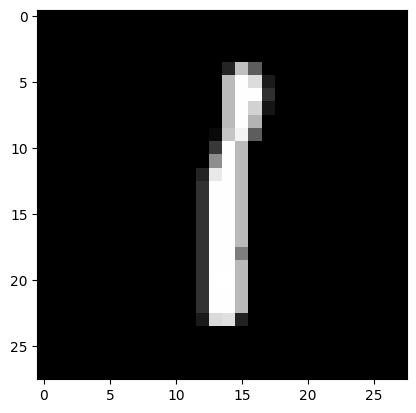

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


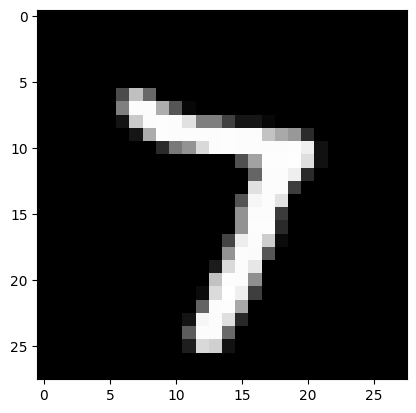

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


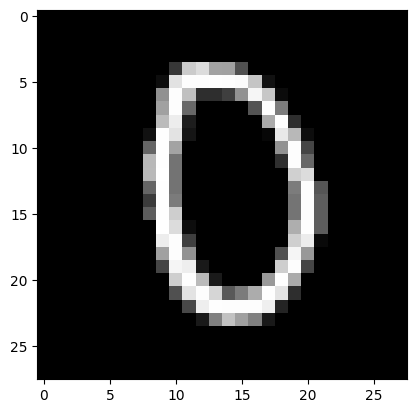

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


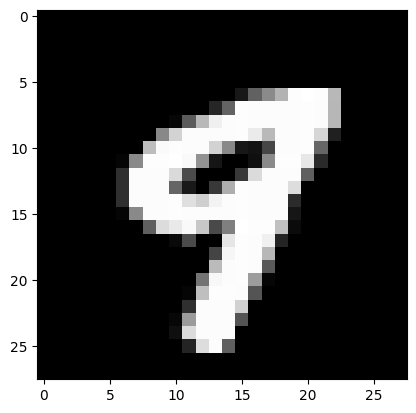

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


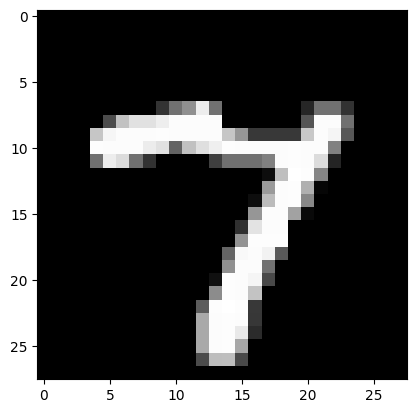

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


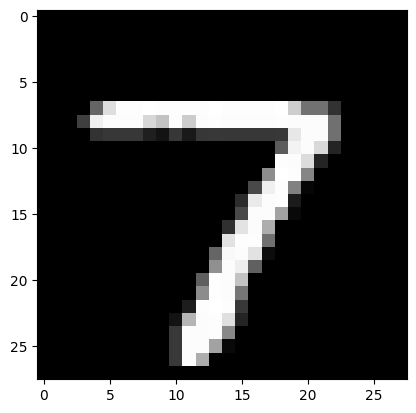

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


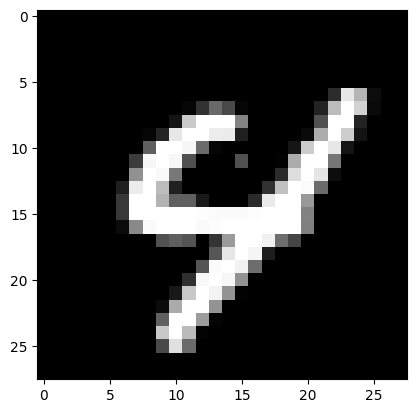

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


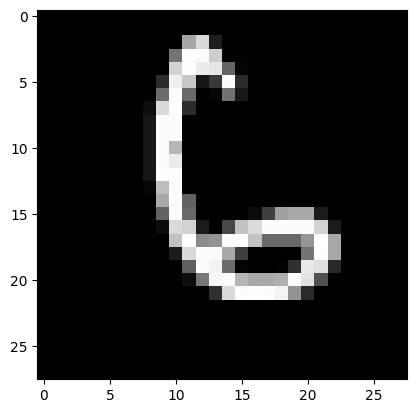

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


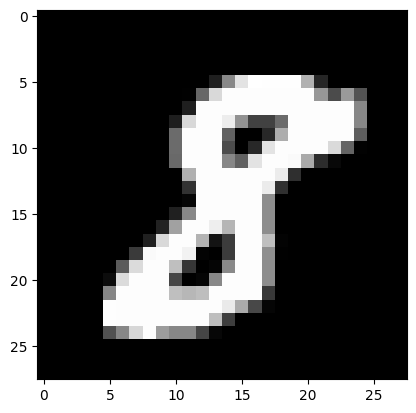

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


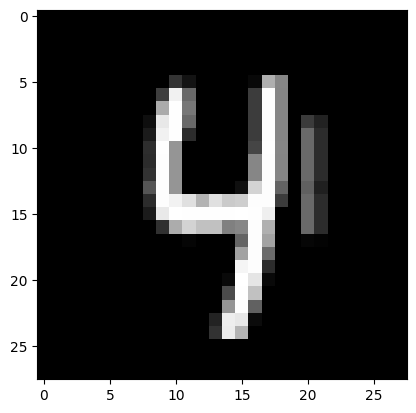

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


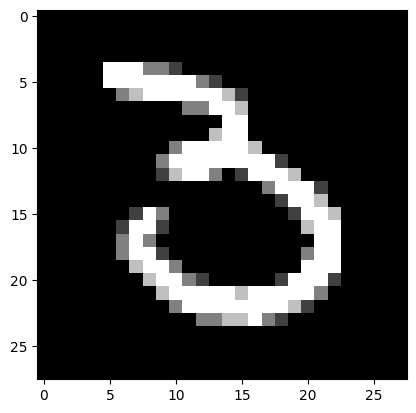

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


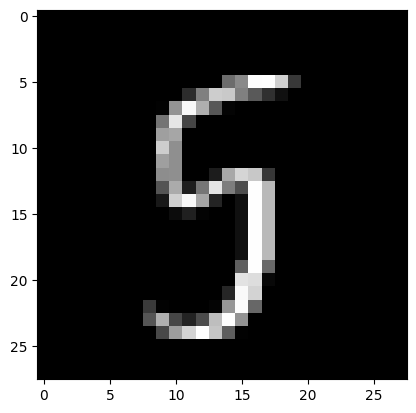

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


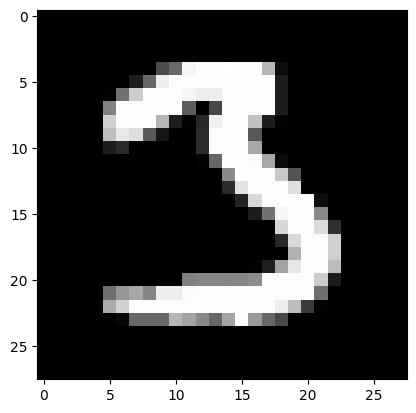

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


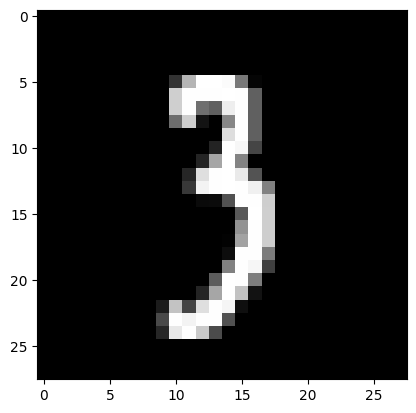

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


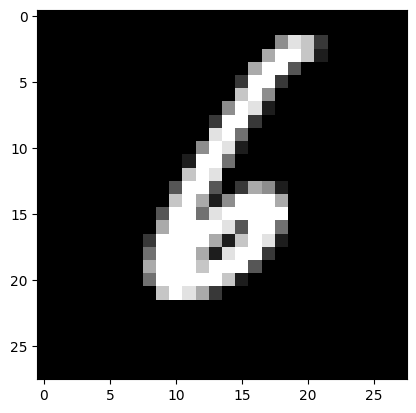

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


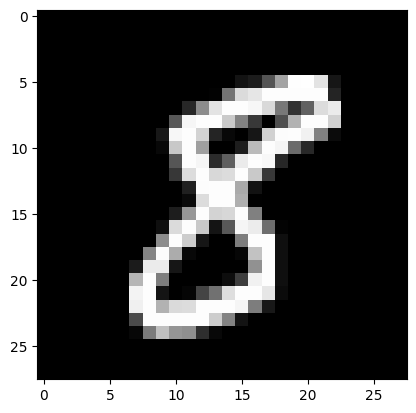

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


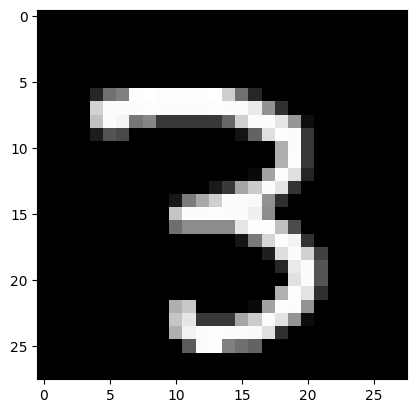

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


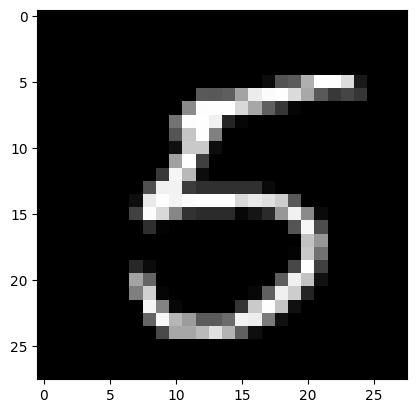

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


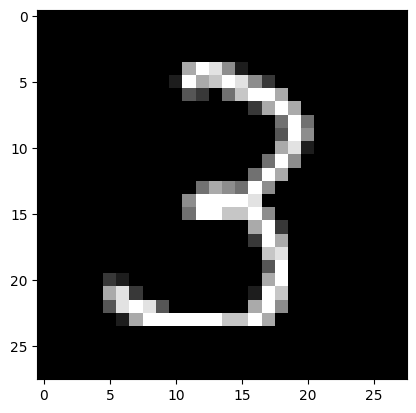

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


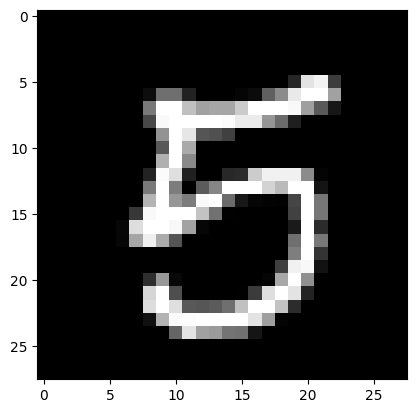

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


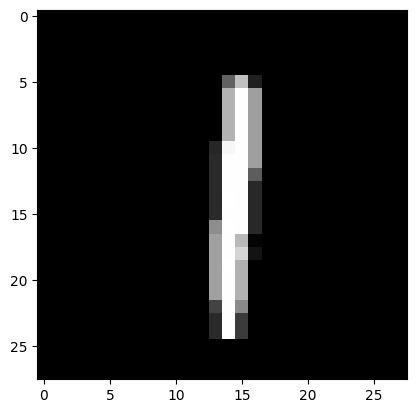

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


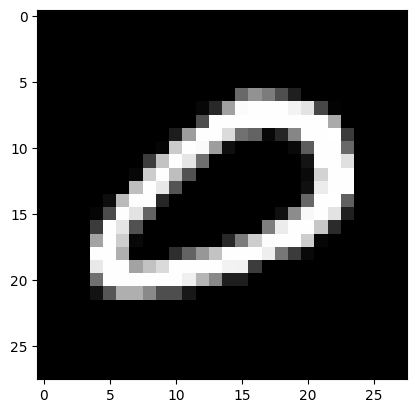

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


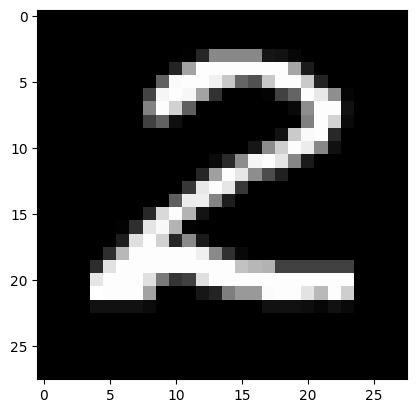

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


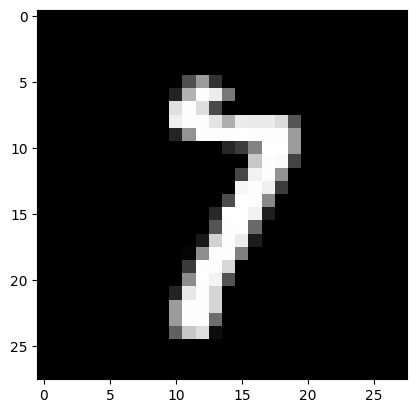

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


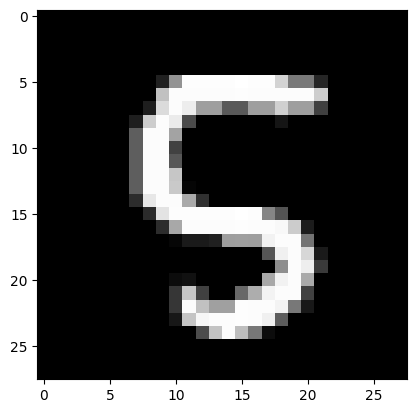

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


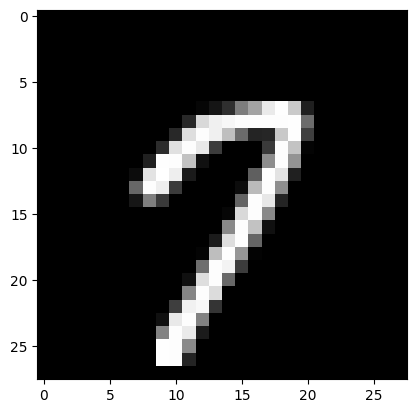

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


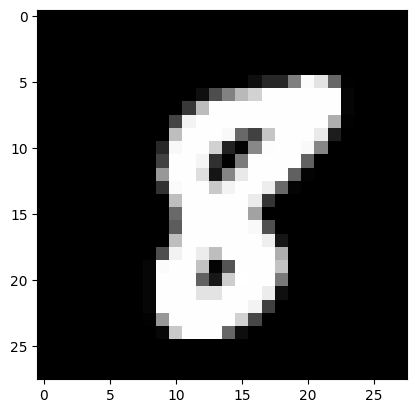

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


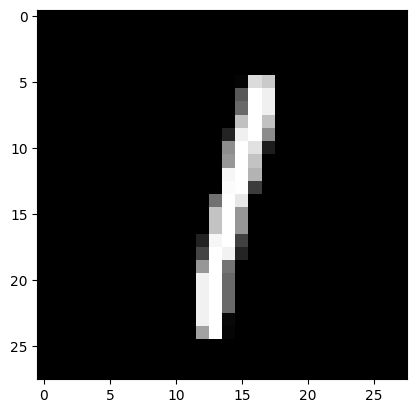

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


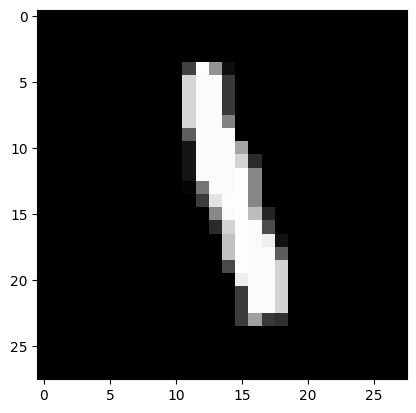

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


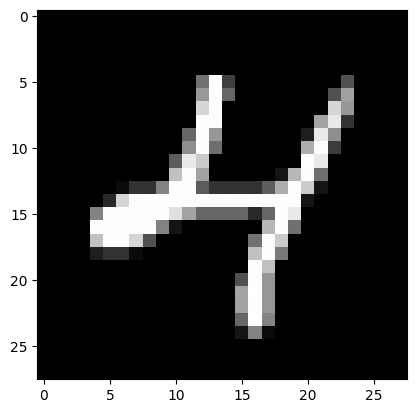

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


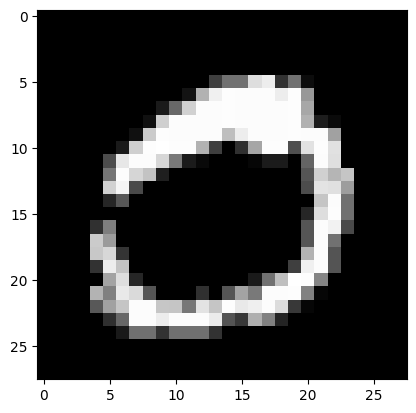

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


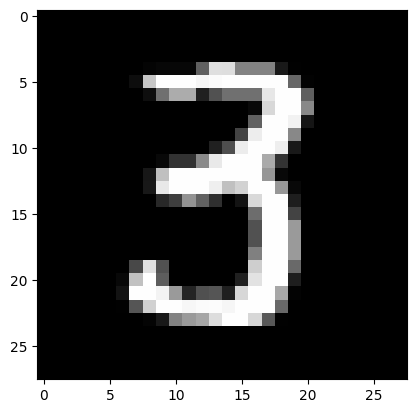

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


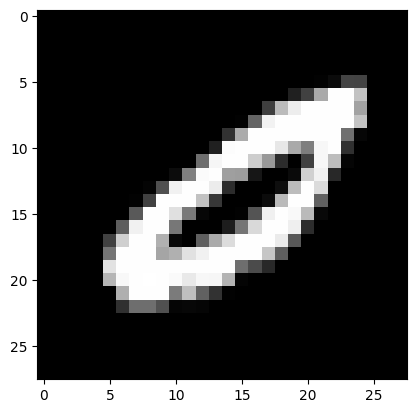

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


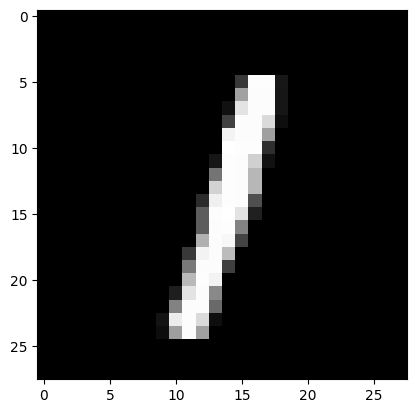

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


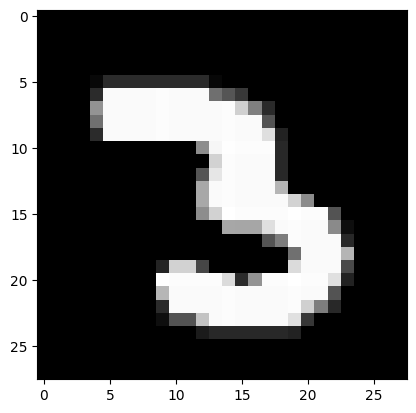

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


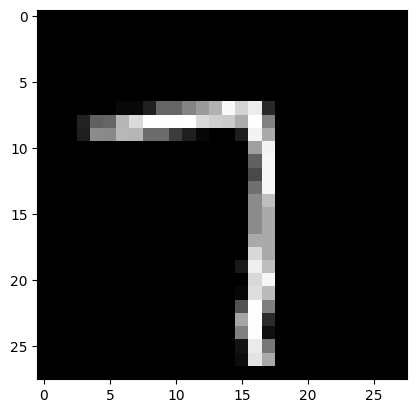

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


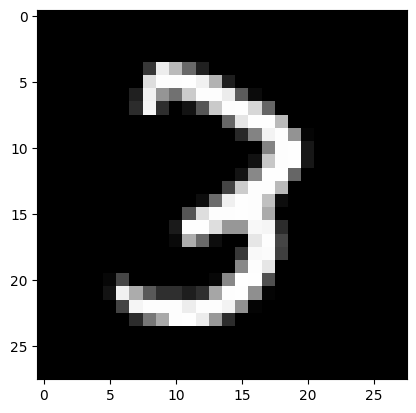

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


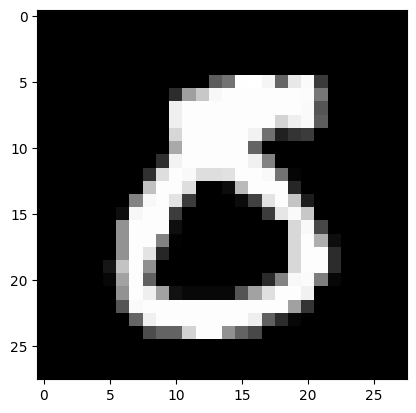

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


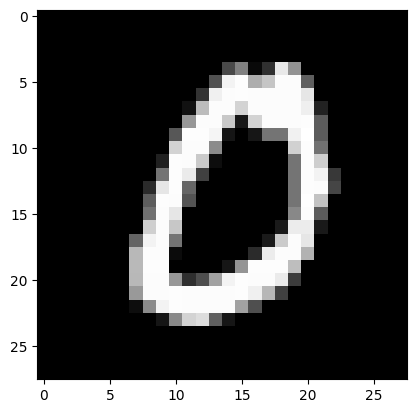

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


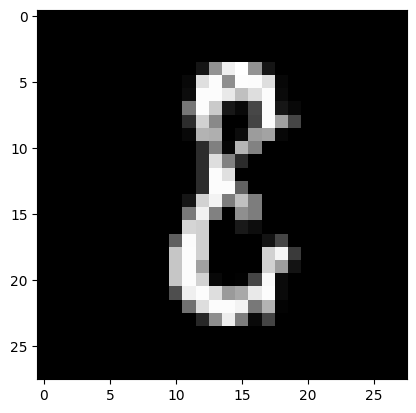

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


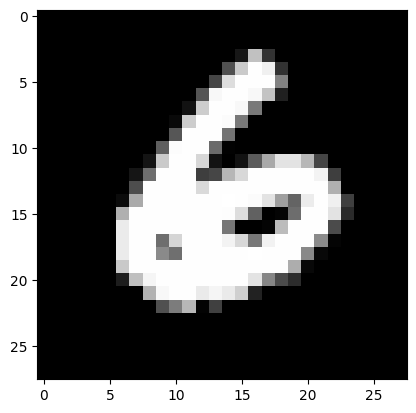

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


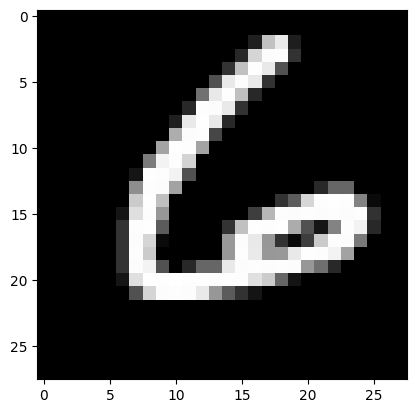

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


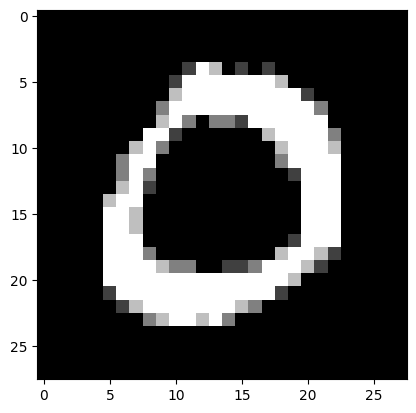

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


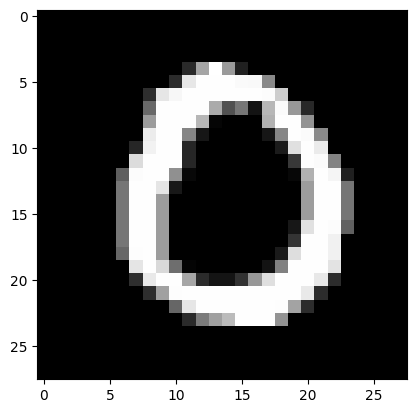

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


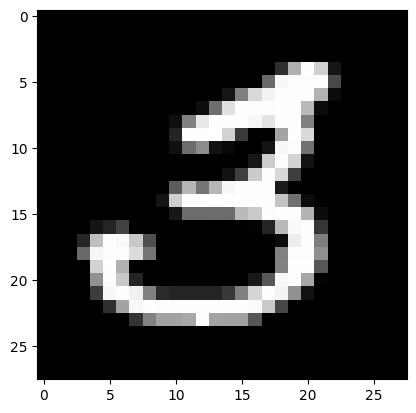

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


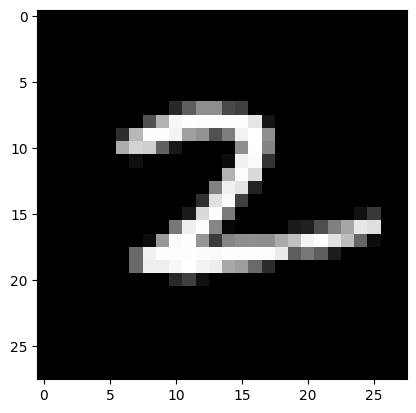

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


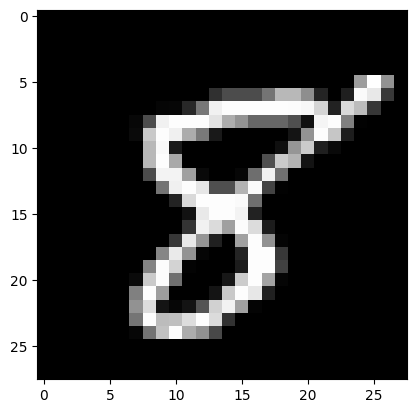

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


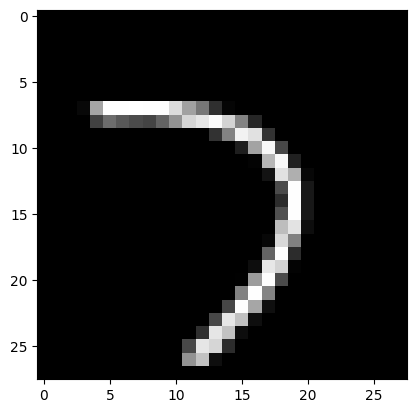

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


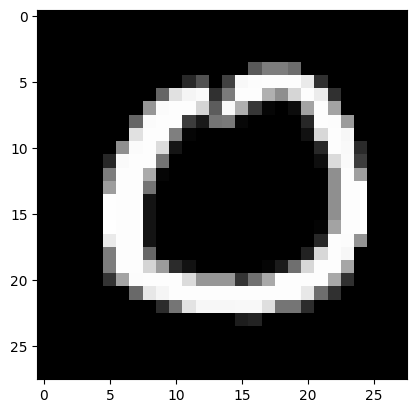

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


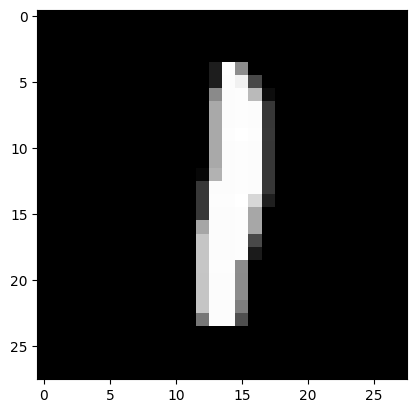

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


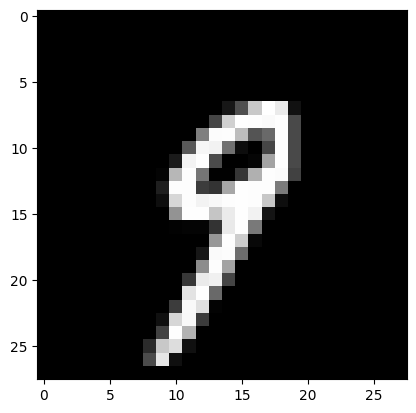

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


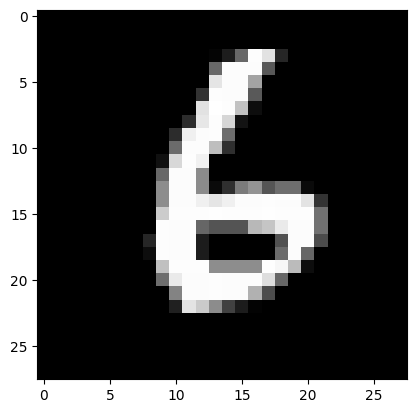

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


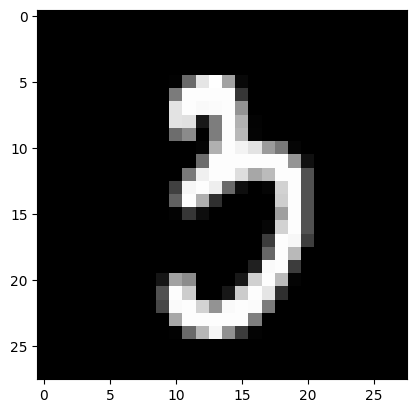

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


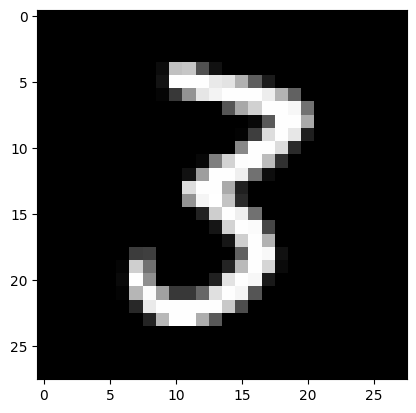

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


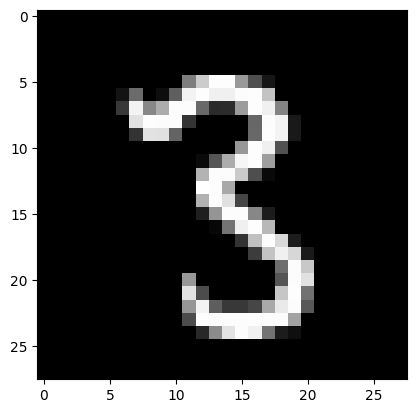

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


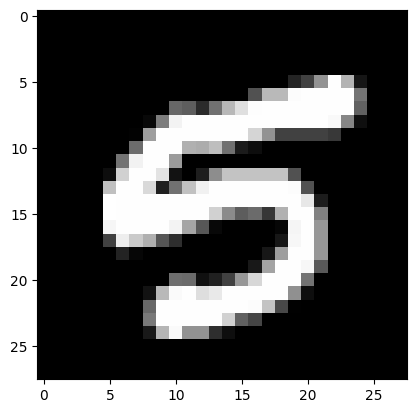

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


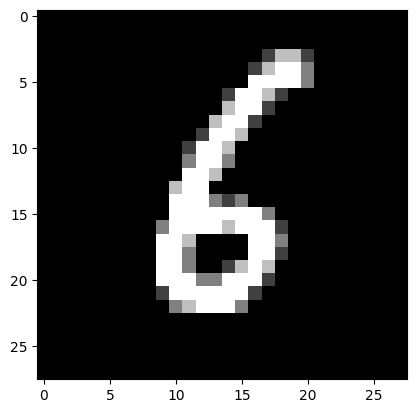

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


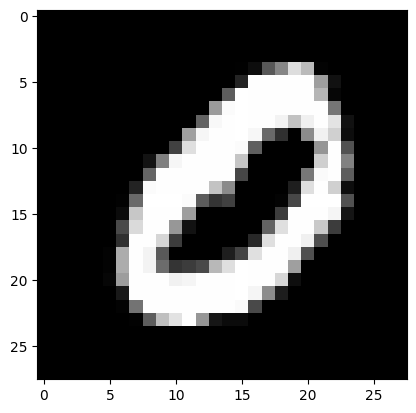

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


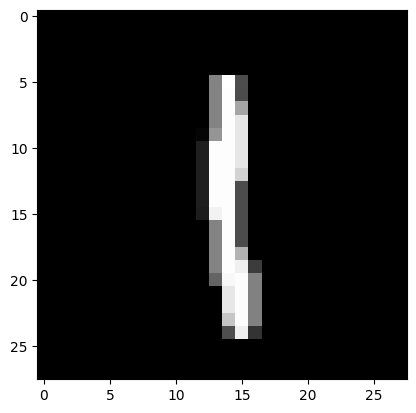

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


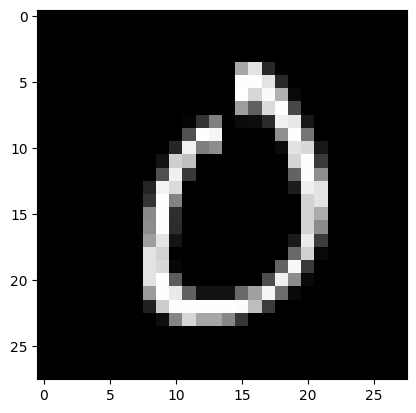

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


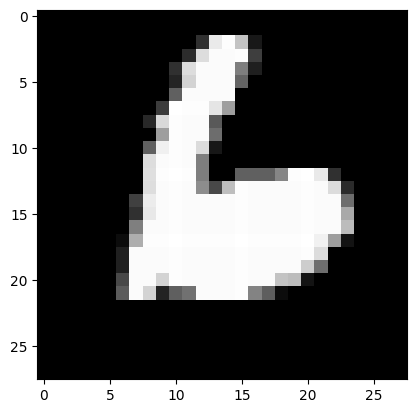

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


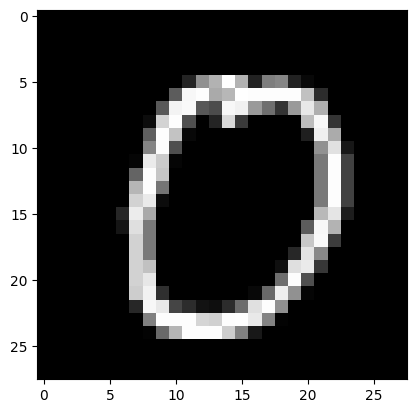

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


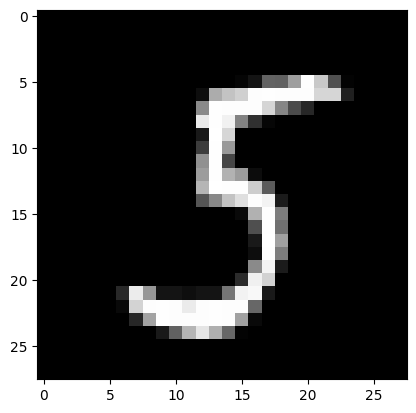

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


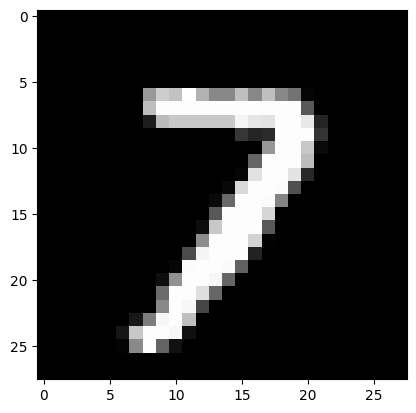

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


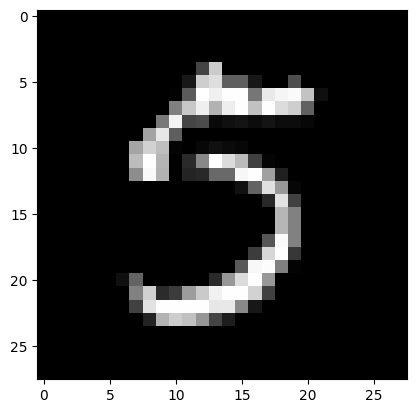

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


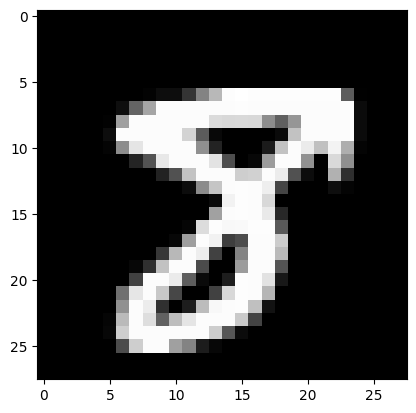

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


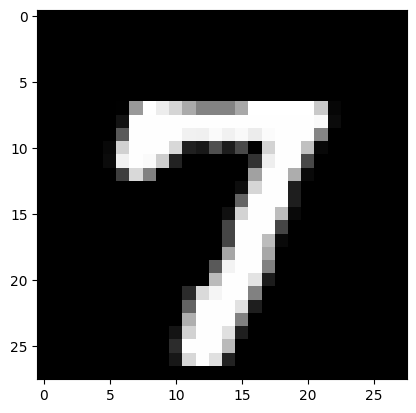

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


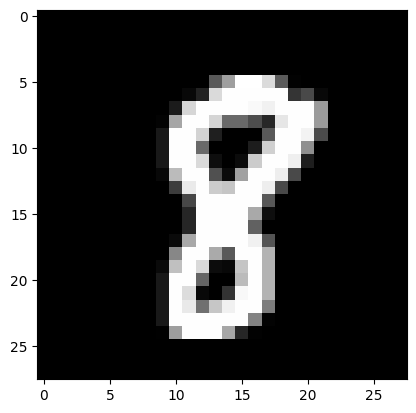

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


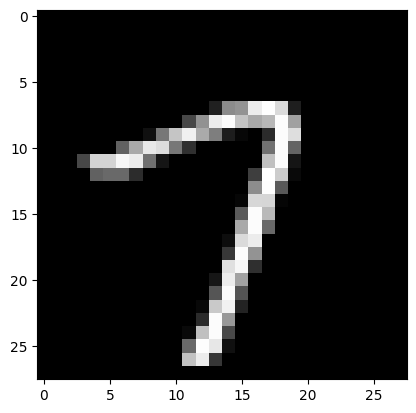

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


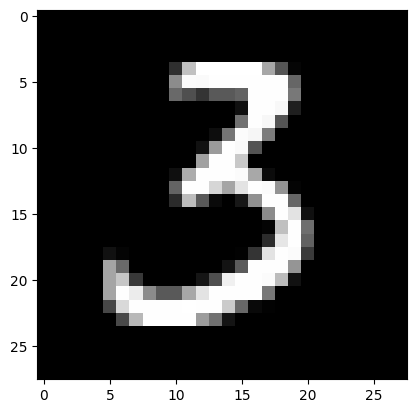

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


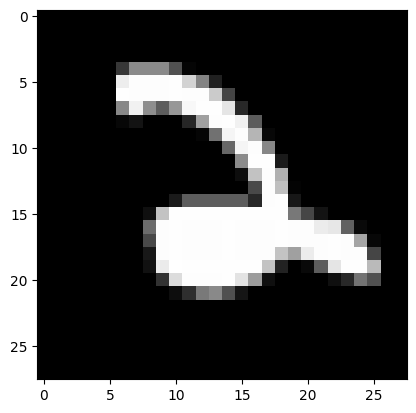

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


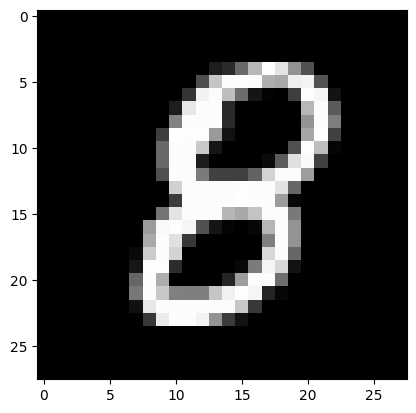

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


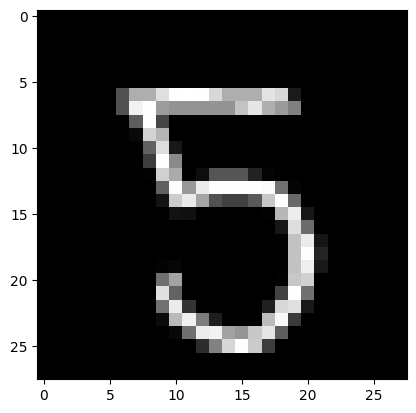

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


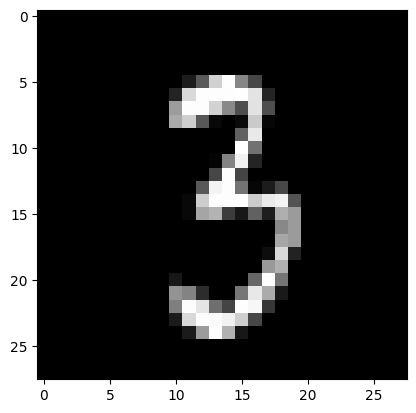

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


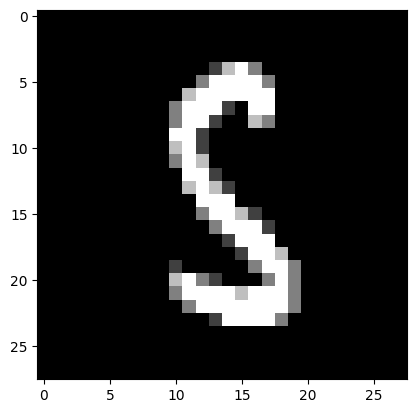

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


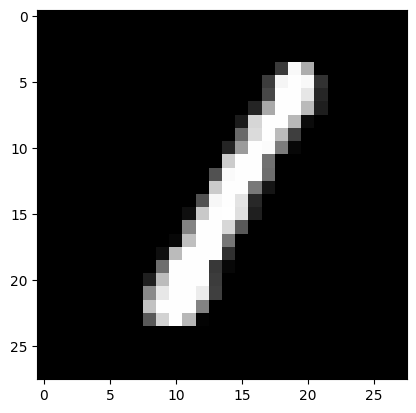

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


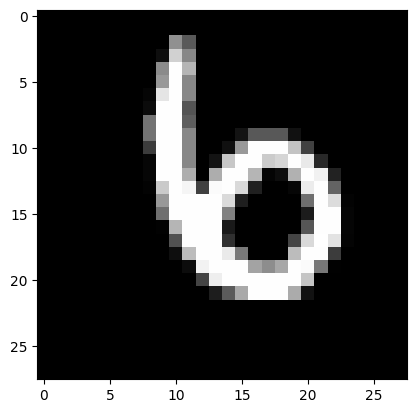

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


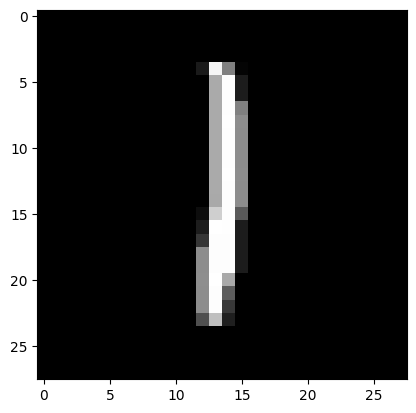

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


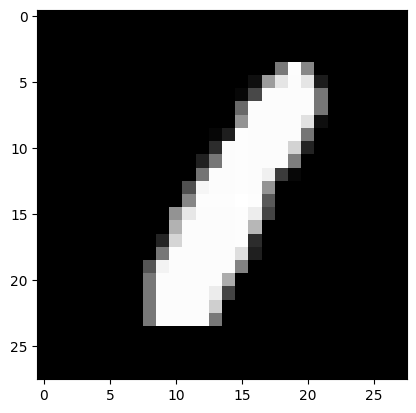

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


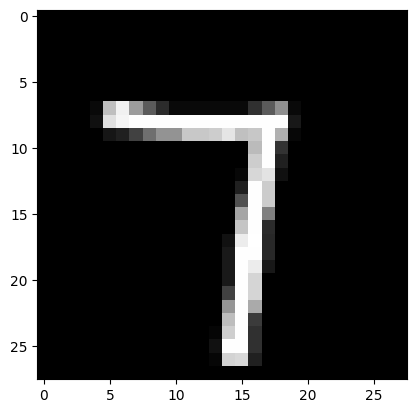

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


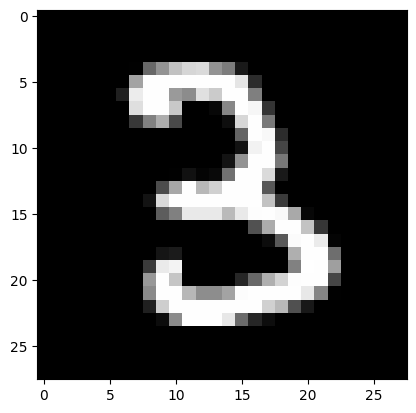

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


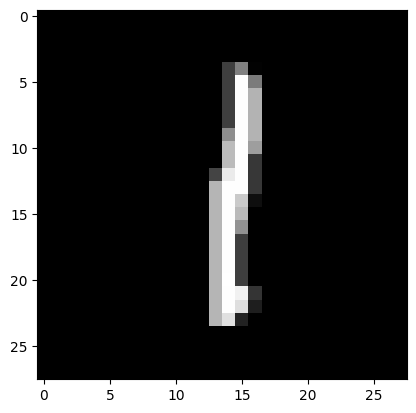

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


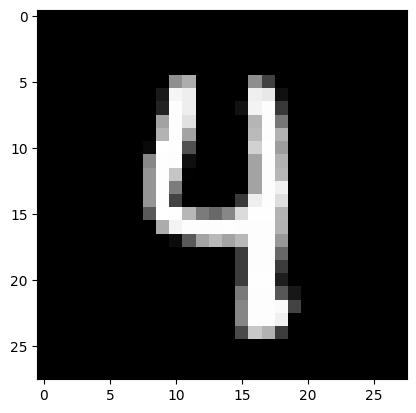

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


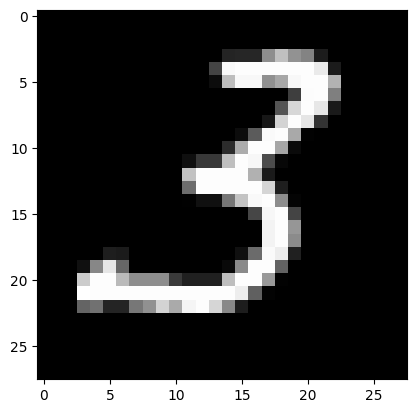

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


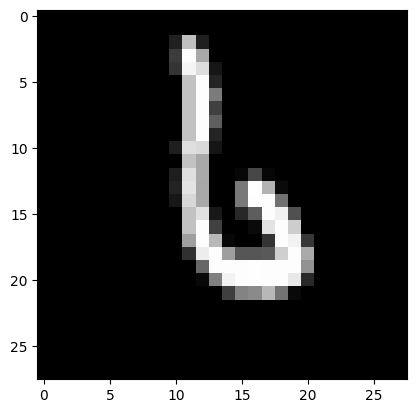

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


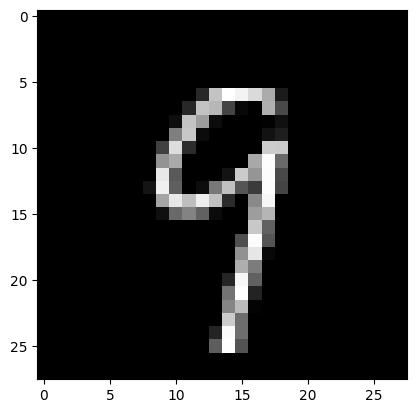

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


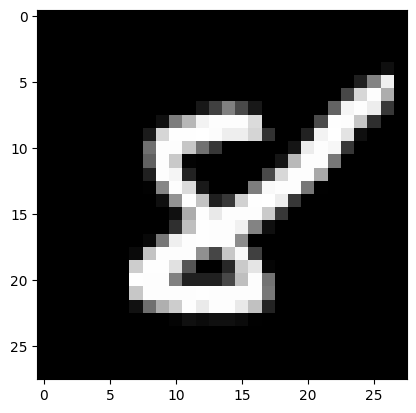

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


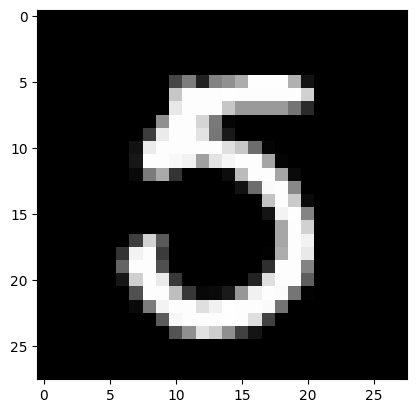

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


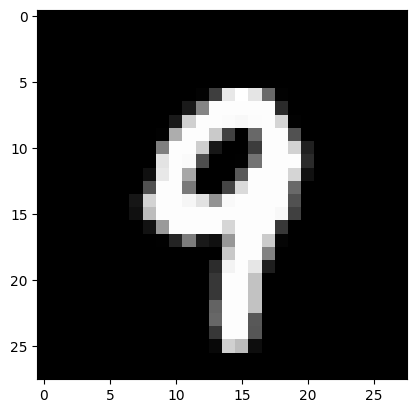

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


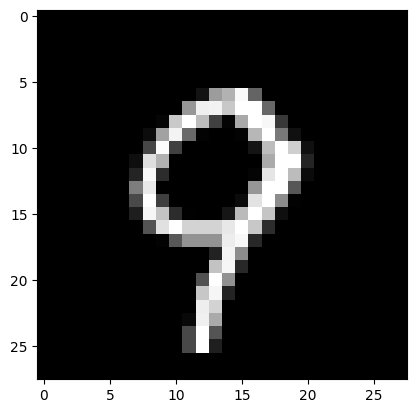

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


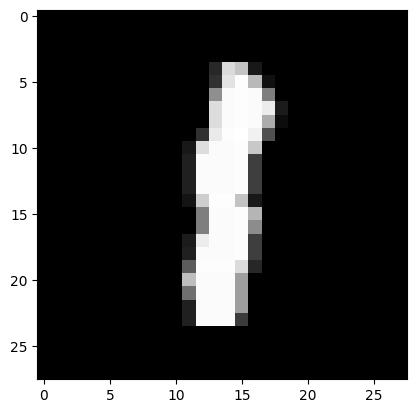

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


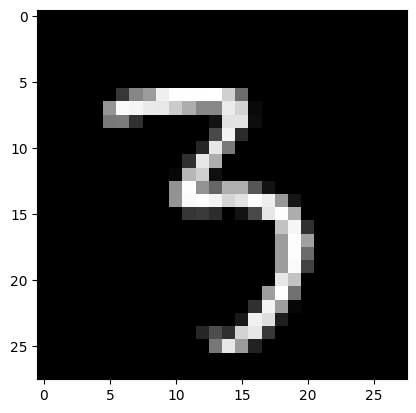

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


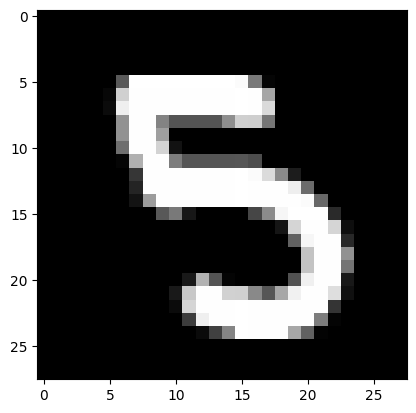

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


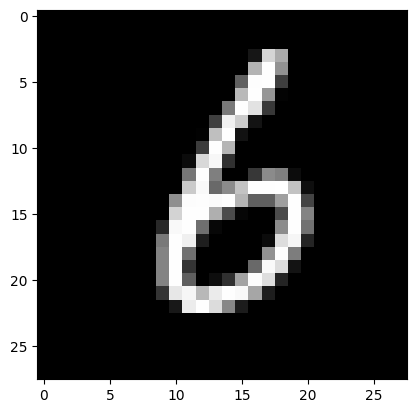

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


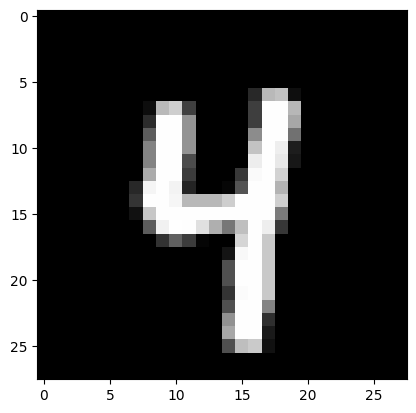

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


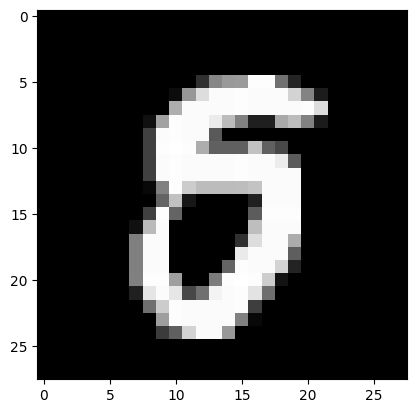

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


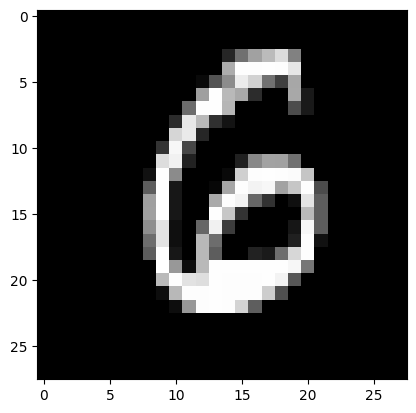

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


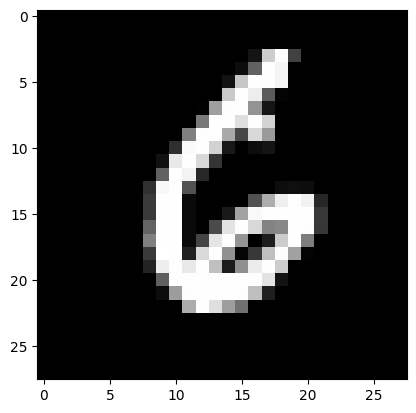

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


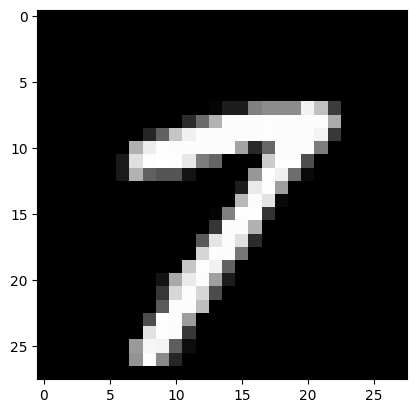

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


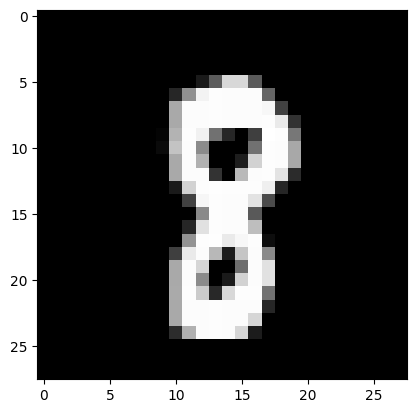

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


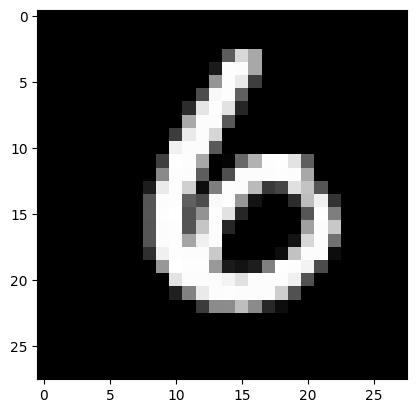

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


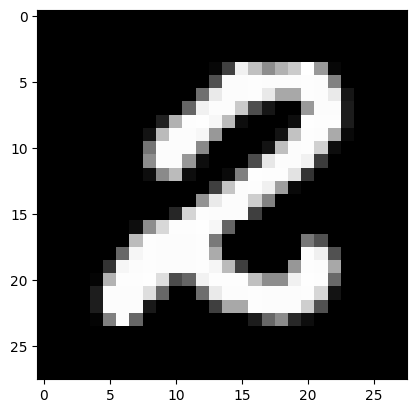

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


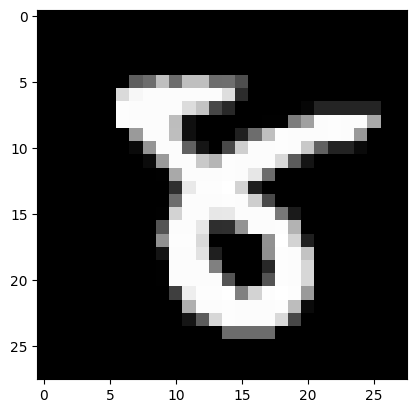

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


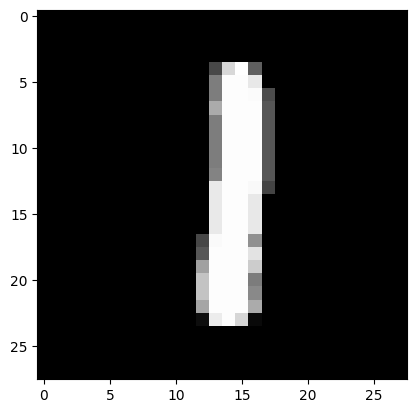

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


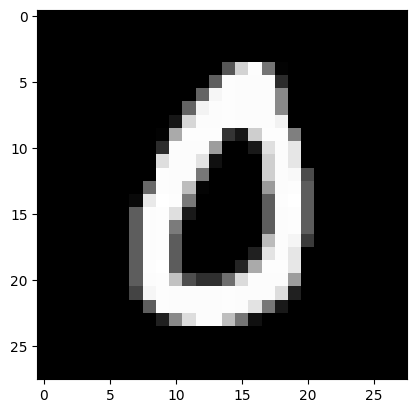

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


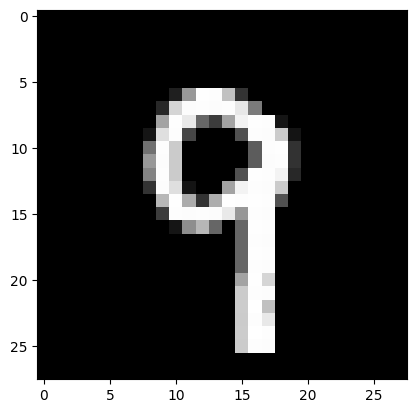

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


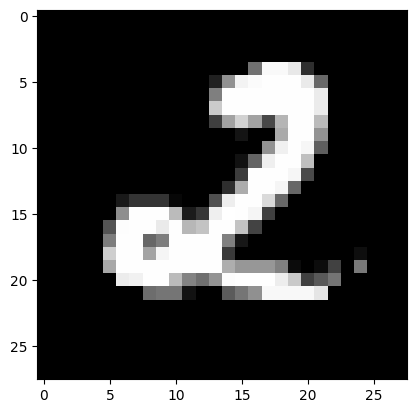

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


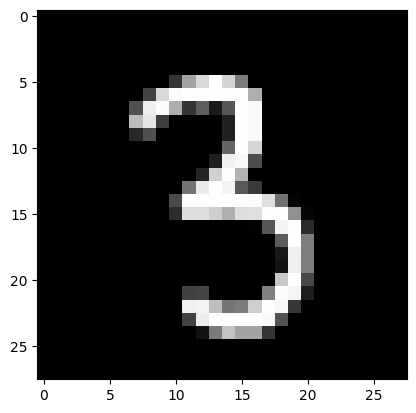

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


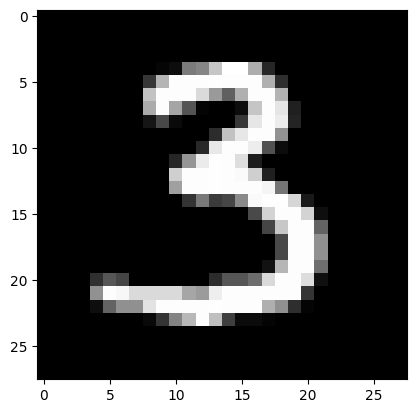

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


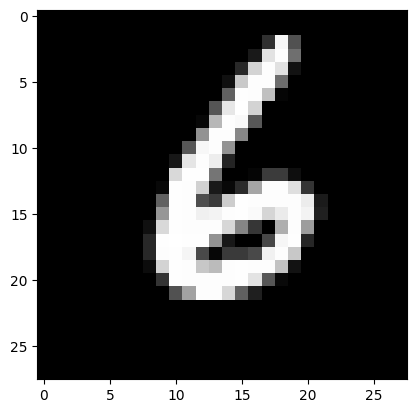

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


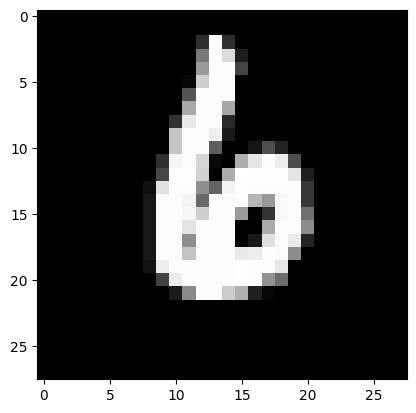

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


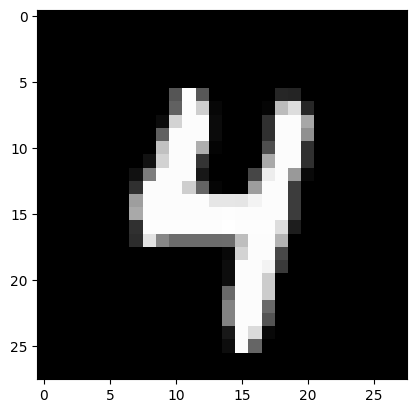

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


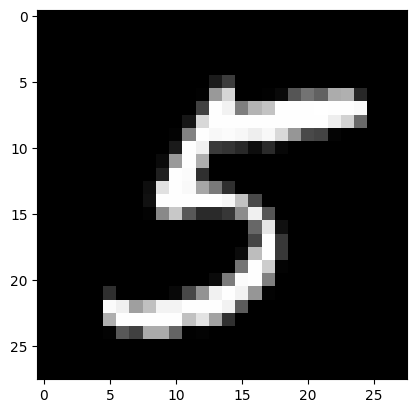

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


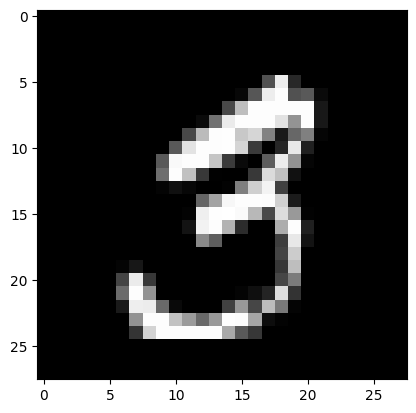

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


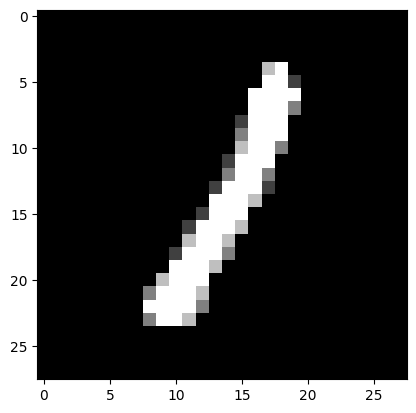

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


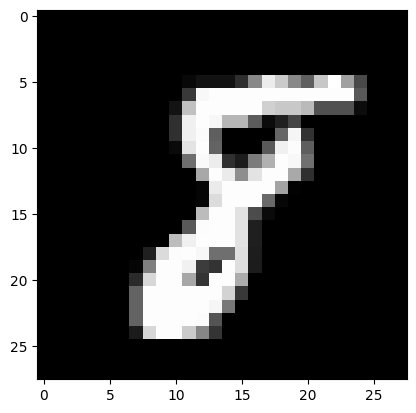

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


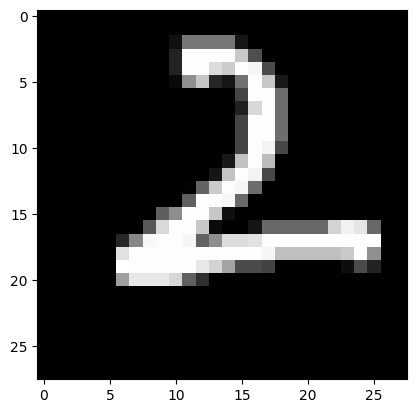

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


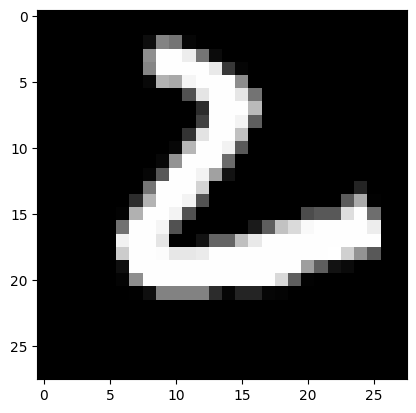

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


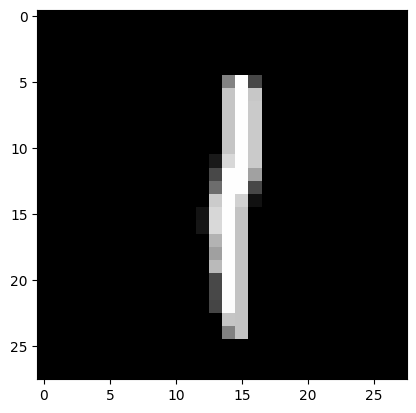

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


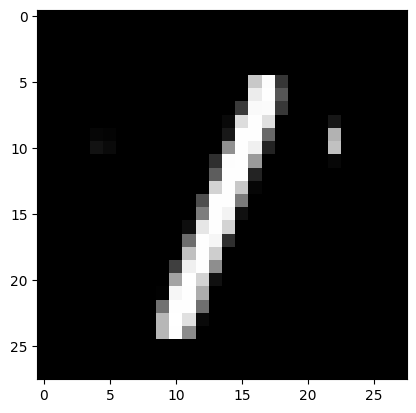

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


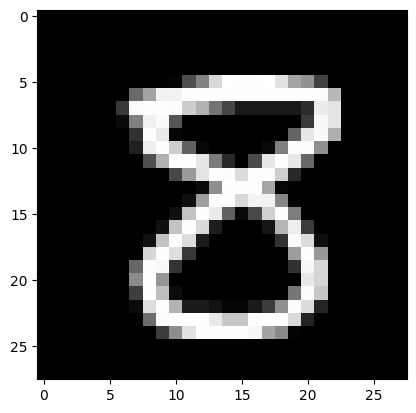

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


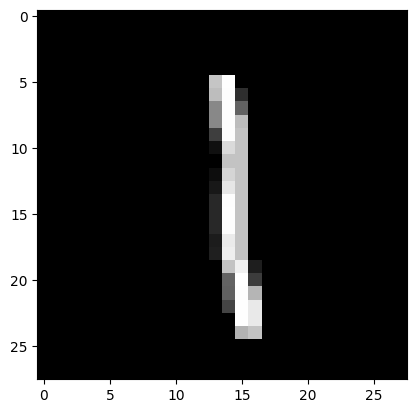

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


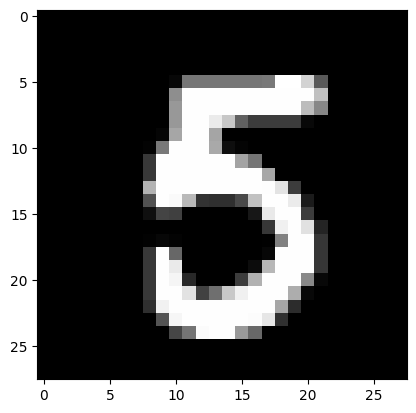

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


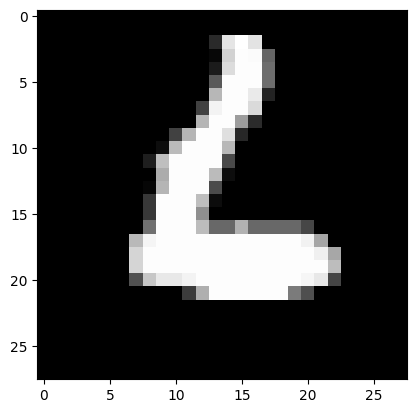

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


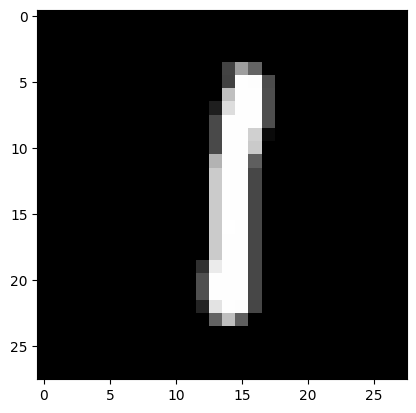

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


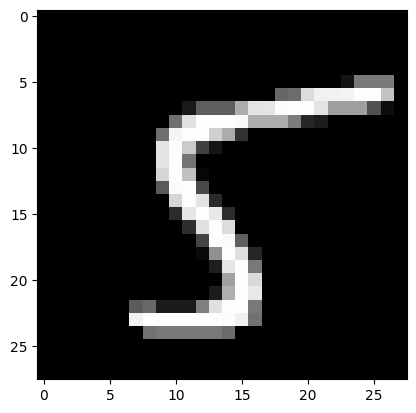

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


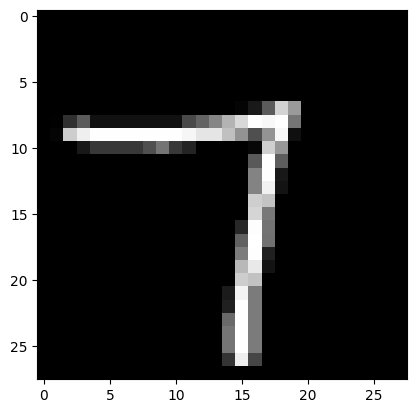

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


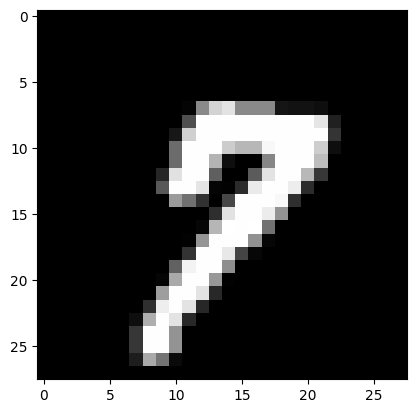

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


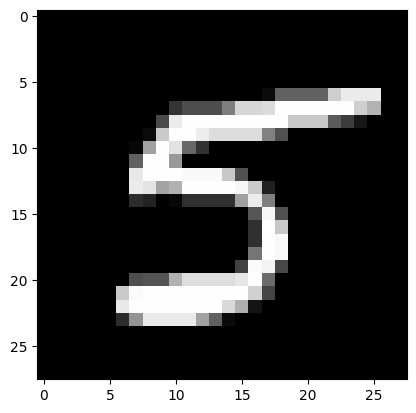

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


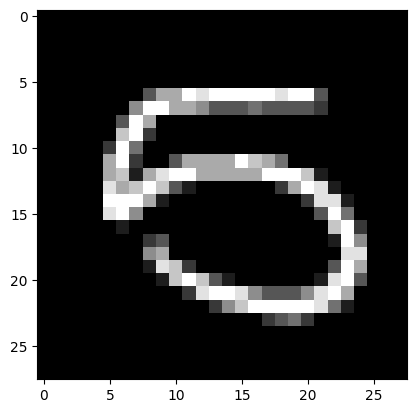

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


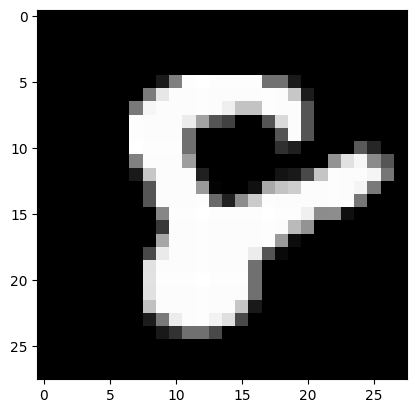

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


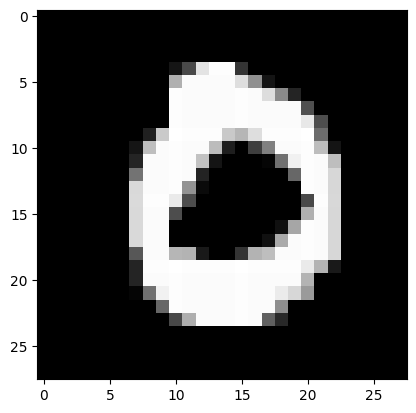

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


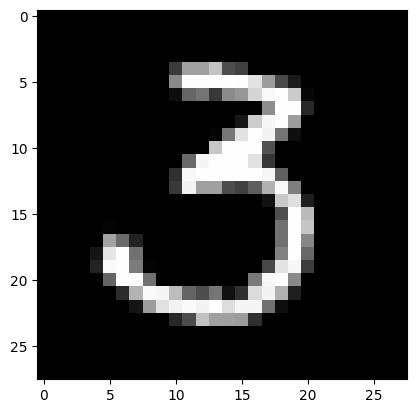

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


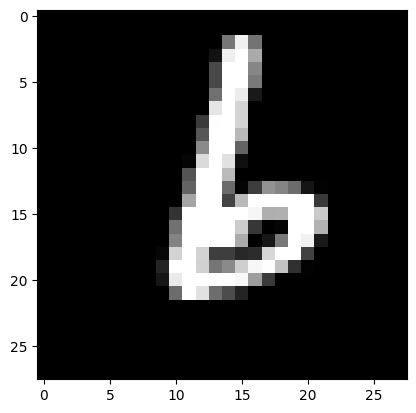

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


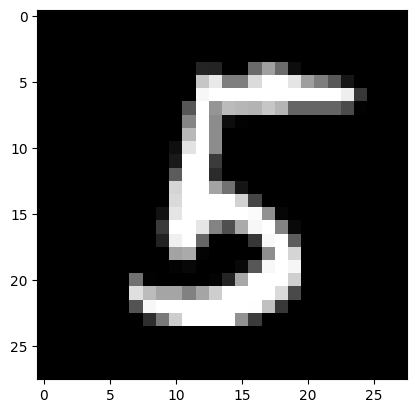

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


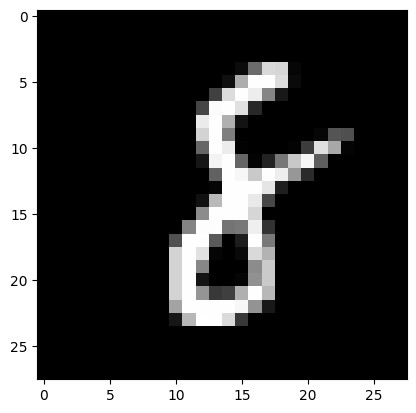

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


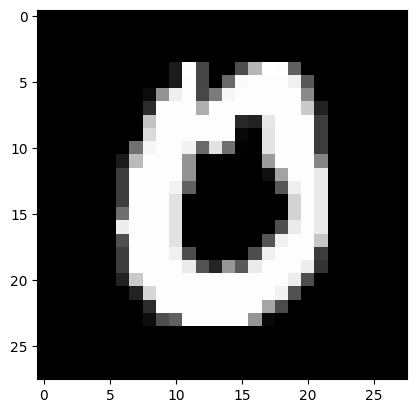

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


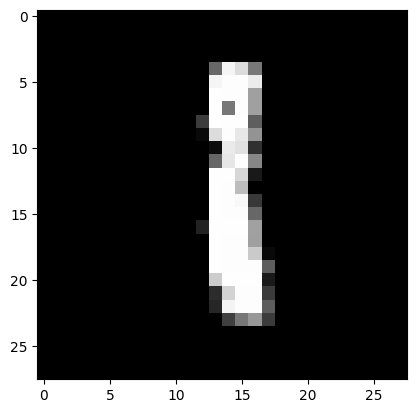

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


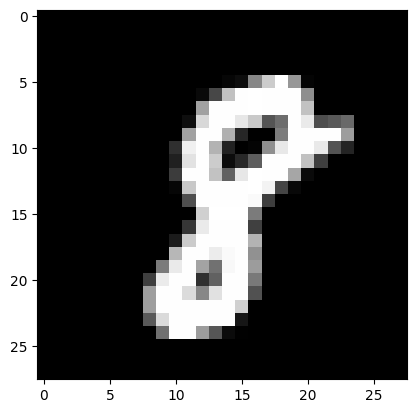

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


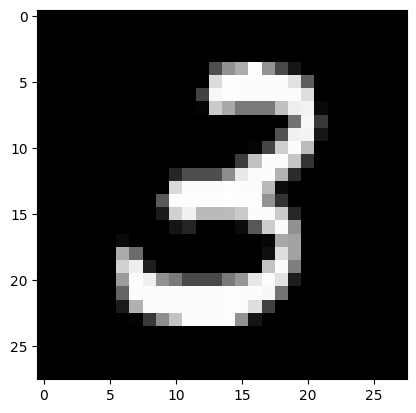

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


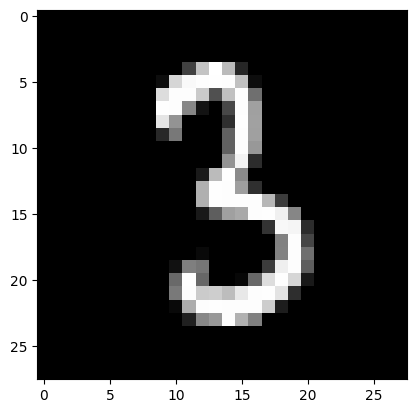

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


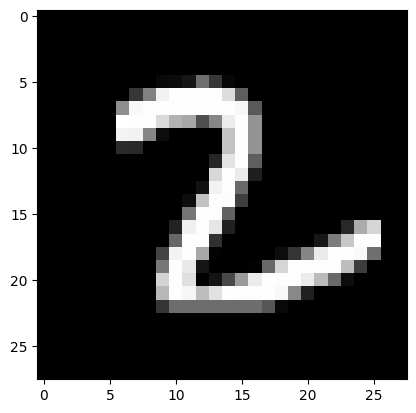

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


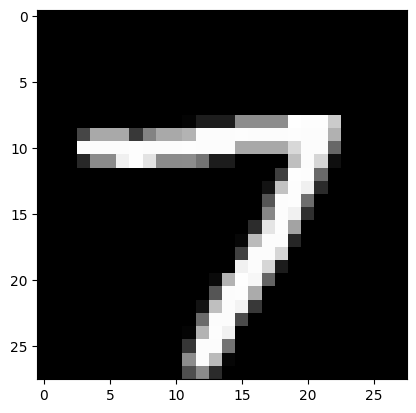

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


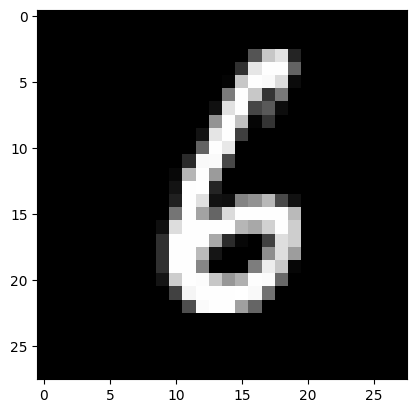

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


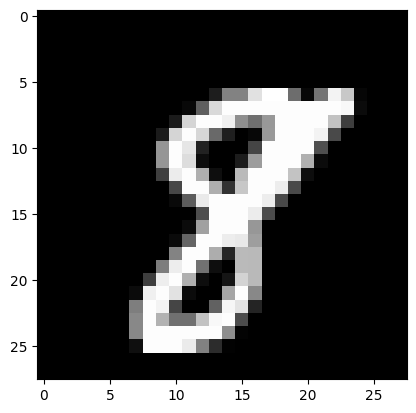

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


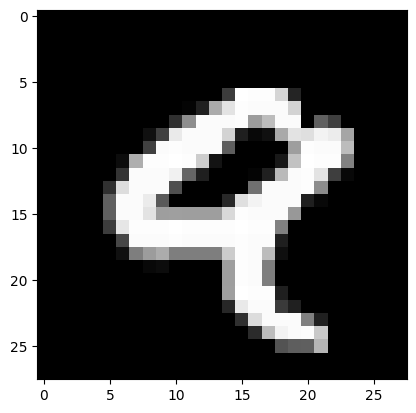

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


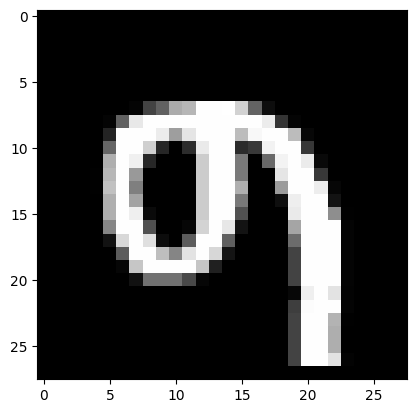

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


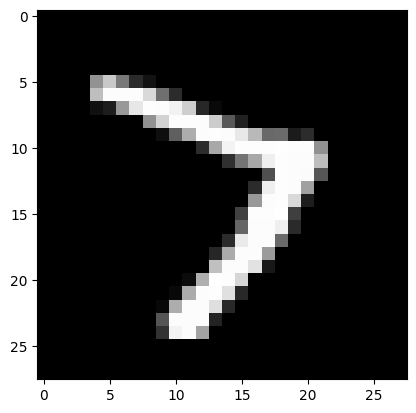

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


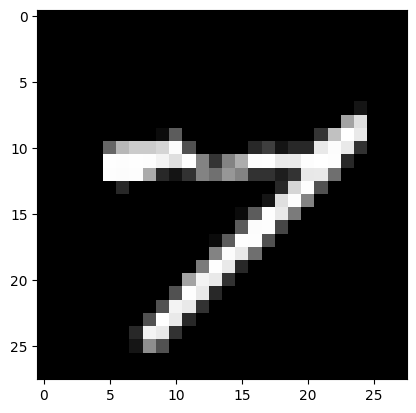

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


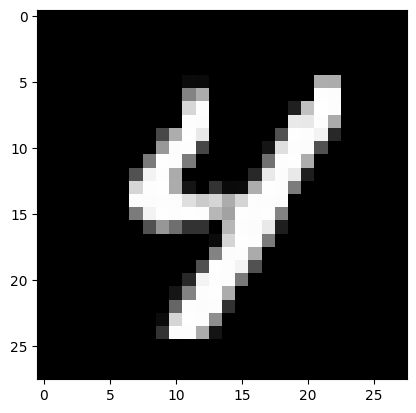

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


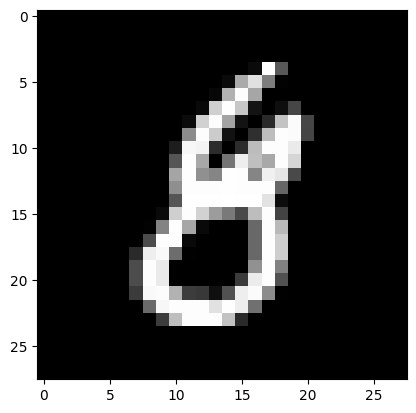

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


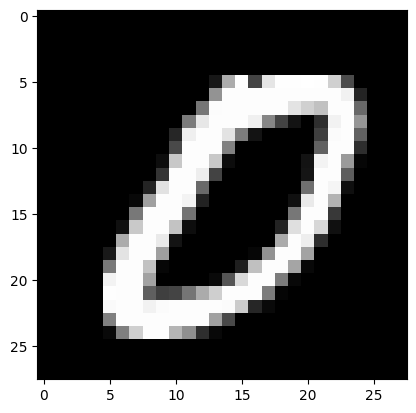

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


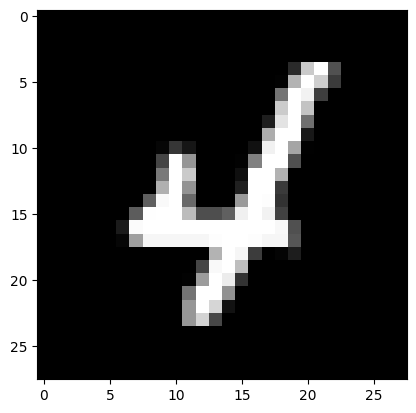

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


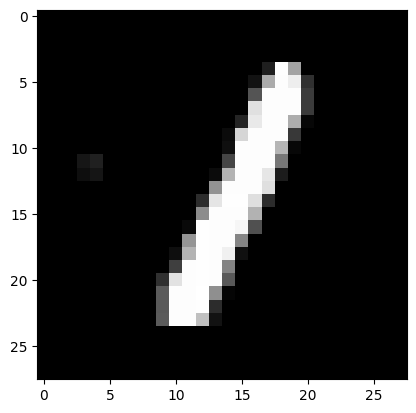

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


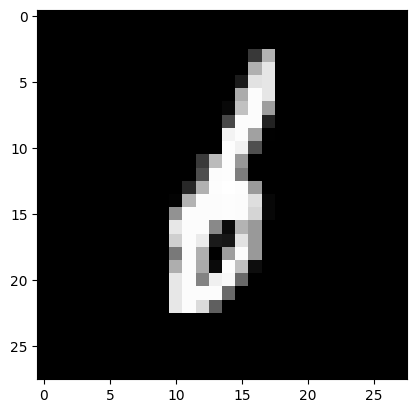

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


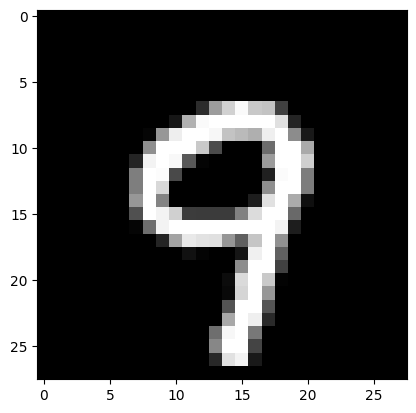

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


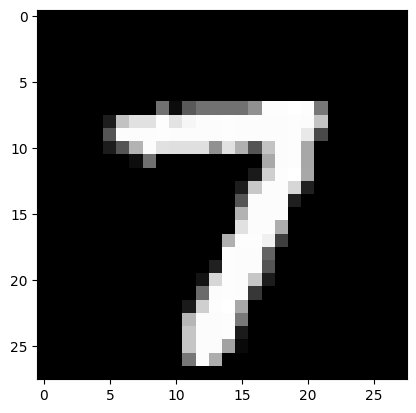

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


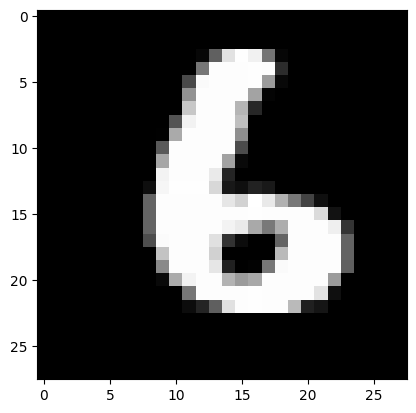

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


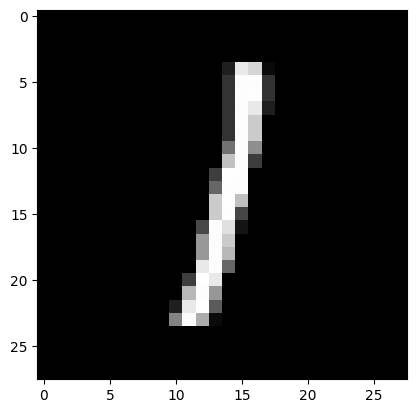

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


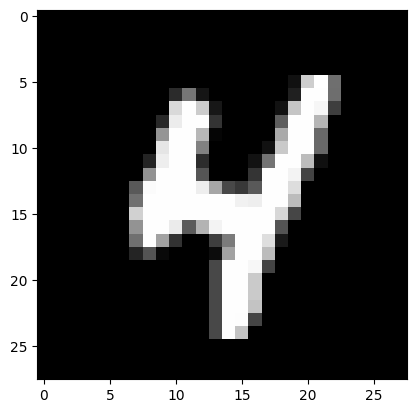

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


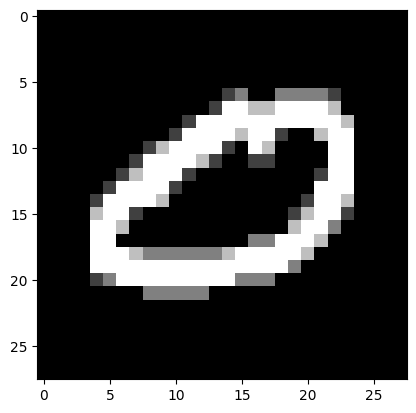

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


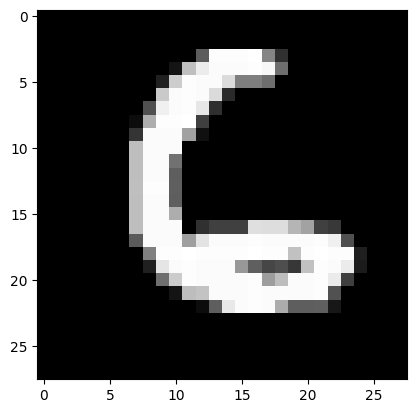

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


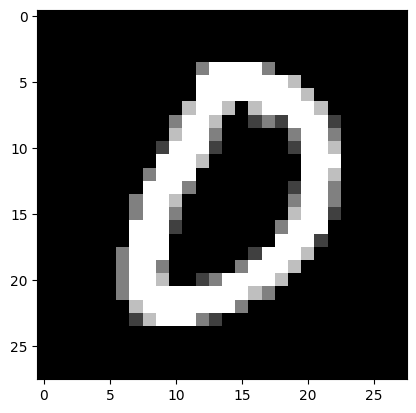

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


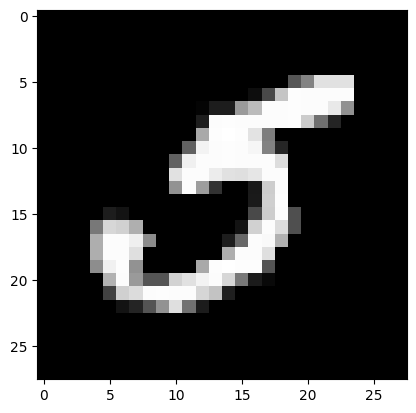

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


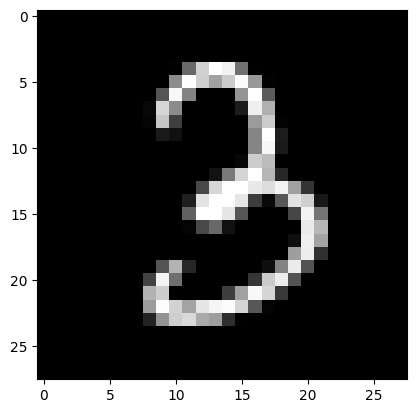

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


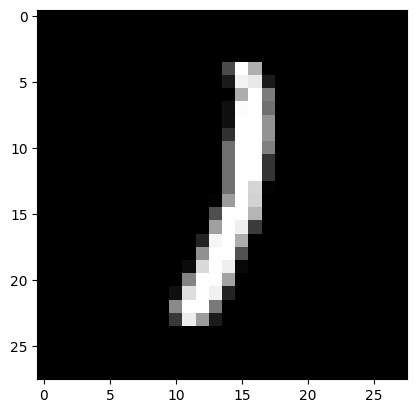

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


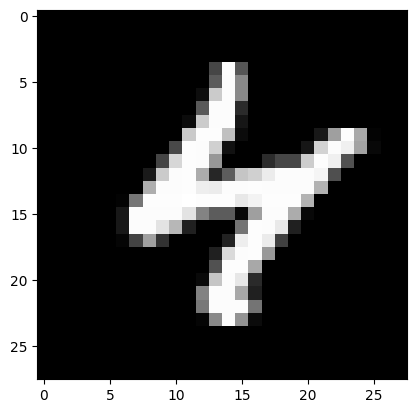

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


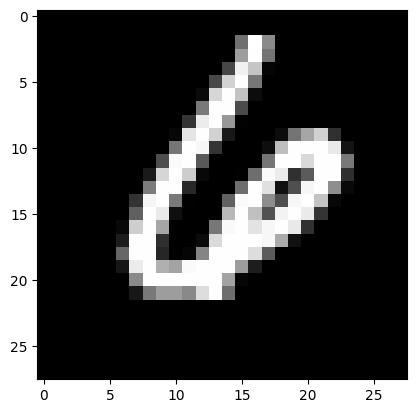

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


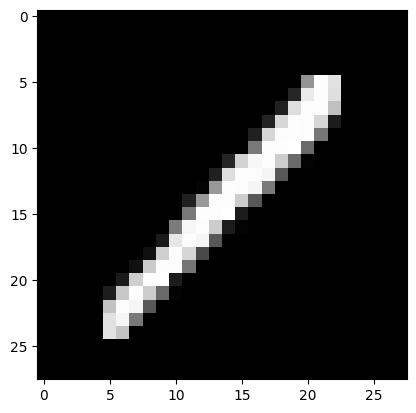

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


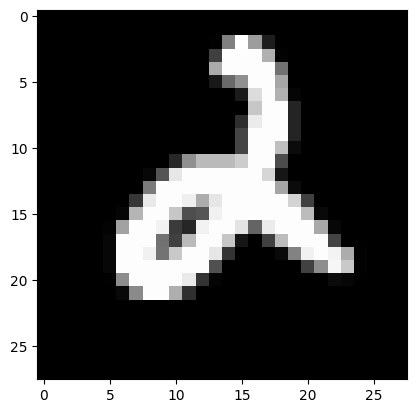

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


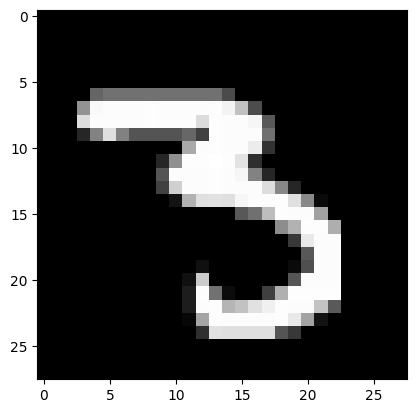

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


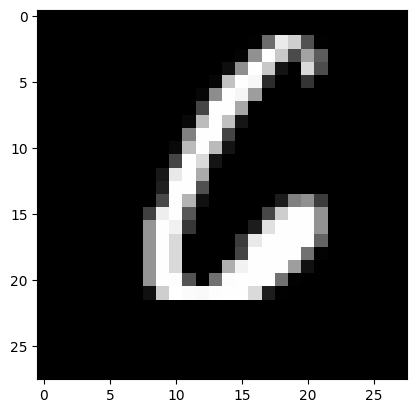

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


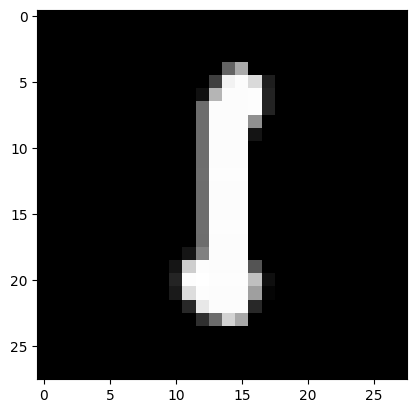

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


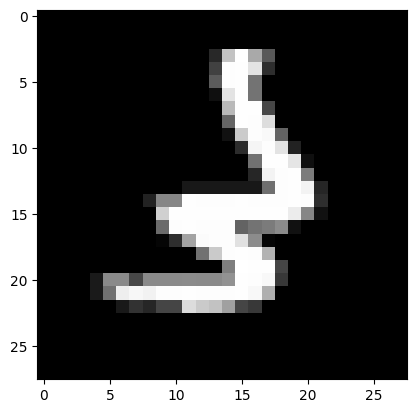

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


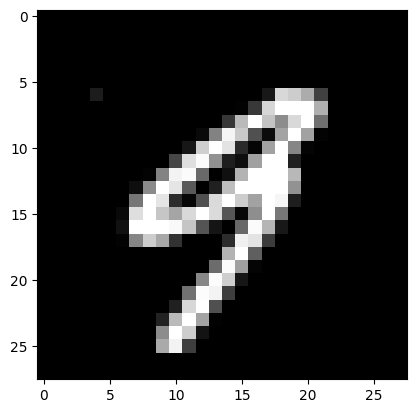

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


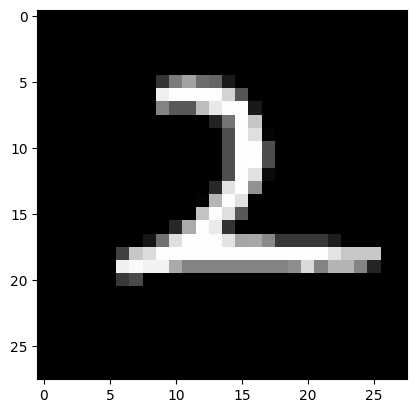

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


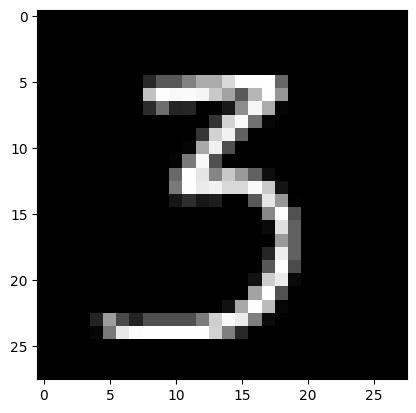

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


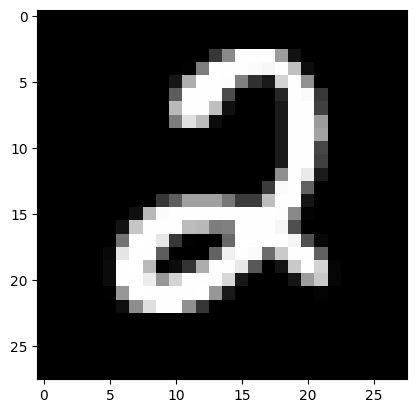

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


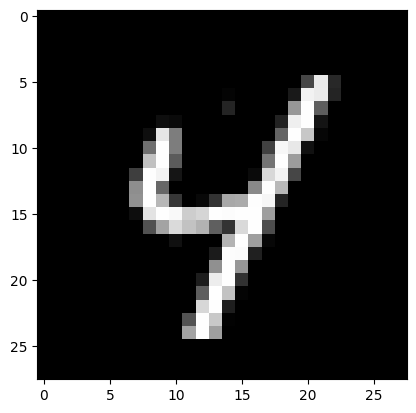

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


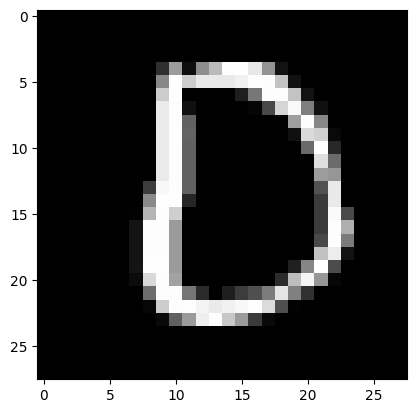

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


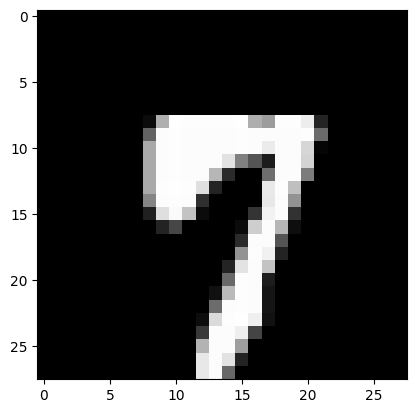

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


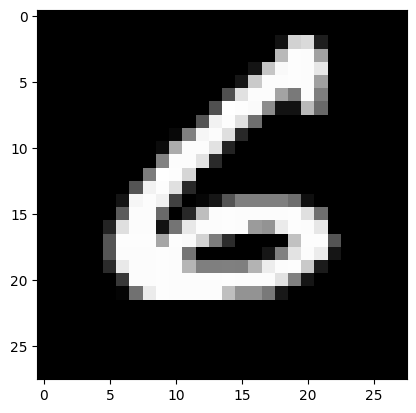

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


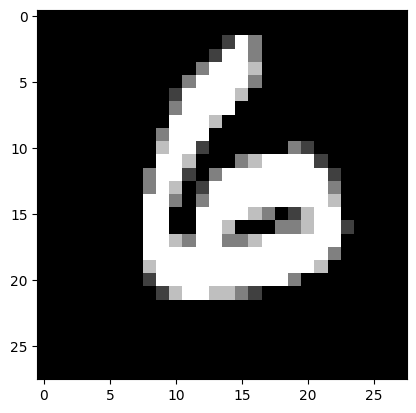

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


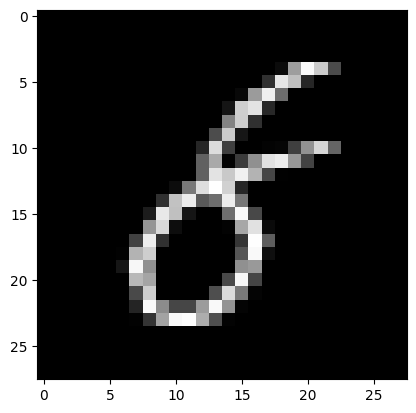

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


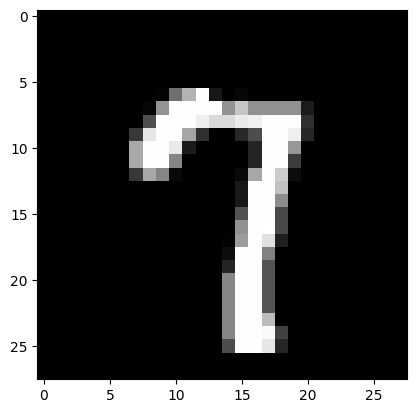

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


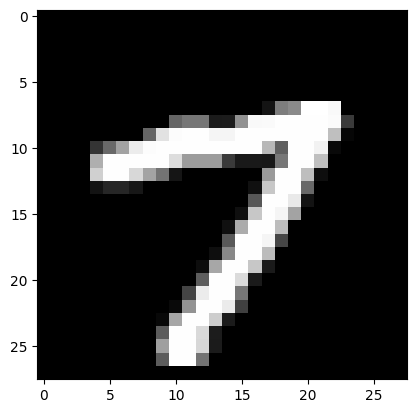

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


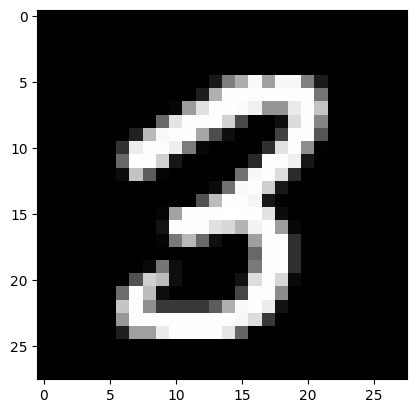

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


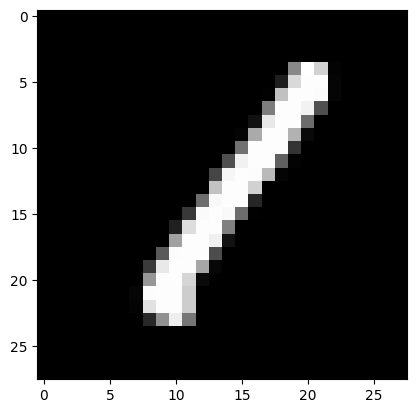

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


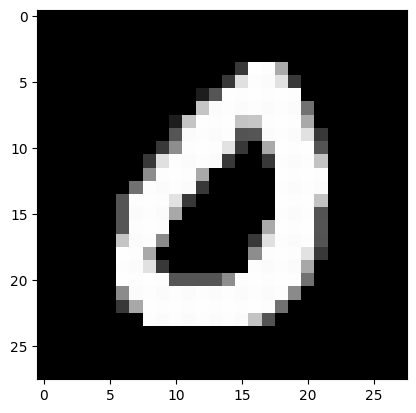

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


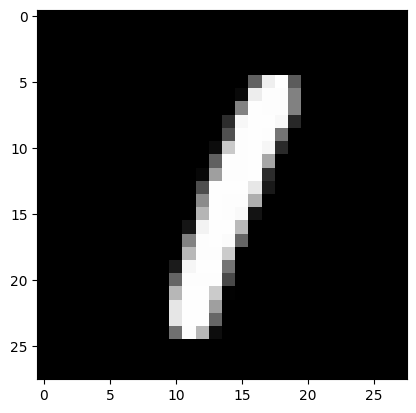

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


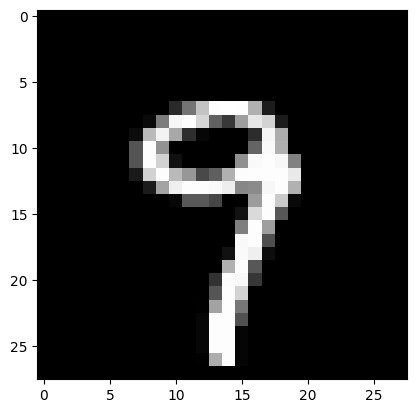

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


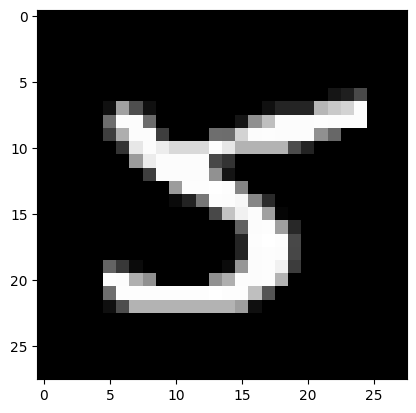

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


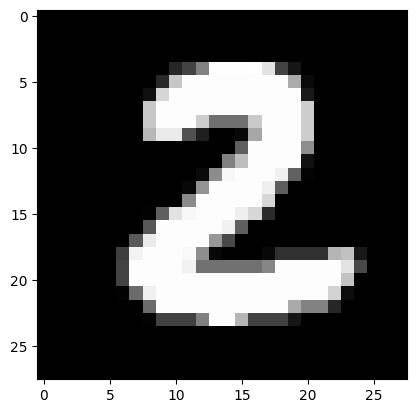

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


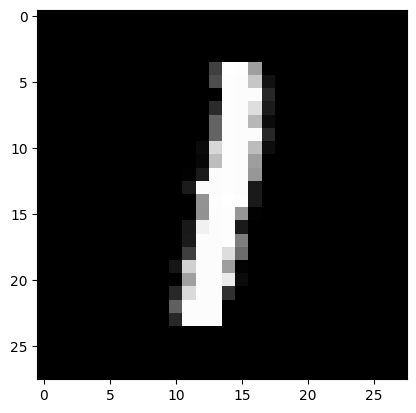

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


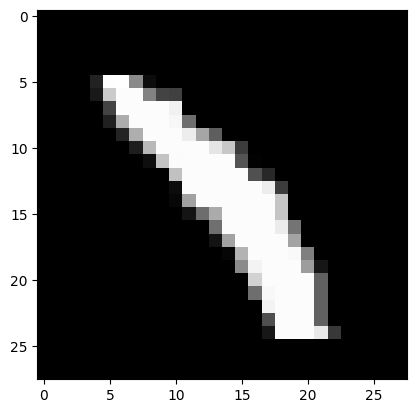

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


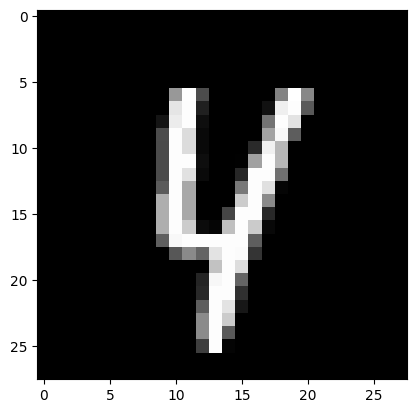

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


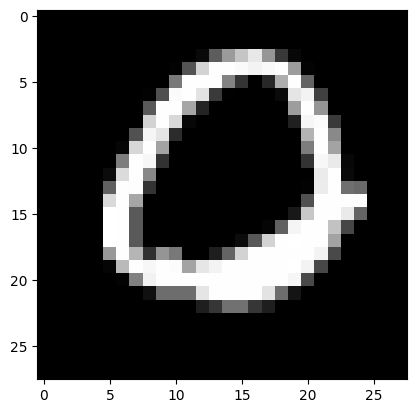

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


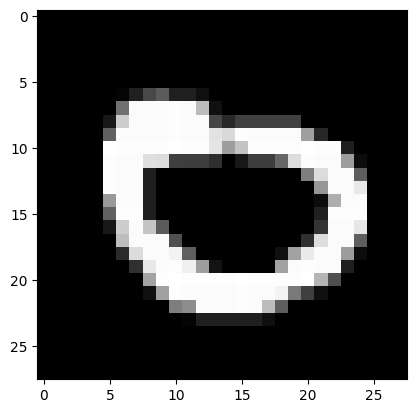

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


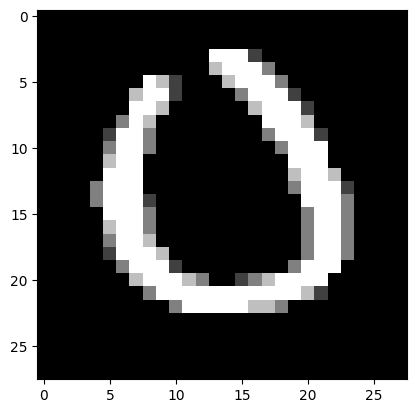

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


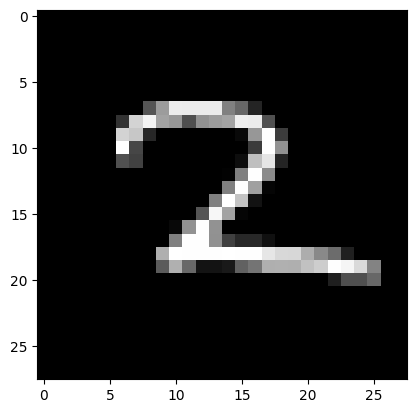

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


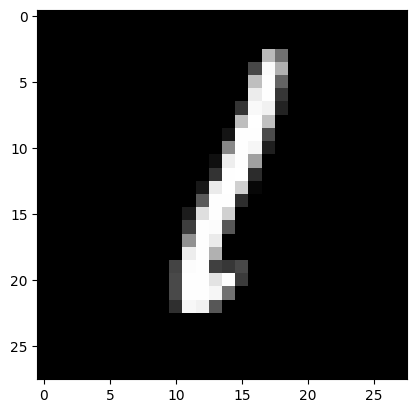

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


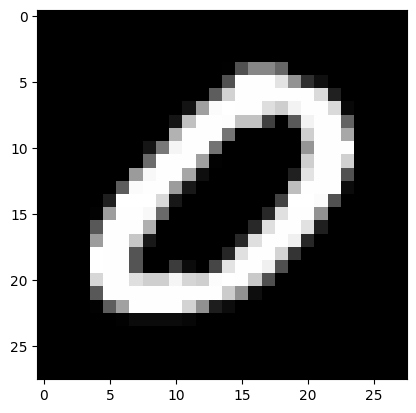

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


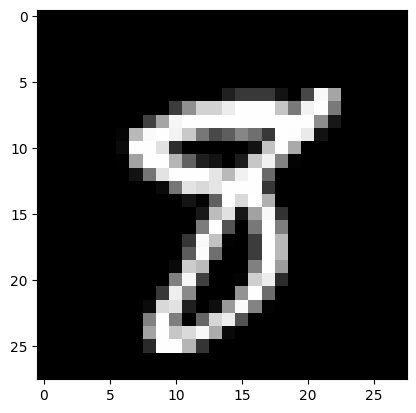

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


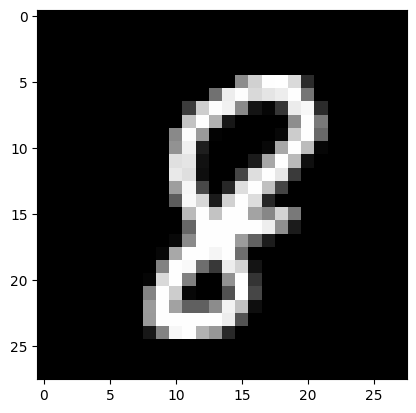

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


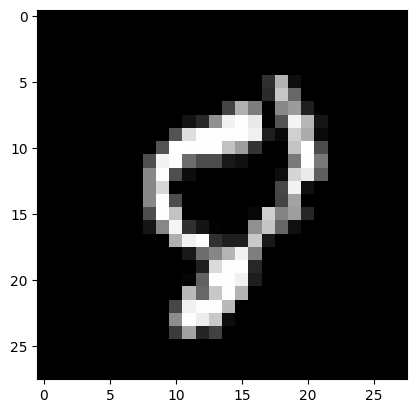

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


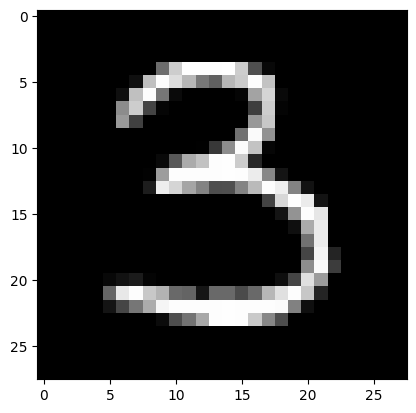

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


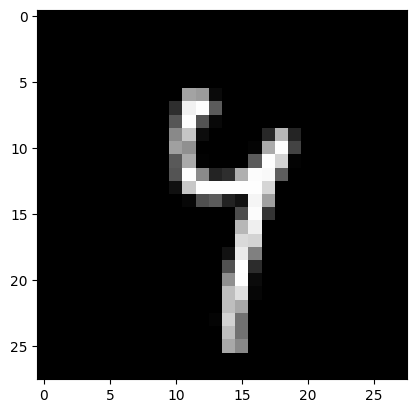

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


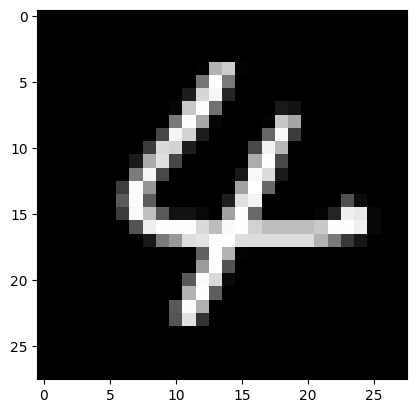

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


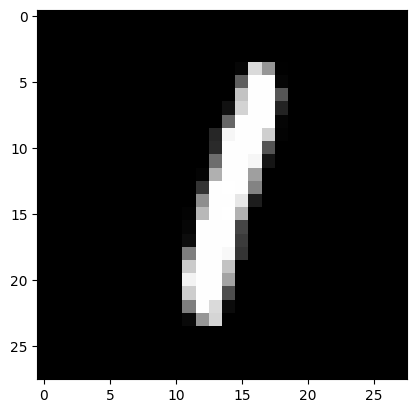

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


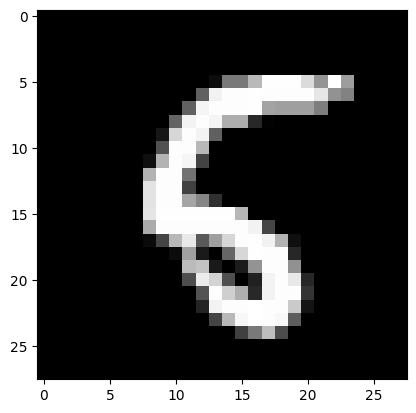

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


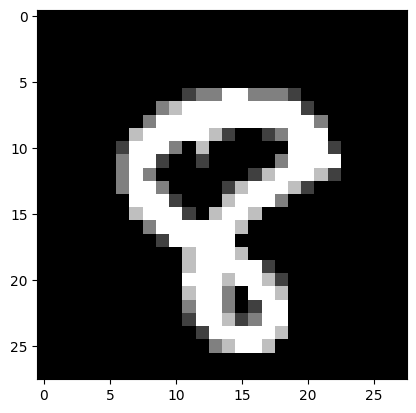

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


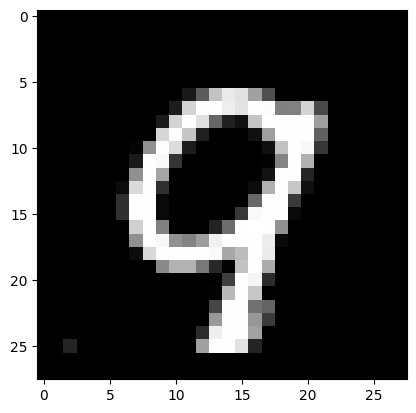

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


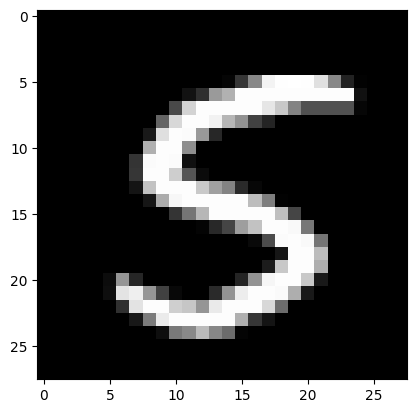

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


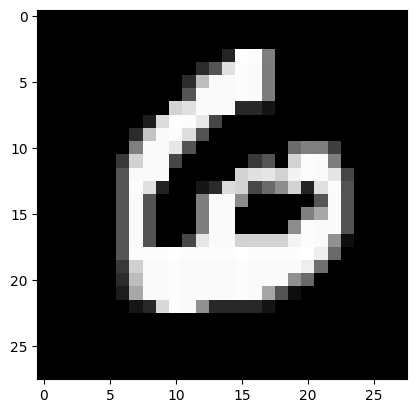

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


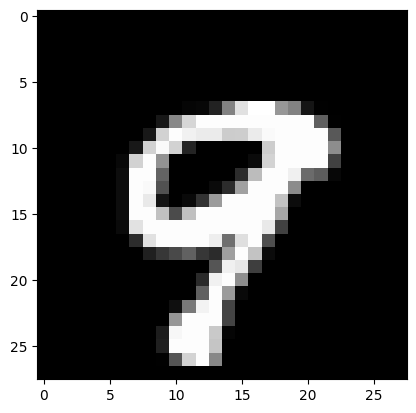

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


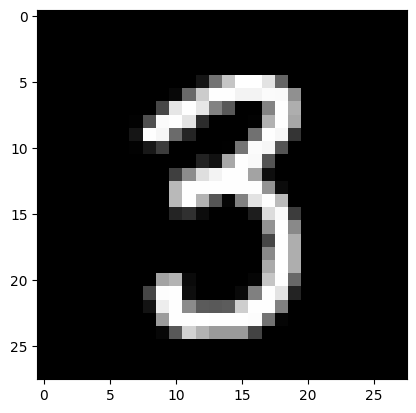

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


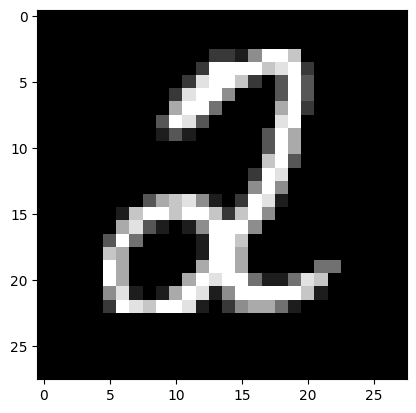

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


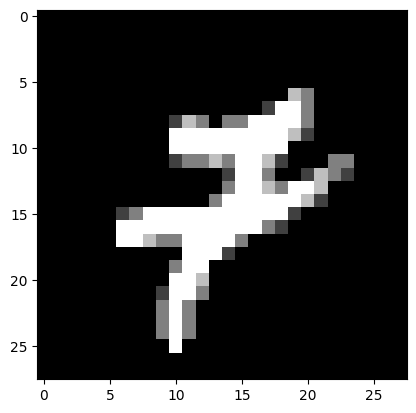

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


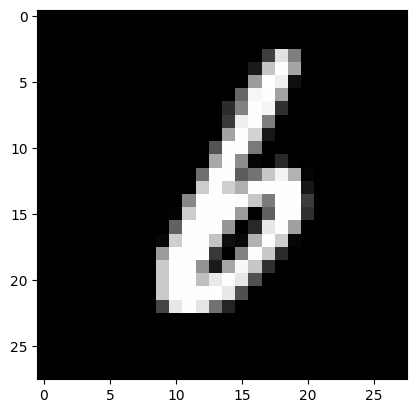

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


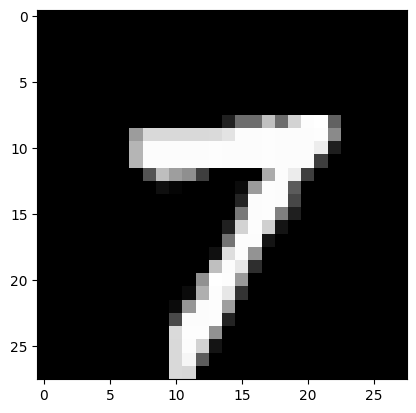

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


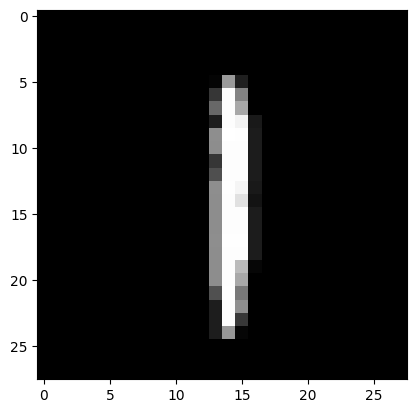

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


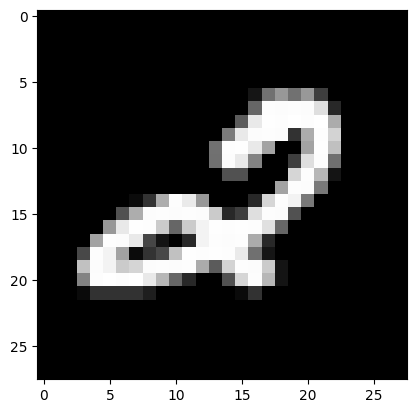

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


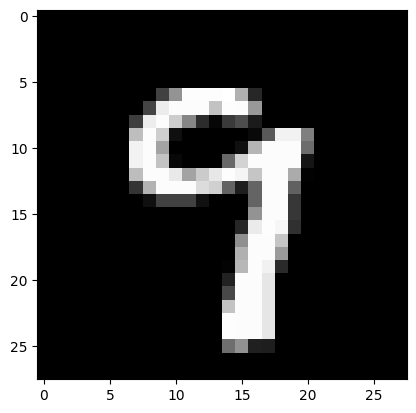

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


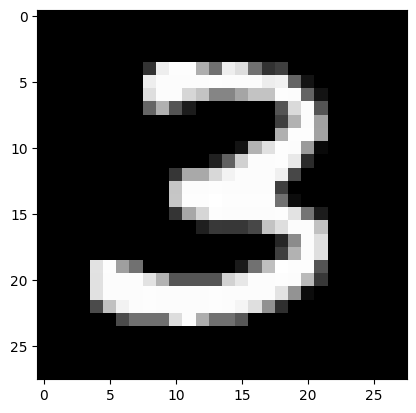

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


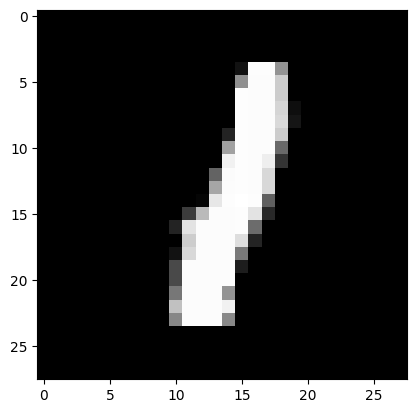

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


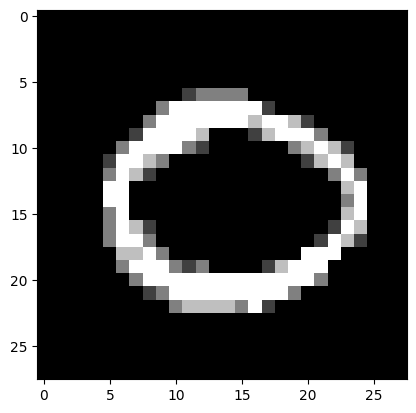

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


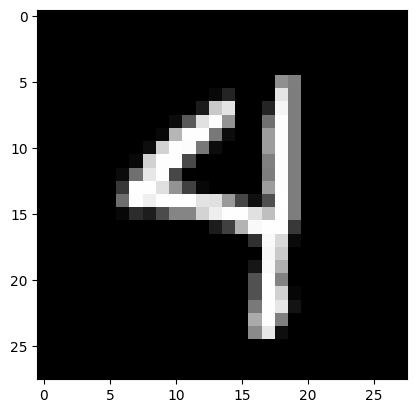

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


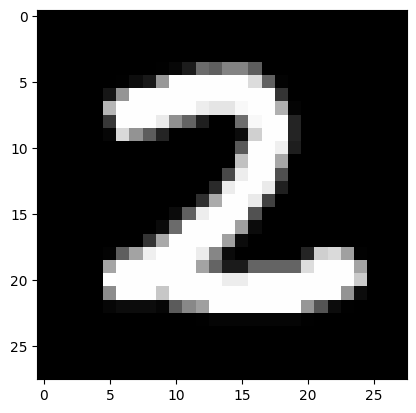

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


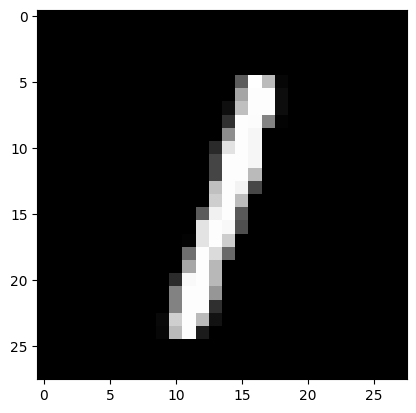

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


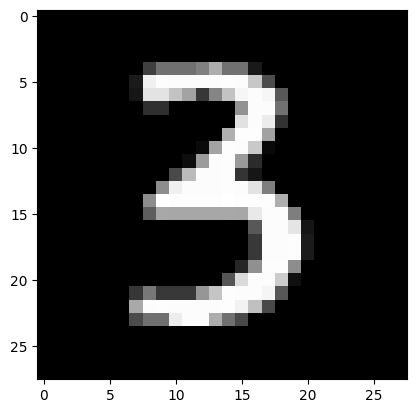

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


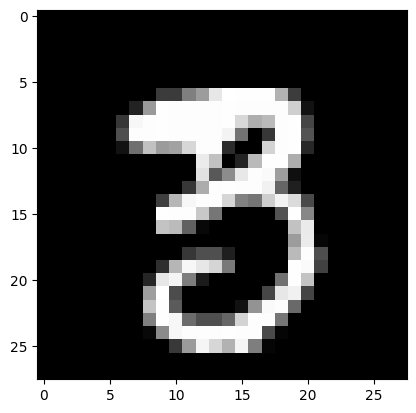

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


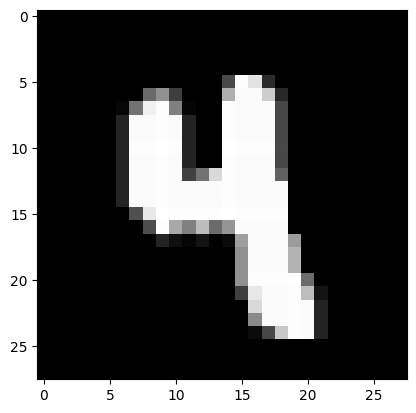

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


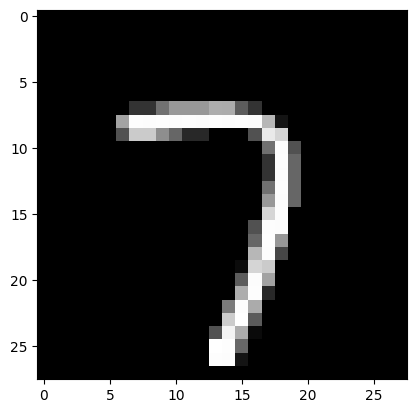

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


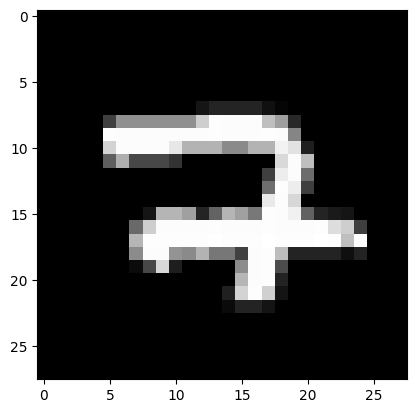

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


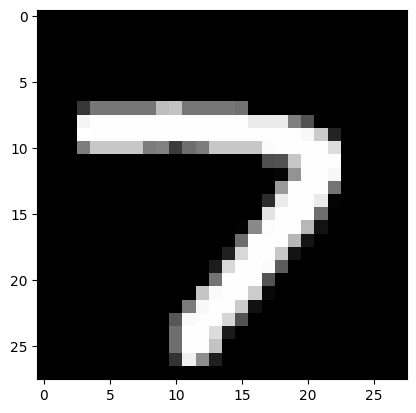

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


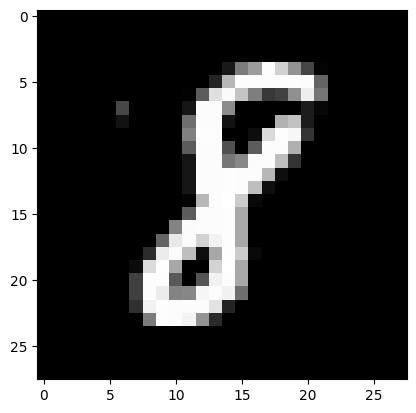

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


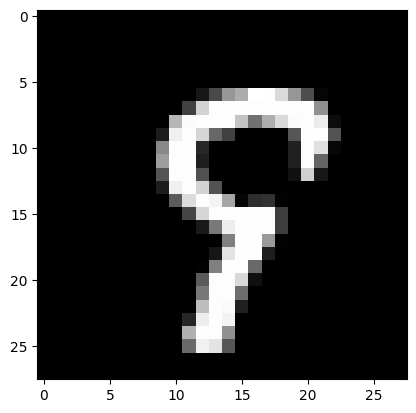

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


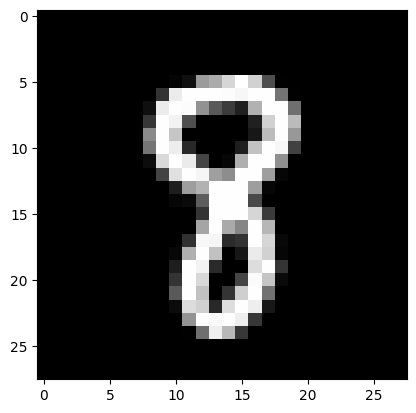

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


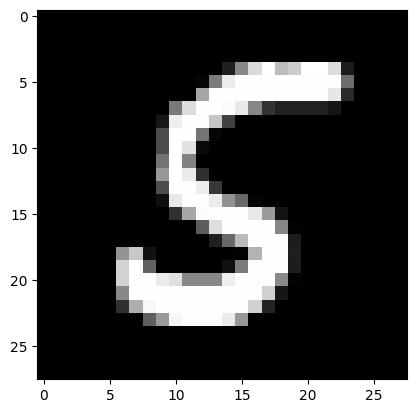

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


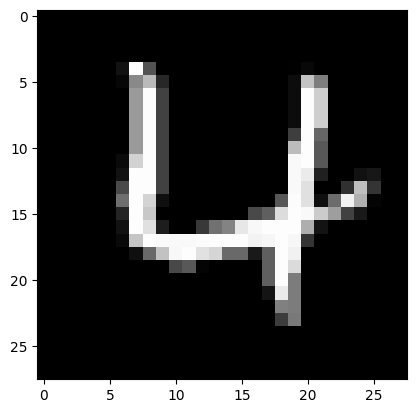

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


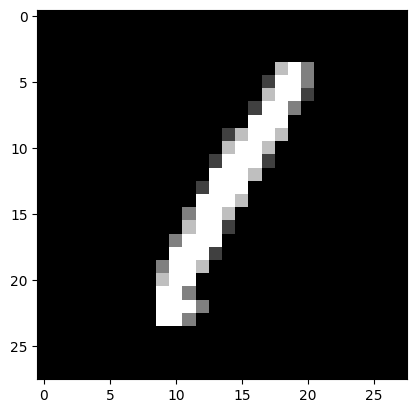

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


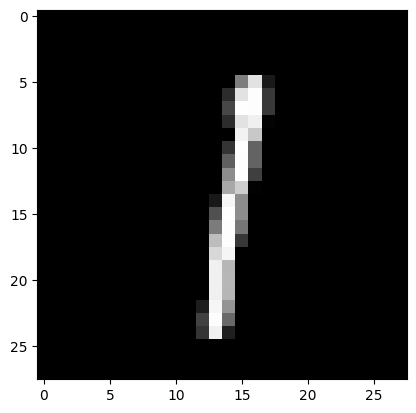

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


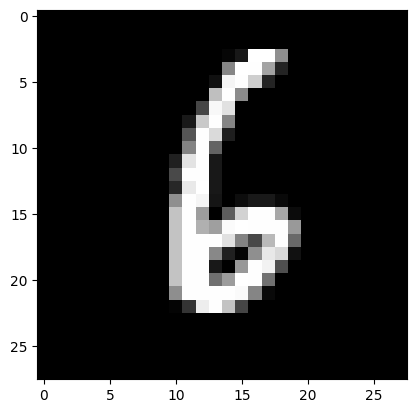

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


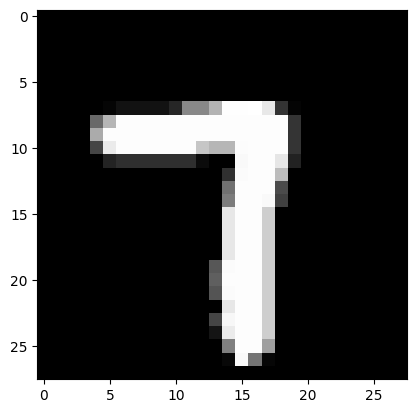

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


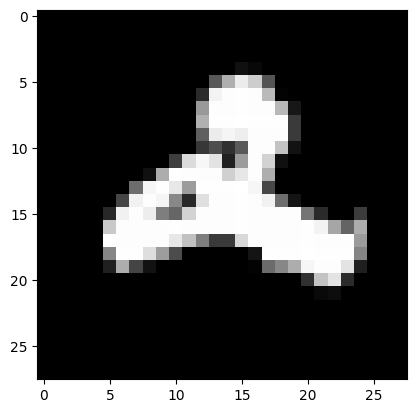

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


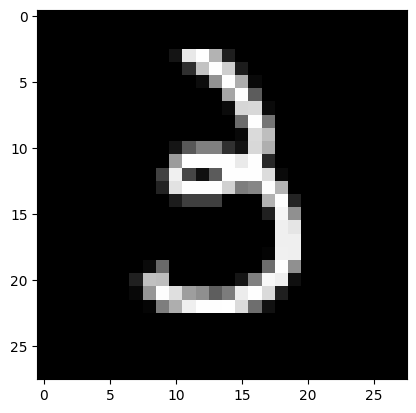

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


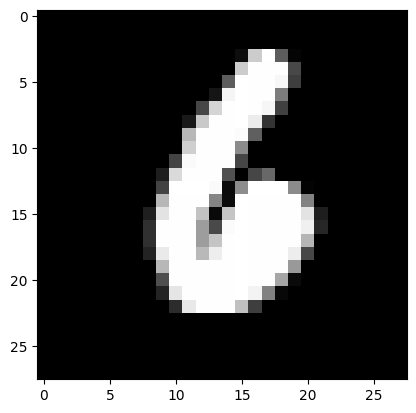

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


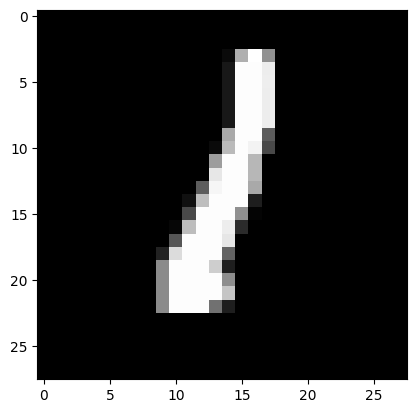

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


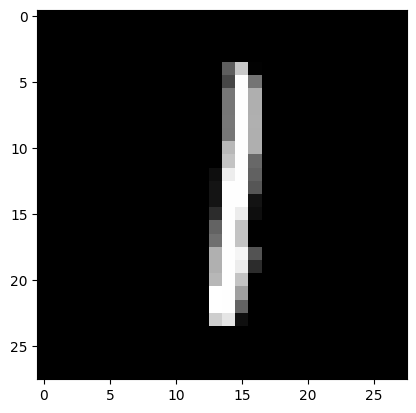

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


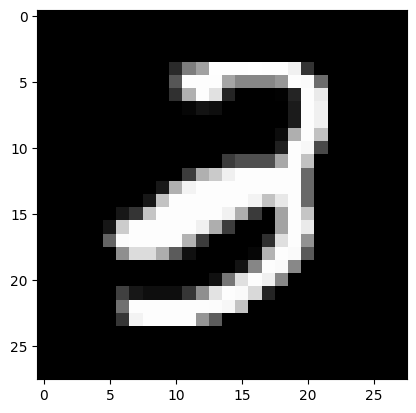

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


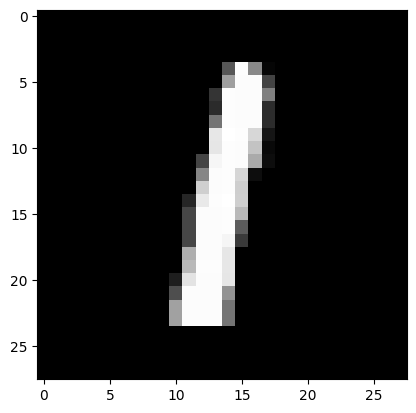

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


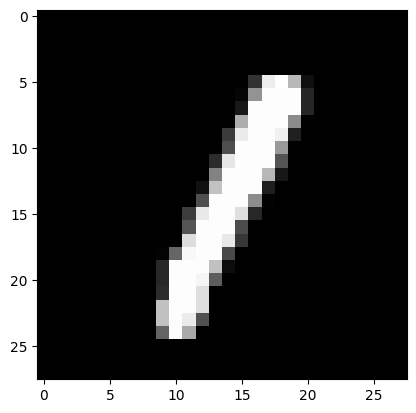

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


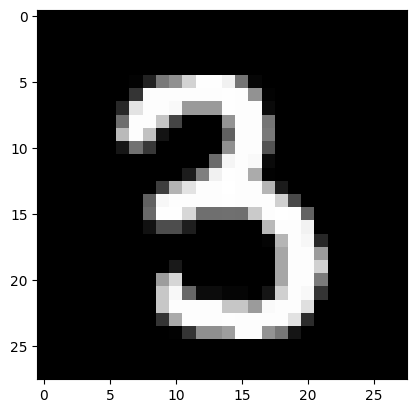

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


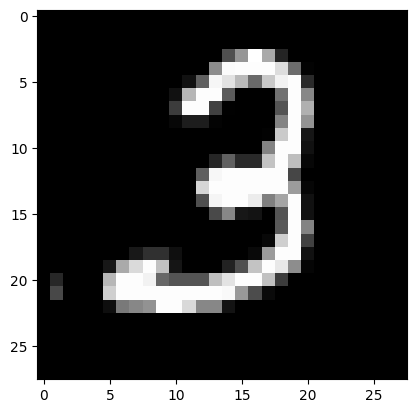

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


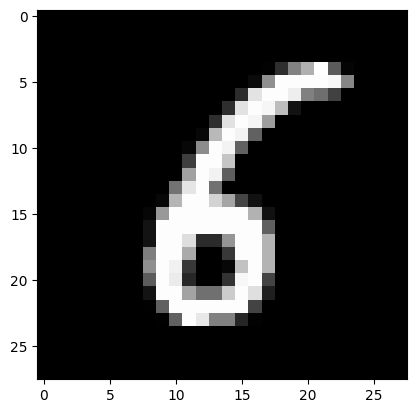

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


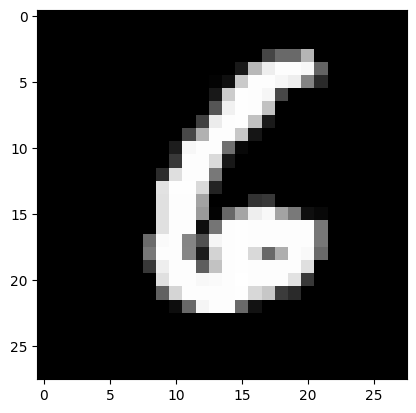

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


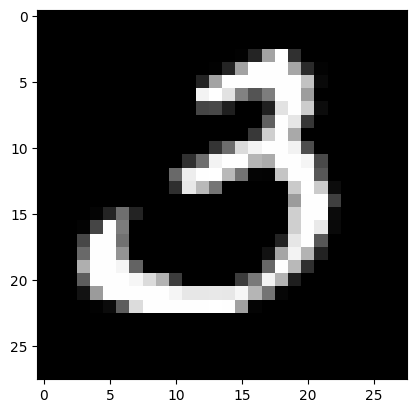

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


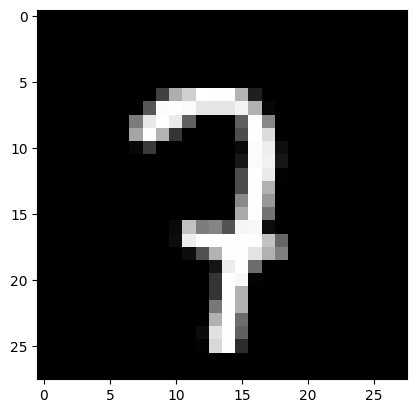

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


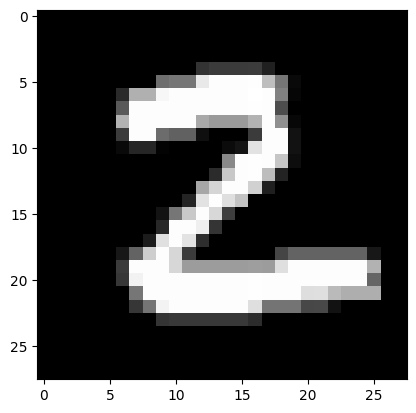

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


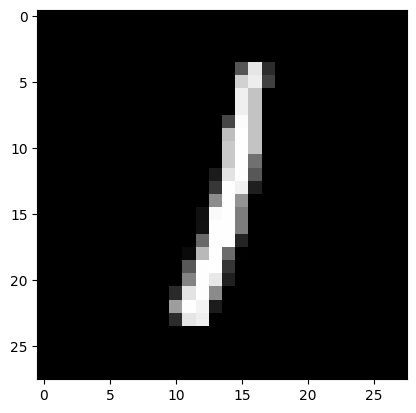

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


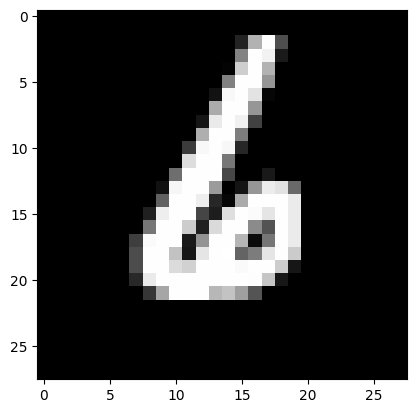

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


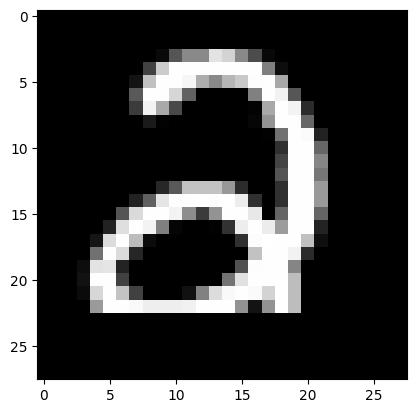

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


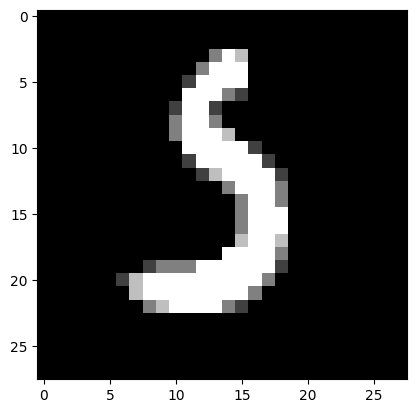

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


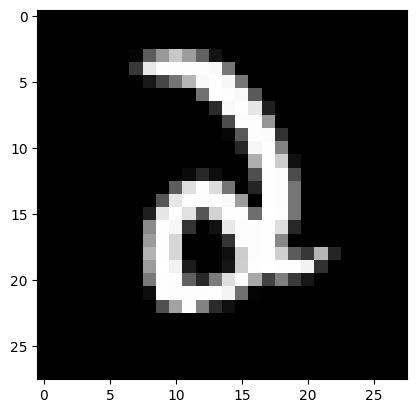

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


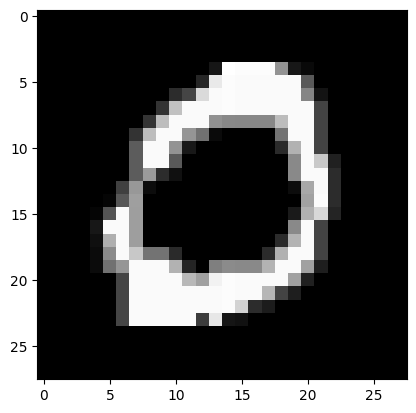

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


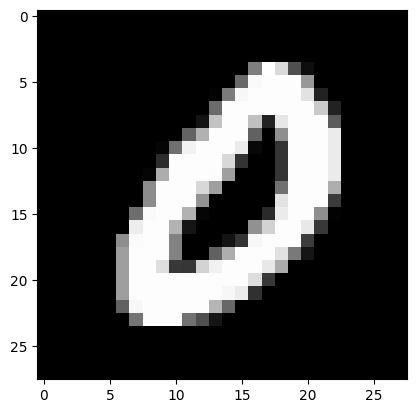

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


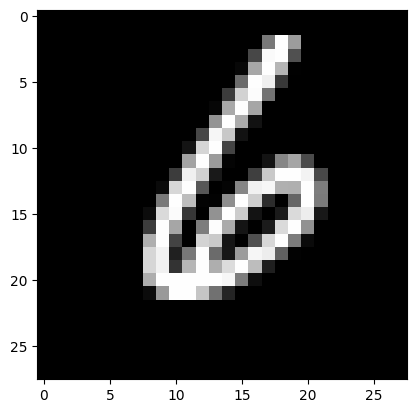

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


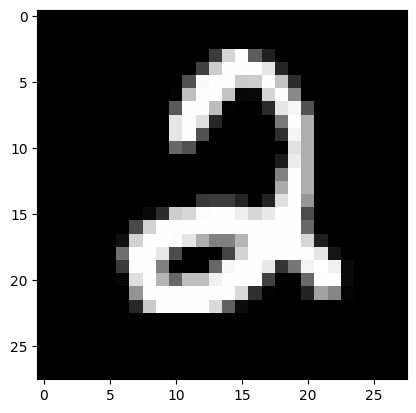

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


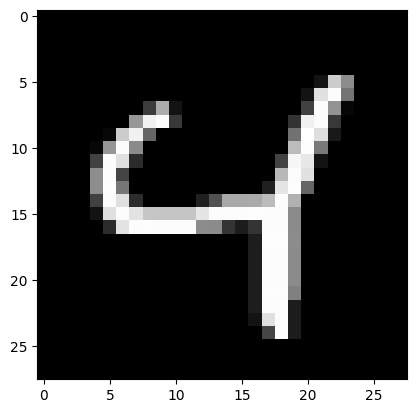

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


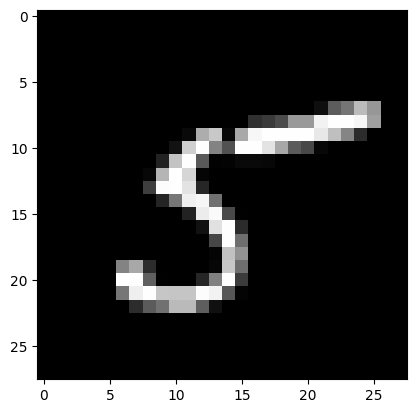

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


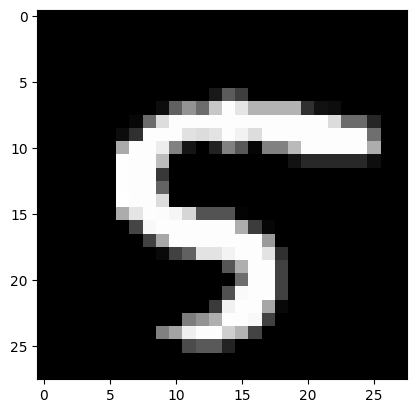

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


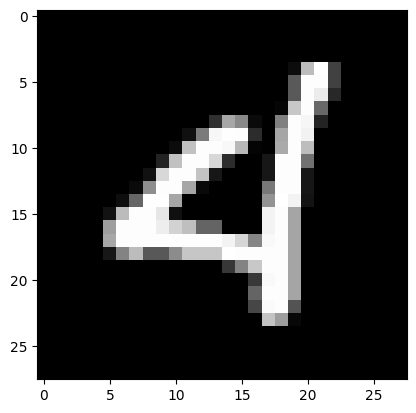

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


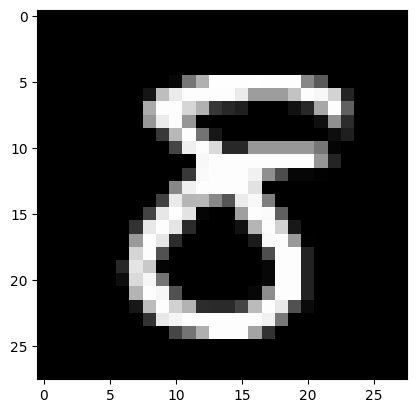

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


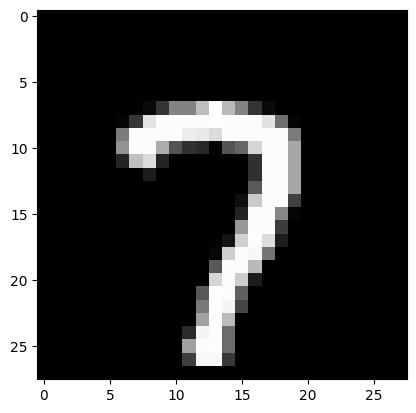

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


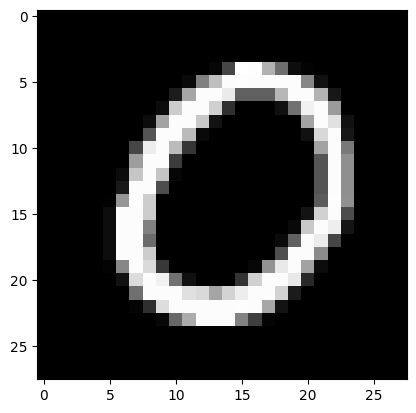

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


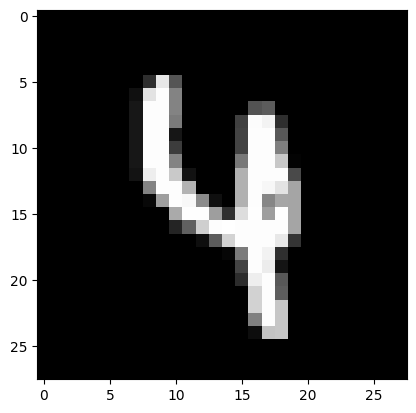

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


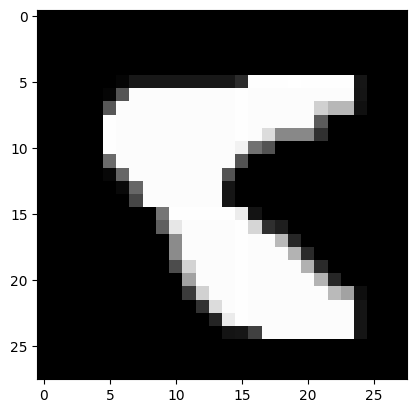

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


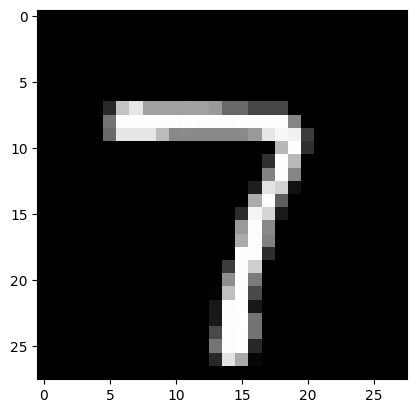

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


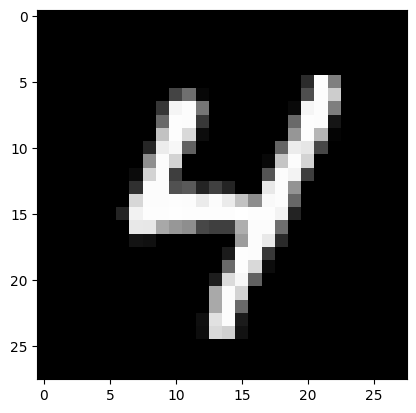

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


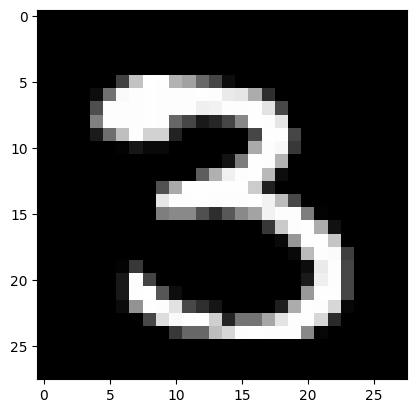

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


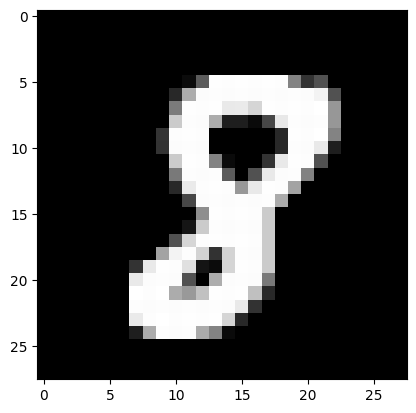

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


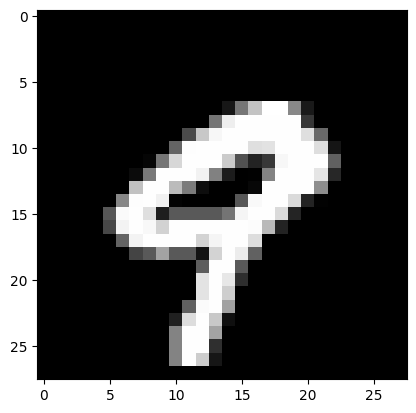

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


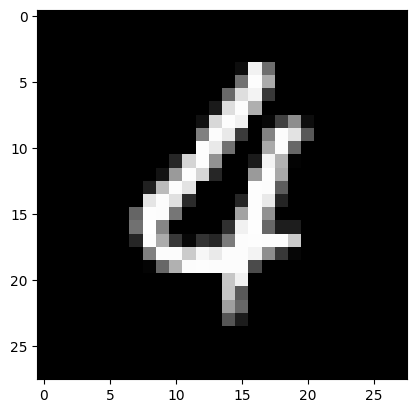

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


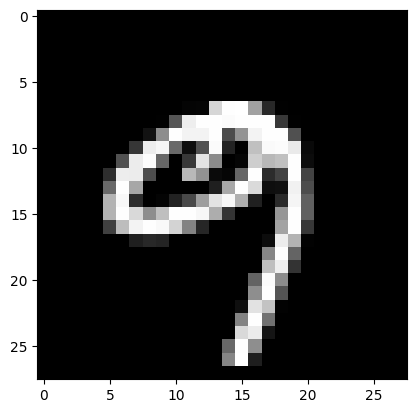

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


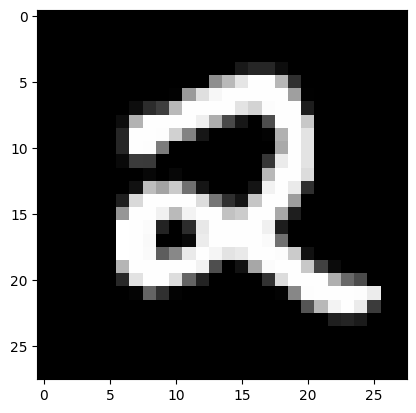

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


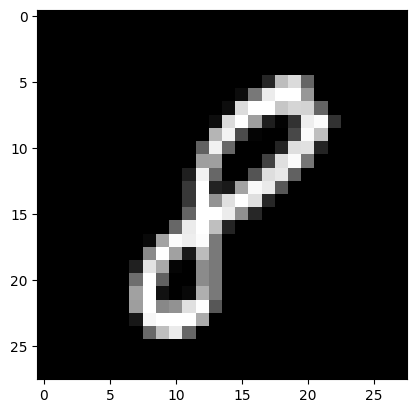

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


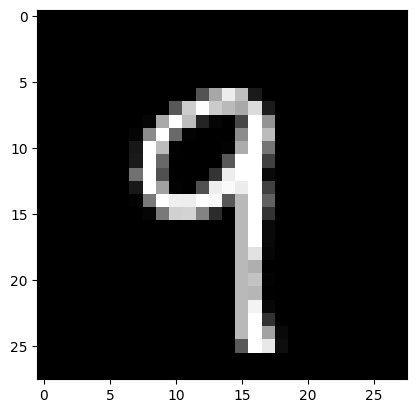

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


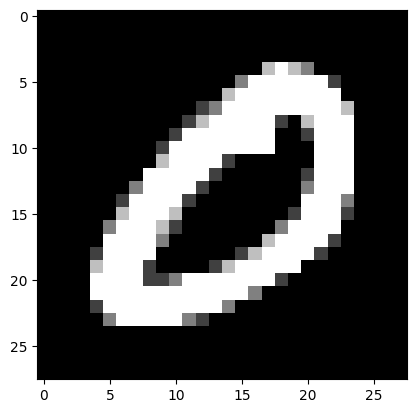

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


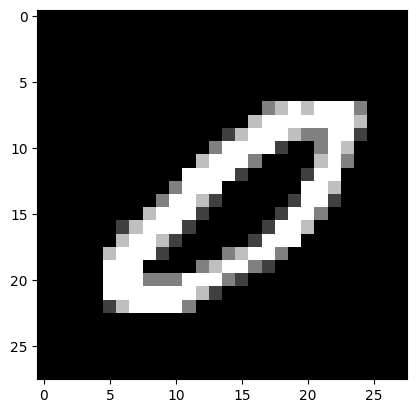

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


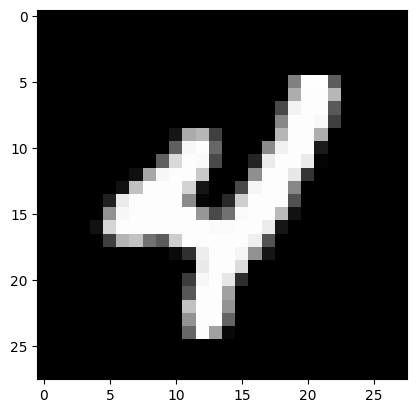

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


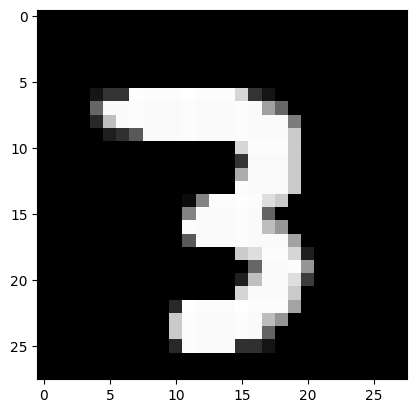

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


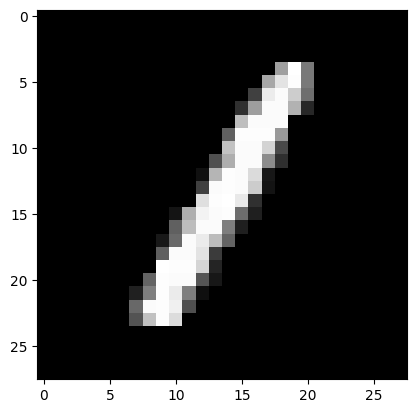

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


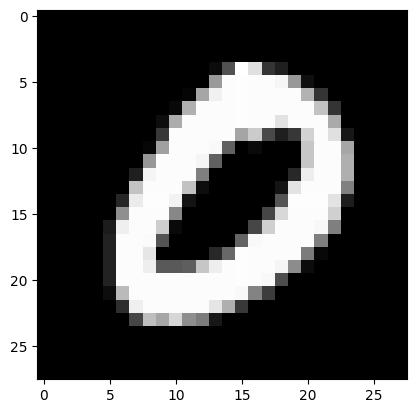

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


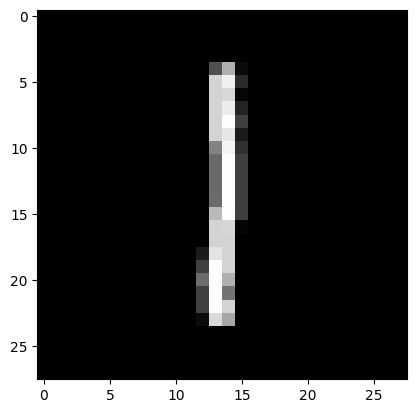

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


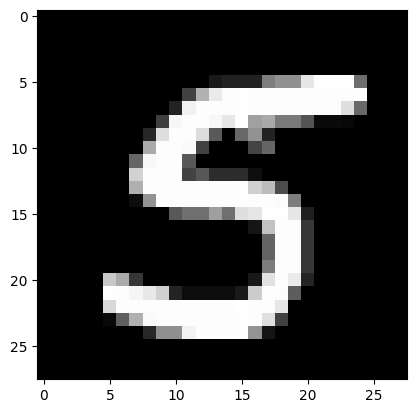

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


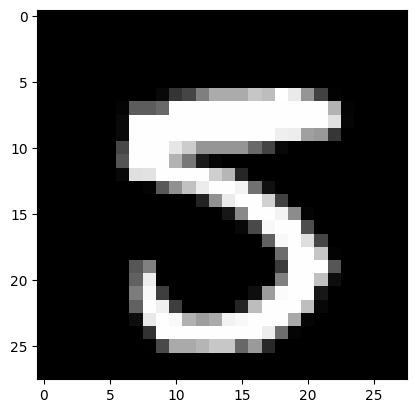

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


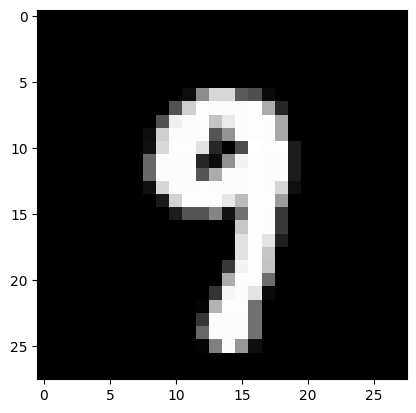

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


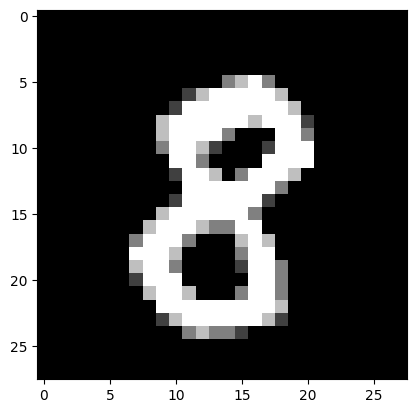

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


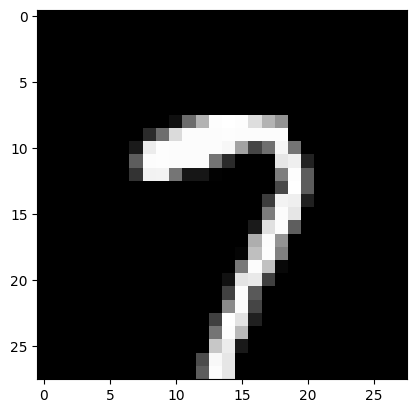

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


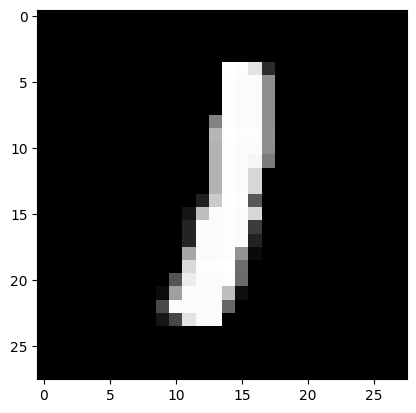

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


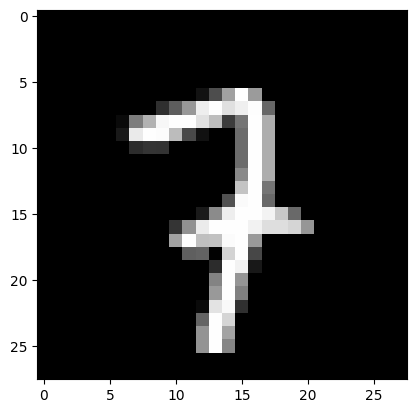

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


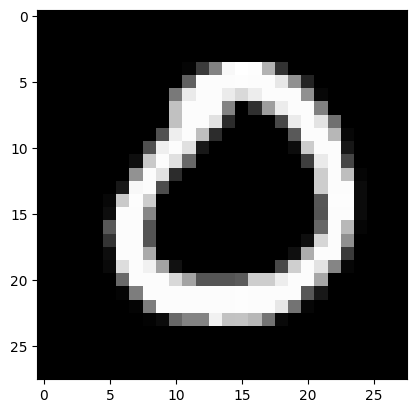

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


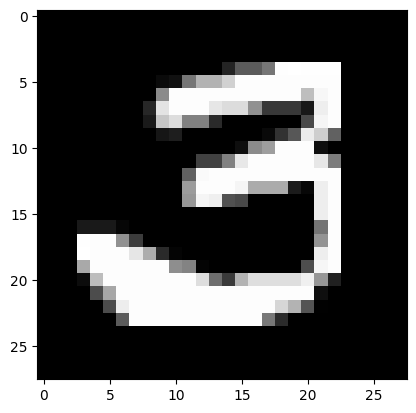

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


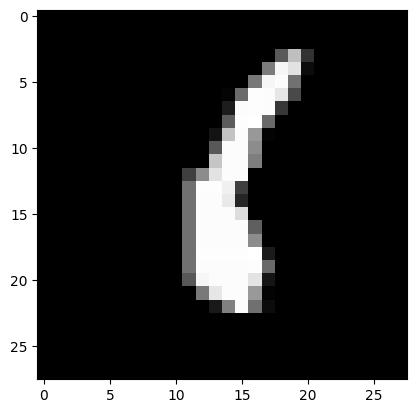

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


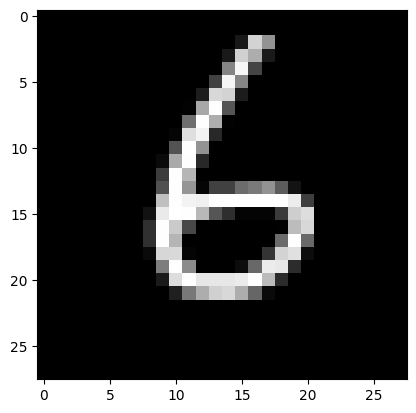

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


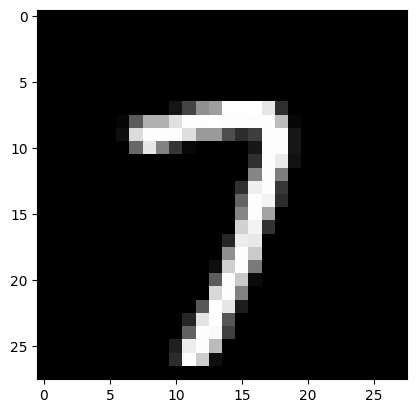

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


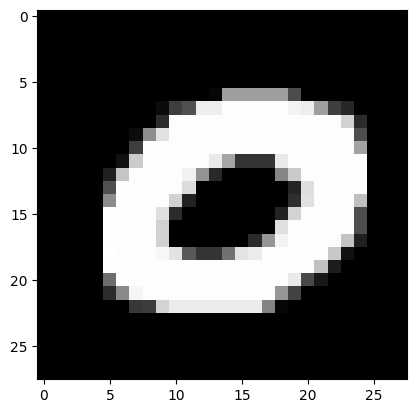

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


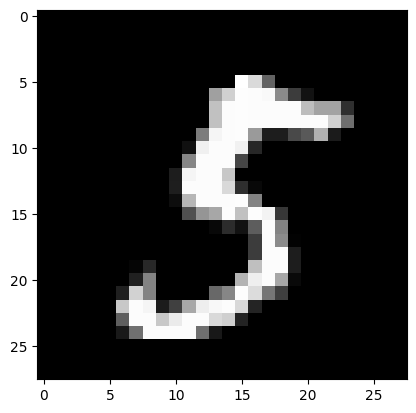

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


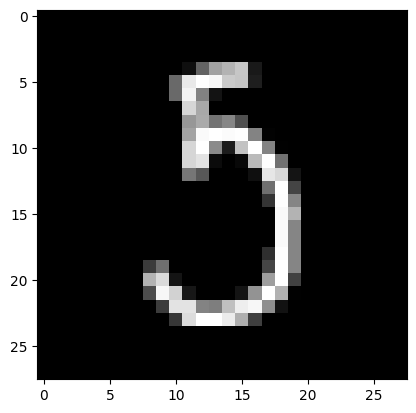

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


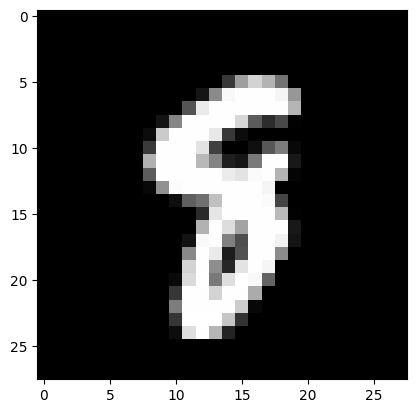

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


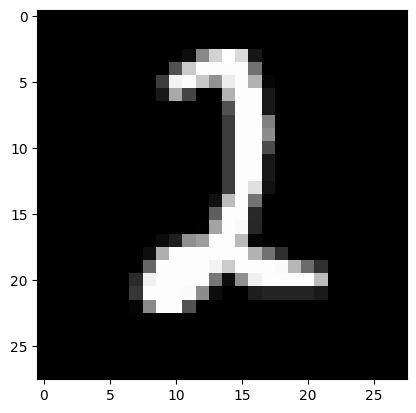

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


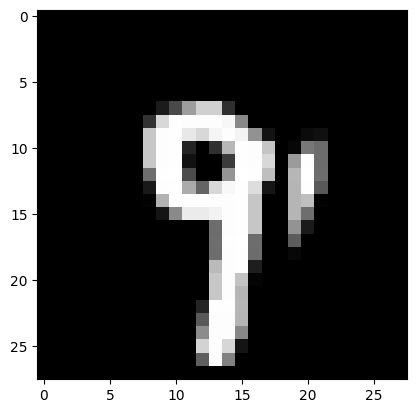

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


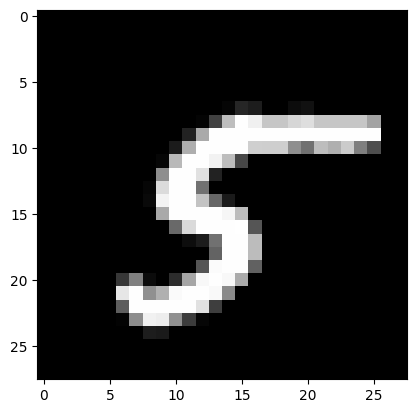

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


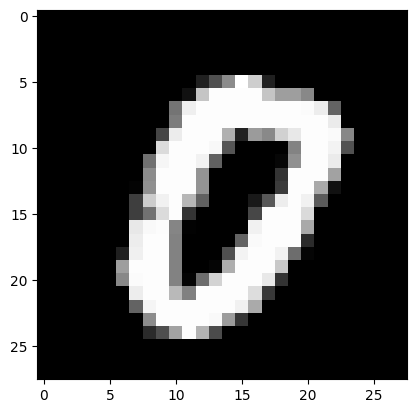

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


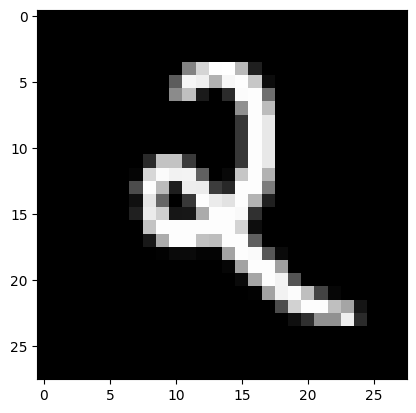

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


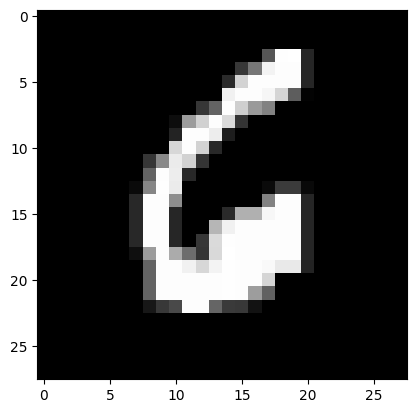

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


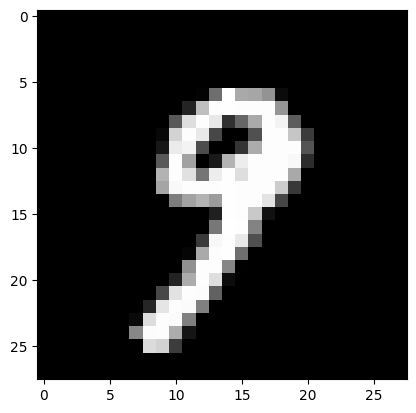

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


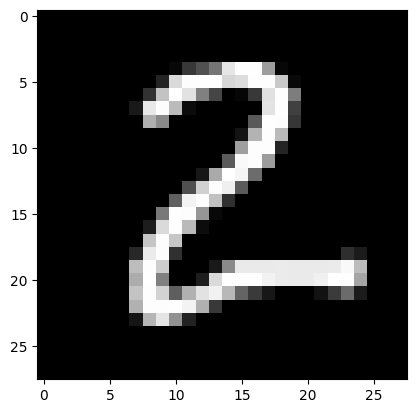

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


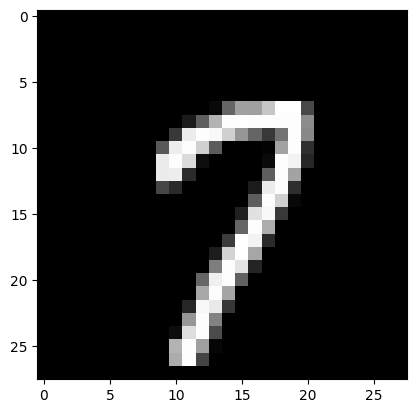

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


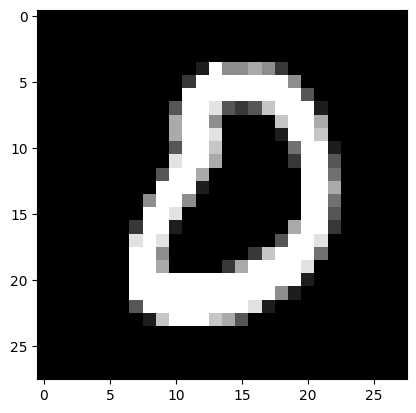

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


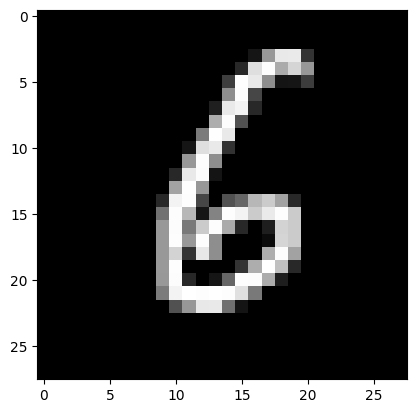

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


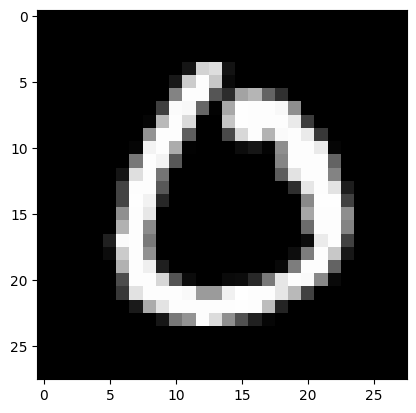

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


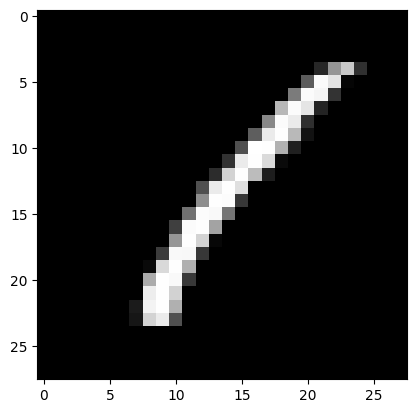

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


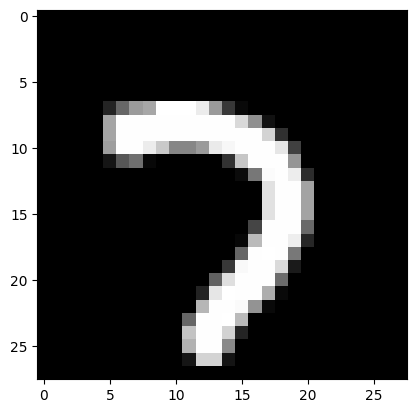

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


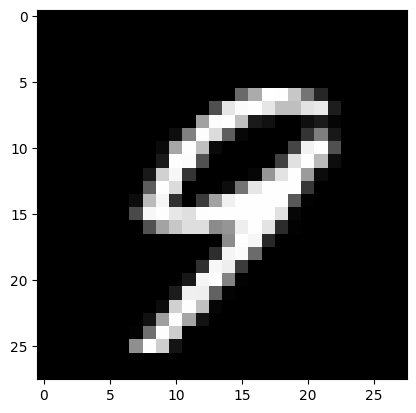

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


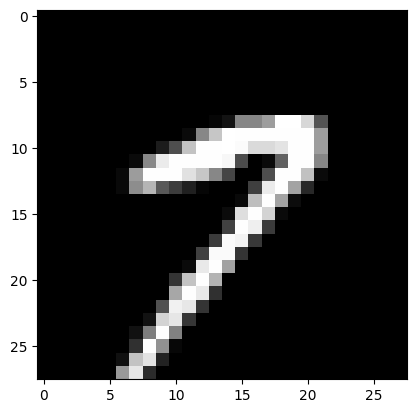

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


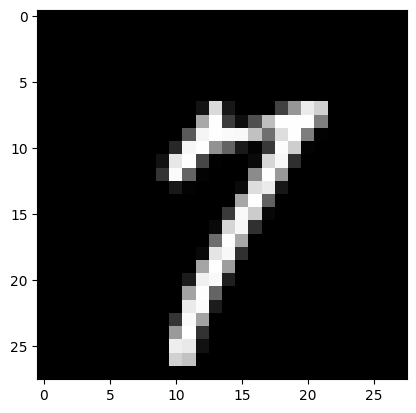

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


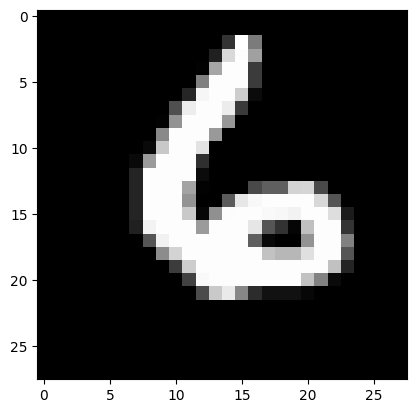

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


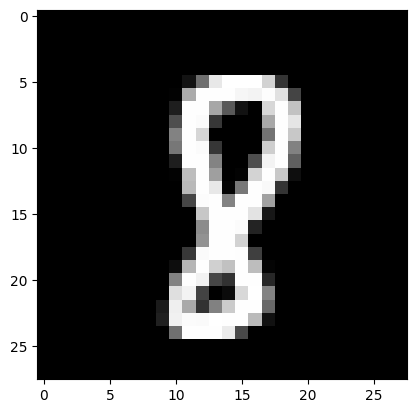

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


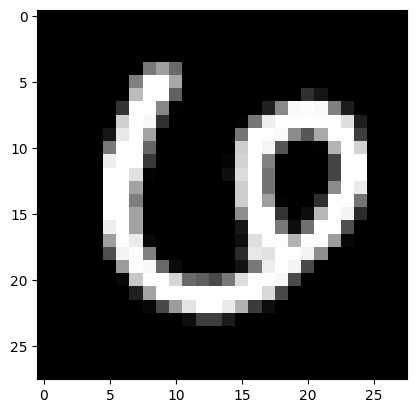

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


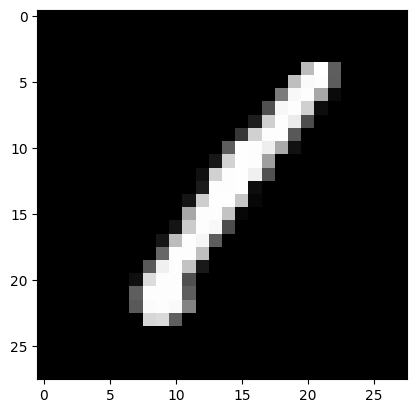

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


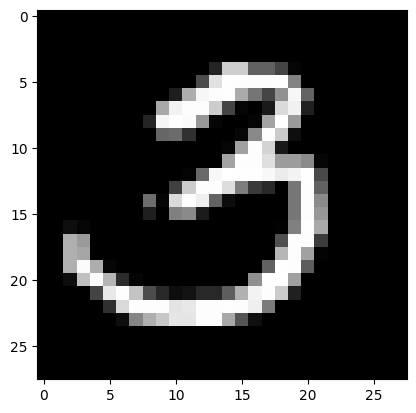

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


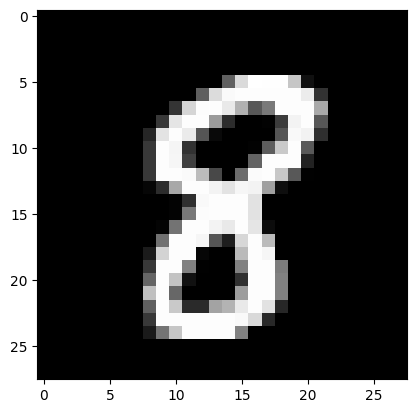

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


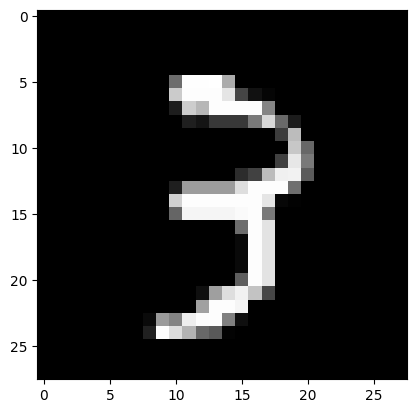

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


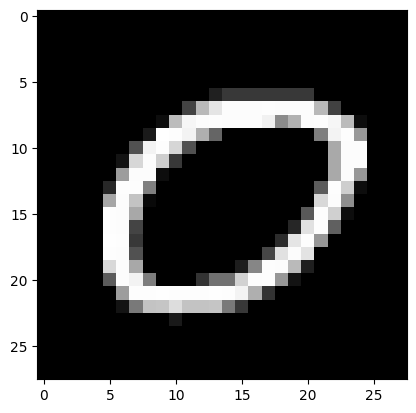

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


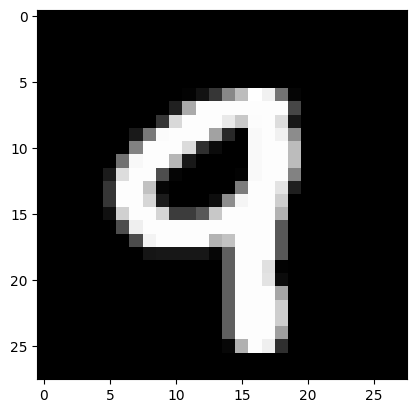

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


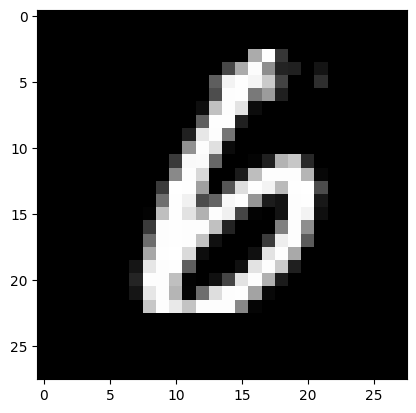

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


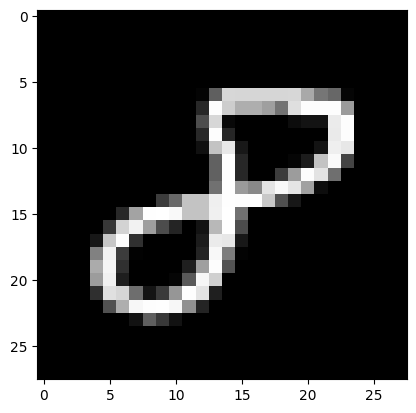

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


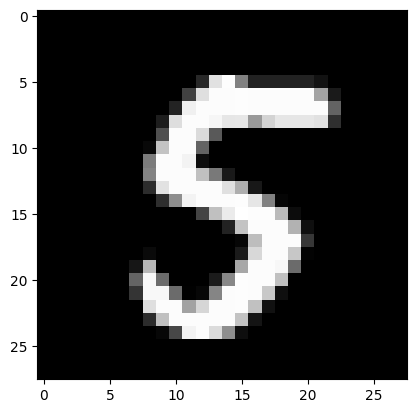

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


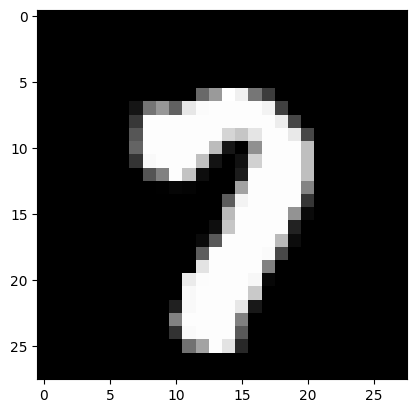

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


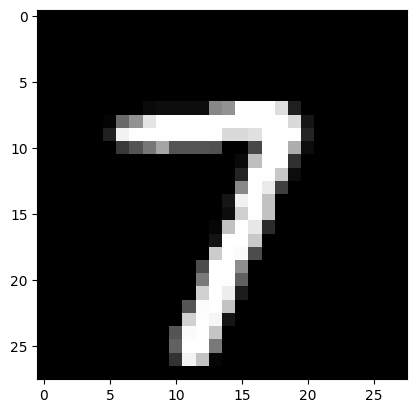

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


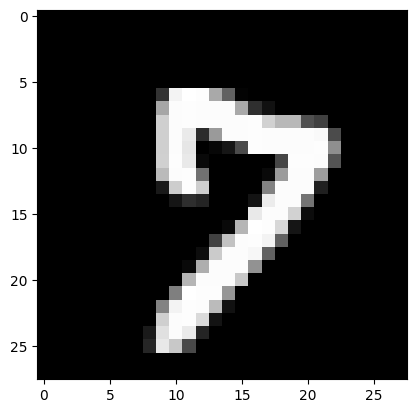

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


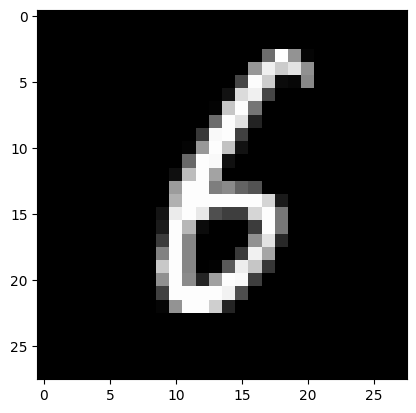

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


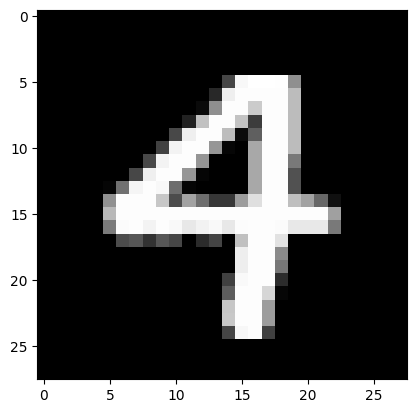

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


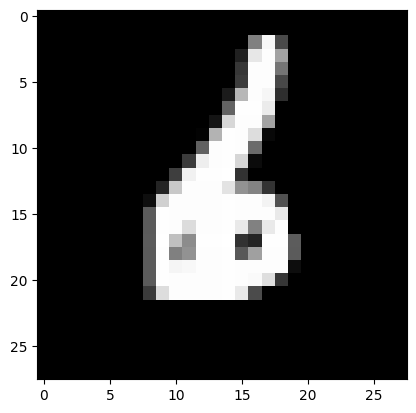

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


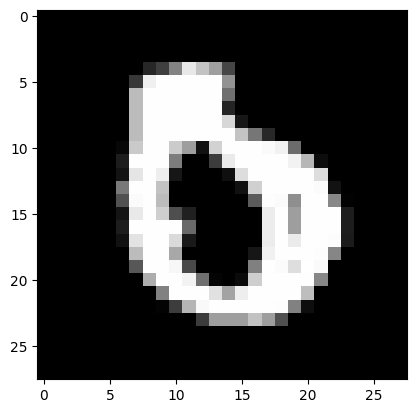

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


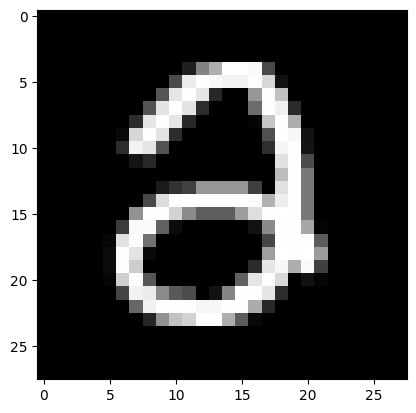

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


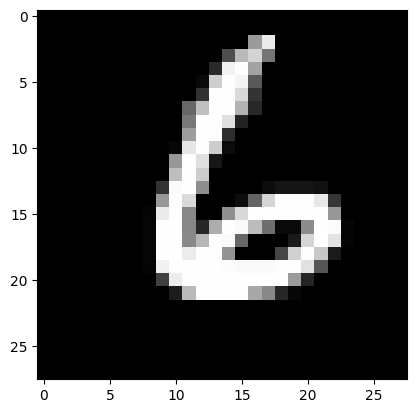

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


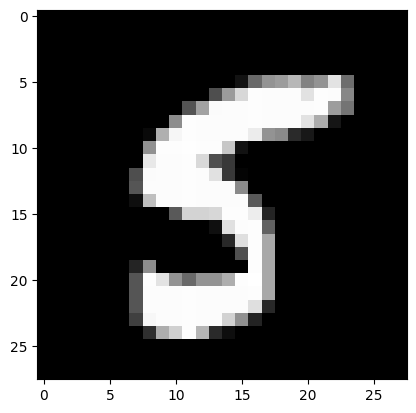

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


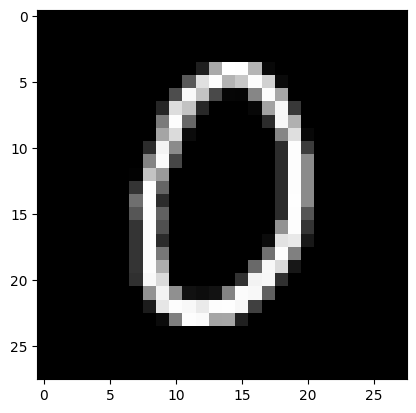

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


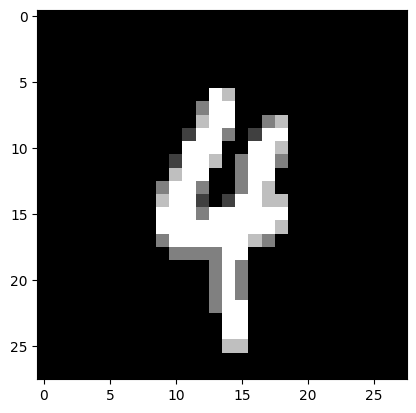

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


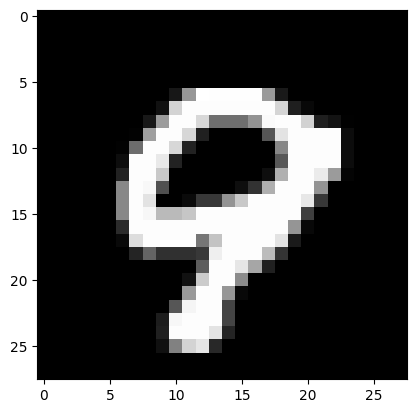

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


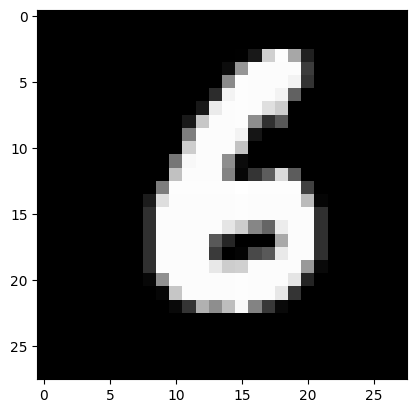

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


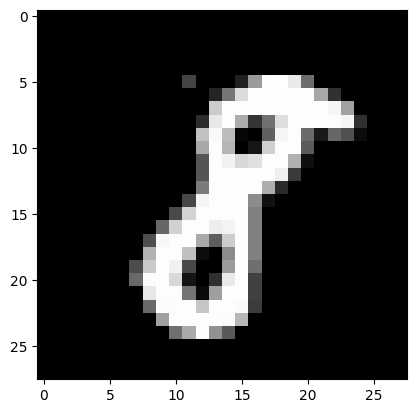

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


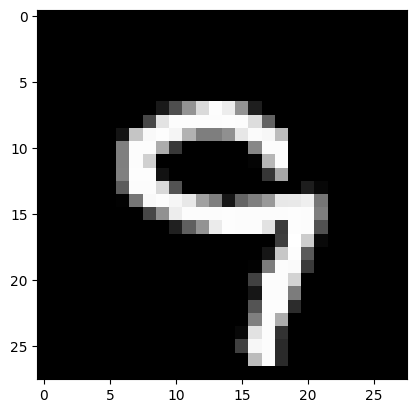

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


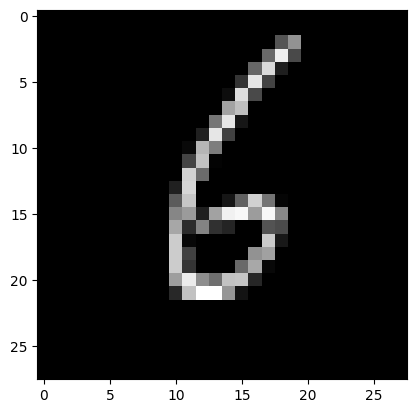

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


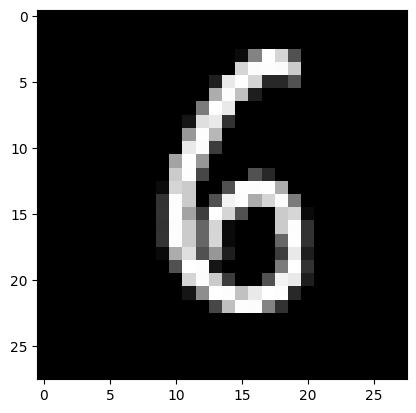

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


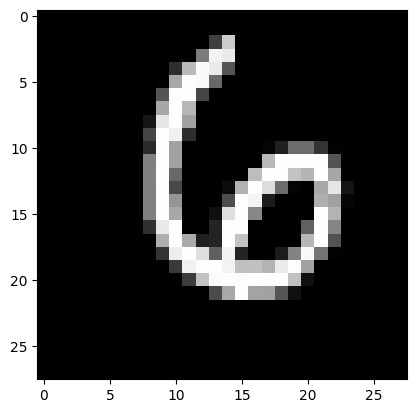

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


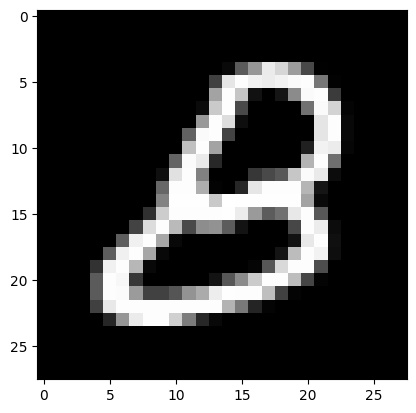

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


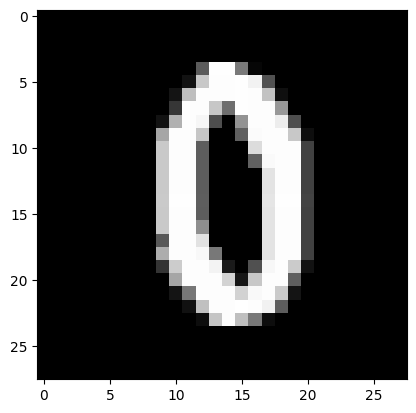

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


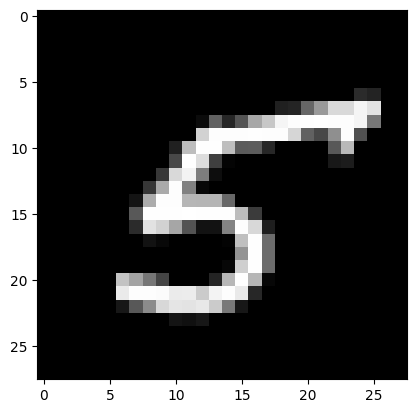

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


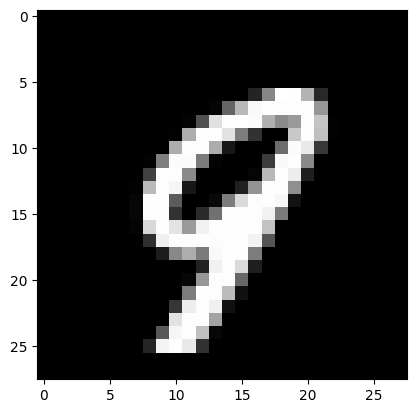

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


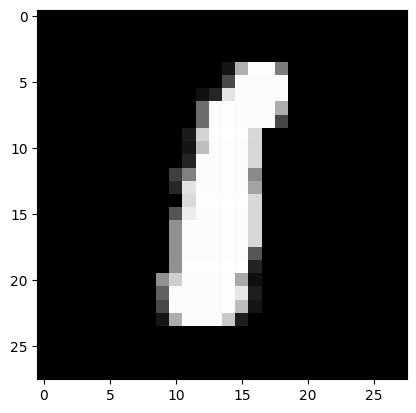

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


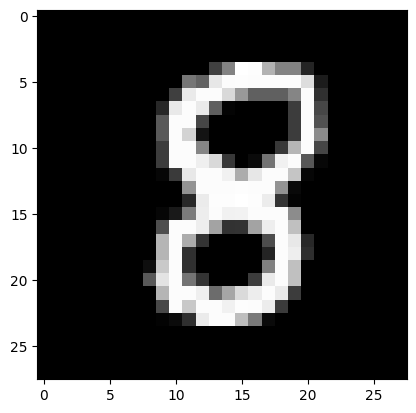

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


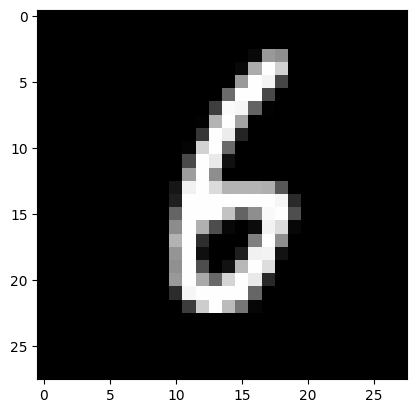

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


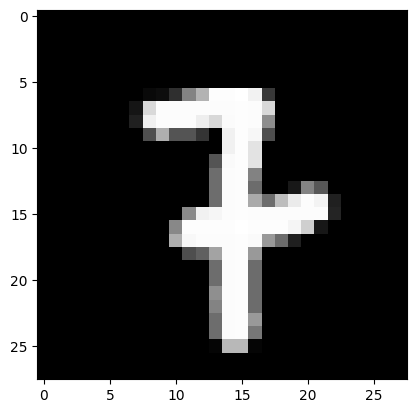

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


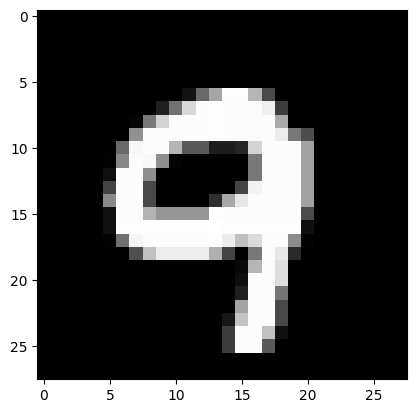

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


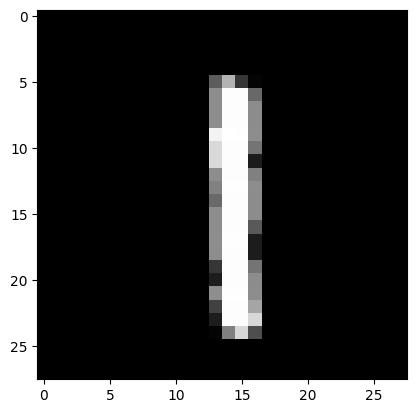

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


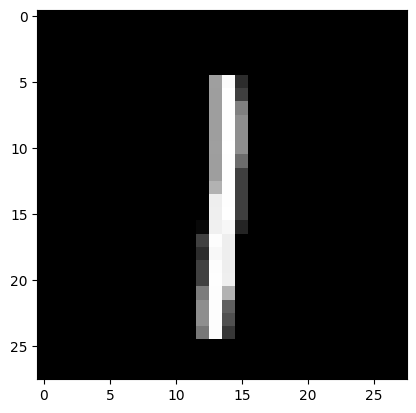

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


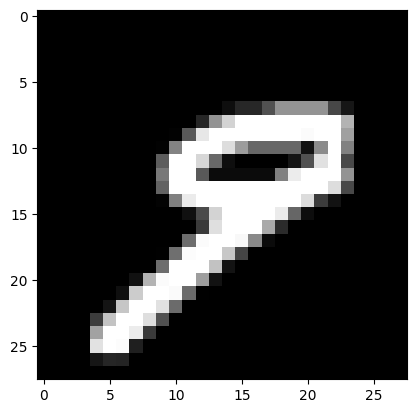

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


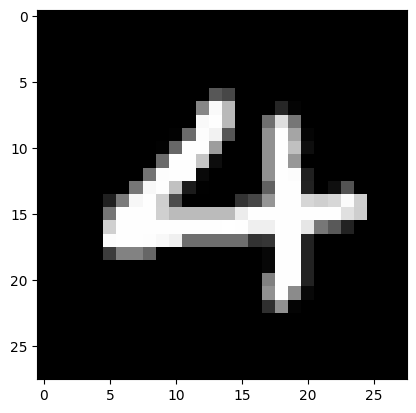

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


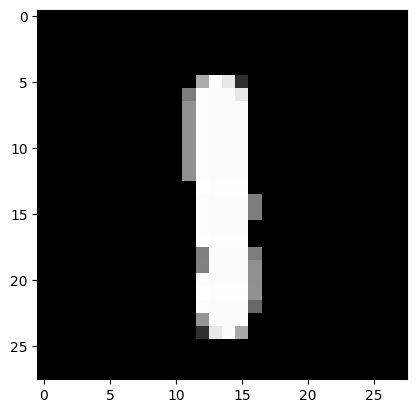

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


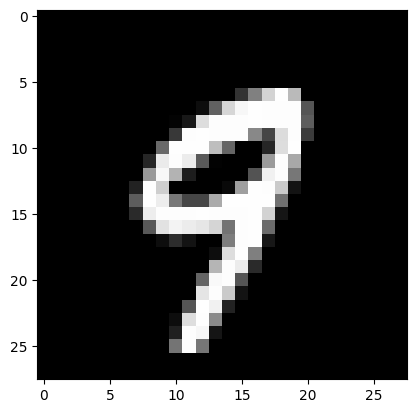

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


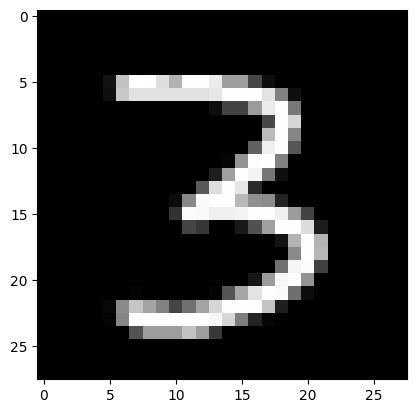

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


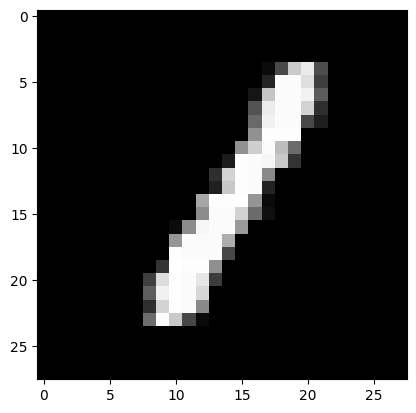

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


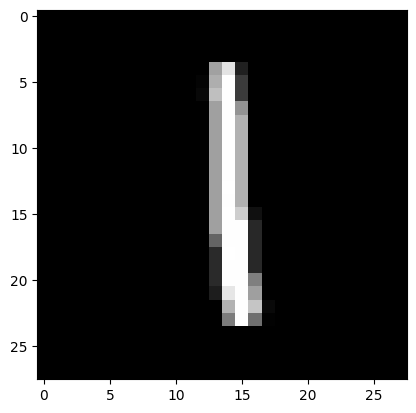

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


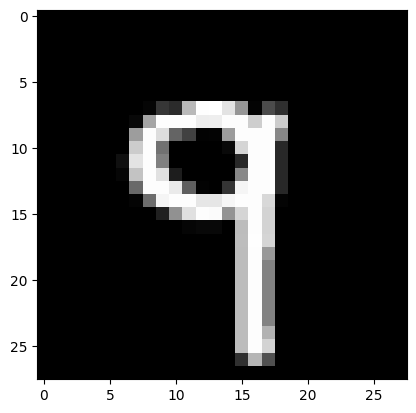

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


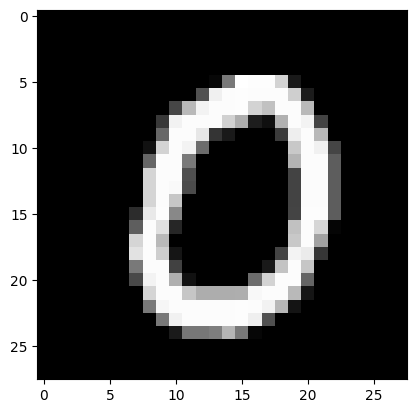

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


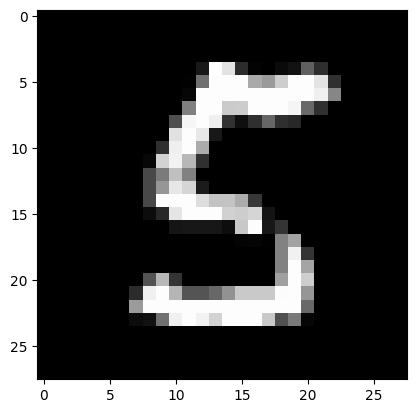

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


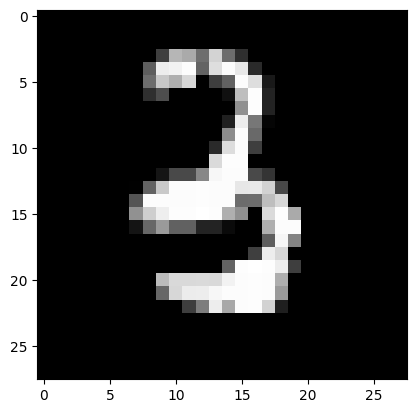

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


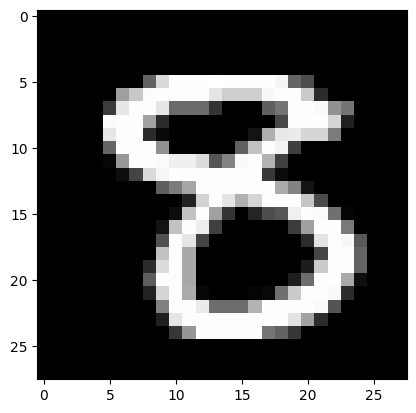

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


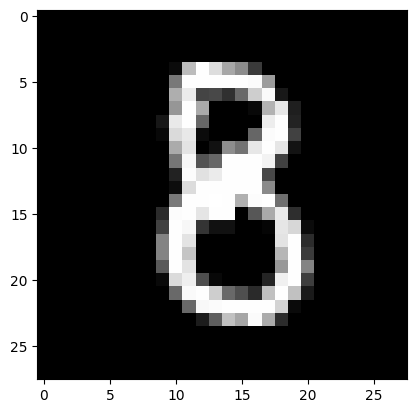

Label: 8
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


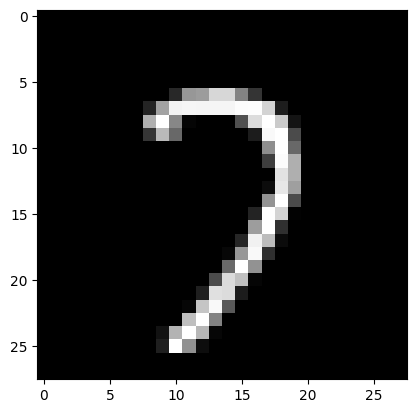

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


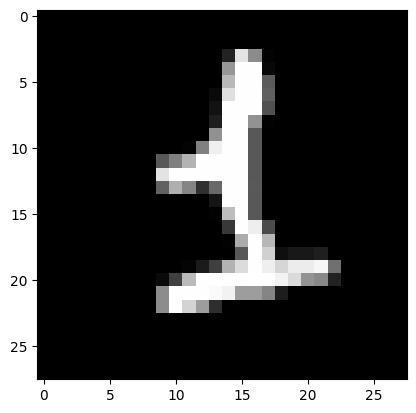

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


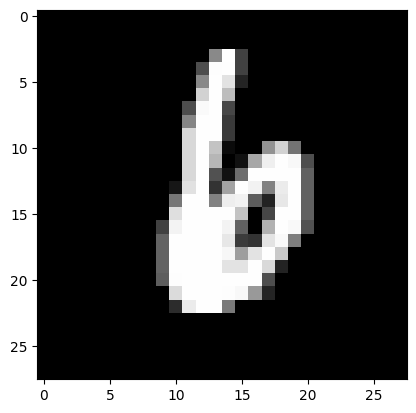

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


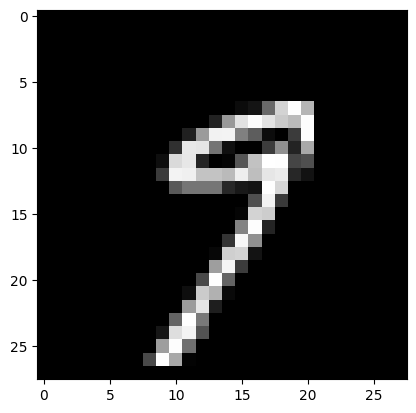

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


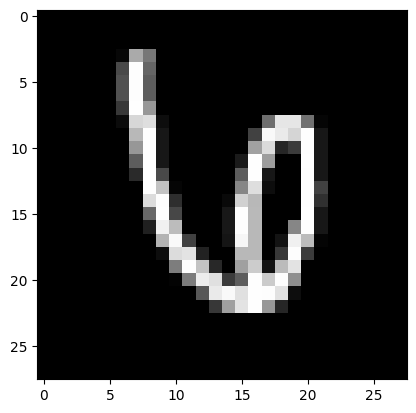

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


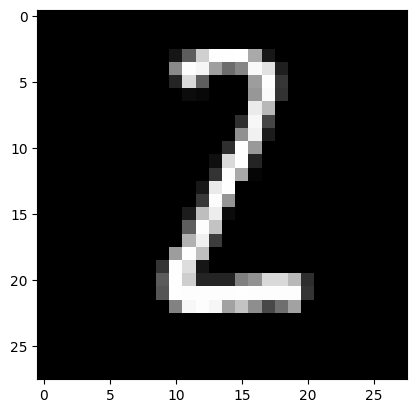

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


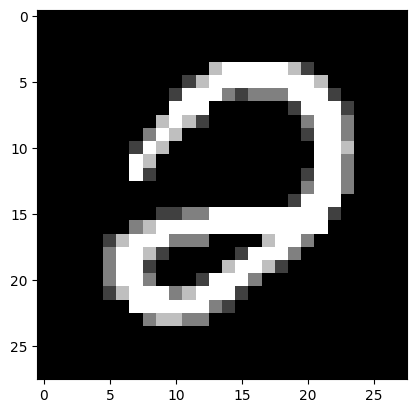

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


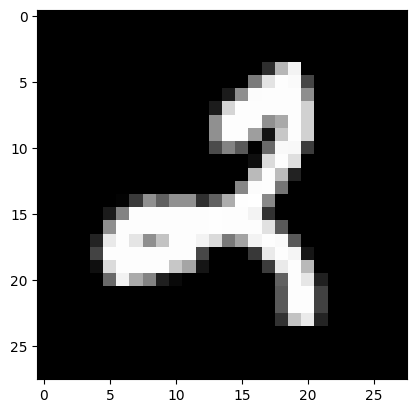

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


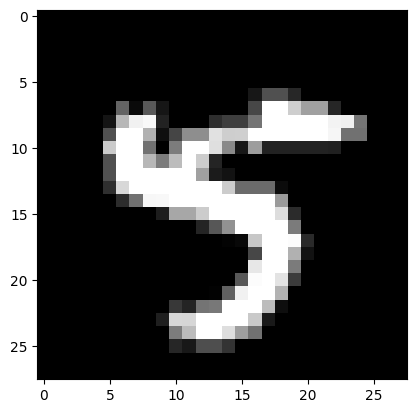

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


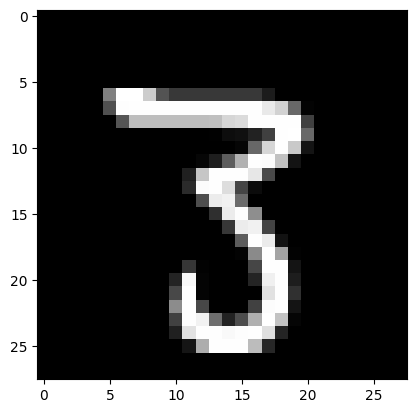

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


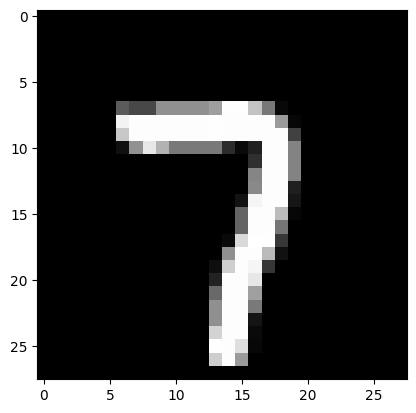

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


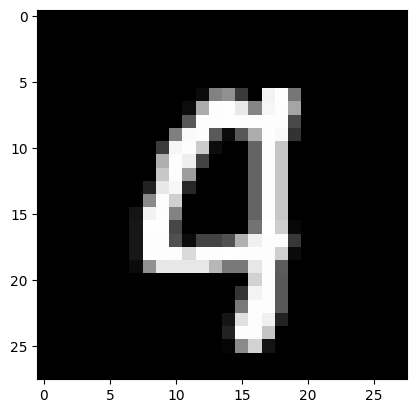

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


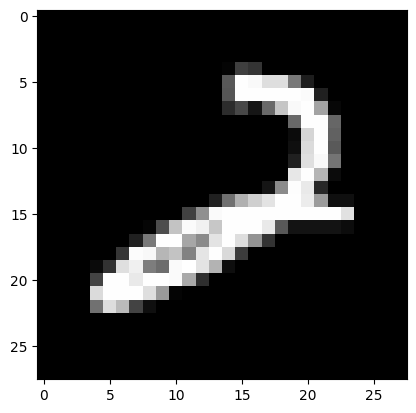

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


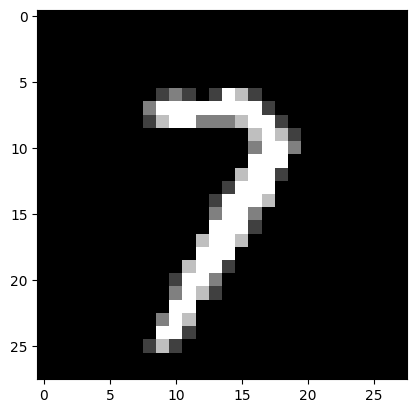

Label: 7
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


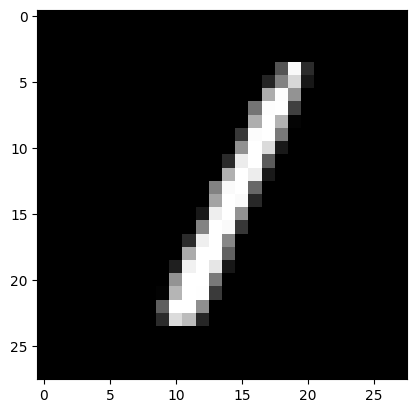

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


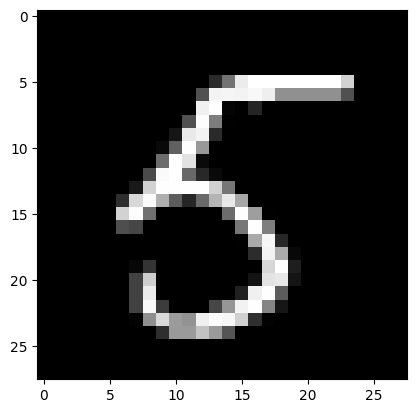

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


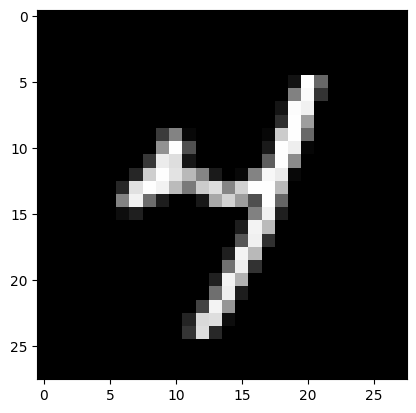

Label: 4
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


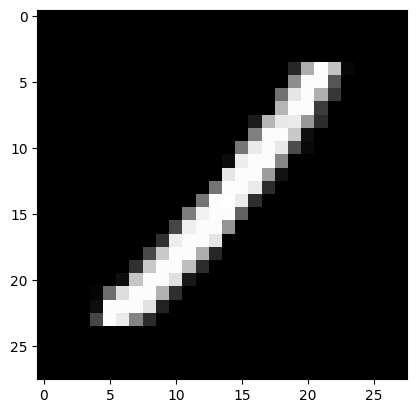

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


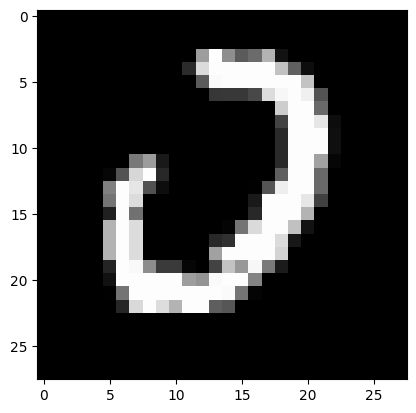

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


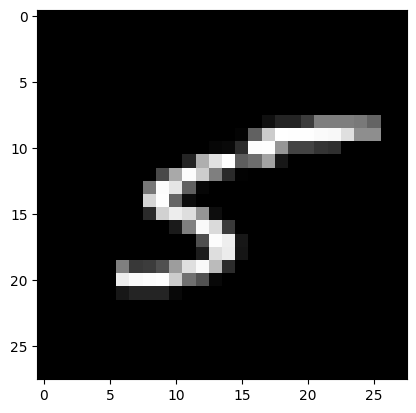

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


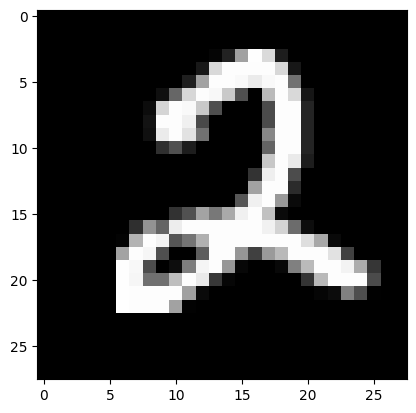

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


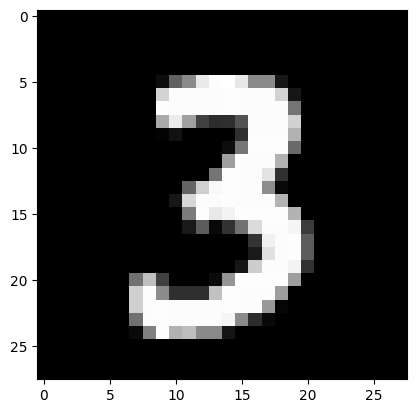

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


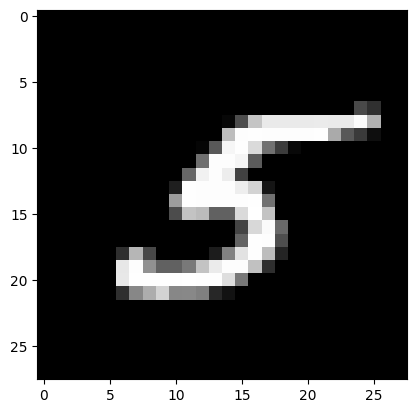

Label: 5
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


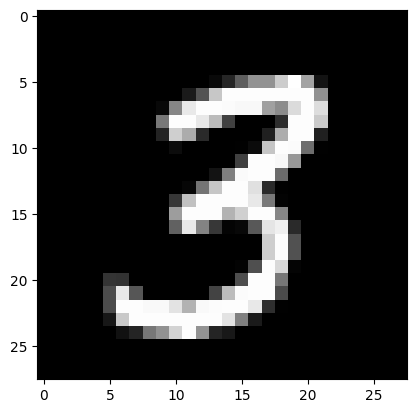

Label: 3
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


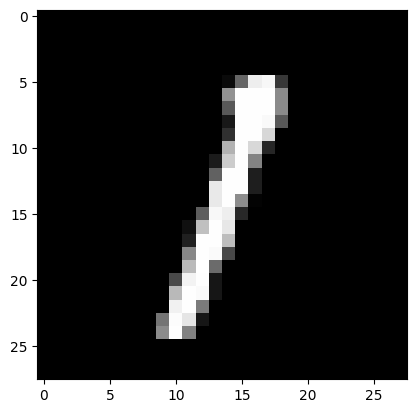

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


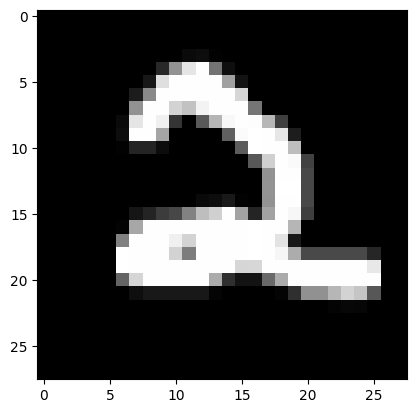

Label: 2
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


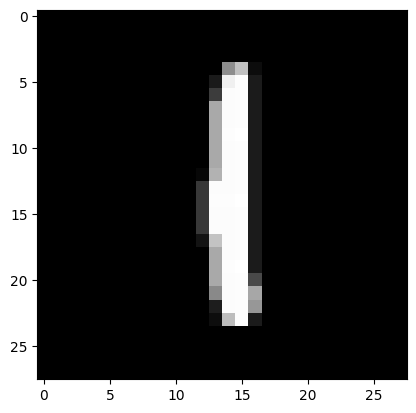

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


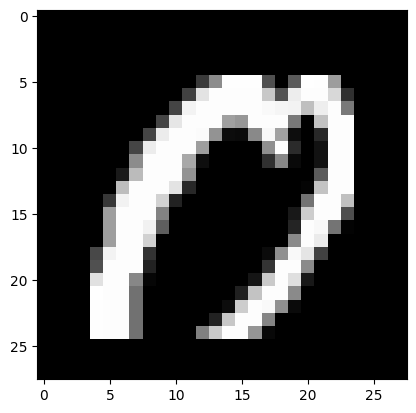

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


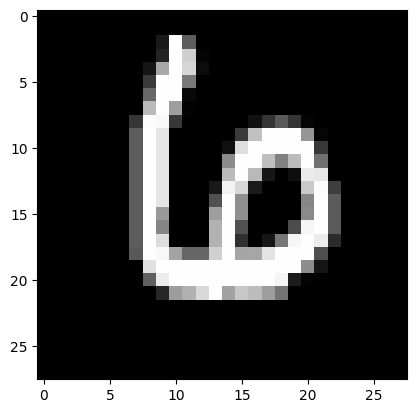

Label: 6
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


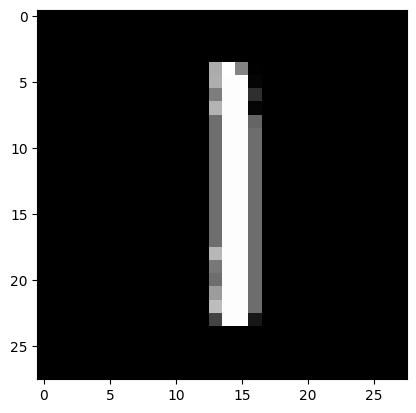

Label: 1
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


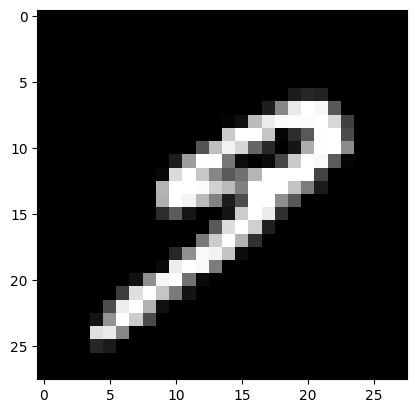

Label: 9
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


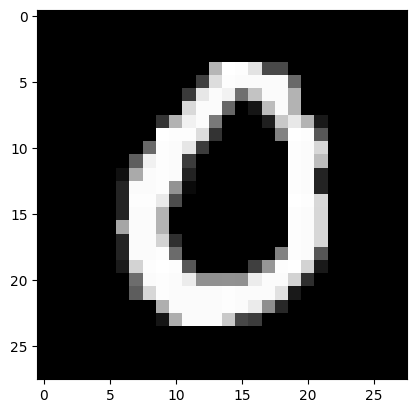

Label: 0
x_train:  torch.Size([64, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([64]) , type:  torch.LongTensor


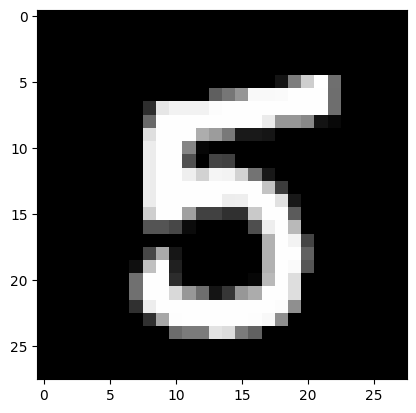

Label: 5
x_train:  torch.Size([32, 1, 28, 28]) , type:  torch.FloatTensor
y_train:  torch.Size([32]) , type:  torch.LongTensor


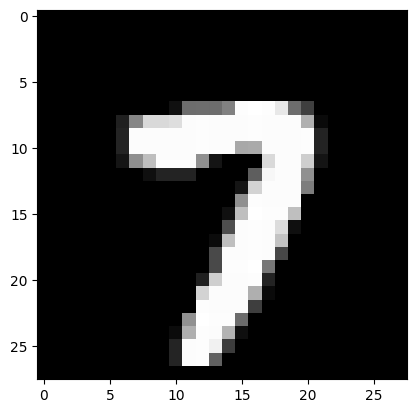

Label: 7


In [12]:
# check data

for (train_features, train_labels) in train_dataloader:
  print('x_train: ', train_features.size(), ', type: ', train_features.type())
  print('y_train: ', train_labels.size(), ', type: ', train_labels.type())
  img = train_features[0].squeeze()
  label = train_labels[0]
  plt.imshow(img, cmap='gray')
  plt.show()
  print(f"Label: {label}")